# EDA

## Unpack the files

In [12]:
!ls -laht '../data' | sort -hr

total 678M
drwxrwxr-x 3 keras  1000 4.0K May 19 14:49 .
drwxr-xr-x 5 keras users 4.0K May 19 14:41 ..
drwxr-xr-x 2 keras users 4.0K May 19 14:49 .ipynb_checkpoints
-rw-rw-r-- 1 keras  1000 5.6M May 18 08:02 application_test.csv.zip
-rw-rw-r-- 1 keras  1000 267M May 18 08:07 installments_payments.csv.zip
-rw-rw-r-- 1 keras  1000 117K May 18 08:02 sample_submission.csv.zip
-rw-rw-r-- 1 keras  1000 106M May 18 08:05 POS_CASH_balance.csv.zip
-rw-rw-r-- 1 keras  1000  95M May 18 08:04 credit_card_balance.csv.zip
-rw-rw-r-- 1 keras  1000  74M May 18 08:03 previous_application.csv.zip
-rw-rw-r-- 1 keras  1000  61M May 18 08:03 bureau_balance.csv.zip
-rw-rw-r-- 1 keras  1000  37M May 18 08:02 bureau.csv.zip
-rw-rw-r-- 1 keras  1000  35M May 18 08:02 application_train.csv.zip


In [11]:
!rm ../data/*.csv

In [13]:
!unzip ../data/application_test.csv.zip -d ../data
!unzip ../data/installments_payments.csv.zip -d ../data
!unzip ../data/sample_submission.csv.zip -d ../data
!unzip ../data/POS_CASH_balance.csv.zip -d ../data
!unzip ../data/credit_card_balance.csv.zip -d ../data
!unzip ../data/previous_application.csv.zip -d ../data
!unzip ../data/bureau_balance.csv.zip -d ../data
!unzip ../data/bureau.csv.zip -d ../data
!unzip ../data/application_train.csv.zip -d ../data

Archive:  ../data/application_test.csv.zip
  inflating: ../data/application_test.csv  
Archive:  ../data/installments_payments.csv.zip
  inflating: ../data/installments_payments.csv  
Archive:  ../data/sample_submission.csv.zip
  inflating: ../data/sample_submission.csv  
Archive:  ../data/POS_CASH_balance.csv.zip
  inflating: ../data/POS_CASH_balance.csv  
Archive:  ../data/credit_card_balance.csv.zip
  inflating: ../data/credit_card_balance.csv  
Archive:  ../data/previous_application.csv.zip
  inflating: ../data/previous_application.csv  
Archive:  ../data/bureau_balance.csv.zip
  inflating: ../data/bureau_balance.csv  
Archive:  ../data/bureau.csv.zip
  inflating: ../data/bureau.csv      
Archive:  ../data/application_train.csv.zip
  inflating: ../data/application_train.csv  


In [16]:
!ls -ls ../data/*.csv | wc -l
!ls -ls ../data/*.zip | wc -l

9
9


In [17]:
!rm ../data/*.zip

## ETL

1. Preprocess each table 3/6
2. Combine tables + average stats
3. Write unit tests for columns
4. Write CNNs / train loops for forests

In [19]:
!ls -laht ../data/

total 2.5G
drwxr-xr-x 6 keras users 4.0K May 20 06:33 ..
drwxrwxr-x 3 keras  1000 4.0K May 19 14:51 .
drwxr-xr-x 2 keras users 4.0K May 19 14:49 .ipynb_checkpoints
-rw-rw-r-- 1 keras users 387M May 17 22:15 previous_application.csv
-rw-rw-r-- 1 keras users 375M May 17 22:14 POS_CASH_balance.csv
-rw-rw-r-- 1 keras users 690M May 17 22:13 installments_payments.csv
-rw-rw-r-- 1 keras users 405M May 17 22:10 credit_card_balance.csv
-rw-rw-r-- 1 keras users 163M May 17 22:08 bureau.csv
-rw-rw-r-- 1 keras users 359M May 17 22:08 bureau_balance.csv
-rw-rw-r-- 1 keras users  26M May 17 22:06 application_test.csv
-rw-rw-r-- 1 keras users 524K May 17 22:06 sample_submission.csv
-rw-rw-r-- 1 keras users 159M May 17 22:06 application_train.csv


![schema](../imgs/home_credit.png)

In [4]:
df_a_tr = pd.read_csv('../data/application_train.csv')
df_a_te = pd.read_csv('../data/application_test.csv')

df_b = pd.read_csv('../data/bureau.csv')
df_bb = pd.read_csv('../data/bureau_balance.csv')

df_a_pr = pd.read_csv('../data/previous_application.csv')

df_cb = pd.read_csv('../data/POS_CASH_balance.csv')
df_ip = pd.read_csv('../data/installments_payments.csv')
df_ccb = pd.read_csv('../data/credit_card_balance.csv')

In [3]:
a_tr_cols = set(df_a_tr.columns)
a_te_cols = set(df_a_te.columns)
a_pr_cols = set(df_a_pr.columns)
len(a_tr_cols),len(a_te_cols),len(a_pr_cols)

(122, 121, 37)

In [5]:
df_a.shape,df_b.shape

((356255, 122), (1716428, 17))

In [ ]:
# remove all except currency 1

In [ ]:
# share of overdue
# last overdue

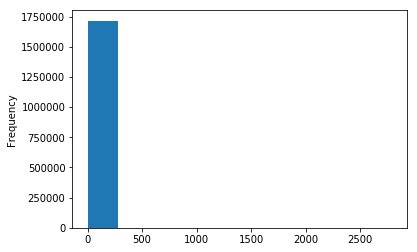

In [16]:
df_b.CREDIT_DAY_OVERDUE.plot(kind='hist')

In [6]:
len(df_b.SK_ID_CURR.unique())

305811

In [71]:
'index_'+'_'.join([_.lower() for _ in columns])

'index_flag_mobil_1_flag_emp_phone_1_flag_work_phone_1_flag_cont_mobile_1_flag_phone_1_flag_email_1'

In [76]:
df_a[columns].mean(axis=1).shape

(6497999,)

In [3]:
# logic behind this divisions
# (i)   which pre-processing to apply, if any
# (ii)  whether pre-processing is applicable for forests / linear models / CNNs
# (iii) large common sense group
# (iv)  output feature format


# key ideas 
# - just process everything and use forests
# - just process everything as use CNNs + a lot of embeddings
# - use unsupervised methods => regular logistic regressions

target = ['TARGET']

In [45]:
for k, v in PARAM_DICT.items():
    print(v['usable'])

False
True
True


In [ ]:
'numeric_01','categorical','dummy'

In [57]:
list({k: v for k, v in feature_dict.items() if v['output_type']=='categorical'}.keys())

['appl_social_family2',
 'appl_social_flags1',
 'appl_dummies1',
 'appl_kyc1',
 'appl_social_markers1',
 'appl_flags1']

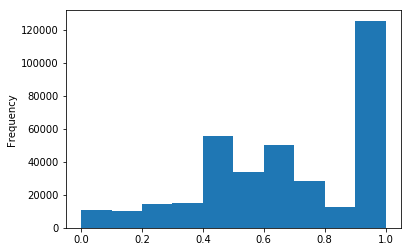

In [73]:
df_a.prop_amt_goods_price.plot(kind='hist')

In [77]:
_ = list({k: v['features'] for k, v in feature_dict.items() if v['output_type']=='numeric_01'}.values())
[item for sublist in _ for item in sublist]

['index_reg_region_not_live_region_reg_region_not_work_region_live_region_not_work_region_reg_city_not_live_city_reg_city_not_work_city_live_city_not_work_city',
 'days_registration',
 'days_id_publish',
 'days_last_phone_change',
 'region_rating_client',
 'region_rating_client_w_city',
 'region_population_relative',
 'days_employed',
 'days_birth',
 'amt_income_total',
 'own_car_age',
 'prop_amt_annuity',
 'prop_amt_goods_price',
 'amt_credit']

In [180]:
for col in external_columns:
    try:
        mn = df_a[col].min()
        mx = df_a[col].max()

        if mn<0 or mx>1:
            print(col)
            
    except:
        print(col)

In [1]:
import gc
import re

import tqdm
import time
import numpy as np
import pandas as pd
from math import sqrt
from sklearn import  metrics

def fill_missing_categoricals(df,columns):
    # cnns of forests
    for column in columns:
        assert column.lower() not in list(df.columns)
        df[column.lower()] = df[column].fillna(value=-1)
    
    # factorize into numeric factors
    for column in columns:
        le, u = df[column.lower()].factorize()
        df[column.lower()] = le
        
    return df,[_.lower() for _ in columns]
def categorical_to_normalized(df,columns):
    # regressions
    for column in columns:
        min_value = df[column].min()
        max_value = df[column].max()
        df[column.lower()] = (df[column]-min_value) / (max_value-min_value)
    return df,[_.lower() for _ in columns]
def categorical_to_normalized_quantile(df,columns):
    # quantile scaling
    df,new_columns = q_cut(df,columns,q_l=0.01,q_r=0.99)      
    for column in new_columns:
        min_value = df[column].min()
        max_value = df[column].max()
        df[column.lower()] = (df[column]-min_value) / (max_value-min_value)
    return df,[_.lower() for _ in new_columns]
def categorical_to_normalized_quantile_inverse(df,columns):
    # regressions
    
    # quantile scaling
    df,new_columns = q_cut(df,columns,q_l=0.01,q_r=0.99)        
    
    # min max scaling
    for column in new_columns:
        df[column] = -df[column]
        min_value = df[column].min()
        max_value = df[column].max()
        df[column.lower()] = (df[column]-min_value) / (max_value-min_value)

    return df,new_columns
def categorical_to_normalized_quantile_log(df,columns):
    # regressions
    
    # quantile scaling
    df,new_columns = q_cut(df,columns,q_l=0.01,q_r=0.99)        
    
    # apply log
    for column in new_columns: 
        df[column.lower()] = df[column.lower()].apply(lambda x: log_normalize(x))

    # min max scaling
    for column in new_columns:
        min_value = df[column].min()
        max_value = df[column].max()
        df[column.lower()] = (df[column]-min_value) / (max_value-min_value)
        
    return df,new_columns
def feature_index(df,columns):
    assert len(columns)>1
   
    df,new_columns = q_cut(df,columns,q_l=0.01,q_r=0.99)    
    
    index_name = 'index_'+'_'.join([_.lower() for _ in columns])
    df[index_name] = df[new_columns].mean(axis=1)
    
    min_value = df[index_name].min()
    max_value = df[index_name].max()
    df[index_name] = (df[index_name]-min_value) / (max_value-min_value)    
    
    return df,[index_name]
def categorical_to_dummy(df,columns):
    new_cols = []
    for column in columns:
        _ = pd.get_dummies(df[column], prefix=column.lower(), prefix_sep='_', drop_first=True)
        
        col_list = []
        for col in list(_.columns):
            col_list.append(re.sub('[^A-Za-z0-9]+', '_', col).lower())
        
        _.columns = col_list
        
        new_cols.extend(list(_.columns))
        for __ in _.columns:
            assert __ not in list(df.columns)  
            df[__] = _[__]
        del _
        gc.collect()
    return df,new_cols
def calc_proportions(df,columns):
    
    assert len(columns)>1
    
    # quantile scaling
    column_divisor = columns[0]
    new_columns = []
    
    for column in columns[1:]:
        df['prop_'+column] = df[column]/df[column_divisor]
        new_columns.append('prop_'+column)

    df,new_columns = q_cut(df,new_columns,q_l=0.01,q_r=0.99)    
    
    for column in new_columns:
        min_value = df[column].min()
        max_value = df[column].max()
        df[column] = (df[column]-min_value) / (max_value-min_value)    
    
    return df,new_columns
def plot_two_hists(df1,df2,series_a,series_b):
    df1[series_a].apply(lambda x: log_normalize(x)).plot(kind='hist',bins=50)
    df2[series_b].apply(lambda x: log_normalize(x)).plot(kind='hist',bins=50,alpha=0.5,secondary_y=True)
    plt.show()
def plot_two_hists_plain(df1,df2,series_a,series_b):
    df1[series_a].apply(lambda x: x).plot(kind='hist',bins=50)
    df2[series_b].apply(lambda x: x).plot(kind='hist',bins=50,alpha=0.5,secondary_y=True)
    plt.show()
def log_normalize(x):
    _ = np.log10(x+1)
    return _   
def q_cut(df,columns,q_l=0.01,q_r=0.99):
    for column in columns:
        # assert column.lower() not in list(df.columns)            
        q_l_value = df[column].quantile(q_l)
        q_r_value = df[column].quantile(q_r)
        
        df[column.lower()]=df[column]
        df.loc[df[df[column]<q_l_value].index,column.lower()] = q_l_value
        df.loc[df[df[column]>q_r_value].index,column.lower()] = q_r_value
        
    return df,[_.lower() for _ in columns]
def unity_operation(df,columns):
    # cnns of forests
    for column in columns:
        assert column.lower() not in list(df.columns)
        df[column.lower()] = df[column].fillna(value=0).clip(0,1)
    return df,[_.lower() for _ in columns]

In [7]:
import tqdm
import pandas as pd
import numpy as np
from multiprocessing import Pool
import os

external_columns = ['EXT_SOURCE_1','EXT_SOURCE_2',
'EXT_SOURCE_3','APARTMENTS_AVG',
'BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG',
'YEARS_BUILD_AVG','COMMONAREA_AVG',
'ELEVATORS_AVG','ENTRANCES_AVG',
'FLOORSMAX_AVG','FLOORSMIN_AVG',
'LANDAREA_AVG','LIVINGAPARTMENTS_AVG',
'LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG',
'NONLIVINGAREA_AVG','APARTMENTS_MODE',
'BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE',
'YEARS_BUILD_MODE','COMMONAREA_MODE',
'ELEVATORS_MODE','ENTRANCES_MODE',
'FLOORSMAX_MODE','FLOORSMIN_MODE',
'LANDAREA_MODE','LIVINGAPARTMENTS_MODE',
'LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE',
'NONLIVINGAREA_MODE','APARTMENTS_MEDI',
'BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI',
'YEARS_BUILD_MEDI','COMMONAREA_MEDI',
'ELEVATORS_MEDI','ENTRANCES_MEDI',
'FLOORSMAX_MEDI','FLOORSMIN_MEDI',
'LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI',
'LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI',
'NONLIVINGAREA_MEDI','TOTALAREA_MODE']

# plain feature engineering on applications data
SOCIAL_PROOF = {
    'social_family1':{
        'features':['CNT_CHILDREN','CNT_FAM_MEMBERS'],
        'function':categorical_to_normalized_quantile, # done
        'usable':['reg'],
        'output_type':'numeric_01',        
    },
    'social_family2':{
        'features':['CNT_CHILDREN','CNT_FAM_MEMBERS'],
        'function':fill_missing_categoricals, # done
        'usable':['cnn','forest'],
        'output_type':'categorical',        
    },   
    'social_flags1':{
        'features':['FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL'],
        'function':fill_missing_categoricals, # done
        'usable':['cnn','forest'],
        'output_type':'categorical',        
    },
    'social_flags2':{
        'features':['FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL'],
        'function':categorical_to_dummy, # done
        'usable':['reg'],
        'output_type':'dummy',        
    },    
    'circle_default_rates':{
        'features':['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE'],
        'function':feature_index, # done
        'usable':['cnn','forest','reg'],
        'output_type':'numeric_0_1',        
    }, 
    'misregion_features':{
        'features':['REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY'],
        'function':feature_index, # done
        'usable':['cnn','forest','reg'],
        'output_type':'numeric_01',        
    },
    'id_expiry':{
        'features':['DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE'],
        'function':categorical_to_normalized_quantile_inverse, # done
        'usable':['cnn','forest','reg'],
        'output_type':'numeric_01',        
    },
    'dummies1':{
        'features':['NAME_TYPE_SUITE','NAME_INCOME_TYPE'],
        'function':fill_missing_categoricals, # done
        'usable':['cnn','forest'],
        'output_type':'categorical',        
    },
    'dummies2':{
        'features':['NAME_TYPE_SUITE','NAME_INCOME_TYPE'],
        'function':categorical_to_dummy, # done
        'usable':['reg'],
        'output_type':'dummy',        
    },
    'ext_metrics_1':{
        'features':external_columns,
        'function':unity_operation, # done
        'usable':['cnn','forest','reg'],
        'output_type':'numeric_01',        
    },  
}

# may overfit to this data
KYC_DATA = {   
    'kyc1':{
        'features':['FLAG_DOCUMENT_3','FLAG_DOCUMENT_6','FLAG_DOCUMENT_8'],
        'function':fill_missing_categoricals, # done
        'usable':['cnn','forest'],
        'output_type':'categorical',        
    },
    'kyc2':{
        'features':['FLAG_DOCUMENT_3','FLAG_DOCUMENT_6','FLAG_DOCUMENT_8'],
        'function':categorical_to_dummy, # done
        'usable':['reg'],
        'output_type':'dummy',        
    },      
}

SOCIAL_DATA = {
    'social_markers1':{
        'features':['NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','OCCUPATION_TYPE','CODE_GENDER'],
        'function':fill_missing_categoricals, # done
        'usable':['cnn','forest'],
        'output_type':'categorical',        
    },
    'social_markers2':{
        'features':['NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','OCCUPATION_TYPE','CODE_GENDER'],
        'function':categorical_to_dummy, # done
        'usable':['reg'],
        'output_type':'dummy',        
    },     
}

WEALTH = {
    'wealth_flags1':{
        'features':['FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_HOUSING_TYPE','ORGANIZATION_TYPE'],
        'function':fill_missing_categoricals, # done
        'usable':['cnn','forest'],
        'output_type':'categorical',        
    },
    'wealth_flags2':{
        'features':['FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_HOUSING_TYPE','ORGANIZATION_TYPE'],
        'function':categorical_to_dummy, # done
        'usable':['reg'],
        'output_type':'dummy',        
    },  
    'region_wealth':{
        'features':['REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','REGION_POPULATION_RELATIVE'],
        'function':categorical_to_normalized, # done
        'usable':['cnn','forest','reg'],
        'output_type':'numeric_01',        
    },    
    'indirect_wealth':{
        'features':['DAYS_EMPLOYED','DAYS_BIRTH'],
        'function':categorical_to_normalized_quantile_inverse, # done
        'usable':['cnn','forest','reg'],
        'output_type':'numeric_01',        
    },    
    'income_metrics':{
        'features':['AMT_INCOME_TOTAL','OWN_CAR_AGE'],
        'function':categorical_to_normalized_quantile_log, # done
        'usable':['cnn','forest','reg'],
        'output_type':'numeric_01',        
    },      
} 
    
LOAN = {
    'loan_flags1':{
        'features':['NAME_CONTRACT_TYPE'],
        'function':fill_missing_categoricals, # done
        'usable':['cnn','forest'],
        'output_type':'categorical',        
    },
    'loan_flags2':{
        'features':['NAME_CONTRACT_TYPE'],
        'function':categorical_to_dummy, # done
        'usable':['reg'],
        'output_type':'dummy',        
    },    
    'credit_proportions':{
        'features':['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE'],
        'function':calc_proportions,
        'usable':['cnn','forest','reg'], # done
        'output_type':'numeric_01',        
    },    
    # assume that credit size and annuity are highly correlated
    'credit_metrics':{
        'features':['AMT_CREDIT'],
        'function':categorical_to_normalized_quantile_log, # done
        'usable':['cnn','forest','reg'],
        'output_type':'numeric_01',        
    },        
}

def prepare_tr_te_applications(model_type):
    assert model_type in ['cnn','forest','reg']

    # concat train and test dataframes
    df_a = [(pd.read_csv(fp)
                .drop_duplicates()
                ) for fp in ['../data/application_train.csv','../data/application_test.csv']]

    df_a[1]['TARGET'] = -1
    df_a = pd.concat(df_a)    
    feature_dict = {}

    for PARAM_DICT in SOCIAL_PROOF,KYC_DATA,SOCIAL_DATA,WEALTH,LOAN:
        feature_prefix = 'appl_'
        FILTERED_PARAM_DICT = {k: v for k, v in PARAM_DICT.items() if model_type in v['usable']}

        for feature_group,transformation in FILTERED_PARAM_DICT.items():

            df_a,columns = transformation['function'](df_a,transformation['features'])
            feature_dict[feature_prefix+feature_group] = {
                'features':columns,
                'output_type':transformation['output_type']
            }

    return df_a,feature_dict
    
def prepare_past_applications(df_a):
    # the function is model agnostic, so it provides only 0-1 values

    # initial preprocessing for past loans
    PAST_LOAN = {
        'past_credit_proportions':{
            'features':['AMT_CREDIT','AMT_ANNUITY','AMT_APPLICATION','AMT_DOWN_PAYMENT','AMT_GOODS_PRICE'],
            'function':calc_proportions,
            'usable':['cnn','forest','reg'], # done
            'output_type':'numeric_01',        
        },    
        # assume that credit size and annuity are highly correlated
        'past_credit_metrics':{
            'features':['AMT_CREDIT'],
            'function':categorical_to_normalized_quantile_log, # done
            'usable':['cnn','forest','reg'],
            'output_type':'numeric_01',        
        },
        'past_ext_indices':{
            'features':['RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED'],
            'function':categorical_to_normalized_quantile, # done
            'usable':['cnn','forest','reg'],
            'output_type':'numeric_01',            
        },
        'past_decision_metrics':{
            'features':['DAYS_DECISION'],
            'function':categorical_to_normalized_quantile_inverse, # done
            'usable':['cnn','forest','reg'],
            'output_type':'numeric_01',            
        },   
        'past_credit_length':{
            'features':['CNT_PAYMENT'],
            'function':categorical_to_normalized_quantile, # done
            'usable':['cnn','forest','reg'],
            'output_type':'numeric_01',            
        }
    }

    # preprocess if possible using standard functions
    df_a_pr = pd.read_csv('../data/previous_application.csv')
    df_a_join = df_a[['SK_ID_CURR','AMT_CREDIT']].copy()

    model_type = 'reg'
    feature_dict = {}

    for PARAM_DICT in [PAST_LOAN]:
        feature_prefix = 'past_appl_'
        FILTERED_PARAM_DICT = {k: v for k, v in PARAM_DICT.items() if model_type in v['usable']}

        for feature_group,transformation in FILTERED_PARAM_DICT.items():

            df_a_pr,columns = transformation['function'](df_a_pr,transformation['features'])
            feature_dict[feature_prefix+feature_group] = {
                'features':columns,
                'output_type':transformation['output_type']
            }

    # approval rate
    # count of approved credits

    df_a_pr = df_a_pr.merge(df_a_join,on='SK_ID_CURR')
    df_a_pr['was_approved'] = df_a_pr.NAME_CONTRACT_STATUS=='Approved'
    df_a_pr['was_cancelled'] = df_a_pr.NAME_CONTRACT_STATUS=='Canceled'

    f = {'was_approved':['sum','mean']}
    approval_rates = df_a_pr.groupby('SK_ID_CURR')['was_approved'].agg(f)
    approval_rates = approval_rates.reset_index()
    approval_rates.columns = ['SK_ID_CURR','cnt_approved','approval_rate']
    approval_rates, _ = categorical_to_normalized_quantile(columns=['cnt_approved'],df=approval_rates)

    f = {'was_cancelled':['sum','mean']}
    cancel_rates = df_a_pr.groupby('SK_ID_CURR')['was_cancelled'].agg(f)
    cancel_rates = cancel_rates.reset_index()
    cancel_rates.columns = ['SK_ID_CURR','cnt_cancelled','cancel_rate']
    cancel_rates, _ = categorical_to_normalized_quantile(columns=['cnt_cancelled'],df=cancel_rates)


    # reject reason propensities
    reject_reason_propensity = pd.pivot_table(df_a_pr[~df_a_pr.was_approved],
                           index=["SK_ID_CURR"],
                           columns = ['CODE_REJECT_REASON'],
                           values=['SK_ID_PREV'],
                           aggfunc=[len],
                           fill_value=0)

    reject_reason_propensity = reject_reason_propensity.reset_index()
    reject_reason_propensity.columns = ['SK_ID_CURR','rr_prop_client','rr_prop_hc','rr_prop_limit','rr_prop_scro','rr_prop_scoft','rr_prop_system','rr_prop_verif','rr_prop_xap','rr_prop_xna']
    # we are interested only in reject reasons
    del reject_reason_propensity['rr_prop_xap']

    reject_reason_propensity = reject_reason_propensity.set_index('SK_ID_CURR')
    # drop rows where there are zero valid reject reasons
    reject_reason_propensity = reject_reason_propensity.drop(index=reject_reason_propensity[(reject_reason_propensity.sum(axis=1)==0)].index)
    reject_reason_propensity['sum'] = reject_reason_propensity.sum(axis=1)

    for _ in ['rr_prop_client','rr_prop_hc','rr_prop_limit','rr_prop_scro','rr_prop_scoft','rr_prop_system','rr_prop_verif','rr_prop_xna']:
        reject_reason_propensity[_] = reject_reason_propensity[_]/reject_reason_propensity['sum']

    del reject_reason_propensity['sum']   
    reject_reason_propensity = reject_reason_propensity.reset_index()


    # mean annuity / application to credit / down payment for APPROVED credits
    # mean last credit size for APPROVED credits
    # mean last normalized metrics for APPROVED credits
    # mean CNT_PAYMENT
    # mean days decision

    f = ['mean']
    mean_rates = df_a_pr[df_a_pr.was_approved==True].groupby('SK_ID_CURR')[['prop_amt_annuity','prop_amt_application',
                                                                            'prop_amt_down_payment','prop_amt_goods_price',
                                                                            'cnt_payment','days_decision',
                                                                            'rate_interest_primary','rate_interest_privileged']].agg(f)
    mean_rates = mean_rates.reset_index()
    mean_rates.columns = ['SK_ID_CURR',
                          'past_prop_amt_annuity',
                          'past_prop_amt_application',
                          'past_prop_amt_down_payment',
                          'past_prop_amt_goods_price',
                          'past_cnt_payment',
                          'past_days_decision',
                          'past_rate_interest_primary',
                          'past_rate_interest_privileged']

    # most popular dummy / categorical variable for last credits - go category by category manually

    # NFLAG_INSURED_ON_APPROVAL
    f = {'NFLAG_INSURED_ON_APPROVAL':['mean']}
    insured_rates = df_a_pr.groupby('SK_ID_CURR')['NFLAG_INSURED_ON_APPROVAL'].agg(f)
    insured_rates = insured_rates.reset_index()
    insured_rates.columns = ['SK_ID_CURR','prop_insured']


    # NAME_YIELD_GROUP
    # also make an index?

    # reject reason propensities
    yield_group_index = pd.pivot_table(df_a_pr,
                           index=["SK_ID_CURR"],
                           columns = ['NAME_YIELD_GROUP'],
                           values=['SK_ID_PREV'],
                           aggfunc=[len],
                           fill_value=0)

    yield_group_index = yield_group_index.reset_index()
    yield_group_index.columns = ['SK_ID_CURR','risk_index_xna','risk_index_high','risk_index_low_action','risk_index_low_normal','risk_index_low_middle']
    yield_group_index = yield_group_index.set_index('SK_ID_CURR')
    yield_group_index['sum'] = yield_group_index.sum(axis=1)

    for _ in ['risk_index_xna','risk_index_high','risk_index_low_action','risk_index_low_normal','risk_index_low_middle']:
        yield_group_index[_] = yield_group_index[_]/yield_group_index['sum']

    del yield_group_index['sum']   
    yield_group_index = yield_group_index.reset_index()

    # NAME_PAYMENT_TYPE

    # reject reason propensities
    payment_type_index = pd.pivot_table(df_a_pr,
                           index=["SK_ID_CURR"],
                           columns = ['NAME_PAYMENT_TYPE'],
                           values=['SK_ID_PREV'],
                           aggfunc=[len],
                           fill_value=0)

    payment_type_index = payment_type_index.reset_index()

    payment_type_index.columns = ['SK_ID_CURR','cash_thru_bank','employer_account','non_cash_your_acc','payment_xna']
    payment_type_index = payment_type_index.set_index('SK_ID_CURR')
    payment_type_index['sum'] = payment_type_index.sum(axis=1)

    for _ in ['cash_thru_bank','employer_account','non_cash_your_acc','payment_xna']:
        payment_type_index[_] = payment_type_index[_]/payment_type_index['sum']

    del payment_type_index['sum']   
    payment_type_index = payment_type_index.reset_index()

    # NAME_CLIENT_TYPE
    # reject reason propensities
    client_type_index = pd.pivot_table(df_a_pr,
                           index=["SK_ID_CURR"],
                           columns = ['NAME_CLIENT_TYPE'],
                           values=['SK_ID_PREV'],
                           aggfunc=[len],
                           fill_value=0)

    client_type_index = client_type_index.reset_index()

    client_type_index.columns = ['SK_ID_CURR','client_type_new','client_type_refreshed','client_type_repeater','client_type_xna']
    client_type_index = client_type_index.set_index('SK_ID_CURR')
    client_type_index['sum'] = client_type_index.sum(axis=1)

    for _ in ['client_type_new','client_type_refreshed','client_type_repeater','client_type_xna']:
        client_type_index[_] = client_type_index[_]/client_type_index['sum']

    del client_type_index['sum']   
    client_type_index = client_type_index.reset_index()

    # NAME_CASH_LOAN_PURPOSE
    # NAME_TYPE_SUITE
    # NAME_GOODS_CATEGORY
    # NAME_PORTFOLIO
    # NAME_PRODUCT_TYPE


    # gather all the data in one table
    # approval_rates
    # ['cnt_approved','approval_rate']

    # cancel_rates
    # ['cnt_cancelled','cancel_rate']

    # reject_reason_propensity
    # ['rr_prop_client','rr_prop_hc','rr_prop_limit','rr_prop_scro','rr_prop_scoft','rr_prop_system','rr_prop_verif','rr_prop_xna']        

    # mean_rates
    # ['prop_amt_annuity','prop_amt_application',
    # 'prop_amt_down_payment','prop_amt_goods_price',
    # 'cnt_payment','days_decision',
    # 'rate_interest_primary','rate_interest_privileged']

    # insured_rates
    # 'prop_insured'

    # yield_group_index
    # ['risk_index_xna','risk_index_high','risk_index_low_action','risk_index_low_normal','risk_index_low_middle']

    # payment_type_index
    # ['cash_thru_bank','employer_account','non_cash_your_acc','payment_xna']

    # client_type_index
    # ['client_type_new','client_type_refreshed','client_type_repeater','client_type_xna']

    df_a_join = df_a[['SK_ID_CURR','AMT_CREDIT']].copy()

    df_a_join = df_a_join.merge(approval_rates,on='SK_ID_CURR',how='left')
    df_a_join = df_a_join.merge(cancel_rates,on='SK_ID_CURR',how='left')
    df_a_join = df_a_join.merge(reject_reason_propensity,on='SK_ID_CURR',how='left')
    df_a_join = df_a_join.merge(mean_rates,on='SK_ID_CURR',how='left')
    df_a_join = df_a_join.merge(insured_rates,on='SK_ID_CURR',how='left')
    df_a_join = df_a_join.merge(yield_group_index,on='SK_ID_CURR',how='left')
    df_a_join = df_a_join.merge(payment_type_index,on='SK_ID_CURR',how='left')
    df_a_join = df_a_join.merge(client_type_index,on='SK_ID_CURR',how='left')

    # the fact that data is absent is information in itself
    fillna_zeros = ['cnt_approved']\
                    +['cnt_cancelled']

    # we just do no know => so we assume neutral position
    fillna_avg = ['risk_index_xna','risk_index_high','risk_index_low_action','risk_index_low_normal','risk_index_low_middle']\
                 +['approval_rate','cancel_rate']\
                 +['rr_prop_client','rr_prop_hc','rr_prop_limit','rr_prop_scro','rr_prop_scoft','rr_prop_system','rr_prop_verif','rr_prop_xna']\
                 +['cash_thru_bank','employer_account','non_cash_your_acc','payment_xna']\
                 +['past_days_decision']\
                 +['past_prop_amt_annuity','past_prop_amt_application','past_prop_amt_down_payment','past_prop_amt_goods_price','past_cnt_payment']\
                 +['prop_insured']

    # no previous credits => new client
    fillna_zeros = fillna_zeros + ['client_type_refreshed','client_type_repeater','client_type_xna']
    # fillna_ones = ['client_type_new']

    df_a_join[fillna_zeros] = df_a_join[fillna_zeros].fillna(value=0)
    df_a_join['client_type_new'] = df_a_join['client_type_new'].fillna(value=1)
    
    for _ in fillna_avg:
        df_a_join[_] = df_a_join[_].fillna(value=df_a_join[_].mean())

    feature_dict = {'a_pr_features': {'features': fillna_ones+fillna_ones+fillna_avg,
                                    'output_type': 'numeric_01'}
                   }

    return df_a_join, feature_dict
    
def prepare_cb_data(df_a):
    df_b = pd.read_csv('../data/bureau.csv')
    df_bb = pd.read_csv('../data/bureau_balance.csv')

    # clean the currencies
    df_b = df_b[df_b.CREDIT_CURRENCY == 'currency 1']

    # clean the statuses
    df_b[df_b.CREDIT_ACTIVE.isin(['Bad debt','Sold'])] = 'Closed'

    # preparation
    # join with application table
    # id, loan sum

    df_a_join = df_a[['SK_ID_CURR','AMT_CREDIT']].copy()
    df_b = df_b.merge(df_a_join,on='SK_ID_CURR')

    # clean lines wo credit size
    df_b = df_b[df_b.AMT_CREDIT_SUM > 0]

    # calculate the % rate AMT_ANNUITY / AMT_CREDIT_SUM
    # calculate max overdue rate AMT_CREDIT_MAX_OVERDUE / AMT_CREDIT_SUM
    df_b, _ = calc_proportions(df_b,['AMT_CREDIT_SUM','AMT_ANNUITY','AMT_CREDIT_MAX_OVERDUE'])
    # ['prop_amt_annuity', 'prop_amt_credit_max_overdue']

    # minor cleaning
    df_b.CNT_CREDIT_PROLONG = df_b.CNT_CREDIT_PROLONG.astype(int)

    # checked
    # calculate max/mean CNT_CREDIT_PROLONG per application/client => 0..1
    prolong = pd.pivot_table(df_b,
                           index=["SK_ID_CURR"],
                           values=["CNT_CREDIT_PROLONG"],
                           aggfunc={"CNT_CREDIT_PROLONG":{max}},
                           fill_value=0)

    prolong.columns = ['max_cnt_credit_prolong']
    prolong = prolong.reset_index()

    # checked
    # total sum of open outstanding credit debts
    current_sum_outstanding = df_b[df_b.CREDIT_ACTIVE=='Active'].groupby(by=['SK_ID_CURR'])['AMT_CREDIT_SUM_DEBT'].sum()
    current_sum_outstanding = current_sum_outstanding.reset_index()
    current_sum_outstanding.columns = ['SK_ID_CURR','total_outstanding_debt']


    # checked
    df_b.prop_amt_annuity = df_b.prop_amt_annuity.astype('float')
    mean_annuity = df_b[(df_b.CREDIT_ACTIVE=='Active')&
                      (pd.notnull(df_b.prop_amt_annuity))].groupby(by=['SK_ID_CURR'])['prop_amt_annuity'].mean()

    mean_annuity = mean_annuity.reset_index()
    mean_annuity.columns = ['SK_ID_CURR','mean_prop_amt_annuity']

    df_b.prop_amt_credit_max_overdue = df_b.prop_amt_credit_max_overdue.astype('float')
    mean_prop_amt_credit_max_overdue = df_b[(df_b.CREDIT_ACTIVE=='Active')&
                                            (pd.notnull(df_b.prop_amt_credit_max_overdue))].groupby(by=['SK_ID_CURR'])['prop_amt_credit_max_overdue'].mean()

    mean_prop_amt_credit_max_overdue = mean_prop_amt_credit_max_overdue.reset_index()
    mean_prop_amt_credit_max_overdue.columns = ['SK_ID_CURR','mean_prop_amt_credit_max_overdue']



    # prepare the main table
    df_a_join = df_a[['SK_ID_CURR','AMT_CREDIT']].copy()

    # merge new meta-data
    df_a_join = df_a_join.merge(prolong,on='SK_ID_CURR',how='left')
    df_a_join = df_a_join.merge(current_sum_outstanding,on='SK_ID_CURR',how='left')
    df_a_join = df_a_join.merge(mean_annuity,on='SK_ID_CURR',how='left')
    df_a_join = df_a_join.merge(mean_prop_amt_credit_max_overdue,on='SK_ID_CURR',how='left')

    new_cols = ['max_cnt_credit_prolong',
                'total_outstanding_debt',
                'mean_prop_amt_annuity',
                'mean_prop_amt_credit_max_overdue']

    # custom NA handling
    # no data about prolongations = no prolongations
    df_a_join.max_cnt_credit_prolong.fillna(value=0,inplace=True)
    # no data about debt = no debt 
    df_a_join.total_outstanding_debt.fillna(value=0,inplace=True)
    # no risk rate = assume just average risk rate
    df_a_join.mean_prop_amt_annuity.fillna(value=df_a_join.mean_prop_amt_annuity.mean(),inplace=True)
    # no info on average overdue data = assume no overdue
    df_a_join.mean_prop_amt_credit_max_overdue.fillna(value=0,inplace=True)

    # replace negative elements with zero 
    df_a_join.loc[df_a_join.total_outstanding_debt<0,'total_outstanding_debt'] = 0
    df_a_join.total_outstanding_debt.fillna(value=0,inplace=True)
    df_a_join, _ = calc_proportions(df_a_join,['AMT_CREDIT','total_outstanding_debt'])

    new_cols = ['max_cnt_credit_prolong',
                _[0],
                'mean_prop_amt_annuity',
                'mean_prop_amt_credit_max_overdue']

    df_a_join,_ = categorical_to_normalized_quantile(df_a_join,['max_cnt_credit_prolong'])

    feature_dict = {'cb_features': {'features': new_cols,
                                    'output_type': 'numeric_01'}
                   }
    
    return df_a_join, feature_dict   
    
def test_data(df,columns,data_type):
    if data_type == 'numeric_01':
        for column in columns:
            assert np.issubdtype(df[column], np.number)
            assert df[column].max()<1.01
            assert df[column].max()>-0.01    
    elif data_type == 'categorical':
        # categorical data is assumed to be stored in numerical form
        for column in columns:
            assert df_a[column].dtype in ['int8','int32','int64']
            assert df[column].max()>0        
    elif data_type == 'dummy':
        for column in columns:
            assert np.issubdtype(df[column], np.number)
            assert sorted(list(df[column].unique())) == [0,1]        
        
def get_features_by_type(feature_dict,feature_type):
    
    if feature_type == 'all':
        _ = list({k: v['features'] for k, v in feature_dict.items()}.values())
        __ = list({k: v['features'] for k, v in feature_dict.items()}.keys())        
        _ = [item for sublist in _ for item in sublist] 
    else:
        _ = list({k: v['features'] for k, v in feature_dict.items() if v['output_type']==feature_type}.values())
        __ = list({k: v['features'] for k, v in feature_dict.items() if v['output_type']==feature_type}.keys())    
        _ = [item for sublist in _ for item in sublist]        
      
    return set(_),set(__)
    
def get_features_by_groups(feature_dict,feature_type):
    
    if feature_type == 'all':
        _ = list({k: v['features'] for k, v in feature_dict.items()}.values())
        __ = list({k: v['features'] for k, v in feature_dict.items()}.keys())        
        _ = [item for sublist in _ for item in sublist] 
    else:
        _ = list({k: v['features'] for k, v in feature_dict.items() if k ==feature_type}.values())
        __ = list({k: v['features'] for k, v in feature_dict.items() if k ==feature_type}.keys())    
        _ = [item for sublist in _ for item in sublist]        
      
    return set(_),set(__)   

def test_id_consistency(df):
    df_a_tr = pd.read_csv('../data/application_train.csv')
    df_a_te = pd.read_csv('../data/application_test.csv')
    
    s1 = set(df_a_tr.SK_ID_CURR.unique()).union(set(df_a_te.SK_ID_CURR.unique()))
    s2 = set(df.SK_ID_CURR.unique())
    
    assert s1==s2
    
def produce_bb_indexes(sk_id):
    global df_gr_by
    groupby_object = df_gr_by.get_group(sk_id)

    l = groupby_object.MONTHS_BALANCE.min()
    r = groupby_object.MONTHS_BALANCE.max()
    # max period length
    length = r - l

    if length == 0:
        length = 1

    value_counts =  dict(groupby_object.STATUS.value_counts())

    for i in range(0,6):
        if str(i) not in value_counts:
            value_counts[str(i)] = 0

    value_counts['0'] +=  length-sum(value_counts.values()) 
    value_counts = {k:v/length for k,v in value_counts.items()}

    return value_counts
    
def get_cbb_features(df_a):
    global df_gr_by
    df_a_join = df_a[['SK_ID_CURR','AMT_CREDIT']].copy()
    df_b = pd.read_csv('../data/bureau.csv')
    df_bb = pd.read_csv('../data/bureau_balance.csv')

    # leave only the connected items
    df_bb = df_bb.merge(df_b[['SK_ID_CURR', 'SK_ID_BUREAU']],on='SK_ID_BUREAU')
    df_bb = df_bb.merge(df_a_join,on='SK_ID_CURR')

    # drop all the unknown points and all closed points
    # for each SK_ID_CURR calculate the counts of time in each status
    # normalize by the max len (we know of) in any of the meaningful statuses 

    df_gr_by = df_bb[(df_bb.STATUS.isin(['0','1', '2', '3', '5', '4']))].groupby(by=['SK_ID_BUREAU'])[['MONTHS_BALANCE','STATUS']]
    sk_list = list(df_bb[(df_bb.STATUS.isin(['0','1', '2', '3', '5', '4']))].SK_ID_BUREAU.unique())

    with Pool(10) as p:
        count_data = list(tqdm.tqdm(p.imap(produce_bb_indexes, sk_list), total=len(sk_list)))

    df_bb_counts = pd.DataFrame(count_data)
    df_bb_counts['SK_ID_BUREAU'] = sk_list
    df_bb_counts.columns = ['time_in_state0','time_in_state1','time_in_state2','time_in_state3','time_in_state4','time_in_state5','SK_ID_BUREAU']

    # do some data cleaning for edge cases
    new_cols = ['time_in_state0','time_in_state1','time_in_state2','time_in_state3','time_in_state4','time_in_state5']
    df_bb_counts[new_cols] = df_bb_counts[new_cols].clip(lower=0,upper=1) 

    avg_bb_times = df_bb[['SK_ID_BUREAU','SK_ID_CURR']].drop_duplicates().merge(df_bb_counts,on='SK_ID_BUREAU')
    avg_bb_times = avg_bb_times.groupby(by='SK_ID_CURR')[new_cols].mean()
    avg_bb_times = avg_bb_times.reset_index()

    feature_dict_bb = {'cbb_features': {'features': new_cols,
                                    'output_type': 'numeric_01'}
                   }
    
    return avg_bb_times,feature_dict_bb    

In [2]:
from ETL.ETL_functions import *

df_a, feature_dict = prepare_tr_te_applications('forest')
df_pa_features, feature_dict_pa = prepare_past_applications(df_a)

/opt/conda/lib/python3.6/site-packages/pandas/core/nanops.py:359: RuntimeWarning: divide by zero encountered in true_divide
  the_mean = the_sum / count
/home/keras/notebook/nvme/home_credit/src/ETL/ETL_functions.py:284: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  approval_rates = df_a_pr.groupby('SK_ID_CURR')['was_approved'].agg(f)
/home/keras/notebook/nvme/home_credit/src/ETL/ETL_functions.py:290: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  cancel_rates = df_a_pr.groupby('SK_ID_CURR')['was_cancelled'].agg(f)
/home/keras/notebook/nvme/home_credit/src/ETL/ETL_functions.py:347: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  insured_rates = df_a_pr.groupby('SK_ID_CURR')['NFLAG_INSURED_ON_APPROVAL'].agg(f)


In [5]:
list(df_pa_features.columns)

['SK_ID_CURR',
 'AMT_CREDIT',
 'cnt_approved',
 'approval_rate',
 'cnt_cancelled',
 'cancel_rate',
 'rr_prop_client',
 'rr_prop_hc',
 'rr_prop_limit',
 'rr_prop_scro',
 'rr_prop_scoft',
 'rr_prop_system',
 'rr_prop_verif',
 'rr_prop_xna',
 'past_prop_amt_annuity',
 'past_prop_amt_application',
 'past_prop_amt_down_payment',
 'past_prop_amt_goods_price',
 'past_cnt_payment',
 'past_days_decision',
 'past_rate_interest_primary',
 'past_rate_interest_privileged',
 'prop_insured',
 'risk_index_xna',
 'risk_index_high',
 'risk_index_low_action',
 'risk_index_low_normal',
 'risk_index_low_middle',
 'cash_thru_bank',
 'employer_account',
 'non_cash_your_acc',
 'payment_xna',
 'client_type_new',
 'client_type_refreshed',
 'client_type_repeater',
 'client_type_xna']

In [3]:
import time
from functools import reduce

def ETL(model_type='reg'):
    last_time = time.time()
    print('Starting pre-processing ...')


    df_a, feature_dict = prepare_tr_te_applications(model_type)
    print('Finished processing application train/test data {}'.format(time.time() - last_time))
    last_time = time.time()

    # test data
    for feature_type in ['dummy','numeric_01','categorical']:
        _,__ = get_features_by_type(feature_dict,feature_type)
        test_data(df_a,_,feature_type)

    # test that all ids were preserved
    test_id_consistency(df_a)    

    print('Finished testing application train/test data {}'.format(time.time() - last_time))
    last_time = time.time()

    # any df_a would do for cb features
    df_cb_features, feature_dict_cb = prepare_cb_data(df_a)

    print('Finished processing credit bureau data {}'.format(time.time() - last_time))
    last_time = time.time()

    for feature_type in ['dummy','numeric_01','categorical']:
        _,__ = get_features_by_type(feature_dict_cb,feature_type)
        test_data(df_cb_features,_,feature_type)

    print('Finished testing credit bureau data {}'.format(time.time() - last_time))
    last_time = time.time()    

    # any df_a would do for cb features
    # check that no data was wrongly lost during feature engineering

    # any df_a would do for past application features
    df_pa_features, feature_dict_pa = prepare_past_applications(df_a)

    print('Finished processing past application data {}'.format(time.time() - last_time))
    last_time = time.time()

    # test data
    for feature_type in ['dummy','numeric_01','categorical']:
        _,__ = get_features_by_type(feature_dict_pa,feature_type)
        test_data(df_pa_features,_,feature_type)

    print('Finished testing past application data {}'.format(time.time() - last_time))
    last_time = time.time()

    df_cbb_features, feature_dict_cbb = get_cbb_features(df_a)

    print('Finished processing credit bureau balance data {}'.format(time.time() - last_time))
    last_time = time.time()

    # test data
    for feature_type in ['dummy','numeric_01','categorical']:
        _,__ = get_features_by_type(feature_dict_cbb,feature_type)
        test_data(df_cbb_features,_,feature_type)

    print('Finished testing credit bureau balance data {}'.format(time.time() - last_time))
    last_time = time.time()
    
    feature_dict = reduce((lambda x, y: {**x, **y}), [feature_dict,feature_dict_cb,feature_dict_pa,feature_dict_cbb])        
    all_cols = get_features_by_type(feature_dict,'all')[0]    

    df_a = df_a.merge(df_cb_features,on='SK_ID_CURR')
    df_a = df_a.merge(df_pa_features,on='SK_ID_CURR')
    df_a = df_a.merge(df_cbb_features,on='SK_ID_CURR',how='left')

    # remove all the cols except for target, ID and necessary cols
    df_a = df_a[all_cols + ['TARGET','SK_ID_CURR']]

    # do a simple thing - fill all the missing values with averages
    na_cols = []
    for _ in all_cols:
        if pd.isnull(df_a[_]).sum()>0:
            df_a[_] = df_a[_].fillna(value=df_a[_].mean())  

    return df_a,feature_dict

Starting pre-processing ...


/opt/conda/lib/python3.6/site-packages/pandas/core/nanops.py:359: RuntimeWarning: divide by zero encountered in true_divide
  the_mean = the_sum / count


Finished processing application train/test data 9.123631715774536
Finished testing application train/test data 3.393538236618042
Finished processing credit bureau data 38.56724786758423
Finished testing credit bureau data 0.008314132690429688


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:278: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:284: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:341: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version


Finished processing past application data 23.802894830703735
Finished testing past application data 0.08324074745178223


  9%|▉         | 61042/663424 [00:09<01:37, 6147.93it/s]/opt/conda/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)
100%|██████████| 663424/663424 [01:30<00:00, 7293.25it/s]


Finished processing credit bureau balance data 104.19085359573364
Finished testing credit bureau balance data 0.010450363159179688


In [1]:
import time
from functools import reduce

from ETL.ETL_functions import *

model_type = 'forest'

last_time = time.time()
print('Starting pre-processing ...')


df_a, feature_dict = prepare_tr_te_applications(model_type)
print('Finished processing application train/test data {}'.format(time.time() - last_time))
last_time = time.time()

# test data
for feature_type in ['dummy','numeric_01','categorical']:
    _,__ = get_features_by_type(feature_dict,feature_type)
    test_data(df_a,_,feature_type)

# test that all ids were preserved
test_id_consistency(df_a)    

print('Finished testing application train/test data {}'.format(time.time() - last_time))
last_time = time.time()

# any df_a would do for cb features
df_cb_features, feature_dict_cb = prepare_cb_data(df_a)

print('Finished processing credit bureau data {}'.format(time.time() - last_time))
last_time = time.time()

for feature_type in ['dummy','numeric_01','categorical']:
    _,__ = get_features_by_type(feature_dict_cb,feature_type)
    test_data(df_cb_features,_,feature_type)

print('Finished testing credit bureau data {}'.format(time.time() - last_time))
last_time = time.time()    

# any df_a would do for cb features
# check that no data was wrongly lost during feature engineering

# any df_a would do for past application features
df_pa_features, feature_dict_pa = prepare_past_applications(df_a)

print('Finished processing past application data {}'.format(time.time() - last_time))
last_time = time.time()

# test data
for feature_type in ['dummy','numeric_01','categorical']:
    _,__ = get_features_by_type(feature_dict_pa,feature_type)
    test_data(df_pa_features,_,feature_type)

print('Finished testing past application data {}'.format(time.time() - last_time))
last_time = time.time()

df_cbb_features, feature_dict_cbb = get_cbb_features(df_a)

print('Finished processing credit bureau balance data {}'.format(time.time() - last_time))
last_time = time.time()

# test data
for feature_type in ['dummy','numeric_01','categorical']:
    _,__ = get_features_by_type(feature_dict_cbb,feature_type)
    test_data(df_cbb_features,_,feature_type)

print('Finished testing credit bureau balance data {}'.format(time.time() - last_time))
last_time = time.time()

feature_dict = reduce((lambda x, y: {**x, **y}), [feature_dict,feature_dict_cb,feature_dict_pa,feature_dict_cbb])        
all_cols = get_features_by_type(feature_dict,'all')[0]    


Starting pre-processing ...


/opt/conda/lib/python3.6/site-packages/pandas/core/nanops.py:359: RuntimeWarning: divide by zero encountered in true_divide
  the_mean = the_sum / count


Finished processing application train/test data 9.057610988616943
Finished testing application train/test data 3.3583555221557617
Finished processing credit bureau data 38.63336372375488
Finished testing credit bureau data 0.007928848266601562


/home/keras/notebook/nvme/home_credit/src/ETL/ETL_functions.py:284: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  approval_rates = df_a_pr.groupby('SK_ID_CURR')['was_approved'].agg(f)
/home/keras/notebook/nvme/home_credit/src/ETL/ETL_functions.py:290: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  cancel_rates = df_a_pr.groupby('SK_ID_CURR')['was_cancelled'].agg(f)
/home/keras/notebook/nvme/home_credit/src/ETL/ETL_functions.py:347: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  insured_rates = df_a_pr.groupby('SK_ID_CURR')['NFLAG_INSURED_ON_APPROVAL'].agg(f)


Finished processing past application data 23.45646619796753
Finished testing past application data 0.06384825706481934


  9%|▉         | 61545/663424 [00:09<01:37, 6181.29it/s]/opt/conda/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)
100%|██████████| 663424/663424 [01:30<00:00, 7328.65it/s]


Finished processing credit bureau balance data 104.73240828514099
Finished testing credit bureau balance data 0.010132312774658203


In [9]:
len(set(all_cols))

118

In [13]:
df_cbb_features.columns

Index(['SK_ID_CURR', 'time_in_state0', 'time_in_state1', 'time_in_state2',
       'time_in_state3', 'time_in_state4', 'time_in_state5'],
      dtype='object')

In [4]:
df_a = df_a.merge(df_cb_features,on='SK_ID_CURR')
df_a = df_a.merge(df_pa_features,on='SK_ID_CURR')
df_a = df_a.merge(df_cbb_features,on='SK_ID_CURR',how='left')



In [7]:
sorted(list(df_a.columns))

['AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_CREDIT_x',
 'AMT_CREDIT_y',
 'AMT_GOODS_PRICE',
 'AMT_INCOME_TOTAL',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'APARTMENTS_AVG',
 'APARTMENTS_MEDI',
 'APARTMENTS_MODE',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_MODE',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'CODE_GENDER',
 'COMMONAREA_AVG',
 'COMMONAREA_MEDI',
 'COMMONAREA_MODE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_REGISTRATION',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'ELEVATORS_AVG',
 'ELEVATORS_MEDI',
 'ELEVATORS_MODE',
 'EMERGENCYSTATE_MODE',
 'ENTRANCES_AVG',
 'ENTRANCES_MEDI',
 'ENTRANCES_MODE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'FLAG_CONT_MOBILE',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 '

In [ ]:
# remove all the cols except for target, ID and necessary cols
df_a = df_a[all_cols + ['TARGET','SK_ID_CURR']]

# do a simple thing - fill all the missing values with averages
na_cols = []
for _ in all_cols:
    if pd.isnull(df_a[_]).sum()>0:
        df_a[_] = df_a[_].fillna(value=df_a[_].mean())  


In [ ]:
from ETL.ETL import ETL
df,feature_dict = ETL(model_type='reg')

In [ ]:
df,feature_dict = ETL(model_type='reg')

In [21]:
get_features_by_type(feature_dict_pa,'all')[0]

['client_type_new',
 'client_type_new',
 'risk_index_xna',
 'risk_index_high',
 'risk_index_low_action',
 'risk_index_low_normal',
 'risk_index_low_middle',
 'approval_rate',
 'cancel_rate',
 'rr_prop_client',
 'rr_prop_hc',
 'rr_prop_limit',
 'rr_prop_scro',
 'rr_prop_scoft',
 'rr_prop_system',
 'rr_prop_verif',
 'rr_prop_xna',
 'cash_thru_bank',
 'employer_account',
 'non_cash_your_acc',
 'payment_xna',
 'past_days_decision',
 'past_prop_amt_annuity',
 'past_prop_amt_application',
 'past_prop_amt_down_payment',
 'past_prop_amt_goods_price',
 'past_cnt_payment',
 'prop_insured']

In [14]:
df_a.shape

(356255, 216)

In [24]:
list(df_a.columns)

['cnt_children',
 'cnt_fam_members',
 'flag_emp_phone_1',
 'flag_work_phone_1',
 'flag_phone_1',
 'flag_email_1',
 'index_obs_30_cnt_social_circle_def_30_cnt_social_circle_obs_60_cnt_social_circle_def_60_cnt_social_circle',
 'index_reg_region_not_live_region_reg_region_not_work_region_live_region_not_work_region_reg_city_not_live_city_reg_city_not_work_city_live_city_not_work_city',
 'days_registration',
 'days_id_publish',
 'days_last_phone_change',
 'name_type_suite_family',
 'name_type_suite_group_of_people',
 'name_type_suite_other_a',
 'name_type_suite_other_b',
 'name_type_suite_spouse_partner',
 'name_type_suite_unaccompanied',
 'name_income_type_commercial_associate',
 'name_income_type_maternity_leave',
 'name_income_type_pensioner',
 'name_income_type_state_servant',
 'name_income_type_student',
 'name_income_type_unemployed',
 'name_income_type_working',
 'ext_source_1',
 'ext_source_2',
 'ext_source_3',
 'apartments_avg',
 'basementarea_avg',
 'years_beginexpluatation_avg',

In [12]:
na_cols = []
for _ in all_cols:
    if pd.isnull(df_a[_]).sum()>0:
        print('{} {}'.format(_,pd.isnull(df_a[_]).sum()))

In [12]:
len(get_features_by_type(feature_dict,'all')[0])

214

In [3]:
set(get_features_by_type(feature_dict,'all')[0]) & set(get_features_by_type(feature_dict_pa,'all')[0])

set()

True

In [8]:
len(get_features_by_type(feature_dict,'all')[0]),len(get_features_by_type(feature_dict_cb,'all')[0]),len(get_features_by_type(feature_dict_pa,'all')[0]),len(get_features_by_type(feature_dict_bb,'all')[0])

(81, 4, 28, 6)

In [15]:
get_features_by_type(feature_dict_bb,'all')[1]

['cbb_features']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:272: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:278: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:335: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version


In [5]:
df_pa_features.columns

Index(['SK_ID_CURR', 'AMT_CREDIT', 'cnt_approved', 'approval_rate',
       'cnt_cancelled', 'cancel_rate', 'rr_prop_client', 'rr_prop_hc',
       'rr_prop_limit', 'rr_prop_scro', 'rr_prop_scoft', 'rr_prop_system',
       'rr_prop_verif', 'rr_prop_xna', 'prop_amt_annuity',
       'prop_amt_application', 'prop_amt_down_payment', 'prop_amt_goods_price',
       'cnt_payment', 'days_decision', 'rate_interest_primary',
       'rate_interest_privileged', 'prop_insured', 'risk_index_xna',
       'risk_index_high', 'risk_index_low_action', 'risk_index_low_normal',
       'risk_index_low_middle', 'cash_thru_bank', 'employer_account',
       'non_cash_your_acc', 'payment_xna', 'client_type_new',
       'client_type_refreshed', 'client_type_repeater', 'client_type_xna'],
      dtype='object')

/opt/conda/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)

  3%|▎         | 20798/663424 [00:04<02:11, 4890.79it/s]Process ForkPoolWorker-28:
Process ForkPoolWorker-22:
Process ForkPoolWorker-26:
Process ForkPoolWorker-27:
Process ForkPoolWorker-25:
Process ForkPoolWorker-29:
Process ForkPoolWorker-23:
Process ForkPoolWorker-21:
Process ForkPoolWorker-24:
Process ForkPoolWorker-30:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/opt/conda/lib/p

  File "/opt/conda/lib/python3.6/site-packages/pandas/core/series.py", line 264, in __init__
    raise_cast_failure=True)
  File "/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py", line 2150, in _take
    verify=True)
  File "/opt/conda/lib/python3.6/site-packages/pandas/core/internals.py", line 4264, in take
    axis=axis, allow_dups=True)
  File "/opt/conda/lib/python3.6/site-packages/pandas/core/groupby.py", line 767, in get_group
    return obj._take(inds, axis=self.axis, convert=False)
  File "/opt/conda/lib/python3.6/site-packages/pandas/core/series.py", line 3195, in _sanitize_array
    subarr = _try_cast(data, True)
  File "/opt/conda/lib/python3.6/site-packages/pandas/core/series.py", line 271, in __init__
    self._set_axis(0, index, fastpath=True)
  File "/opt/conda/lib/python3.6/site-packages/pandas/core/series.py", line 3195, in _sanitize_array
    subarr = _try_cast(data, True)
  File "/opt/conda/lib/python3.6/site-packages/pandas/core/internals.py", line 415

KeyboardInterrupt: 

In [16]:
avg_bb_times

<bound method DataFrame.reset_index of             time_in_state0  time_in_state1  time_in_state2  time_in_state3  \
SK_ID_CURR                                                                   
100001            0.992063        0.007937        0.000000        0.000000   
100002            0.636995        0.363005        0.000000        0.000000   
100005            1.000000        0.000000        0.000000        0.000000   
100010            1.000000        0.000000        0.000000        0.000000   
100013            0.908642        0.091358        0.000000        0.000000   
100019            1.000000        0.000000        0.000000        0.000000   
100028            1.000000        0.000000        0.000000        0.000000   
100032            1.000000        0.000000        0.000000        0.000000   
100033            1.000000        0.000000        0.000000        0.000000   
100037            1.000000        0.000000        0.000000        0.000000   
100042            0.97715

In [5]:
df_a_pr.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START            ...            NAME_SELLER_INDUSTRY  \
0                       15            ...                    Connectivity   
1                       11            ...                             XNA   
2                       11            ...                             XNA   
3                        7            ...                             XNA   
4                        9            ...                             XNA   

   CNT_PAYMENT  NAME_YIELD_GROUP       PRODUCT_COMBINATION  \
0         12.0            middle  POS mobile with interest   
1         36.0        low_action          Cash X-Sell: low   
2         12.0              high         Cash X-Sell: high   
3         12.0            middle       Cash X-Sell: middle   
4         24.0              high         Cash Street: high   

   DAYS_FIRST_DRAWING DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  \
0            365243.0          -42.0                     300.0          -42.0   
1            365243.0         -134.0                     916.0       365243.0   
2            365243.0         -271.0                      59.0       365243.0   
3            365243.0         -482.0                    -152.0         -182.0   
4                 NaN            NaN                       NaN            NaN   

  DAYS_TERMINATION NFLAG_INSURED_ON_APPROVAL  
0            -37.0                       0.0  
1         365243.0                       1.0  
2         365243.0                       1.0  
3           -177.0                       1.0  
4              NaN                       NaN  

[5 rows x 37 columns]

In [ ]:
for _ in fillna_zeros:

In [22]:
for _ in fillna_zeros:
    print('Column {} has {} zeros'.format(_,pd.isnull(df_a_join[_]).sum()))

Column cnt_approved has 17398 zeros
Column approval_rate has 17398 zeros
Column cnt_cancelled has 17398 zeros
Column cancel_rate has 17398 zeros
Column rr_prop_client has 226241 zeros
Column rr_prop_hc has 226241 zeros
Column rr_prop_limit has 226241 zeros
Column rr_prop_scro has 226241 zeros
Column rr_prop_scoft has 226241 zeros
Column rr_prop_system has 226241 zeros
Column rr_prop_verif has 226241 zeros
Column rr_prop_xna has 226241 zeros
Column prop_amt_annuity has 18568 zeros
Column prop_amt_application has 18566 zeros
Column prop_amt_down_payment has 40203 zeros
Column prop_amt_goods_price has 19643 zeros
Column cnt_payment has 18557 zeros
Column days_decision has 18557 zeros
Column prop_insured has 18915 zeros


Column cnt_approved has 17398 zeros
Column approval_rate has 17398 zeros
Column cnt_cancelled has 17398 zeros
Column cancel_rate has 17398 zeros


KeyError: 'rr_prop_client'

In [77]:
reject_reason_propensity.head()

rr_prop_client  rr_prop_hc  rr_prop_limit  rr_prop_scro  \
SK_ID_CURR                                                            
100006                 0.0         0.0            1.0           0.0   
100011                 0.0         0.0            1.0           0.0   
100027                 0.0         1.0            0.0           0.0   
100028                 1.0         0.0            0.0           0.0   
100030                 0.0         0.0            0.6           0.4   

            rr_prop_scoft  rr_prop_system  rr_prop_verif  rr_prop_xna  
SK_ID_CURR                                                             
100006                0.0             0.0            0.0          0.0  
100011                0.0             0.0            0.0          0.0  
100027                0.0             0.0            0.0          0.0  
100028                0.0             0.0            0.0          0.0  
100030                0.0             0.0            0.0          0.0

In [64]:
payment_type_index

SK_ID_CURR                   len  \
                                        SK_ID_PREV   
NAME_PAYMENT_TYPE            Cash through the bank   
0                     100001                     1   
1                     100002                     0   
2                     100003                     2   
3                     100004                     1   
4                     100005                     1   
5                     100006                     4   
6                     100007                     5   
7                     100008                     4   
8                     100009                     7   
9                     100010                     1   
10                    100011                     3   
11                    100012                     2   
12                    100013                     3   
13                    100014                     1   
14                    100015                     1   
15                    100016                     4   
16                    100017                     2   
17                    100018                     4   
18                    100019                     1   
19                    100020                     1   
20                    100021                     5   
21                    100022                     1   
22                    100023                     3   
23                    100025                     6   
24                    100026                     2   
25                    100027                     3   
26                    100028                     3   
27                    100029                     1   
28                    100030                     6   
29                    100032                     1   
...                      ...                   ...   
338827                456225                     4   
338828                456226                     0   
338829                456227                     6   
338830                456228                     6   
338831                456230                     5   
338832                456231                     9   
338833                456232                     4   
338834                456233                     0   
338835                456234                     4   
338836                456235                     3   
338837                456236                     4   
338838                456237                     5   
338839                456238                     2   
338840                456239                     1   
338841                456240                     4   
338842                456241                     5   
338843                456242                     1   
338844                456243                     7   
338845                456244                    12   
338846                456245                     2   
338847                456246                     0   
338848                456247                     5   
338849                456248                     3   
338850                456249                     2   
338851                456250                     2   
338852                456251                     1   
338853                456252                     1   
338854                456253                     2   
338855                456254                     2   
338856                456255                     7   

                                                             \
                                                              
NAME_PAYMENT_TYPE Cashless from the account of the employer   
0                                                         0   
1                                                         0   
2                                                         0   
3                                                         0   
4                                                         0   
5                                                        

In [62]:
df_a_pr.NAME_CLIENT_TYPE.value_counts()

Repeater     1231261
New           301363
Refreshed     135649
XNA             1941
Name: NAME_CLIENT_TYPE, dtype: int64

In [55]:
yield_group_index

risk_index_xna  risk_index_high  risk_index_low_action  \
SK_ID_CURR                                                           
100001            0.000000         1.000000               0.000000   
100002            0.000000         0.000000               0.000000   
100003            0.000000         0.000000               0.000000   
100004            0.000000         0.000000               0.000000   
100005            0.500000         0.500000               0.000000   
100006            0.444444         0.222222               0.000000   
100007            0.000000         0.500000               0.000000   
100008            0.200000         0.000000               0.000000   
100009            0.000000         0.285714               0.142857   
100010            0.000000         0.000000               1.000000   
100011            0.500000         0.250000               0.250000   
100012            0.250000         0.750000               0.000000   
100013            0.250000         0.250000               0.000000   
100014            0.000000         0.000000               0.500000   
100015            0.000000         0.000000               0.000000   
100016            0.000000         0.750000               0.000000   
100017            0.000000         0.000000               0.000000   
100018            0.000000         0.250000               0.000000   
100019            0.000000         0.000000               0.000000   
100020            0.000000         0.500000               0.000000   
100021            0.166667         0.000000               0.000000   
100022            0.000000         0.000000               0.000000   
100023            0.250000         0.250000               0.000000   
100025            0.125000         0.500000               0.000000   
100026            0.333333         0.333333               0.000000   
100027            0.250000         0.000000               0.000000   
100028            0.600000         0.000000               0.200000   
100029            0.000000         0.000000               0.000000   
100030            0.333333         0.166667               0.000000   
100032            0.000000         0.000000               0.000000   
...                    ...              ...                    ...   
456225            0.200000         0.200000               0.000000   
456226            0.000000         0.000000               0.000000   
456227            0.250000         0.250000               0.000000   
456228            0.000000         0.333333               0.000000   
456230            0.400000         0.200000               0.000000   
456231            0.357143         0.214286               0.000000   
456232            0.000000         0.000000               0.500000   
456233            0.500000         0.000000               0.000000   
456234            0.250000         0.750000               0.000000   
456235            0.200000         0.200000               0.200000   
456236            0.000000         0.500000               0.000000   
456237            0.444444         0.222222               0.000000   
456238            0.500000         0.000000               0.000000   
456239            0.500000         0.000000               0.000000   
456240            0.200000         0.400000               0.000000   
456241            0.444444         0.111111               0.222222   
456242            0.250000         0.000000               0.000000   
456243            0.000000         0.142857               0.285714   
456244            0.333333         0.277778               0.000000   
456245            0.000000         0.500000               0.000000   
456246            0.500000         0.500000               0.000000   
456247            0.200000         0.200000               0.000000   
456248            0.250000         0.250000               0.250000   
456249            0.000000         0.500000               0.500000   
456250            0.50

In [49]:
df_a_pr.NAME_YIELD_GROUP.value_counts()

XNA           517215
middle        385532
high          353331
low_normal    322095
low_action     92041
Name: NAME_YIELD_GROUP, dtype: int64

In [43]:
df_a_pr.NAME_YIELD_GROUP.value_counts()

XNA           517215
middle        385532
high          353331
low_normal    322095
low_action     92041
Name: NAME_YIELD_GROUP, dtype: int64

In [78]:
df_bb.SK_ID_CURR.nunique()

134542

In [77]:
df_bb[(df_bb.STATUS.isin(['0','1', '2', '3', '5', '4','X']))].SK_ID_CURR.nunique()

134413

In [71]:
df_b.SK_ID_CURR.nunique()

305811

In [72]:
df_bb.SK_ID_CURR.nunique()

134542

In [69]:
avg_bb_times.shape

(130773, 6)

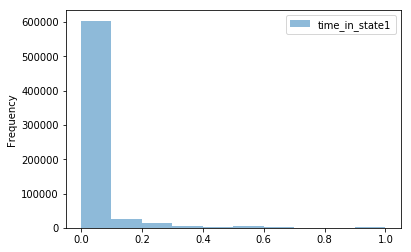

In [51]:
df_bb_counts['time_in_state1'].plot(kind='hist',alpha=0.5,legend=True)

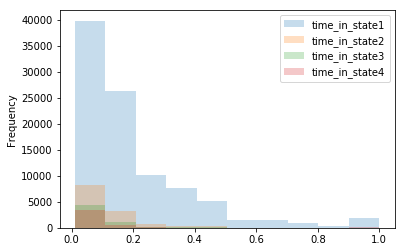

In [54]:
df_bb_counts[df_bb_counts['time_in_state1']>0]['time_in_state1'].plot(kind='hist',alpha=0.25,legend=True)
df_bb_counts[df_bb_counts['time_in_state2']>0]['time_in_state2'].plot(kind='hist',alpha=0.25,legend=True)
df_bb_counts[df_bb_counts['time_in_state3']>0]['time_in_state3'].plot(kind='hist',alpha=0.25,legend=True)
df_bb_counts[df_bb_counts['time_in_state4']>0]['time_in_state4'].plot(kind='hist',alpha=0.25,legend=True)

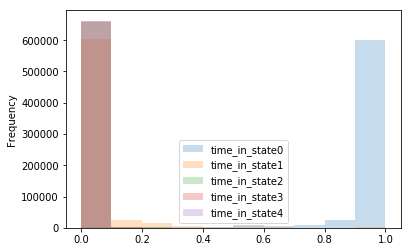

In [52]:
df_bb_counts['time_in_state0'].plot(kind='hist',alpha=0.25,legend=True)
df_bb_counts['time_in_state1'].plot(kind='hist',alpha=0.25,legend=True)
df_bb_counts['time_in_state2'].plot(kind='hist',alpha=0.25,legend=True)
df_bb_counts['time_in_state3'].plot(kind='hist',alpha=0.25,legend=True)
df_bb_counts['time_in_state4'].plot(kind='hist',alpha=0.25,legend=True)

In [55]:
df_bb_counts.head()

time_in_state0  time_in_state1  time_in_state2  time_in_state3  \
0             1.0             0.0             0.0             0.0   
1             1.0             0.0             0.0             0.0   
2             1.0             0.0             0.0             0.0   
3             1.0             0.0             0.0             0.0   
4             1.0             0.0             0.0             0.0   

   time_in_state4  time_in_state5  SK_ID_BUREAU  
0             0.0             0.0       5715448  
1             0.0             0.0       5715449  
2             0.0             0.0       5715451  
3             0.0             0.0       5715452  
4             0.0             0.0       5715453

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


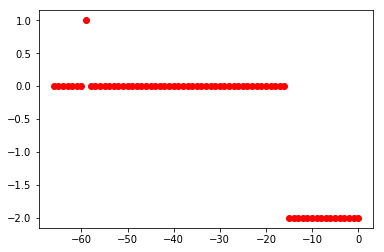

In [112]:
tmp_data = df_bb[df_bb.SK_ID_BUREAU==df_bb.SK_ID_BUREAU.sample(n=1).values[0]]
tmp_data.loc[tmp_data.STATUS == 'X','STATUS']=-1
tmp_data.loc[tmp_data.STATUS == 'C','STATUS']=-2
plt.plot(tmp_data.MONTHS_BALANCE, tmp_data.STATUS, 'ro')

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [52]:
import matplotlib.pyplot as plt

In [31]:
table = pd.pivot_table(df_bb,
                       index=["STATUS"],
                       values=["SK_ID_CURR",'SK_ID_BUREAU'],
                       aggfunc=[pd.Series.nunique],
                       fill_value=0)
table


nunique           
       SK_ID_BUREAU SK_ID_CURR
STATUS                        
0            662403     130695
1             95143      47210
2             13094       8424
3              5887       3906
4              4207       2820
5              4441       2986
C            417392     109321
X            428531     111597

## Add POS, cc features and payments

![schema](../imgs/home_credit_state.png)

In [1]:
from ETL.ETL_functions import *

df_a, feature_dict = prepare_tr_te_applications('forest')

# test data
for feature_type in ['dummy','numeric_01','categorical']:
    _,__ = get_features_by_type(feature_dict,feature_type)
    test_data(df_a,_,feature_type)

# test that all ids were preserved
test_id_consistency(df_a)     

/opt/conda/lib/python3.6/site-packages/pandas/core/nanops.py:359: RuntimeWarning: divide by zero encountered in true_divide
  the_mean = the_sum / count


In [2]:
import gc
import re

import tqdm
import time
import numpy as np
import pandas as pd
from math import sqrt
from multiprocessing import Pool

def produce_cb_indexes(sk_id):
    global df_cb_gr_by
    groupby_object = df_cb_gr_by.get_group(sk_id)

    l = groupby_object.MONTHS_BALANCE.min()
    r = groupby_object.MONTHS_BALANCE.max()
    # max period length
    length = r - l

    if length == 0:
        length = 1

    value_counts =  dict(groupby_object.overdue_state.value_counts())

    for i in range(0,4):
        if str(i) not in value_counts:
            value_counts[str(i)] = 0

    value_counts['0'] +=  length-sum(value_counts.values()) 
    value_counts = {k:v/length for k,v in value_counts.items()}

    return value_counts

def prepare_pos_cash_balance(df_a):
    global df_cb_gr_by
    df_cb = pd.read_csv('../data/POS_CASH_balance.csv')
    df_pa = pd.read_csv('../data/previous_application.csv')

    # add some columns from last credit and from current credit
    df_a_join = df_a[['SK_ID_CURR','AMT_CREDIT']].copy()
    df_a_join.columns = ['SK_ID_CURR','AMT_CURRENT_CREDIT']

    df_pa_join = df_pa[['SK_ID_PREV','AMT_CREDIT']].copy()
    df_pa_join.columns = ['SK_ID_PREV','AMT_PREVIOUS_CREDIT']

    df_cb = df_cb.merge(df_a_join,on='SK_ID_CURR')
    df_cb = df_cb.merge(df_pa_join,on='SK_ID_PREV')

    # preparation - quantize the overdue state
    # some basic logs will siffice, 
    # i.e. no overdue, small overdue, reasonable overdue, unsustainable overdue

    df_cb['overdue_state'] = df_cb.SK_DPD_DEF.astype('float').apply(lambda x: np.log(x+1))
    df_cb.loc[df_cb.overdue_state < 1,'overdue_state'] = 0
    df_cb.loc[(df_cb.overdue_state >= 1) & (df_cb.overdue_state < 2),'overdue_state'] = 1
    df_cb.loc[(df_cb.overdue_state >= 2) & (df_cb.overdue_state < 3),'overdue_state'] = 2
    df_cb.loc[df_cb.overdue_state > 3, 'overdue_state'] = 3
    df_cb.overdue_state = df_cb.overdue_state.astype('int').astype('str')

    # last value is demand => credit was not covered
    # # of not covered credits

    last_observations = df_cb.groupby('SK_ID_PREV')['MONTHS_BALANCE'].max().reset_index()
    last_observations.columns = ['SK_ID_PREV','LAST_MONTHS_BALANCE']
    df_cb = df_cb.merge(last_observations,on='SK_ID_PREV')
    df_cb['is_last'] = df_cb.LAST_MONTHS_BALANCE == df_cb.MONTHS_BALANCE 

    # actually too small proportion of clients are left in demand state (~100)
    # better add a feature that says how many installments are remaining and how is it related to current credit

    _ = df_cb[df_cb['is_last']==True]
    _ = _[['SK_ID_PREV','CNT_INSTALMENT_FUTURE','CNT_INSTALMENT']]
    _.columns = ['SK_ID_PREV','count_remaining_installments','total_last_installments']
    df_cb = df_cb.merge(_,on='SK_ID_PREV',how='left')
    df_cb.count_remaining_installments = df_cb.count_remaining_installments.fillna(value=0)

    df_cb['remaining_installment_share'] = df_cb.count_remaining_installments / df_cb.total_last_installments
    df_cb['remaining_sum'] = df_cb.remaining_installment_share * df_cb.AMT_PREVIOUS_CREDIT / df_cb.AMT_CURRENT_CREDIT 
    df_cb['remaining_sum'] = df_cb['remaining_sum'].fillna(value=0)
    df_cb['remaining_installment_share'] = df_cb['remaining_installment_share'].fillna(value=0)

    remaining_credit_metrics = pd.pivot_table(df_cb[df_cb['is_last']==True],
                           index=["SK_ID_CURR"],
                           values=['remaining_installment_share','remaining_sum'],
                           aggfunc={'remaining_installment_share':[np.mean],'remaining_sum':[np.sum]},
                           fill_value=0)

    remaining_credit_metrics = remaining_credit_metrics.reset_index()
    remaining_credit_metrics.columns = ['SK_ID_CURR','remaining_installment_share','remaining_sum_relative_to_current']

    # % of time spent in various kinds of overdue state
    # produce group by object in advance
    df_cb_gr_by = df_cb.groupby(by=['SK_ID_PREV'])[['MONTHS_BALANCE','overdue_state']]
    sk_list = list(df_cb.SK_ID_PREV.unique())

    with Pool(10) as p:
        count_data = list(tqdm.tqdm(p.imap(produce_cb_indexes, sk_list), total=len(sk_list)))

    df_cb_counts = pd.DataFrame(count_data)
    df_cb_counts['SK_ID_PREV'] = sk_list
    df_cb_counts.columns = ['cb_time_in_state0','cb_time_in_state1','cb_time_in_state2','cb_time_in_state3','SK_ID_PREV']

    df_cb_join = df_cb[['SK_ID_PREV','SK_ID_CURR']].copy()
    df_cb_counts = df_cb_counts.merge(df_cb_join,on='SK_ID_PREV')

    local_credit_history = pd.pivot_table(df_cb_counts,
                           index=["SK_ID_CURR"],
                           values=['cb_time_in_state0','cb_time_in_state1','cb_time_in_state2','cb_time_in_state3'],
                           aggfunc=[np.mean],
                           fill_value=0)

    local_credit_history = local_credit_history.reset_index()
    local_credit_history.columns = ['SK_ID_CURR','cb_time_in_state0','cb_time_in_state1','cb_time_in_state2','cb_time_in_state3']

    # merge tables and fillna 
    df_a_join = df_a_join.merge(local_credit_history,on='SK_ID_CURR',how='left')
    df_a_join = df_a_join.merge(remaining_credit_metrics,on='SK_ID_CURR',how='left')

    # also add feature later = no local credit history

    df_a_join['has_no_local_credit_history'] = pd.isnull(df_a_join.cb_time_in_state0)*1

    # remaining_credit_metrics

    # for outstanding debts - assume zero local debts
    df_a_join[['remaining_installment_share','remaining_sum_relative_to_current']] = df_a_join[['remaining_installment_share','remaining_sum_relative_to_current']].fillna(value=0)

    # for risks - assume averages when we do no know anything
    for _ in ['cb_time_in_state0','cb_time_in_state1','cb_time_in_state2','cb_time_in_state3']:
        df_a_join[_] = df_a_join[_].fillna(value=df_a_join[_].mean())

    df_a_join,_ = categorical_to_normalized_quantile(df_a_join,['remaining_sum_relative_to_current']) 
    
    new_cols = ['cb_time_in_state0','cb_time_in_state1','cb_time_in_state2','cb_time_in_state3'] + ['remaining_installment_share','remaining_sum_relative_to_current'] + ['has_no_local_credit_history']
    
    feature_dict = {'a_pr_features': {'features': new_cols,
                                    'output_type': 'numeric_01'}
                   }

    # for future?
    # all this => normalize / limit on how long ago was the last state?
    return df_a_join, feature_dict

def process_installments_payments(df_a):
    df_a_join = df_a[['SK_ID_CURR','AMT_CREDIT']].copy()
    df_ip = pd.read_csv('../data/installments_payments.csv')

    # fill blank values
    df_ip.loc[df_ip[pd.isnull(df_ip.AMT_PAYMENT)].index,'AMT_PAYMENT'] = df_ip.loc[df_ip[pd.isnull(df_ip.AMT_PAYMENT)].index,'AMT_INSTALMENT']
    df_ip.loc[df_ip[pd.isnull(df_ip.DAYS_ENTRY_PAYMENT)].index,'DAYS_ENTRY_PAYMENT'] = df_ip.loc[df_ip[pd.isnull(df_ip.AMT_PAYMENT)].index,'DAYS_INSTALMENT']

    # just 

    df_ip['equal_installment_payment'] = df_ip.AMT_PAYMENT==df_ip.AMT_INSTALMENT
    df_ip['larger_installment_payment'] = df_ip.AMT_PAYMENT>df_ip.AMT_INSTALMENT
    df_ip['smaller_installment_payment'] = df_ip.AMT_PAYMENT<df_ip.AMT_INSTALMENT

    df_ip['equal_payment_time'] = df_ip.DAYS_ENTRY_PAYMENT==df_ip.DAYS_INSTALMENT
    df_ip['paid_later'] = df_ip.DAYS_ENTRY_PAYMENT>df_ip.DAYS_INSTALMENT
    df_ip['paid_earlier'] = df_ip.DAYS_ENTRY_PAYMENT<df_ip.DAYS_INSTALMENT

    # payment rigour
    payment_discipline = pd.pivot_table(df_ip,
                           index=["SK_ID_CURR"],
                           values=['equal_installment_payment','larger_installment_payment','smaller_installment_payment','equal_payment_time','paid_later','paid_earlier'],
                           aggfunc=[np.mean],
                           fill_value=0)

    payment_discipline = payment_discipline.reset_index()
    payment_discipline.columns = ['SK_ID_CURR','equal_installment_payment','larger_installment_payment','smaller_installment_payment','equal_payment_time','paid_later','paid_earlier']

    df_a_join = df_a_join.merge(payment_discipline,on='SK_ID_CURR',how='left')

    # since this is a credit risk metric, just assume averages
    for _ in ['equal_installment_payment','larger_installment_payment','smaller_installment_payment','equal_payment_time','paid_later','paid_earlier']:
        df_a_join[_] = df_a_join[_].fillna(value=df_a_join[_].mean())
        

    new_cols = ['equal_installment_payment','larger_installment_payment','smaller_installment_payment','equal_payment_time','paid_later','paid_earlier']
    feature_dict = {'a_pr_features': {'features': new_cols,
                                    'output_type': 'numeric_01'}
                   }        
        
    return df_a_join,feature_dict


In [2]:
from ETL.ETL_utils import *
from ETL.ETL_functions import *

In [3]:
df_ccb_features, features_ccb = prepare_ccb_metrics(df_a)

 49%|████▉     | 51326/104307 [00:09<00:10, 5142.48it/s]/opt/conda/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)
100%|██████████| 104307/104307 [00:14<00:00, 7170.63it/s]


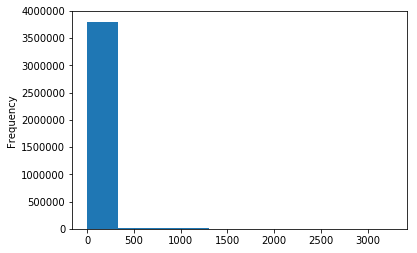

In [9]:
df_ccb.SK_DPD.plot(kind='hist')


In [2]:
import gc
import re

import tqdm
import time
import numpy as np
import pandas as pd
from math import sqrt
from multiprocessing import Pool

def produce_ccb_indexes(sk_id):
    global df_ccb_gr_by
    groupby_object = df_ccb_gr_by.get_group(sk_id)

    l = groupby_object.MONTHS_BALANCE.min()
    r = groupby_object.MONTHS_BALANCE.max()
    # max period length
    length = r - l

    if length == 0:
        length = 1

    value_counts =  dict(groupby_object.overdue_state.value_counts())

    for i in range(0,3):
        if str(i) not in value_counts:
            value_counts[str(i)] = 0

    value_counts['0'] +=  length-sum(value_counts.values()) 
    value_counts = {k:v/length for k,v in value_counts.items()}

    return value_counts

def produce_ccb_ewms(sk_id):
    global df_ccb_gr_by
    
    ewm_alpha = 0.1
    groupby_object = df_ccb_gr_by.get_group(sk_id)

    ewm_limit = groupby_object.sort_values(by='MONTHS_BALANCE').AMT_CREDIT_LIMIT_ACTUAL.ewm(alpha=ewm_alpha).mean().values[-1]
    ewm_balance = groupby_object.sort_values(by='MONTHS_BALANCE').AMT_BALANCE.ewm(alpha=ewm_alpha).mean().values[-1]

    return ewm_limit,ewm_balance


In [7]:
def prepare_ccb_metrics(df_a):
    global df_ccb_gr_by

    df_ccb = pd.read_csv('../data/credit_card_balance.csv')

    # absolute credit limit normalized by population of other credit limits
    # credit limit dynamics
    # credit limit related to requested credit size

    # ewm of the credit limit and cc balance
    # normalize by population
    # normalize by the asked credit size

    df_ccb_gr_by = df_ccb.groupby(by=['SK_ID_PREV'])[['MONTHS_BALANCE','AMT_CREDIT_LIMIT_ACTUAL','AMT_BALANCE']]
    sk_list = list(df_ccb.SK_ID_PREV.unique())

    with Pool(10) as p:
        ewm_data = list(tqdm.tqdm(p.imap(produce_ccb_ewms, sk_list), total=len(sk_list)))

    df_ccb_ewms = pd.DataFrame(ewm_data)
    df_ccb_ewms['SK_ID_PREV'] = sk_list
    df_ccb_ewms.columns = ['ewm_limit','ewm_balance','SK_ID_PREV']

    df_ccb_join = df_ccb[['SK_ID_PREV','SK_ID_CURR']].copy().drop_duplicates()
    df_ccb_ewms = df_ccb_ewms.merge(df_ccb_join,on='SK_ID_PREV')
    df_ccb_ewms = df_ccb_ewms.groupby('SK_ID_CURR')[['ewm_limit','ewm_balance']].mean().reset_index()

    # binarize the DPD
    # time spent each DPD state

    df_a_join = df_a[['SK_ID_CURR','AMT_CREDIT']].copy()

    df_ccb['overdue_state'] = df_ccb.SK_DPD_DEF.astype('float').apply(lambda x: np.log(x+1))
    df_ccb.loc[(df_ccb.overdue_state == 0),'overdue_state'] = 0
    df_ccb.loc[(df_ccb.overdue_state > 0) & (df_ccb.overdue_state < 1),'overdue_state'] = 1
    df_ccb.loc[df_ccb.overdue_state > 1, 'overdue_state'] = 2
    df_ccb.overdue_state = df_ccb.overdue_state.astype('int').astype('str')

    # % of time spent in various kinds of overdue state
    # produce group by object in advance
    df_ccb_gr_by = df_ccb.groupby(by=['SK_ID_PREV'])[['MONTHS_BALANCE','overdue_state']]
    sk_list = list(df_ccb.SK_ID_PREV.unique())

    with Pool(10) as p:
        count_data = list(tqdm.tqdm(p.imap(produce_ccb_indexes, sk_list), total=len(sk_list)))

    df_ccb_counts = pd.DataFrame(count_data)
    df_ccb_counts['SK_ID_PREV'] = sk_list
    df_ccb_counts.columns = ['ccb_time_in_state0','ccb_time_in_state1','ccb_time_in_state2','SK_ID_PREV']

    df_ccb_join = df_ccb[['SK_ID_PREV','SK_ID_CURR']].copy().drop_duplicates()
    df_ccb_counts = df_ccb_counts.merge(df_ccb_join,on='SK_ID_PREV')
    df_ccb_counts = df_ccb_counts.groupby('SK_ID_CURR')[['ccb_time_in_state0','ccb_time_in_state1','ccb_time_in_state2']].mean().reset_index()
    
    # moonshot feature cc ATM drawings
    # who draws from ATM using a cc?

    atm_drawings = pd.DataFrame(df_ccb.groupby('SK_ID_CURR')['AMT_DRAWINGS_ATM_CURRENT'].max().fillna(value=0))
    atm_drawings = atm_drawings.reset_index()

    # join all the tables
    df_a_join = df_a[['SK_ID_CURR','AMT_CREDIT']].copy()

    # normalize     
    df_a_join = df_a_join.merge(df_ccb_ewms,on='SK_ID_CURR',how='left')
    df_a_join = df_a_join.merge(df_ccb_counts,on='SK_ID_CURR',how='left')
    df_a_join = df_a_join.merge(atm_drawings,on='SK_ID_CURR',how='left')


    # fill what we know for sure with zeros
    df_a_join[['AMT_DRAWINGS_ATM_CURRENT','ewm_limit','ewm_balance']] = df_a_join[['AMT_DRAWINGS_ATM_CURRENT','ewm_limit','ewm_balance']].fillna(value=0)

    # fill the risk metrics with averages
    for _ in ['ccb_time_in_state0','ccb_time_in_state1','ccb_time_in_state2']:
        df_a_join[_] = df_a_join[_].fillna(value=df_a_join[_].mean()) 

    df_a_join['credit_smaller_than_balance'] = (df_a_join.AMT_CREDIT < df_a_join.ewm_balance) * 1
    df_a_join, _ = categorical_to_normalized_quantile(df_a_join,['ewm_limit','ewm_balance','AMT_DRAWINGS_ATM_CURRENT'])    

    df_a_join = df_a_join.drop_duplicates()    
    
    new_cols =['ewm_limit', 'ewm_balance', 'amt_drawings_atm_current','ccb_time_in_state0','ccb_time_in_state1','ccb_time_in_state2','credit_smaller_than_balance']
    
    feature_dict = {'ccb_features': {'features': new_cols,
                                    'output_type': 'numeric_01'}
                   }          
    
    return df_a_join[new_cols+['SK_ID_CURR']],feature_dict

In [9]:
df_a.shape

(356255, 215)

In [10]:
df_ccb_features.shape

(356255, 8)

In [8]:
df_ccb_features, features_ccb = prepare_ccb_metrics(df_a)

 49%|████▉     | 51314/104307 [00:09<00:10, 5168.39it/s]/opt/conda/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)
100%|██████████| 104307/104307 [00:14<00:00, 7196.81it/s]


In [8]:
df_ccb_features

ewm_limit  ewm_balance  amt_drawings_atm_current  cb_time_in_state0  \
0        0.000000     0.000000                  0.000000           0.988910   
1        0.000000     0.000000                  0.000000           0.988910   
2        0.000000     0.000000                  0.000000           0.988910   
3        0.352941     0.000000                  0.000000           1.000000   
4        0.000000     0.000000                  0.000000           0.988910   
5        0.000000     0.000000                  0.000000           0.988910   
6        0.000000     0.000000                  0.000000           0.988910   
7        0.000000     0.000000                  0.000000           0.988910   
8        0.147515     0.002725                  0.597015           1.000000   
9        0.000000     0.000000                  0.000000           0.988910   
10       0.000000     0.000000                  0.000000           0.988910   
11       0.000000     0.000000                  0.000000           0.988910   
12       0.000000     0.000000                  0.000000           0.988910   
13       0.000000     0.000000                  0.000000           0.988910   
14       0.000000     0.000000                  0.000000           0.988910   
15       0.000000     0.000000                  0.000000           0.988910   
16       0.000000     0.000000                  0.000000           0.988910   
17       0.882353     0.000000                  0.000000           1.000000   
18       0.000000     0.000000                  0.000000           0.988910   
19       0.200901     0.000000                  0.000000           1.000000   
20       0.000000     0.000000                  0.000000           0.988910   
21       0.000000     0.000000                  0.000000           0.988910   
22       0.000000     0.000000                  0.000000           0.988910   
23       0.000000     0.000000                  0.000000           0.988910   
24       0.000000     0.000000                  0.000000           0.988910   
25       0.000000     0.000000                  0.000000           0.988910   
26       0.000000     0.000000                  0.000000           0.988910   
27       0.000000     0.000000                  0.000000           0.988910   
28       0.000000     0.000000                  0.000000           0.988910   
29       0.000000     0.000000                  0.000000           0.988910   
...           ...          ...                       ...                ...   
356974   0.000000     0.000000                  0.000000           0.988910   
356975   0.000000     0.000000                  0.000000           0.988910   
356976   0.000000     0.000000                  0.000000           0.988910   
356977   0.000000     0.000000                  0.000000           0.988910   
356978   0.000000     0.000000                  0.000000           0.988910   
356979   0.003577     0.000000                  0.000000           1.000000   
356980   0.000000     0.000000                  0.000000           0.988910   
356981   0.000000     0.000000                  0.000000           0.988910   
356982   0.000000     0.000000                  0.000000           0.988910   
356983   0.000000     0.000000                  0.000000           0.988910   
356984   0.000000     0.000000                  0.000000           0.988910   
356985   0.025632     0.003203                  0.343284           1.000000   
356986   0.058824     0.000000                  0.000000           1.000000   
356987   0.000000     0.000000                  0.000000           0.988910   
356988   0.062407     0.003480                  0.208955           0.774194   
356989   0.000000     0.000000                  0.000000           0.988910   
356990   0.000000     0.000000                  0.000000           0.988910   
356991   0.000000     0.000000                  0.000000           0.988910   
356992   0.000000     0.000000                  0.000000  

In [8]:
df_a_join2 = df_a[['SK_ID_CURR','AMT_CREDIT']].copy()

In [9]:
df_a_join2.shape

(356255, 2)

In [38]:
df_a_join

SK_ID_CURR  AMT_CREDIT  ewm_limit  ewm_balance  cb_time_in_state0  \
0           100002    406597.5   0.000000     0.000000           0.988855   
1           100003   1293502.5   0.000000     0.000000           0.988855   
2           100004    135000.0   0.000000     0.000000           0.988855   
3           100006    312682.5   0.352941     0.000000           1.000000   
4           100007    513000.0   0.000000     0.000000           0.988855   
5           100008    490495.5   0.000000     0.000000           0.988855   
6           100009   1560726.0   0.000000     0.000000           0.988855   
7           100010   1530000.0   0.000000     0.000000           0.988855   
8           100011   1019610.0   0.147515     0.002724           1.000000   
9           100012    405000.0   0.000000     0.000000           0.988855   
10          100014    652500.0   0.000000     0.000000           0.988855   
11          100015    148365.0   0.000000     0.000000           0.988855   
12          100016     80865.0   0.000000     0.000000           0.988855   
13          100017    918468.0   0.000000     0.000000           0.988855   
14          100018    773680.5   0.000000     0.000000           0.988855   
15          100019    299772.0   0.000000     0.000000           0.988855   
16          100020    509602.5   0.000000     0.000000           0.988855   
17          100021    270000.0   0.882353     0.000000           1.000000   
18          100022    157500.0   0.000000     0.000000           0.988855   
19          100023    544491.0   0.200901     0.000000           1.000000   
20          100024    427500.0   0.000000     0.000000           0.988855   
21          100025   1132573.5   0.000000     0.000000           0.988855   
22          100026    497520.0   0.000000     0.000000           0.988855   
23          100027    239850.0   0.000000     0.000000           0.988855   
24          100029    247500.0   0.000000     0.000000           0.988855   
25          100030    225000.0   0.000000     0.000000           0.988855   
26          100031    979992.0   0.000000     0.000000           0.988855   
27          100032    327024.0   0.000000     0.000000           0.988855   
28          100033    790830.0   0.000000     0.000000           0.988855   
29          100034    180000.0   0.000000     0.000000           0.988855   
...            ...         ...        ...          ...                ...   
356974      455963    547272.0   0.000000     0.000000           0.988855   
356975      455965    900000.0   0.000000     0.000000           0.988855   
356976      456007    318645.0   0.000000     0.000000           0.988855   
356977      456008    180000.0   0.000000     0.000000           0.988855   
356978      456009    360000.0   0.000000     0.000000           0.988855   
356979      456010    690313.5   0.003577     0.000000           1.000000   
356980      456011    323460.0   0.000000     0.000000           0.988855   
356981      456013    468333.0   0.000000     0.000000           0.988855   
356982      456028    166500.0   0.000000     0.000000           0.988855   
356983      456058    315000.0   0.000000     0.000000           0.988855   
356984      456111    514710.0   0.000000     0.000000           0.988855   
356985      456114    450000.0   0.025632     0.003202           1.000000   
356986      456115   1002339.0   0.058824     0.000000           1.000000   
356987      456116    149256.0   0.000000     0.000000           0.988855   
356988      456119    685386.0   0.062407     0.003479           0.774194   
356989      456120    135000.0   0.000000     0.000000           0.988855   
356990      456122    445095.0   0.000000     0.000000           0.988855   
356991      456123    450000.0   0.000000     0.000000           0.988855   
356992      456166    479700.0   0.000000     0.000000           0.988855   
356993      456167   1047771.0   0.000000     0.000000           0.988855   
3569

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


/home/keras/notebook/nvme/home_credit/src/ETL/ETL_utils.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[column.lower()]=df[column]
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/keras/notebook/nvme/home_credit/src/ETL/ETL_utils.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

In [34]:
_

['ewm_limit', 'ewm_balance', 'amt_drawings_atm_current']

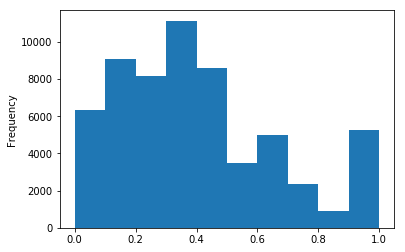

In [37]:
df_a_join[df_a_join.amt_drawings_atm_current>0].amt_drawings_atm_current.plot(kind='hist')

In [27]:
df_a_join.credit_smaller_than_balance.value_counts()

0    352963
1      3518
Name: credit_smaller_than_balance, dtype: int64

In [28]:
df_ccb[df_ccb.atm_drawings_to_limit<10]

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0           2562384      378907              -6       56.970   
1           2582071      363914              -1    63975.555   
2           1740877      371185              -7    31815.225   
3           1389973      337855              -4   236572.110   
4           1891521      126868              -1   453919.455   
5           2646502      380010              -7    82903.815   
6           1079071      171320              -6   353451.645   
7           2095912      118650              -7    47962.125   
8           2181852      367360              -4   291543.075   
9           1235299      203885              -5   201261.195   
10          1108284      209660              -7   102076.560   
11          2740914      340339              -1   131669.145   
12          1985699      302517              -4     1427.265   
13          1441883      171537              -5        0.000   
14          1864742      303581              -1        0.000   
15          2037377      289902              -1   131294.340   
16          1816636      255981              -6    72899.955   
17          1039039      276642              -6        0.000   
19          1189095      231608              -4   452774.700   
20          1104090      259807              -6    45413.730   
21          1683604      217113              -1    68710.140   
22          2392920      132481              -1    85792.095   
23          2021411      105755              -5   464452.470   
24          1927949      323730              -3   152801.550   
25          1885349      195164              -6   134249.445   
26          2024137      184131              -3    67609.125   
27          2272688      387286              -6    76235.940   
28          2561523      213409              -2   137812.185   
29          1288249      406607              -4        0.000   
30          1598223      427122              -6    44959.455   
...             ...         ...             ...          ...   
3840261     1355678      400053             -10        0.000   
3840263     1817092      326646              -9    32779.485   
3840265     1007502      144339             -11        0.000   
3840266     1487593      378947             -11   455111.955   
3840269     1053200      438988             -10    88732.260   
3840270     2733396      332633              -9        0.000   
3840271     2775277      420343             -12   386595.315   
3840274     1451317      271071              -7   134195.625   
3840275     2726719      310523             -12   761874.480   
3840276     1640661      353433             -14        0.000   
3840277     1260295      120447              -7   106641.855   
3840278     2391601      319904              -9    58501.665   
3840279     2275300      227917             -17        0.000   
3840280     1268489      225960             -10        0.000   
3840283     1319733      402678              -7       13.950   
3840287     1050314      350128             -10   458892.135   
3840288     1814640      309333             -15   458892.135   
3840289     1914593      438678              -9        0.000   
3840291     1925246      372892              -9   308056.005   
3840292     1261707      130324              -9   270242.955   
3840295     1920532      145486             -11   457382.340   
3840297     2080215      105241             -11        0.000   
3840298     1545164      193697             -10   260671.500   
3840299     2029117      346347             -16    81697.275   
3840300     1083973      438456              -8    81697.275   
3840301     1409561      120617             -11   277204.095   
3840302     2032117      355450             -11        0.000   
3840308     1714892      347207              -9        0.000   
3840309     1302323      215757              -9   275784.975   
3840311     2411345      236760             -10        0.000   

         AMT_CREDIT_LIMIT_ACTUAL  AMT_DR

In [27]:
df_ccb[df_ccb.atm_drawings_to_limit<10].atm_drawings_to_limit.plot(kind='hist')

ValueError: range parameter must be finite.

In [20]:
df_ccb_ewms

ewm_limit    ewm_balance  SK_ID_PREV  SK_ID_CURR
0        92806.134636    6728.448836     2562384      378907
1        49168.553299   40246.664680     2582071      363914
2       412985.495655   97599.650420     1740877      371185
3       214052.910143  212495.501517     1389973      337855
4       404980.717478  406336.049696     1891521      126868
5       280374.913915  149359.249065     2646502      380010
6       487867.647031  304547.470739     1079071      171320
7        53859.653253   19451.266656     2095912      118650
8       292500.000000  109367.632348     2181852      367360
9       178612.435008  108757.312804     1235299      203885
10      180000.000000   69827.821532     1108284      209660
11      121296.358641   94756.306159     2740914      340339
12      166638.173527   32084.430141     1985699      302517
13      270000.000000   16324.133645     1441883      171537
14       49168.277404    1502.503153     1864742      303581
15      121561.743464  119796.685600     2037377      289902
16      436277.771315   53973.192305     1816636      255981
17       67500.000000      12.230681     1039039      276642
18        8955.377888     813.482040     2016842      302450
19      450000.000000  319621.109517     1189095      231608
20       45000.000000   25932.815748     1104090      259807
21       67500.000000   57620.451203     1683604      217113
22      135000.000000   34907.591615     2392920      132481
23      426256.207703  254725.268533     2021411      105755
24      157500.000000  123087.109579     1927949      323730
25      157500.000000  117321.653564     1885349      195164
26      450000.000000   62499.033883     2024137      184131
27      180000.000000  139916.542831     2272688      387286
28      175259.272078  112480.518888     2561523      213409
29      261031.449651  100715.265590     1288249      406607
...               ...            ...         ...         ...
104277  495000.000000   46570.500000     1132920      208501
104278  270000.000000   48693.960000     2824062      371180
104279  225000.000000       0.000000     2008043      386094
104280  202500.000000   52715.014207     1267087      284755
104281  405000.000000       0.000000     1798731      400297
104282  270000.000000       0.000000     2597065      186331
104283  180000.000000       0.000000     2761180      415888
104284  180000.000000       0.000000     1887580      213062
104285  202500.000000       0.000000     1449537      215754
104286   45000.000000       0.000000     1188038      136323
104287  247500.000000  146628.000000     2293258      162289
104288  450000.000000  228528.675000     1773670      424890
104289   90000.000000   92677.185000     1312910      254793
104290  180000.000000       0.000000     1347726      231825
104291  135000.000000       0.000000     2574675      365193
104292   90000.000000       0.000000     1367614      247658
104293   45000.000000       0.000000     1717417      224477
104294       0.000000  135000.000000     1362365      348761
104295  180000.000000       0.000000     2599016      395815
104296  180000.000000  163102.500000     1771062      147598
104297  112500.000000       0.000000     1391353      249249
104298  270000.000000       0.000000     1494102      419445
104299  135000.000000       0.000000     2181012      133826
104300  202500.000000       0.000000     1551072      403596
104301   90000.000000       0.000000     2570930      316168
104302   45000.000000       0.000000     2339982      318916
104303  225000.000000       0.000000     2720102      174455
104304  270000.000000       0.000000     1897864      315041
104305  270000.000000       0.000000     2481982      382749
104306   45000.000000       0.000000     2191610      349216

[104307 rows x 4 columns]

In [15]:
df_ccb_ewms[df_ccb_ewms]

ewm_limit    ewm_balance  SK_ID_PREV  SK_ID_CURR
0         92806.134636    6728.448836     2562384      378907
1         92806.134636    6728.448836     2562384      378907
2         92806.134636    6728.448836     2562384      378907
3         92806.134636    6728.448836     2562384      378907
4         92806.134636    6728.448836     2562384      378907
5         92806.134636    6728.448836     2562384      378907
6         92806.134636    6728.448836     2562384      378907
7         92806.134636    6728.448836     2562384      378907
8         92806.134636    6728.448836     2562384      378907
9         92806.134636    6728.448836     2562384      378907
10        92806.134636    6728.448836     2562384      378907
11        92806.134636    6728.448836     2562384      378907
12        92806.134636    6728.448836     2562384      378907
13        92806.134636    6728.448836     2562384      378907
14        92806.134636    6728.448836     2562384      378907
15        92806.134636    6728.448836     2562384      378907
16        92806.134636    6728.448836     2562384      378907
17        92806.134636    6728.448836     2562384      378907
18        92806.134636    6728.448836     2562384      378907
19        92806.134636    6728.448836     2562384      378907
20        92806.134636    6728.448836     2562384      378907
21        92806.134636    6728.448836     2562384      378907
22        92806.134636    6728.448836     2562384      378907
23        92806.134636    6728.448836     2562384      378907
24        92806.134636    6728.448836     2562384      378907
25        92806.134636    6728.448836     2562384      378907
26        92806.134636    6728.448836     2562384      378907
27        92806.134636    6728.448836     2562384      378907
28        92806.134636    6728.448836     2562384      378907
29        92806.134636    6728.448836     2562384      378907
...                ...            ...         ...         ...
3840282  202500.000000   52715.014207     1267087      284755
3840283  202500.000000   52715.014207     1267087      284755
3840284  202500.000000   52715.014207     1267087      284755
3840285  405000.000000       0.000000     1798731      400297
3840286  270000.000000       0.000000     2597065      186331
3840287  180000.000000       0.000000     2761180      415888
3840288  180000.000000       0.000000     1887580      213062
3840289  202500.000000       0.000000     1449537      215754
3840290   45000.000000       0.000000     1188038      136323
3840291  247500.000000  146628.000000     2293258      162289
3840292  450000.000000  228528.675000     1773670      424890
3840293   90000.000000   92677.185000     1312910      254793
3840294  180000.000000       0.000000     1347726      231825
3840295  180000.000000       0.000000     1347726      231825
3840296  135000.000000       0.000000     2574675      365193
3840297   90000.000000       0.000000     1367614      247658
3840298   45000.000000       0.000000     1717417      224477
3840299       0.000000  135000.000000     1362365      348761
3840300  180000.000000       0.000000     2599016      395815
3840301  180000.000000  163102.500000     1771062      147598
3840302  112500.000000       0.000000     1391353      249249
3840303  270000.000000       0.000000     1494102      419445
3840304  135000.000000       0.000000     2181012      133826
3840305  202500.000000       0.000000     1551072      403596
3840306   90000.000000       0.000000     2570930      316168
3840307   45000.000000       0.000000     2339982      318916
3840308  225000.000000       0.000000     2720102      174455
3840309  270000.000000       0.000000     1897864      315041
3840310  270000.000000       0.000000     2481982      382749
3840311   45000.000000       0.000000     2191610      349216

[3840312 rows x 4 columns]

In [49]:
df_ccb[df_ccb.SK_ID_PREV==1389973].sort_values(by='MONTHS_BALANCE').AMT_CREDIT_LIMIT_ACTUAL.ewm(alpha=0.25).mean().values[-1]
df_ccb[df_ccb.SK_ID_PREV==1389973].sort_values(by='MONTHS_BALANCE').AMT_BALANCE.ewm(alpha=0.25).mean().values[-1]

223103.77533418982

In [11]:
_ = df_ccb.SK_DPD_DEF.astype('float').apply(lambda x: np.log(x+1))

In [9]:
df_ccb_gr_by.get_group(1389973)

223103.77533418982

In [27]:
groupby_object

 67%|██████▋   | 69635/104307 [00:09<00:04, 6992.36it/s]/opt/conda/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)
100%|██████████| 104307/104307 [00:14<00:00, 7222.82it/s]


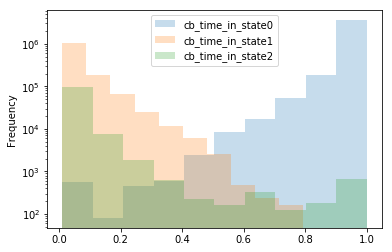

In [32]:
df_ccb_counts[df_ccb_counts['cb_time_in_state0']>0]['cb_time_in_state0'].plot(kind='hist',alpha=0.25,legend=True,logy=True)
df_ccb_counts[df_ccb_counts['cb_time_in_state1']>0]['cb_time_in_state1'].plot(kind='hist',alpha=0.25,legend=True)
df_ccb_counts[df_ccb_counts['cb_time_in_state2']>0]['cb_time_in_state2'].plot(kind='hist',alpha=0.25,legend=True)

In [1]:
import time
from functools import reduce
from ETL.ETL_functions import *


model_type = 'reg'

last_time = time.time()
print('Starting pre-processing ...')


df_a, feature_dict = prepare_tr_te_applications(model_type)
print('Finished processing application train/test data {}'.format(time.time() - last_time))
last_time = time.time()

# test data
for feature_type in ['dummy','numeric_01','categorical']:
    _,__ = get_features_by_type(feature_dict,feature_type)
    test_data(df_a,_,feature_type)

# test that all ids were preserved
test_id_consistency(df_a)    

print('Finished testing application train/test data {}'.format(time.time() - last_time))
last_time = time.time()

# any df_a would do for cb features
df_cb_features, feature_dict_cb = prepare_cb_data(df_a)

print('Finished processing credit bureau data {}'.format(time.time() - last_time))
last_time = time.time()

for feature_type in ['dummy','numeric_01','categorical']:
    _,__ = get_features_by_type(feature_dict_cb,feature_type)
    test_data(df_cb_features,_,feature_type)

print('Finished testing credit bureau data {}'.format(time.time() - last_time))
last_time = time.time()    

# any df_a would do for cb features
# check that no data was wrongly lost during feature engineering

# any df_a would do for past application features
df_pa_features, feature_dict_pa = prepare_past_applications(df_a)

print('Finished processing past application data {}'.format(time.time() - last_time))
last_time = time.time()

# test data
for feature_type in ['dummy','numeric_01','categorical']:
    _,__ = get_features_by_type(feature_dict_pa,feature_type)
    test_data(df_pa_features,_,feature_type)

print('Finished testing past application data {}'.format(time.time() - last_time))
last_time = time.time()

df_cbb_features, feature_dict_cbb = get_cbb_features(df_a)

print('Finished processing credit bureau balance data {}'.format(time.time() - last_time))
last_time = time.time()

# test data
for feature_type in ['dummy','numeric_01','categorical']:
    _,__ = get_features_by_type(feature_dict_cbb,feature_type)
    test_data(df_cbb_features,_,feature_type)

print('Finished testing credit bureau balance data {}'.format(time.time() - last_time))
last_time = time.time()


df_pos_cash,features_pos_cash = prepare_pos_cash_balance(df_a)
print('Finished processing pos cash data {}'.format(time.time() - last_time))
last_time = time.time()

# test data
for feature_type in ['dummy','numeric_01','categorical']:
    _,__ = get_features_by_type(features_pos_cash,feature_type)
    test_data(df_pos_cash,_,feature_type)

print('Finished testing pos cash data {}'.format(time.time() - last_time))
last_time = time.time()


df_installments_payments,features_installments_payments = process_installments_payments(df_a)
print('Finished processing installments data {}'.format(time.time() - last_time))
last_time = time.time()

# test data
for feature_type in ['dummy','numeric_01','categorical']:
    _,__ = get_features_by_type(features_installments_payments,feature_type)
    test_data(df_installments_payments,_,feature_type)

print('Finished testing installments data {}'.format(time.time() - last_time))
last_time = time.time()


Starting pre-processing ...


/opt/conda/lib/python3.6/site-packages/pandas/core/nanops.py:359: RuntimeWarning: divide by zero encountered in true_divide
  the_mean = the_sum / count


Finished processing application train/test data 9.592765808105469
Finished testing application train/test data 3.632385492324829
Finished processing credit bureau data 37.89726161956787
Finished testing credit bureau data 0.008046627044677734


/home/keras/notebook/nvme/home_credit/src/ETL/ETL_functions.py:284: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  approval_rates = df_a_pr.groupby('SK_ID_CURR')['was_approved'].agg(f)
/home/keras/notebook/nvme/home_credit/src/ETL/ETL_functions.py:290: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  cancel_rates = df_a_pr.groupby('SK_ID_CURR')['was_cancelled'].agg(f)
/home/keras/notebook/nvme/home_credit/src/ETL/ETL_functions.py:347: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  insured_rates = df_a_pr.groupby('SK_ID_CURR')['NFLAG_INSURED_ON_APPROVAL'].agg(f)


Finished processing past application data 23.817203760147095
Finished testing past application data 0.06256747245788574


  9%|▉         | 62482/663424 [00:09<01:36, 6255.49it/s]/opt/conda/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)
100%|██████████| 663424/663424 [01:29<00:00, 7394.20it/s]


Finished processing credit bureau balance data 103.7778947353363
Finished testing credit bureau balance data 0.009540557861328125


100%|██████████| 898903/898903 [02:01<00:00, 7419.27it/s]


Finished processing pos cash data 157.6618459224701
Finished testing pos cash data 0.01385951042175293
Finished processing installments data 10.365293264389038
Finished testing installments data 0.023466110229492188


In [12]:
df_ccb_features, features_ccb = prepare_ccb_metrics(df_a)
print('Finished processing credit card balance data {}'.format(time.time() - last_time))
last_time = time.time()

# test data
for feature_type in ['dummy','numeric_01','categorical']:
    _,__ = get_features_by_type(features_ccb,feature_type)
    test_data(df_ccb_features,_,feature_type)

print('Finished testing credit card balance data {}'.format(time.time() - last_time))
last_time = time.time()

 49%|████▊     | 50611/104307 [00:09<00:10, 5083.14it/s]/opt/conda/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)
100%|██████████| 104307/104307 [00:14<00:00, 7113.87it/s]


Finished processing credit card balance data 292.7430167198181
Finished testing credit card balance data 0.029364347457885742


In [ ]:
feature_dict = reduce((lambda x, y: {**x, **y}), [feature_dict,feature_dict_cb,
                                                  feature_dict_pa,feature_dict_cbb,
                                                  features_pos_cash,features_installments_payments,
                                                  features_ccb
                                                 ])        
        

In [13]:
all_cols = get_features_by_type(feature_dict,'all')[0]    

df_a = df_a.merge(df_cb_features,on='SK_ID_CURR')
df_a = df_a.merge(df_pa_features,on='SK_ID_CURR')
df_a = df_a.merge(df_cbb_features,on='SK_ID_CURR',how='left')
df_a = df_a.merge(df_pos_cash,on='SK_ID_CURR')
df_a = df_a.merge(df_installments_payments,on='SK_ID_CURR')
df_a = df_a.merge(df_ccb_features,on='SK_ID_CURR')

# remove all the cols except for target, ID and necessary cols
df_a = df_a[all_cols + ['TARGET','SK_ID_CURR']]

# do a simple thing - fill all the missing values with averages
na_cols = []
for _ in all_cols:
    if pd.isnull(df_a[_]).sum()>0:
        df_a[_] = df_a[_].fillna(value=df_a[_].mean())  

        
# test the data
for feature_type in ['dummy','numeric_01','categorical']:
    _,__ = get_features_by_type(feature_dict,feature_type)
    test_data(df_a,_,feature_type)

# test that all ids were preserved
test_id_consistency(df_a)  

In [ ]:
_ = get_features_by_type(features_pos_cash,'all')[0]

for __ in _:
    print(__,pd.isnull(df_pos_cash[__]).sum())

In [17]:
_ = get_features_by_type(features_pos_cash,'all')[0]

for __ in _:
    print(__,pd.isnull(df_pos_cash[__]).sum())

has_no_local_credit_history 0
cb_time_in_state0 0
remaining_sum_relative_to_current 0
remaining_installment_share 0
cb_time_in_state2 0
cb_time_in_state1 0
cb_time_in_state3 0


In [19]:
df_a.shape,df_pos_cash.shape,df_installments_payments.shape

((356255, 310), (356255, 9), (356255, 8))

In [ ]:
df_a

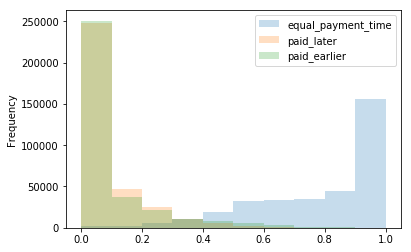

In [38]:
payment_discipline.equal_payment_time.plot(kind='hist',alpha=0.25,legend=True)
payment_discipline.paid_later.plot(kind='hist',alpha=0.25,legend=True)
payment_discipline.paid_earlier.plot(kind='hist',alpha=0.25,legend=True)

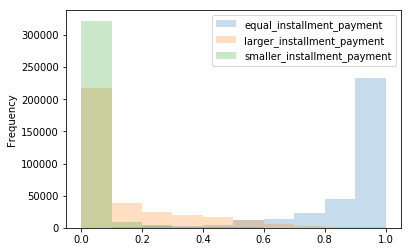

In [37]:
payment_discipline.equal_installment_payment.plot(kind='hist',alpha=0.25,legend=True)
payment_discipline.larger_installment_payment.plot(kind='hist',alpha=0.25,legend=True)
payment_discipline.smaller_installment_payment.plot(kind='hist',alpha=0.25,legend=True)


In [25]:
df_ip['smaller_installment_payment'].value_counts()

False    12309908
True      1295493
Name: smaller_installment_payment, dtype: int64

  6%|▋         | 56727/898903 [00:09<02:26, 5743.66it/s]/opt/conda/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)
100%|██████████| 898903/898903 [02:00<00:00, 7456.14it/s]


In [6]:
features_pos_cash

{'a_pr_features': {'features': ['cb_time_in_state0',
   'cb_time_in_state1',
   'cb_time_in_state2',
   'cb_time_in_state3',
   'remaining_installment_share',
   'remaining_sum_relative_to_current',
   'has_no_local_credit_history'],
  'output_type': 'numeric_01'}}

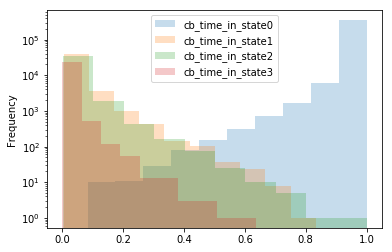

In [17]:
df_a_join[df_a_join['cb_time_in_state0']>0]['cb_time_in_state0'].plot(kind='hist',alpha=0.25,legend=True,logy=True)
df_a_join[df_a_join['cb_time_in_state1']>0]['cb_time_in_state1'].plot(kind='hist',alpha=0.25,legend=True)
df_a_join[df_a_join['cb_time_in_state2']>0]['cb_time_in_state2'].plot(kind='hist',alpha=0.25,legend=True)
df_a_join[df_a_join['cb_time_in_state3']>0]['cb_time_in_state3'].plot(kind='hist',alpha=0.25,legend=True)

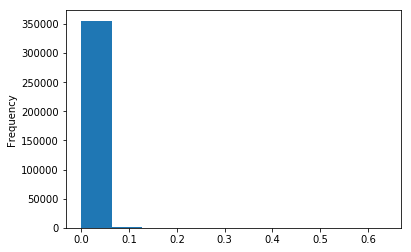

In [13]:
df_a_join.cb_time_in_state3.plot(kind='hist')

In [54]:
df_cb[df_cb.SK_DPD_DEF>20].SK_ID_CURR.head()

1254    131467
8061    161667
8062    161667
8099    456070
8100    456070
Name: SK_ID_CURR, dtype: int64

2673519


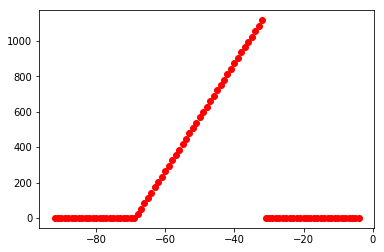

In [99]:
import matplotlib.pyplot as plt
idx = df_cb[df_cb.SK_DPD_DEF>100].SK_ID_PREV.sample(n=1).values[0]
print(idx)
tmp_data = df_cb[df_cb.SK_ID_PREV == idx]
plt.plot(tmp_data.MONTHS_BALANCE, tmp_data.SK_DPD_DEF, 'ro')

In [100]:
df_cb[df_cb.SK_ID_PREV==2673519]

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
8993423     2673519      433339             -82            24.0   
8993424     2673519      433339             -79            24.0   
8993425     2673519      433339             -81            24.0   
8993426     2673519      433339             -85            24.0   
8993427     2673519      433339             -80            24.0   
8993428     2673519      433339             -88            24.0   
8993429     2673519      433339             -87            24.0   
8993430     2673519      433339             -90            24.0   
8993431     2673519      433339             -84            24.0   
8993432     2673519      433339             -89            24.0   
8993433     2673519      433339             -86            24.0   
8993434     2673519      433339             -83            24.0   
8993435     2673519      433339             -48            24.0   
8993436     2673519      433339             -57            24.0   
8993437     2673519      433339             -72            24.0   
8993438     2673519      433339             -59            24.0   
8993439     2673519      433339             -66            24.0   
8993440     2673519      433339             -62            24.0   
8993441     2673519      433339             -69            24.0   
8993442     2673519      433339             -77            24.0   
8993443     2673519      433339             -91            24.0   
8993444     2673519      433339             -27            24.0   
8993445     2673519      433339             -19            24.0   
8993446     2673519      433339             -64            24.0   
8993447     2673519      433339             -67            24.0   
8993448     2673519      433339             -74            24.0   
8993449     2673519      433339             -70            24.0   
8993450     2673519      433339             -58            24.0   
8993451     2673519      433339             -75            24.0   
8993452     2673519      433339             -18            24.0   
...             ...         ...             ...             ...   
8993482     2673519      433339             -32            24.0   
8993483     2673519      433339             -41            24.0   
8993484     2673519      433339             -42            24.0   
8993485     2673519      433339             -20            24.0   
8993486     2673519      433339             -21            24.0   
8993487     2673519      433339             -33            24.0   
8993488     2673519      433339             -45            24.0   
8993489     2673519      433339             -43            24.0   
8993490     2673519      433339             -44            24.0   
8993491     2673519      433339             -24            24.0   
8993492     2673519      433339             -26            24.0   
8993493     2673519      433339             -36            24.0   
8993494     2673519      433339             -37            24.0   
8993495     2673519      433339             -61            24.0   
8993496     2673519      433339             -51            24.0   
8993497     2673519      433339             -71            24.0   
8993498     2673519      433339             -56            24.0   
8993499     2673519      433339             -78            24.0   
8993500     2673519      433339             -52            24.0   
8993501     2673519      433339             -73            24.0   
8993502     2673519      433339             -16            24.0   
8993503     2673519      433339             -92            24.0   
8993504     2673519      433339             -54            24.0   
8993505     2673519      433339             -15            24.0   
8993506     2673519      433339             -76            24.0   
8993507     2673519      433339             -53            24.0   
8993508     2673519      433339             -50            24.0   
8993509     2673519      433339             -60         

In [101]:
local_credit_history[local_credit_history.SK_ID_CURR==433339]

SK_ID_CURR  cb_time_in_state0  cb_time_in_state1  cb_time_in_state2  \
312783      433339           0.625795                0.0                0.0   

        cb_time_in_state3  
312783           0.374205

  5%|▍         | 44118/898903 [00:09<03:12, 4437.97it/s]/opt/conda/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)
100%|██████████| 898903/898903 [02:03<00:00, 7278.71it/s]


In [40]:
df_cb_counts.shape

(898903, 5)

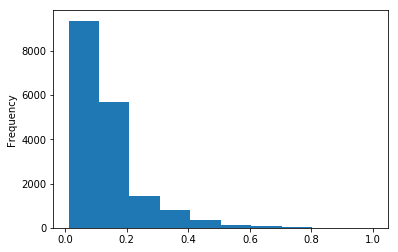

In [39]:
df_cb_counts[df_cb_counts.cb_time_in_state2>0].cb_time_in_state2.plot(kind='hist')

In [5]:
_[_.SK_ID_PREV==1215673]

SK_ID_PREV  count_remaining_installments  total_last_installments
37     1215673                           0.0                      9.0

In [ ]:
df_cb['remaining_sum']

In [13]:
remaining_credit_metrics

SK_ID_CURR  remaining_installment_share  \
0           100001                     0.000000   
1           100002                     0.110094   
2           100003                     0.001461   
3           100004                     0.000000   
4           100005                     0.000000   
5           100006                     0.071406   
6           100007                     0.058493   
7           100008                     0.000000   
8           100009                     0.007301   
9           100010                     0.000000   
10          100011                     0.000000   
11          100012                     0.000000   
12          100013                     0.000000   
13          100014                     0.037701   
14          100015                     0.000000   
15          100016                     0.017787   
16          100017                     0.022502   
17          100018                     0.009514   
18          100019                     0.000000   
19          100020                     0.008606   
20          100021                     0.030689   
21          100022                     0.436838   
22          100023                     0.000000   
23          100025                     0.001354   
24          100026                     0.000000   
25          100027                     0.000000   
26          100028                     0.000000   
27          100029                     0.000000   
28          100030                     0.000000   
29          100032                     0.000000   
...            ...                          ...   
334329      456225                     0.000000   
334330      456226                     0.000000   
334331      456227                     0.000000   
334332      456228                     0.003260   
334333      456230                     0.263495   
334334      456231                     0.000000   
334335      456232                     0.335256   
334336      456233                     0.043379   
334337      456234                     0.000000   
334338      456235                     0.015625   
334339      456236                     0.000000   
334340      456237                     0.035147   
334341      456238                     0.000000   
334342      456239                     0.000000   
334343      456240                     0.334289   
334344      456241                     1.137032   
334345      456242                     0.005988   
334346      456243                     0.000000   
334347      456244                     0.080515   
334348      456245                     0.152516   
334349      456246                     0.000000   
334350      456247                     0.005918   
334351      456248                     0.055786   
334352      456249                     0.000000   
334353      456250                     0.017609   
334354      456251                     0.000000   
334355      456252                     0.000000   
334356      456253                     0.000000   
334357      456254                     0.175411   
334358      456255                     0.000000   

        remaining_sum_relative_to_current  
0                                0.000000  
1                                0.110094  
2                                0.004384  
3                                0.000000  
4                                0.000000  
5                                0.214219  
6                                0.292465  
7                                0.000000  
8                                0.051110  
9                                0.000000  
10                               0.000000  
11                               0.000000  
12                               0.000000  
13                               0.075402  
14                               0.000000  
15                               0.053362  
16                               0.045005  
17                               0.028543  
18       

In [ ]:

# we are interested only in reject reasons
del reject_reason_propensity['rr_prop_xap']

In [6]:
df_cb.columns()

TypeError: 'Index' object is not callable

In [15]:
df_cb[df_cb.remaining_sum<10].remaining_sum.plot(kind='hist')

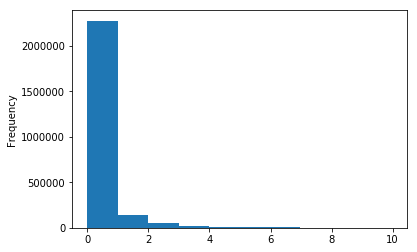

In [20]:
df_cb[df_cb.remaining_sum<10].remaining_sum.plot(kind='hist')

In [16]:
df_cb.shape

(221792557, 16)

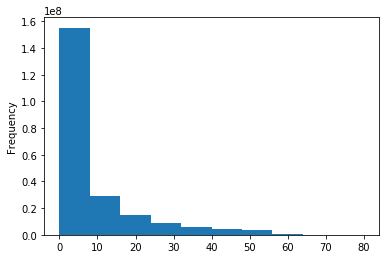

In [13]:
df_cb.count_remaining_installments.plot(kind='hist')

In [238]:
_ = df_cb[df_cb['is_last']==True]
idx = _[_.NAME_CONTRACT_STATUS == 'Active'].SK_ID_PREV.sample(n=1).values[0]

df_cb[df_cb.SK_ID_PREV==idx].sort_values(by='MONTHS_BALANCE')

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
2757194     2714126      415638             -79            12.0   
2757198     2714126      415638             -78            12.0   
2757197     2714126      415638             -77            12.0   
2757195     2714126      415638             -76            12.0   
2757196     2714126      415638             -75            12.0   
2757204     2714126      415638             -74            12.0   
2757203     2714126      415638             -73            12.0   
2757200     2714126      415638             -72            12.0   
2757199     2714126      415638             -71            12.0   
2757201     2714126      415638             -70            12.0   
2757205     2714126      415638             -69            12.0   
2757202     2714126      415638             -68            12.0   

         CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  \
2757194                   12.0               Active       0           0   
2757198                   11.0               Active       0           0   
2757197                   10.0               Active       0           0   
2757195                    9.0               Active       0           0   
2757196                    8.0               Active       0           0   
2757204                    7.0               Active       0           0   
2757203                    6.0               Active       0           0   
2757200                    5.0               Active       0           0   
2757199                    4.0               Active       0           0   
2757201                    3.0               Active       0           0   
2757205                    2.0               Active       0           0   
2757202                    1.0               Active       0           0   

         AMT_CREDIT  overdue_state  is_last  LAST_MONTHS_BALANCE  
2757194    697500.0            0.0    False                  -68  
2757198    697500.0            0.0    False                  -68  
2757197    697500.0            0.0    False                  -68  
2757195    697500.0            0.0    False                  -68  
2757196    697500.0            0.0    False                  -68  
2757204    697500.0            0.0    False                  -68  
2757203    697500.0            0.0    False                  -68  
2757200    697500.0            0.0    False                  -68  
2757199    697500.0            0.0    False                  -68  
2757201    697500.0            0.0    False                  -68  
2757205    697500.0            0.0    False                  -68  
2757202    697500.0            0.0     True                  -68

In [169]:
df_cb[df_cb.SK_ID_PREV==idx].sort_values(by='MONTHS_BALANCE')

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
6799393     1832451      208809             -95            12.0   
6799402     1832451      208809             -94            12.0   
6799439     1832451      208809             -93            12.0   
6799377     1832451      208809             -92            12.0   
6799380     1832451      208809             -91            12.0   
6799385     1832451      208809             -90            12.0   
6799383     1832451      208809             -89            12.0   
6799401     1832451      208809             -88            12.0   
6799382     1832451      208809             -87            12.0   
6799386     1832451      208809             -86            12.0   
6799395     1832451      208809             -85            12.0   
6799396     1832451      208809             -84            12.0   
6799397     1832451      208809             -83            12.0   
6799389     1832451      208809             -82            12.0   
6799457     1832451      208809             -81            12.0   
6799409     1832451      208809             -80            12.0   
6799408     1832451      208809             -79            12.0   
6799392     1832451      208809             -78            12.0   
6799394     1832451      208809             -77            12.0   
6799406     1832451      208809             -76            12.0   
6799459     1832451      208809             -75            12.0   
6799458     1832451      208809             -74            12.0   
6799403     1832451      208809             -73            12.0   
6799414     1832451      208809             -72            12.0   
6799411     1832451      208809             -71            12.0   
6799410     1832451      208809             -70            12.0   
6799464     1832451      208809             -69            12.0   
6799422     1832451      208809             -68            12.0   
6799421     1832451      208809             -67            12.0   
6799452     1832451      208809             -66            12.0   
...             ...         ...             ...             ...   
6799471     1832451      208809             -31            12.0   
6799479     1832451      208809             -30            12.0   
6799428     1832451      208809             -29            12.0   
6799460     1832451      208809             -28            12.0   
6799426     1832451      208809             -27            12.0   
6799425     1832451      208809             -26            12.0   
6799405     1832451      208809             -25            12.0   
6799429     1832451      208809             -24            12.0   
6799473     1832451      208809             -23            12.0   
6799407     1832451      208809             -22            12.0   
6799475     1832451      208809             -21            12.0   
6799400     1832451      208809             -20            12.0   
6799430     1832451      208809             -19            12.0   
6799472     1832451      208809             -18            12.0   
6799398     1832451      208809             -17            12.0   
6799399     1832451      208809             -16            12.0   
6799424     1832451      208809             -15            12.0   
6799404     1832451      208809             -14            12.0   
6799432     1832451      208809             -13            12.0   
6799465     1832451      208809             -12            12.0   
6799466     1832451      208809             -11            12.0   
6799467     1832451      208809             -10            12.0   
6799463     1832451      208809              -9            12.0   
6799462     1832451      208809              -8            12.0   
6799461     1832451      208809              -7            12.0   
6799469     1832451      208809              -6            12.0   
6799436     1832451      208809              -5            12.0   
6799437     1832451      208809              -4         

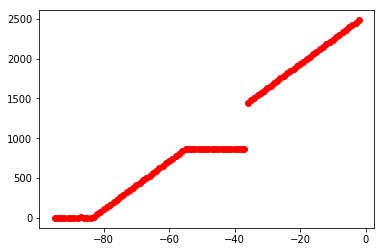

In [168]:
import matplotlib.pyplot as plt
idx = df_cb[df_cb.SK_DPD_DEF>0].SK_ID_PREV.sample(n=1).values[0]
tmp_data = df_cb[df_cb.SK_ID_PREV == idx]
plt.plot(tmp_data.MONTHS_BALANCE, tmp_data.SK_DPD_DEF, 'ro')

In [174]:
_

0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
5           0.0
6           0.0
7           0.0
8           0.0
9           0.0
10          0.0
11          0.0
12          0.0
13          0.0
14          0.0
15          0.0
16          0.0
17          0.0
18          0.0
19          0.0
20          0.0
21          0.0
22          0.0
23          0.0
24          0.0
25          0.0
26          0.0
27          0.0
28          0.0
29          0.0
           ... 
10001328    0.0
10001329    0.0
10001330    0.0
10001331    0.0
10001332    0.0
10001333    0.0
10001334    0.0
10001335    0.0
10001336    0.0
10001337    0.0
10001338    0.0
10001339    0.0
10001340    0.0
10001341    0.0
10001342    0.0
10001343    0.0
10001344    0.0
10001345    0.0
10001346    0.0
10001347    0.0
10001348    0.0
10001349    0.0
10001350    0.0
10001351    0.0
10001352    0.0
10001353    0.0
10001354    0.0
10001355    0.0
10001356    0.0
10001357    0.0
Name: SK_DPD_DEF, Length

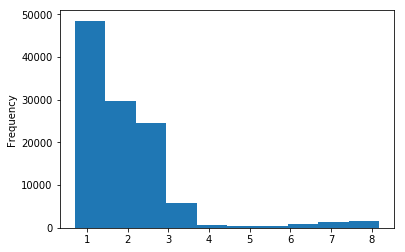

In [176]:
_ = df_cb.SK_DPD_DEF.apply(lambda x: np.log(x+1))
_[_>0].plot(kind='hist')

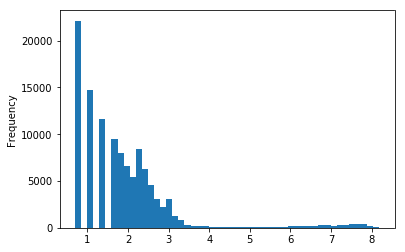

In [177]:
_[_>0].plot(kind='hist',bins=50)

In [13]:
df_cb[['SK_DPD_DEF','SK_DPD']].value_counts()

SK_DPD_DEF  SK_DPD
0                  0       0
1                  0       0
2                  0       0
3                  0       0
4                  0       0
5                  0       0
6                  0       0
7                  0       0
8                  0       0
9                  0       0
10                 0       0
11                 0       0
12                 0       0
13                 0       0
14                 0       0
15                 0       0
16                 0       0
17                 0       0
18                 0       0
19                 0       0
20                 0       0
21                 0       0
22                 0       0
23                 0       0
24                 0       0
25                 0       0
26                 0       0
27                 0       0
28                 0       0
29                 0       0
...              ...     ...
10001328           0       0
10001329           0       0
10001330           0       0
10001331           0       0
10001332           0       0
10001333           0       0
10001334           0       0
10001335           0       0
10001336           0       0
10001337           0       0
10001338           0       0
10001339           0       0
10001340           0       0
10001341           0       0
10001342           0       0
10001343           0       0
10001344           0       0
10001345           0       0
10001346           0       0
10001347           0       0
10001348           0       0
10001349           0       0
10001350           0       0
10001351           0       0
10001352           0       0
10001353           0       0
10001354           0       0
10001355           0       0
10001356           0       0
10001357           0       0

[10001358 rows x 2 columns]

(356255, 2)

## Plots

In [ ]:
AMT_ANNUITY

In [76]:
df_a_tr.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [77]:
df_a_te.NAME_CONTRACT_TYPE.value_counts()

Cash loans         48305
Revolving loans      439
Name: NAME_CONTRACT_TYPE, dtype: int64

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


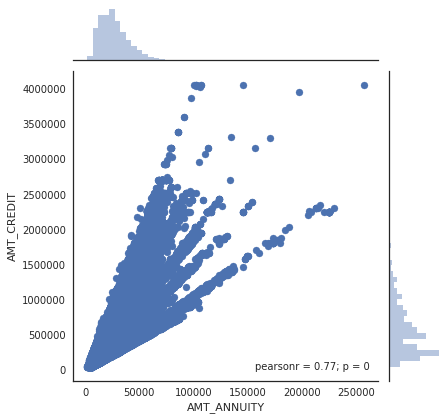

In [163]:
import seaborn as sns; sns.set(style="white", color_codes=True)

g = sns.jointplot(x="AMT_ANNUITY", y="AMT_CREDIT", data=df_a_tr)

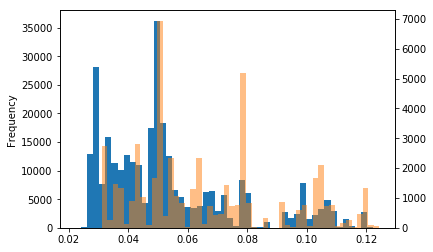

In [72]:
 plot_two_hists_plain(df_a_tr,df_a_te,'naive_interest','naive_interest')

In [71]:
df_a_tr['naive_interest'] = df_a_tr.AMT_ANNUITY/df_a_tr.AMT_CREDIT
df_a_te['naive_interest'] = df_a_te.AMT_ANNUITY/df_a_te.AMT_CREDIT

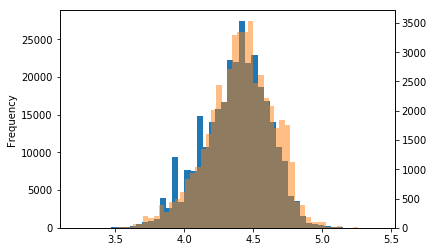

In [63]:
 plot_two_hists(df_a_tr,df_a_te,'AMT_ANNUITY','AMT_ANNUITY')

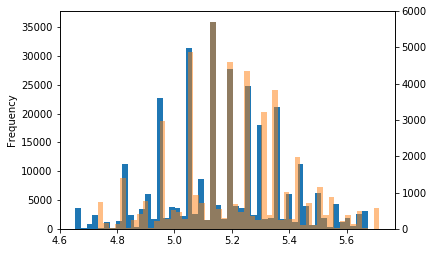

In [62]:
 plot_two_hists(df_a_tr,df_a_te,'AMT_INCOME_TOTAL','AMT_INCOME_TOTAL')

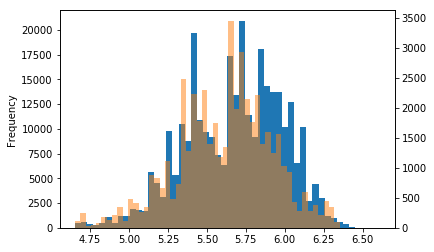

In [61]:
 plot_two_hists(df_a_tr,df_a_te,'AMT_CREDIT','AMT_CREDIT')

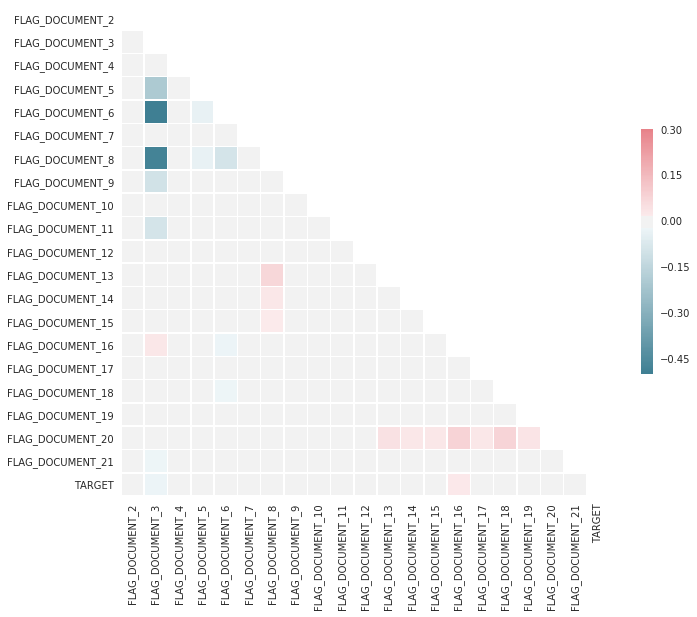

In [102]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
corr = df_a[kyc_flags+['TARGET']].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [45]:
df_a_tr.loc[df_a_tr[df_a_tr.AMT_INCOME_TOTAL>5000].index,'AMT_INCOME_TOTAL'].shape

(307511,)

In [54]:
df_a_tr = q_cut(df_a_tr,['AMT_INCOME_TOTAL'])
df_a_te = q_cut(df_a_te,['AMT_INCOME_TOTAL'])

In [18]:
a_tr_cols.difference(a_te_cols)

{'TARGET'}

In [21]:
a_tr_cols&a_pr_cols

{'AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'HOUR_APPR_PROCESS_START',
 'NAME_CONTRACT_TYPE',
 'NAME_TYPE_SUITE',
 'SK_ID_CURR',
 'WEEKDAY_APPR_PROCESS_START'}

In [14]:
'DAYS_EMPLOYED' in a_tr_cols

False

In [12]:
list(df_a_tr.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [ ]:
df_appl = (pd.read_csv('../data/application_train.csv')
        .drop('Unnamed: 0', axis=1)
        .drop_duplicates()          
        .pipe(parse_date,'Date','ts',
                        'year','month','day')
        .drop_duplicates()
        # .pipe(process_categorical_features,['Holiday']) sometimes there are 2 holidays per day ...
        .pipe(convert_to_dummies,['Holiday'])
        .reset_index()
        )

## Boilerplate

In [ ]:
import pandas as pd
from holidayList import hol_list
from sklearn import  metrics
from math import sqrt
import tqdm
import time
import numpy as np

target = 'Value'

def parse_date(df,
               date_col,
               new_col,
               year_col=None,
               month_col=None,
               day_col=None,
               hour_col=None,
               minute_col=None,
               second_col=None,
               dow=None):
    df[new_col] = pd.to_datetime(df[date_col])
    if year_col is not None:
        df[year_col] = df[new_col].dt.year
    if month_col is not None:
        df[month_col] = df[new_col].dt.month        
    if day_col is not None:
        df[day_col] = df[new_col].dt.day
    if hour_col is not None:
        df[hour_col] = df[new_col].dt.hour
    if minute_col is not None:
        df[minute_col] = df[new_col].dt.minute        
    if second_col is not None:    
        df[second_col] = df[new_col].dt.second
    if dow is not None:    
        df[dow] = df[new_col].dt.dayofweek           
    return df
def date_to_int(df,
               date_col,
               new_col):
    df[new_col] = pd.to_timedelta(df[date_col]).dt.total_seconds().astype(int)
    return df
def clean_ids(df,column_name):
    df[column_name].fillna(-1, inplace=True)
    df[column_name] = df[column_name].astype(str)
    return df
def process_categorical_features(df,feature_list):
    for feature in feature_list:
        df[feature].fillna(-1, inplace=True) 
        le, u = df[feature].factorize()
        df[feature] = le
    return df
def add_forecast_id_type(df):
    f_ids = list(df.ForecastId.unique())

    # understand which forecast_is has which time periodicity
    f_id_dict = {}

    for forecast_id in f_ids:
        if len(df[df.ForecastId == forecast_id].hour.unique()) == 1:
            f_id_dict[forecast_id] = '1_day'
        elif len(df[df.ForecastId == forecast_id].minute.unique()) == 4:
            f_id_dict[forecast_id] = '15_mins'
        else:
            f_id_dict[forecast_id] = '1_hour'

    # keys = [(item[0]) for item in list(f_id_dict.items())]
    # values = [(item[1]) for item in list(f_id_dict.items())]
    # f_id_df = pd.DataFrame()
    # f_id_df['ForecastId'] = keys
    # f_id_df['ForecastId_type'] = values    

    df['ForecastId_type'] = df['ForecastId'].apply(lambda x: f_id_dict[x])

    return df
def process_days_off(df):
    days = ['MondayIsDayOff','TuesdayIsDayOff','WednesdayIsDayOff','ThursdayIsDayOff','FridayIsDayOff','SaturdayIsDayOff','SundayIsDayOff']
    df['is_day_off'] = 0
    # add all days off to a dummy variable
    for i,day in enumerate(days):
        df.loc[(df[day] == True)&(df.dow == i),'is_day_off'] = 1
        del df[day]
    return df
def convert_to_dummies(df,col):
    dummy_df = pd.get_dummies(df[col], prefix=['hol'])
    for column in dummy_df.columns:
        df[column] = dummy_df[column]
        
    df = df.groupby(by = ['Date','SiteId', 'ts', 'year', 'month', 'day'])[hol_list].sum()
    return df
def ETL():
    df_train = (pd.read_csv('../data/forecast/train.csv')
                .pipe(parse_date,'Timestamp','ts','year','month','day','hour','minute','second','dow')
                .pipe(add_forecast_id_type)
                .pipe(date_to_int,'ts','ts_trend')
                )

    df_hol = (pd.read_csv('../data/forecast/holidays.csv')
            .drop('Unnamed: 0', axis=1)
            .drop_duplicates()          
            .pipe(parse_date,'Date','ts',
                            'year','month','day')
            .drop_duplicates()
            # .pipe(process_categorical_features,['Holiday']) sometimes there are 2 holidays per day ...
            .pipe(convert_to_dummies,['Holiday'])
            .reset_index()
            )

    df_weather = (pd.read_csv('../data/forecast/weather.csv')
                  .drop('Unnamed: 0', axis=1)
                  .drop('Distance', axis=1)
                  .drop_duplicates()
                  .pipe(parse_date,'Timestamp','ts',
                        'year','month','day','hour')
                  .groupby(['year','month','day','hour','SiteId'])['Temperature'].mean()
                  .reset_index()
                 )

    df_meta = (pd.read_csv('../data/forecast/metadata.csv')
            .drop_duplicates()          
            )

    # add meta-data
    cols = ['SiteId','Surface','BaseTemperature','MondayIsDayOff','TuesdayIsDayOff','WednesdayIsDayOff','ThursdayIsDayOff','FridayIsDayOff','SaturdayIsDayOff','SundayIsDayOff']
    join_keys = ['SiteId']
    df_train = df_train.merge(df_meta[cols], on=join_keys)
    # process days off
    df_train = process_days_off(df_train)

    # add weather by composite key
    cols = ['year','month','day','hour','Temperature','SiteId']
    join_keys = ['year','month','day','hour','SiteId']
    df_train = df_train.merge(df_weather[cols], on=join_keys, how='left')
    # fill missing values with -1
    df_train['Temperature'].fillna(-1, inplace=True)


    # join holidays by composite key
    cols = ['SiteId', 'year', 'month', 'day'] + hol_list
    join_keys = ['year','month','day','SiteId']
    df_train = df_train.merge(df_hol[cols], on=join_keys, how='left')


    # ETL pipeline for test data
    df_sub = (pd.read_csv('../data/forecast/submission_format.csv')
                .pipe(parse_date,'Timestamp','ts','year','month','day','hour','minute','second','dow')
                .pipe(add_forecast_id_type)
                .pipe(date_to_int,'ts','ts_trend')
                )

    # add meta-data
    cols = ['SiteId','Surface','BaseTemperature','MondayIsDayOff','TuesdayIsDayOff','WednesdayIsDayOff','ThursdayIsDayOff','FridayIsDayOff','SaturdayIsDayOff','SundayIsDayOff']
    join_keys = ['SiteId']
    df_sub = df_sub.merge(df_meta[cols], on=join_keys)
    # process days off
    df_sub = process_days_off(df_sub)

    # add weather by composite key
    cols = ['year','month','day','hour','Temperature','SiteId']
    join_keys = ['year','month','day','hour','SiteId']
    df_sub = df_sub.merge(df_weather[cols], on=join_keys, how='left')
    # fill missing values with -1
    df_sub['Temperature'].fillna(-1, inplace=True)

    # join holidays by composite key
    cols = ['SiteId', 'year', 'month', 'day'] + hol_list
    join_keys = ['year','month','day','SiteId']
    df_sub = df_sub.merge(df_hol[cols], on=join_keys, how='left')

    del df_hol,df_weather,df_meta

    # fill all blank holidays with zeroes
    for holiday in hol_list:
        df_train[holiday] = df_train[holiday].fillna(value=0)
        df_sub[holiday] = df_sub[holiday].fillna(value=0)

    df_train['temp_diff'] = df_train['BaseTemperature'] - df_train['Temperature']
    df_sub['temp_diff'] = df_sub['BaseTemperature'] - df_sub['Temperature']
    
    return df_train,df_sub
def count_test_period(df):
    f_ids = list(df.ForecastId.unique())

    # calculate length of test set for each forecast_id
    f_id_dict = {}

    for forecast_id in f_ids:
        f_id_dict[forecast_id] = df[df.ForecastId == forecast_id].shape[0]
        
    return f_id_dict
def xgb_fit_log(alg,
             dtrain,
             dtest,
             predictors):
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='rmse')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtest_predictions = alg.predict(dtest[predictors])
    
    rmse_train = sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions))
    r2_score_train = metrics.r2_score(dtrain[target].values, dtrain_predictions)
    rmse_val = sqrt(metrics.mean_squared_error(dtest[target].values, dtest_predictions))
    r2_score_val = metrics.r2_score(dtest[target].values, dtest_predictions)
    scores = alg.get_booster().get_fscore()
    
    return rmse_train,r2_score_train,rmse_val,r2_score_val,scores
def produce_ar_features(df):
    df['Value1'] = df['Value'].shift(+1)
    df['Value2'] = df['Value'].shift(+2)
    df['Value3'] = df['Value'].shift(+3)
    df['Value4'] = df['Value'].shift(+4)    
    df['Value5'] = df['Value'].shift(+5)    
    df['Value10'] = df['Value'].shift(+10)
    df['dValue1'] = df['Value'] - df['Value'].shift(+1)
    
    # df['dValue2'] = df['dValue1'] - df['dValue1'].shift(+1)

    df['T1'] = df['Temperature'].shift(+1)
    df['T5'] = df['Temperature'].shift(+5)
    df['T10'] = df['Temperature'].shift(+10)

    # df['dT1'] = df['Temperature'] - df['Temperature'].shift(+1)
    # df['dT2'] = df['dT1'] - df['dT1'].shift(+1)
    # df['T1_diff'] = df['temp_diff'].shift(+1)
    # df['T10_diff'] = df['temp_diff'].shift(+10)
    # df['dT1_diff'] = df['temp_diff'] - df['temp_diff'].shift(+1)
    # df['dT2_diff'] = df['dT1_diff'] - df['dT1_diff'].shift(+1) 
    return df
def produce_weather_future(df):
    # fill all the -1 with NA and then interpolate
    df.loc[df['Temperature']==-1,'Temperature'] = np.nan
    df['Temperature'] = df['Temperature'].fillna(method='ffill')
    df['Temperature'] = df['Temperature'].fillna(method='bfill')
    
    df['TF1'] = df['Temperature'].shift(-1)
    df['TF5'] = df['Temperature'].shift(-5)
    df['TF10'] = df['Temperature'].shift(-10)
    df['TF50'] = df['Temperature'].shift(-50)
    
    df['TF1'] = df['TF1'].fillna(df['TF1'].mean())
    df['TF5'] = df['TF5'].fillna(df['TF5'].mean())
    df['TF10'] = df['TF10'].fillna(df['TF10'].mean())
    df['TF50'] = df['TF50'].fillna(df['TF50'].mean())
    
    df['Temperature'] = df['Temperature'].fillna(value = -100)
    df['TF1'] = df['Temperature'].fillna(value = -100)
    df['TF5'] = df['Temperature'].fillna(value = -100)
    df['TF10'] = df['Temperature'].fillna(value = -100)
    df['TF50'] = df['Temperature'].fillna(value = -100)

    return df
def cb_fit_log(alg,
             dtrain,
             dtest,
             predictors):
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtest_predictions = alg.predict(dtest[predictors])
    
    print(dtrain_predictions.shape,dtest_predictions.shape)
    
    rmse_train = sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions))
    r2_score_train = metrics.r2_score(dtrain[target].values, dtrain_predictions)
    rmse_val = sqrt(metrics.mean_squared_error(dtest[target].values, dtest_predictions))
    r2_score_val = metrics.r2_score(dtest[target].values, dtest_predictions)
    scores = alg.get_feature_importance(dtrain[predictors], dtrain[target])
    scores = dict(zip(predictors, scores))
    
    return rmse_train,r2_score_train,rmse_val,r2_score_val,scores
def cb_fit_log_alg(alg,
             dtrain,
             dtest,
             predictors):
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtest_predictions = alg.predict(dtest[predictors])
    
    rmse_train = sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions))
    r2_score_train = metrics.r2_score(dtrain[target].values, dtrain_predictions)
    rmse_val = sqrt(metrics.mean_squared_error(dtest[target].values, dtest_predictions))
    r2_score_val = metrics.r2_score(dtest[target].values, dtest_predictions)
    scores = alg.get_feature_importance(dtrain[predictors], dtrain[target])
    scores = dict(zip(predictors, scores))
    
    return rmse_train,r2_score_train,rmse_val,r2_score_val,scores,alg
def lgb_fit_log_alg(alg,
             dtrain,
             dtest,
             predictors):
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtest_predictions = alg.predict(dtest[predictors])
    
    rmse_train = sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions))
    r2_score_train = metrics.r2_score(dtrain[target].values, dtrain_predictions)
    rmse_val = sqrt(metrics.mean_squared_error(dtest[target].values, dtest_predictions))
    r2_score_val = metrics.r2_score(dtest[target].values, dtest_predictions)
    scores = alg.booster_.feature_importance()
    scores = dict(zip(predictors, scores))
    
    return rmse_train,r2_score_train,rmse_val,r2_score_val,scores,alg
def produce_ar_step(df, current_index):
    df.loc[current_index,'Value1'] = df.loc[current_index - 1,'Value']
    return df
def cb_predict_test(alg,
             df,
             predictors,
             test_ind,
             train_ind):
    
    df.loc[test_ind,'Value'] = 0
    
    for i,current_index in enumerate(test_ind):
        # calculate AR features  forward
        # (except temperature, which is already calculated)
        df = produce_ar_step(df, current_index)

        df.loc[current_index,'Value'] = alg.predict(df.filter(items=[current_index],axis=0)[predictors])
    
    return df
def lgb_predict_test(alg,
             df,
             predictors,
             test_ind,
             train_ind):
    
    df.loc[test_ind,'Value'] = 0
    
    for i,current_index in enumerate(test_ind):
        # calculate AR features  forward
        # (except temperature, which is already calculated)
        df = produce_ar_step(df, current_index)
        df.loc[current_index,'Value'] = alg.predict(df.filter(items=[current_index],axis=0)[predictors])
    return df
def mlp_fit_log_alg(alg,
             X_train,y_train,
             X_val,y_val,
             predictors):
    
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtest_predictions = alg.predict(X_val)
    
    rmse_train = sqrt(metrics.mean_squared_error(y_train, dtrain_predictions))
    r2_score_train = metrics.r2_score(y_train, dtrain_predictions)
    rmse_val = sqrt(metrics.mean_squared_error(y_val, dtest_predictions))
    r2_score_val = metrics.r2_score(y_val, dtest_predictions)
    
    return rmse_train,r2_score_train,rmse_val,r2_score_val,alg
def slice_train_data_rf(df_train,
                        df_sub,
                        forecast_id,
                        test_lengths):
    
    numeric_features = ['temp_diff','Temperature','is_day_off']
    time_features_day = ['dow']
    time_features_hour = ['dow','hour']
    time_features_15min = ['dow','hour','minute'] 
    
    temp_df = df_train[(df_train.ForecastId == forecast_id)
                        &(pd.notnull(df_train.Value))]
    
    # add test set data
    temp_df = temp_df.append(df_sub[(df_sub.ForecastId == forecast_id)])
    temp_df = produce_ar_features(temp_df)
    temp_df = temp_df.reset_index()

    # produce variable sets
    # only non-zero dummy variables
    all_hols = temp_df[hol_list].sum()>0
    non_zero_hols = list(all_hols.index[all_hols == True])
    
    prediction_freq = temp_df.ForecastId_type.values[0]
    if  prediction_freq == '1_day':
        predictors = numeric_features + non_zero_hols + time_features_day            
    elif prediction_freq == '1_hour':
        predictors = numeric_features + non_zero_hols + time_features_hour
    else: # 15_mins
        predictors = numeric_features + non_zero_hols + time_features_15min 
    
    # shorter val dataset for short time series
    if temp_df.shape[0]<500:
        val_ind = list(temp_df.index)[:test_lengths[forecast_id]//3]
        train_ind = list(temp_df.index)[test_lengths[forecast_id]//3:-test_lengths[forecast_id]]
        test_ind = list(temp_df.index)[-test_lengths[forecast_id]:]                
    else:
        val_ind = list(temp_df.index)[:test_lengths[forecast_id]//2]
        train_ind = list(temp_df.index)[test_lengths[forecast_id]//2:-test_lengths[forecast_id]]
        test_ind = list(temp_df.index)[-test_lengths[forecast_id]:]            
    
    return temp_df,all_hols,train_ind,val_ind,test_ind,prediction_freq,predictors
def slice_train_data_rf_weather(df_train,
                                df_sub,
                                forecast_id,
                                test_lengths):
    
    numeric_features = ['temp_diff','Temperature','is_day_off']
    weather_future_features = ['TF1','TF5','TF10','TF50']
    time_features_day = ['dow']
    time_features_hour = ['dow','hour']
    time_features_15min = ['dow','hour','minute'] 
    
    temp_df = df_train[(df_train.ForecastId == forecast_id)
                        &(pd.notnull(df_train.Value))]
    
    # add test set data
    temp_df = temp_df.append(df_sub[(df_sub.ForecastId == forecast_id)])
    temp_df = produce_ar_features(temp_df)
    temp_df = produce_weather_future(temp_df)
    temp_df = temp_df.reset_index()

    # produce variable sets
    # only non-zero dummy variables
    all_hols = temp_df[hol_list].sum()>0
    non_zero_hols = list(all_hols.index[all_hols == True])
    
    prediction_freq = temp_df.ForecastId_type.values[0]
    if  prediction_freq == '1_day':
        predictors = numeric_features + non_zero_hols + time_features_day + weather_future_features           
    elif prediction_freq == '1_hour':
        predictors = numeric_features + non_zero_hols + time_features_hour + weather_future_features
    else: # 15_mins
        predictors = numeric_features + non_zero_hols + time_features_15min + weather_future_features
    
    # shorter val dataset for short time series
    if temp_df.shape[0]<500:
        val_ind = list(temp_df.index)[:test_lengths[forecast_id]//3]
        train_ind = list(temp_df.index)[test_lengths[forecast_id]//3:-test_lengths[forecast_id]]
        test_ind = list(temp_df.index)[-test_lengths[forecast_id]:]                
    else:
        val_ind = list(temp_df.index)[:test_lengths[forecast_id]//2]
        train_ind = list(temp_df.index)[test_lengths[forecast_id]//2:-test_lengths[forecast_id]]
        test_ind = list(temp_df.index)[-test_lengths[forecast_id]:]            
    
    return temp_df,all_hols,train_ind,val_ind,test_ind,prediction_freq,predictors  
def slice_train_data_rf_reverse(df_train,
                        df_sub,
                        forecast_id,
                        test_lengths):
    
    numeric_features = ['temp_diff','Temperature','is_day_off']
    time_features_day = ['dow']
    time_features_hour = ['dow','hour']
    time_features_15min = ['dow','hour','minute'] 
    
    temp_df = df_train[(df_train.ForecastId == forecast_id)
                        &(pd.notnull(df_train.Value))]
    
    # add test set data
    temp_df = temp_df.append(df_sub[(df_sub.ForecastId == forecast_id)])
    temp_df = produce_ar_features(temp_df)
    temp_df = temp_df.reset_index()

    # produce variable sets
    # only non-zero dummy variables
    all_hols = temp_df[hol_list].sum()>0
    non_zero_hols = list(all_hols.index[all_hols == True])
    
    prediction_freq = temp_df.ForecastId_type.values[0]
    if  prediction_freq == '1_day':
        predictors = numeric_features + non_zero_hols + time_features_day            
    elif prediction_freq == '1_hour':
        predictors = numeric_features + non_zero_hols + time_features_hour
    else: # 15_mins
        predictors = numeric_features + non_zero_hols + time_features_15min 
    
    # shorter val dataset for short time series
    if temp_df.shape[0]<500:
        train_ind = list(temp_df.index)[:-test_lengths[forecast_id]-test_lengths[forecast_id]//3]
        val_ind = list(temp_df.index)[-test_lengths[forecast_id]-test_lengths[forecast_id]//3:-test_lengths[forecast_id]]
        test_ind = list(temp_df.index)[-test_lengths[forecast_id]:]                
    else:
        train_ind = list(temp_df.index)[:-test_lengths[forecast_id]-test_lengths[forecast_id]//2]
        val_ind = list(temp_df.index)[-test_lengths[forecast_id]-test_lengths[forecast_id]//2:-test_lengths[forecast_id]]
        test_ind = list(temp_df.index)[-test_lengths[forecast_id]:]            
    
    return temp_df,all_hols,train_ind,val_ind,test_ind,prediction_freq,predictors
def slice_train_data_rf_weather_reverse(df_train,
                                df_sub,
                                forecast_id,
                                test_lengths):
    
    numeric_features = ['temp_diff','Temperature','is_day_off']
    weather_future_features = ['TF1','TF5','TF10','TF50']
    time_features_day = ['dow']
    time_features_hour = ['dow','hour']
    time_features_15min = ['dow','hour','minute'] 
    
    temp_df = df_train[(df_train.ForecastId == forecast_id)
                        &(pd.notnull(df_train.Value))]
    
    # add test set data
    temp_df = temp_df.append(df_sub[(df_sub.ForecastId == forecast_id)])
    temp_df = produce_ar_features(temp_df)
    temp_df = produce_weather_future(temp_df)
    temp_df = temp_df.reset_index()

    # produce variable sets
    # only non-zero dummy variables
    all_hols = temp_df[hol_list].sum()>0
    non_zero_hols = list(all_hols.index[all_hols == True])
    
    prediction_freq = temp_df.ForecastId_type.values[0]
    if  prediction_freq == '1_day':
        predictors = numeric_features + non_zero_hols + time_features_day + weather_future_features           
    elif prediction_freq == '1_hour':
        predictors = numeric_features + non_zero_hols + time_features_hour + weather_future_features
    else: # 15_mins
        predictors = numeric_features + non_zero_hols + time_features_15min + weather_future_features
    
    # shorter val dataset for short time series
    if temp_df.shape[0]<500:
        train_ind = list(temp_df.index)[:-test_lengths[forecast_id]-test_lengths[forecast_id]//3]
        val_ind = list(temp_df.index)[-test_lengths[forecast_id]-test_lengths[forecast_id]//3:-test_lengths[forecast_id]]
        test_ind = list(temp_df.index)[-test_lengths[forecast_id]:]                
    else:
        train_ind = list(temp_df.index)[:-test_lengths[forecast_id]-test_lengths[forecast_id]//2]
        val_ind = list(temp_df.index)[-test_lengths[forecast_id]-test_lengths[forecast_id]//2:-test_lengths[forecast_id]]
        test_ind = list(temp_df.index)[-test_lengths[forecast_id]:]        
    
    return temp_df,all_hols,train_ind,val_ind,test_ind,prediction_freq,predictors  
def sk_fit_alg(alg,
             dtrain,
             dtest,
             predictors):
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtest_predictions = alg.predict(dtest[predictors])
   
    rmse_train = sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions))
    r2_score_train = metrics.r2_score(dtrain[target].values, dtrain_predictions)
    rmse_val = sqrt(metrics.mean_squared_error(dtest[target].values, dtest_predictions))
    r2_score_val = metrics.r2_score(dtest[target].values, dtest_predictions)
    scores = []
    
    return rmse_train,r2_score_train,rmse_val,r2_score_val,scores,alg
def slice_train_data_rf_full(df_train,
                        df_sub,
                        forecast_id,
                        test_lengths):
    
    numeric_features = ['temp_diff','Temperature','is_day_off']
    time_features_day = ['dow']
    time_features_hour = ['dow','hour']
    time_features_15min = ['dow','hour','minute'] 
    
    temp_df = df_train[(df_train.ForecastId == forecast_id)
                        &(pd.notnull(df_train.Value))]
    
    # add test set data
    temp_df = temp_df.append(df_sub[(df_sub.ForecastId == forecast_id)])
    temp_df = produce_ar_features(temp_df)
    temp_df = temp_df.reset_index()

    # produce variable sets
    # only non-zero dummy variables
    all_hols = temp_df[hol_list].sum()>0
    non_zero_hols = list(all_hols.index[all_hols == True])
    
    prediction_freq = temp_df.ForecastId_type.values[0]
    if  prediction_freq == '1_day':
        predictors = numeric_features + non_zero_hols + time_features_day            
    elif prediction_freq == '1_hour':
        predictors = numeric_features + non_zero_hols + time_features_hour
    else: # 15_mins
        predictors = numeric_features + non_zero_hols + time_features_15min 
    
    # shorter val dataset for short time series
    if temp_df.shape[0]<500:
        train_ind = list(temp_df.index)[:-test_lengths[forecast_id]]
        val_ind = []
        test_ind = list(temp_df.index)[-test_lengths[forecast_id]:]                
    else:
        train_ind = list(temp_df.index)[:-test_lengths[forecast_id]]
        val_ind = []
        test_ind = list(temp_df.index)[-test_lengths[forecast_id]:]       
    
    return temp_df,all_hols,train_ind,val_ind,test_ind,prediction_freq,predictors
def slice_train_data_rf_weather_full(df_train,
                                df_sub,
                                forecast_id,
                                test_lengths):
    
    numeric_features = ['temp_diff','Temperature','is_day_off']
    weather_future_features = ['TF1','TF5','TF10','TF50']
    time_features_day = ['dow']
    time_features_hour = ['dow','hour']
    time_features_15min = ['dow','hour','minute'] 
    
    temp_df = df_train[(df_train.ForecastId == forecast_id)
                        &(pd.notnull(df_train.Value))]
    
    # add test set data
    temp_df = temp_df.append(df_sub[(df_sub.ForecastId == forecast_id)])
    temp_df = produce_ar_features(temp_df)
    temp_df = produce_weather_future(temp_df)
    temp_df = temp_df.reset_index()

    # produce variable sets
    # only non-zero dummy variables
    all_hols = temp_df[hol_list].sum()>0
    non_zero_hols = list(all_hols.index[all_hols == True])
    
    prediction_freq = temp_df.ForecastId_type.values[0]
    if  prediction_freq == '1_day':
        predictors = numeric_features + non_zero_hols + time_features_day + weather_future_features           
    elif prediction_freq == '1_hour':
        predictors = numeric_features + non_zero_hols + time_features_hour + weather_future_features
    else: # 15_mins
        predictors = numeric_features + non_zero_hols + time_features_15min + weather_future_features
    
    # shorter val dataset for short time series
    if temp_df.shape[0]<500:
        train_ind = list(temp_df.index)[:-test_lengths[forecast_id]]
        val_ind = []
        test_ind = list(temp_df.index)[-test_lengths[forecast_id]:]                
    else:
        train_ind = list(temp_df.index)[:-test_lengths[forecast_id]]
        val_ind = []
        test_ind = list(temp_df.index)[-test_lengths[forecast_id]:]       
    
    return temp_df,all_hols,train_ind,val_ind,test_ind,prediction_freq,predictors  
def WRMSE(y, pred_y):
    sq_err = np.square(y - pred_y)
    Tn = len(y)
    t = np.arange(1, Tn+1)
    W = (3*Tn - 2*t + 1)/(2*Tn**2)
    mu = y.mean()+1e-15
    return np.sqrt(np.sum(W*sq_err))/mu
def sk_fit_alg_wrmse(alg,
             dtrain,
             dtest,
             predictors):
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtest_predictions = alg.predict(dtest[predictors])
   
    rmse_train = WRMSE(dtrain[target].values, dtrain_predictions)
    r2_score_train = metrics.r2_score(dtrain[target].values, dtrain_predictions)
    rmse_val = WRMSE(dtest[target].values, dtest_predictions)
    r2_score_val = metrics.r2_score(dtest[target].values, dtest_predictions)
    scores = []
    
    return rmse_train,r2_score_train,rmse_val,r2_score_val,scores,alg
def cb_fit_log_alg_wrmse(alg,
             dtrain,
             dtest,
             predictors):
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtest_predictions = alg.predict(dtest[predictors])
    
    rmse_train = WRMSE(dtrain[target].values, dtrain_predictions)
    r2_score_train = metrics.r2_score(dtrain[target].values, dtrain_predictions)
    rmse_val = WRMSE(dtest[target].values, dtest_predictions)
    r2_score_val = metrics.r2_score(dtest[target].values, dtest_predictions)
    scores = alg.get_feature_importance(dtrain[predictors], dtrain[target])
    scores = dict(zip(predictors, scores))
    return rmse_train,r2_score_train,rmse_val,r2_score_val,scores,alg
def lgb_fit_log_alg_wrmse(alg,
             dtrain,
             dtest,
             predictors):
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtest_predictions = alg.predict(dtest[predictors])
    
    rmse_train = WRMSE(dtrain[target].values, dtrain_predictions)
    r2_score_train = metrics.r2_score(dtrain[target].values, dtrain_predictions)
    rmse_val = WRMSE(dtest[target].values, dtest_predictions)
    r2_score_val = metrics.r2_score(dtest[target].values, dtest_predictions)
    scores = alg.booster_.feature_importance()
    scores = dict(zip(predictors, scores))
    
    return rmse_train,r2_score_train,rmse_val,r2_score_val,scores,alg
def slice_train_data_rf_reverse_site(df_train,
                        df_sub,
                        site_id,
                        test_lengths):
    
    numeric_features = ['temp_diff','Temperature','is_day_off']
    time_features_day = ['dow','month','day']
    time_features_hour = ['dow','hour','month','day']
    time_features_15min = ['dow','hour','minute','month','day'] 

    temp_df = df_train[(df_train.SiteId == site_id)
                        &(pd.notnull(df_train.Value))]

    temp_df['is_train'] = 1

    # add test set data
    temp_df = temp_df.append(df_sub[(df_sub.SiteId == site_id)])
    # sort data to ensure consistency for producing weather time features 
    temp_df['Timestamp'] = pd.to_datetime(temp_df['Timestamp'] )         
    temp_df = temp_df.sort_values(by = 'Timestamp')
    local_forecast_ids = temp_df.ForecastId.unique()

    temp_df = produce_ar_features(temp_df)
    temp_df = temp_df.reset_index()

    # produce variable sets
    # only non-zero dummy variables
    all_hols = temp_df[hol_list].sum()>0
    non_zero_hols = list(all_hols.index[all_hols == True])

    prediction_freq = temp_df.ForecastId_type.values[0]
    if  prediction_freq == '1_day':
        predictors = numeric_features + non_zero_hols + time_features_day            
    elif prediction_freq == '1_hour':
        predictors = numeric_features + non_zero_hols + time_features_hour
    else: # 15_mins
        predictors = numeric_features + non_zero_hols + time_features_15min 


    train_ind = []
    val_ind = []

    for local_forcast_id in local_forecast_ids:
        local_temp_df = temp_df[temp_df.ForecastId == local_forcast_id]
        train_ind.extend(list(local_temp_df.index)[:-test_lengths[local_forcast_id]-test_lengths[local_forcast_id]//2])
        val_ind.extend(list(local_temp_df.index)[-test_lengths[local_forcast_id]-test_lengths[local_forcast_id]//2 :-test_lengths[local_forcast_id]])

    test_ind = list(temp_df[pd.isnull(temp_df.is_train)].index)              

    return temp_df,all_hols,train_ind,val_ind,test_ind,prediction_freq,predictors    
def slice_train_data_rf_reverse_site_weather(df_train,
                        df_sub,
                        site_id,
                        test_lengths):
    
    numeric_features = ['temp_diff','Temperature','is_day_off']
    time_features_day = ['dow','month','day']
    time_features_hour = ['dow','hour','month','day']
    time_features_15min = ['dow','hour','minute','month','day'] 
    weather_future_features = ['TF1','TF5','TF10','TF50']    

    temp_df = df_train[(df_train.SiteId == site_id)
                        &(pd.notnull(df_train.Value))]

    temp_df['is_train'] = 1

    # add test set data
    temp_df = temp_df.append(df_sub[(df_sub.SiteId == site_id)])
    # sort data to ensure consistency for producing weather time features 
    temp_df['Timestamp'] = pd.to_datetime(temp_df['Timestamp'] )         
    temp_df = temp_df.sort_values(by = 'Timestamp')
    local_forecast_ids = temp_df.ForecastId.unique()

    temp_df = produce_ar_features(temp_df)
    temp_df = produce_weather_future(temp_df)    
    temp_df = temp_df.reset_index()

    # produce variable sets
    # only non-zero dummy variables
    all_hols = temp_df[hol_list].sum()>0
    non_zero_hols = list(all_hols.index[all_hols == True])

    prediction_freq = temp_df.ForecastId_type.values[0]
    if  prediction_freq == '1_day':
        predictors = numeric_features + non_zero_hols + time_features_day + weather_future_features            
    elif prediction_freq == '1_hour':
        predictors = numeric_features + non_zero_hols + time_features_hour + weather_future_features
    else: # 15_mins
        predictors = numeric_features + non_zero_hols + time_features_15min + weather_future_features

    train_ind = []
    val_ind = []

    for local_forcast_id in local_forecast_ids:
        local_temp_df = temp_df[temp_df.ForecastId == local_forcast_id]
        train_ind.extend(list(local_temp_df.index)[:-test_lengths[local_forcast_id]-test_lengths[local_forcast_id]//2])
        val_ind.extend(list(local_temp_df.index)[-test_lengths[local_forcast_id]-test_lengths[local_forcast_id]//2 :-test_lengths[local_forcast_id]])

    test_ind = list(temp_df[pd.isnull(temp_df.is_train)].index)              

    return temp_df,all_hols,train_ind,val_ind,test_ind,prediction_freq,predictors
def slice_train_data_rf_reverse_site_full(df_train,
                        df_sub,
                        site_id,
                        test_lengths):
    
    numeric_features = ['temp_diff','Temperature','is_day_off']
    time_features_day = ['dow','month','day']
    time_features_hour = ['dow','hour','month','day']
    time_features_15min = ['dow','hour','minute','month','day'] 

    temp_df = df_train[(df_train.SiteId == site_id)
                        &(pd.notnull(df_train.Value))]

    temp_df['is_train'] = 1

    # add test set data
    temp_df = temp_df.append(df_sub[(df_sub.SiteId == site_id)])
    # sort data to ensure consistency for producing weather time features 
    temp_df['Timestamp'] = pd.to_datetime(temp_df['Timestamp'] )         
    temp_df = temp_df.sort_values(by = 'Timestamp')
    local_forecast_ids = temp_df.ForecastId.unique()

    temp_df = produce_ar_features(temp_df)
    temp_df = temp_df.reset_index()

    # produce variable sets
    # only non-zero dummy variables
    all_hols = temp_df[hol_list].sum()>0
    non_zero_hols = list(all_hols.index[all_hols == True])

    prediction_freq = temp_df.ForecastId_type.values[0]
    if  prediction_freq == '1_day':
        predictors = numeric_features + non_zero_hols + time_features_day            
    elif prediction_freq == '1_hour':
        predictors = numeric_features + non_zero_hols + time_features_hour
    else: # 15_mins
        predictors = numeric_features + non_zero_hols + time_features_15min 


    train_ind = []
    val_ind = []
    
    train_ind = list(temp_df[pd.notnull(temp_df.is_train)].index)         
    test_ind = list(temp_df[pd.isnull(temp_df.is_train)].index)              

    return temp_df,all_hols,train_ind,val_ind,test_ind,prediction_freq,predictors    
def slice_train_data_rf_reverse_site_weather_full(df_train,
                        df_sub,
                        site_id,
                        test_lengths):
    
    numeric_features = ['temp_diff','Temperature','is_day_off']
    time_features_day = ['dow','month','day']
    time_features_hour = ['dow','hour','month','day']
    time_features_15min = ['dow','hour','minute','month','day'] 
    weather_future_features = ['TF1','TF5','TF10','TF50']    

    temp_df = df_train[(df_train.SiteId == site_id)
                        &(pd.notnull(df_train.Value))]

    temp_df['is_train'] = 1

    # add test set data
    temp_df = temp_df.append(df_sub[(df_sub.SiteId == site_id)])
    # sort data to ensure consistency for producing weather time features 
    temp_df['Timestamp'] = pd.to_datetime(temp_df['Timestamp'] )         
    temp_df = temp_df.sort_values(by = 'Timestamp')
    local_forecast_ids = temp_df.ForecastId.unique()

    temp_df = produce_ar_features(temp_df)
    temp_df = produce_weather_future(temp_df)    
    temp_df = temp_df.reset_index()

    # produce variable sets
    # only non-zero dummy variables
    all_hols = temp_df[hol_list].sum()>0
    non_zero_hols = list(all_hols.index[all_hols == True])

    prediction_freq = temp_df.ForecastId_type.values[0]
    if  prediction_freq == '1_day':
        predictors = numeric_features + non_zero_hols + time_features_day + weather_future_features            
    elif prediction_freq == '1_hour':
        predictors = numeric_features + non_zero_hols + time_features_hour + weather_future_features
    else: # 15_mins
        predictors = numeric_features + non_zero_hols + time_features_15min + weather_future_features

    train_ind = []
    val_ind = []
    
    train_ind = list(temp_df[pd.notnull(temp_df.is_train)].index)         
    test_ind = list(temp_df[pd.isnull(temp_df.is_train)].index)            

    return temp_df,all_hols,train_ind,val_ind,test_ind,prediction_freq,predictors
def ETL_emb():
    df_train = (pd.read_csv('../data/forecast/train.csv')
                .pipe(parse_date,'Timestamp','ts','year','month','day','hour','minute','second','dow')
                .pipe(add_forecast_id_type)
                .pipe(date_to_int,'ts','ts_trend')
                )

    df_hol = (pd.read_csv('../data/forecast/holidays.csv')
            .drop('Unnamed: 0', axis=1)
            .drop_duplicates()          
            .pipe(parse_date,'Date','ts',
                            'year','month','day')
            .drop_duplicates()
            # .pipe(process_categorical_features,['Holiday']) sometimes there are 2 holidays per day ...
            .pipe(process_categorical_features,['Holiday'])
            .reset_index()
            )

    df_weather = (pd.read_csv('../data/forecast/weather.csv')
                  .drop('Unnamed: 0', axis=1)
                  .drop('Distance', axis=1)
                  .drop_duplicates()
                  .pipe(parse_date,'Timestamp','ts',
                        'year','month','day','hour')
                  .groupby(['year','month','day','hour','SiteId'])['Temperature'].mean()
                  .reset_index()
                 )

    df_meta = (pd.read_csv('../data/forecast/metadata.csv')
            .drop_duplicates()          
            )

    # add meta-data
    cols = ['SiteId','Surface','BaseTemperature','MondayIsDayOff','TuesdayIsDayOff','WednesdayIsDayOff','ThursdayIsDayOff','FridayIsDayOff','SaturdayIsDayOff','SundayIsDayOff']
    join_keys = ['SiteId']
    df_train = df_train.merge(df_meta[cols], on=join_keys)
    # process days off
    df_train = process_days_off(df_train)

    # add weather by composite key
    cols = ['year','month','day','hour','Temperature','SiteId']
    join_keys = ['year','month','day','hour','SiteId']
    df_train = df_train.merge(df_weather[cols], on=join_keys, how='left')
    # fill missing values with -1
    df_train['Temperature'].fillna(-1, inplace=True)


    # join holidays by composite key
    cols = ['SiteId', 'year', 'month', 'day'] + ['Holiday']
    join_keys = ['year','month','day','SiteId']
    df_train = df_train.merge(df_hol[cols], on=join_keys, how='left')


    # ETL pipeline for test data
    df_sub = (pd.read_csv('../data/forecast/submission_format.csv')
                .pipe(parse_date,'Timestamp','ts','year','month','day','hour','minute','second','dow')
                .pipe(add_forecast_id_type)
                .pipe(date_to_int,'ts','ts_trend')
                )

    # add meta-data
    cols = ['SiteId','Surface','BaseTemperature','MondayIsDayOff','TuesdayIsDayOff','WednesdayIsDayOff','ThursdayIsDayOff','FridayIsDayOff','SaturdayIsDayOff','SundayIsDayOff']
    join_keys = ['SiteId']
    df_sub = df_sub.merge(df_meta[cols], on=join_keys)
    # process days off
    df_sub = process_days_off(df_sub)

    # add weather by composite key
    cols = ['year','month','day','hour','Temperature','SiteId']
    join_keys = ['year','month','day','hour','SiteId']
    df_sub = df_sub.merge(df_weather[cols], on=join_keys, how='left')
    # fill missing values with -1
    df_sub['Temperature'].fillna(-1, inplace=True)

    # join holidays by composite key
    cols = ['SiteId', 'year', 'month', 'day'] + ['Holiday']
    join_keys = ['year','month','day','SiteId']
    df_sub = df_sub.merge(df_hol[cols], on=join_keys, how='left')

    del df_hol,df_weather,df_meta

    # fill all blank holidays with zeroes
    # for holiday in hol_list:
    #     df_train[holiday] = df_train[holiday].fillna(value=0)
    #     df_sub[holiday] = df_sub[holiday].fillna(value=0)

    df_train['temp_diff'] = df_train['BaseTemperature'] - df_train['Temperature']
    df_sub['temp_diff'] = df_sub['BaseTemperature'] - df_sub['Temperature']
    
    return df_train,df_sub
def preprocess_seq2seq(df_train,df_sub):
    # add train / test marker
    df_train['is_train'] = 1
    df_sub['is_train'] = 0

    # merge dataframes together
    data_df = df_train.append(df_sub)
    del df_train,df_sub
    
    # sort dataframe by site_id and timestamp 
    # so that we could easily use ar features 
    # and do indexing
    data_df['Timestamp'] = pd.to_datetime(data_df['Timestamp'] )
    data_df = data_df.sort_values(by = ['SiteId','Timestamp'])
    
    # replace non-existent temperature with base temperature
    data_df.loc[(data_df.Temperature == -1),'Temperature'] = data_df.loc[(data_df.Temperature == -1),'BaseTemperature']    
    
    
    # produce future features for temperature
    """
    print('Producing shifted future temperature features ...')
    with tqdm.tqdm(total=len(site_ids)) as pbar:
        for site_id in site_ids:
            data_df.loc[data_df.SiteId == site_id, 'FT1'] = data_df.loc[data_df.SiteId == site_id, 'Temperature'].shift(-1)
            data_df.loc[data_df.SiteId == site_id, 'FT5'] = data_df.loc[data_df.SiteId == site_id, 'Temperature'].shift(-5)
            data_df.loc[data_df.SiteId == site_id, 'FT10'] = data_df.loc[data_df.SiteId == site_id, 'Temperature'].shift(-10)
            data_df.loc[data_df.SiteId == site_id, 'FT50'] = data_df.loc[data_df.SiteId == site_id, 'Temperature'].shift(-50)
            data_df.loc[data_df.SiteId == site_id, 'FT1'] = data_df.loc[data_df.SiteId == site_id, 'FT1'].fillna(method='ffill')
            data_df.loc[data_df.SiteId == site_id, 'FT5'] = data_df.loc[data_df.SiteId == site_id, 'FT5'].fillna(method='ffill')
            data_df.loc[data_df.SiteId == site_id, 'FT10'] = data_df.loc[data_df.SiteId == site_id, 'FT10'].fillna(method='ffill')
            data_df.loc[data_df.SiteId == site_id, 'FT50'] = data_df.loc[data_df.SiteId == site_id, 'FT50'].fillna(method='ffill')
            pbar.update(1)
    """
    
    # remove very drastic outliers 
    print('Removing drastic outliers ... ')
    with tqdm.tqdm(total=len([1964, 1968, 1969, 4325, 5276, 5536])) as pbar:
        for forecast_id in [1964, 1968, 1969, 4325, 5276, 5536]:
            data_df.loc[(data_df.ForecastId == forecast_id)
                        &(data_df.Value>10**8), 'Value'] = np.nan

            data_df.loc[data_df.ForecastId == forecast_id, 'Value'] = data_df.loc[data_df.ForecastId == forecast_id, 'Value'].fillna(method='ffill')
            data_df.loc[data_df.ForecastId == forecast_id, 'Value'] = data_df.loc[data_df.ForecastId == forecast_id, 'Value'].fillna(method='bfill')

            pbar.update(1)
            
    return data_df
def interpolate(data_df):
    # interpolation pipeline
    # (1) find normal series
    # (2) find series with all NaNs => mark as submit zeroes
    # (3) use linear interpolation for series with < 0.2 NaNs
    # (4) series with > 0.5 NaNs => submit averages
    # (5) series with at least one test set worth of data immediately before test set => truncate train data
    # (6) submit averages for the remaining series
    # in the end we have
    # (1) normal or interpolated series
    # (2) submit zeroes
    # (3) submit averages


    data_df['is_null'] = 0
    data_df.loc[pd.isnull(data_df.Value),'is_null'] = 1

    # find normal time series
    null_df = data_df[data_df.is_train == 1].groupby(['ForecastId'])['is_null'].sum()
    count_df = data_df[data_df.is_train == 1].groupby(['ForecastId'])['is_null'].count()
    stat_df = pd.DataFrame()
    stat_df['null_count'] = null_df
    stat_df['count'] = count_df
    stat_df['percent_null'] = stat_df['null_count']/stat_df['count']
    # stat_df[stat_df.percent_null>0].percent_null.plot(kind='hist')
    normal_forecast_ids = list(stat_df[(stat_df.percent_null==0)].index.values)

    # all non-normal series
    # that have all the train dataset values equal to NAs
    submit_zeroes = list(stat_df[(stat_df.percent_null==1)].index)
    # that have the majority of values equal to NAs
    submit_averages = list(stat_df[(stat_df.percent_null>0.5)
                                   &(stat_df.percent_null<1)].index)
    # use linear interpolation for values between 0 and 0.2
    linear_interpolation = list(stat_df[(stat_df.percent_null>0)
                                   &(stat_df.percent_null<0.2)].index)

    data_df.loc[data_df.ForecastId.isin(linear_interpolation),'Value'] = data_df.loc[data_df.ForecastId.isin(linear_interpolation),'Value'].interpolate(method='linear')

    try_truncating = list(stat_df[(stat_df.percent_null>0.2)
                                   &(stat_df.percent_null<0.5)].index)

    use_last_window = []

    for forecast_id in try_truncating:
        test_len = data_df[(data_df.ForecastId==forecast_id)
                            &(data_df.is_train==0)].shape[0]

        last_window = data_df[(data_df.ForecastId==forecast_id)
                            &(data_df.is_train==1)].iloc[-test_len * 2 - 1:]

        non_blank_last_window = last_window[pd.notnull(last_window.Value)].shape[0] / last_window.shape[0]

        if (non_blank_last_window == 1):
            use_last_window.append(forecast_id)
        else:
            submit_averages.append(forecast_id)

    # drop non-last values for these forecast_ids
    for forecast_id in use_last_window:

        test_len = data_df[(data_df.ForecastId==forecast_id)
                            &(data_df.is_train==0)].shape[0]

        drop_index = data_df[data_df.ForecastId == forecast_id].index[:-test_len * 3 - 1]

        data_df.drop(index=drop_index,inplace=True,axis=0)         

    train_forecast_ids = normal_forecast_ids + linear_interpolation + use_last_window    
    return data_df,train_forecast_ids,normal_forecast_ids,linear_interpolation,use_last_window,submit_zeroes,submit_averages

# Try naive model

## Features v1

In [1]:
from ETL.ETL import ETL
from ETL.ETL_functions import get_features_by_type,get_features_by_groups

# load data
df,feature_dict = ETL(model_type='forest')

Starting pre-processing ...


/opt/conda/lib/python3.6/site-packages/pandas/core/nanops.py:359: RuntimeWarning: divide by zero encountered in true_divide
  the_mean = the_sum / count


Finished processing application train/test data 8.989257097244263
Finished testing application train/test data 3.3331539630889893
Finished processing credit bureau data 38.25735092163086
Finished testing credit bureau data 0.008061647415161133


/home/keras/notebook/nvme/home_credit/src/ETL/ETL_functions.py:284: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  approval_rates = df_a_pr.groupby('SK_ID_CURR')['was_approved'].agg(f)
/home/keras/notebook/nvme/home_credit/src/ETL/ETL_functions.py:290: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  cancel_rates = df_a_pr.groupby('SK_ID_CURR')['was_cancelled'].agg(f)
/home/keras/notebook/nvme/home_credit/src/ETL/ETL_functions.py:347: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  insured_rates = df_a_pr.groupby('SK_ID_CURR')['NFLAG_INSURED_ON_APPROVAL'].agg(f)


Finished processing past application data 23.904401063919067
Finished testing past application data 0.07609987258911133


  9%|▉         | 60941/663424 [00:09<01:37, 6159.73it/s]/opt/conda/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)
100%|██████████| 663424/663424 [01:30<00:00, 7306.74it/s]


Finished processing credit bureau balance data 104.00099325180054
Finished testing credit bureau balance data 0.010344743728637695


In [2]:
from ETL.ETL_functions import test_data,test_id_consistency

# test the data
for feature_type in ['dummy','numeric_01','categorical']:
    _,__ = get_features_by_type(feature_dict,feature_type)
    test_data(df,_,feature_type)

# test that all ids were preserved
test_id_consistency(df)  

In [5]:
import pickle

df.to_feather('../data/forest_data_v1')
with open('forest_data_v1.pickle', 'wb') as handle:
    pickle.dump(feature_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('filename.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [30]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=4,
                      shuffle = True,
                      random_state = 42)

f1, f2, f3, f4 = skf.split(df[df.TARGET.isin([0,1])].index.values,
                           df[df.TARGET.isin([0,1])].TARGET)

folds = [f1, f2, f3, f4]
train_idx = folds[0][0]
val_idx = folds[0][1]

In [31]:
len(train_idx),len(val_idx)

(230632, 76879)

In [20]:
all_features = get_features_by_type(feature_dict,'all')[0]
all_groups = get_features_by_type(feature_dict,'all')[1]

In [19]:
features = get_features_by_groups(feature_dict,'appl_wealth_flags1')[0]
features

['flag_own_car', 'flag_own_realty', 'name_housing_type', 'organization_type']

In [22]:
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
#Import libraries:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Performing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

def modelfit_w_test(alg,
             dtrain,
             dtest,
             predictors,
             useTrainCV=True,
             cv_folds=5,
             early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        xgtest = xgb.DMatrix(dtest[predictors].values)
        cvresult = xgb.cv(xgb_param,
                          xgtrain,
                          num_boost_round=alg.get_params()['n_estimators'],
                          nfold=cv_folds,
                          metrics='auc',
                          early_stopping_rounds=early_stopping_rounds,
                          verbose_eval = False)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy         : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions))
    print ("Precision        : %.4g" % metrics.precision_score(dtrain[target].values, dtrain_predictions))
    print ("Recall           : %.4g" % metrics.recall_score(dtrain[target].values, dtrain_predictions))    
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
    
    print ("\n")
    
    # Predict on testing data:
    dtest_predictions = alg.predict(dtest[predictors])
    dtest_predprob = alg.predict_proba(dtest[predictors])[:,1]
    
    # results = test_results.merge(dtest[['ID','predprob']], on='ID')
    print ("Accuracy        : %.4g" % metrics.accuracy_score(dtest[target].values, dtest_predictions))    
    print ("Precision       : %.4g" % metrics.precision_score(dtest[target].values, dtest_predictions))      
    print ("Recall          : %.4g" % metrics.recall_score(dtest[target].values, dtest_predictions))      
    print ('AUC Score (Test): %f' % metrics.roc_auc_score(dtest[target], dtest_predprob))
                
    xgb.plot_importance(alg, max_num_features=100, height=0.8)    
    
    return alg
    
def modelfit(alg, 
             dtrain,
             predictors,
             useTrainCV=True,
             cv_folds=5,
             early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(
            xgb_param,
            xgtrain,
            num_boost_round=alg.get_params()['n_estimators'],
            nfold=cv_folds,
            metrics='auc',
            early_stopping_rounds=early_stopping_rounds,
            verbose_eval = False
        )
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [26]:
df.filter(items=train_idx,axis=0).shape,df.filter(items=val_idx,axis=0).shape

((267190, 120), (89065, 120))

In [29]:
df.TARGET.value_counts()

 0    282686
-1     48744
 1     24825
Name: TARGET, dtype: int64

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy         : 0.9205
Precision        : 0.7003
Recall           : 0.0261
AUC Score (Train): 0.798933




/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy        : 0.9195
Precision       : 0.5394
Recall          : 0.02094
AUC Score (Test): 0.767256


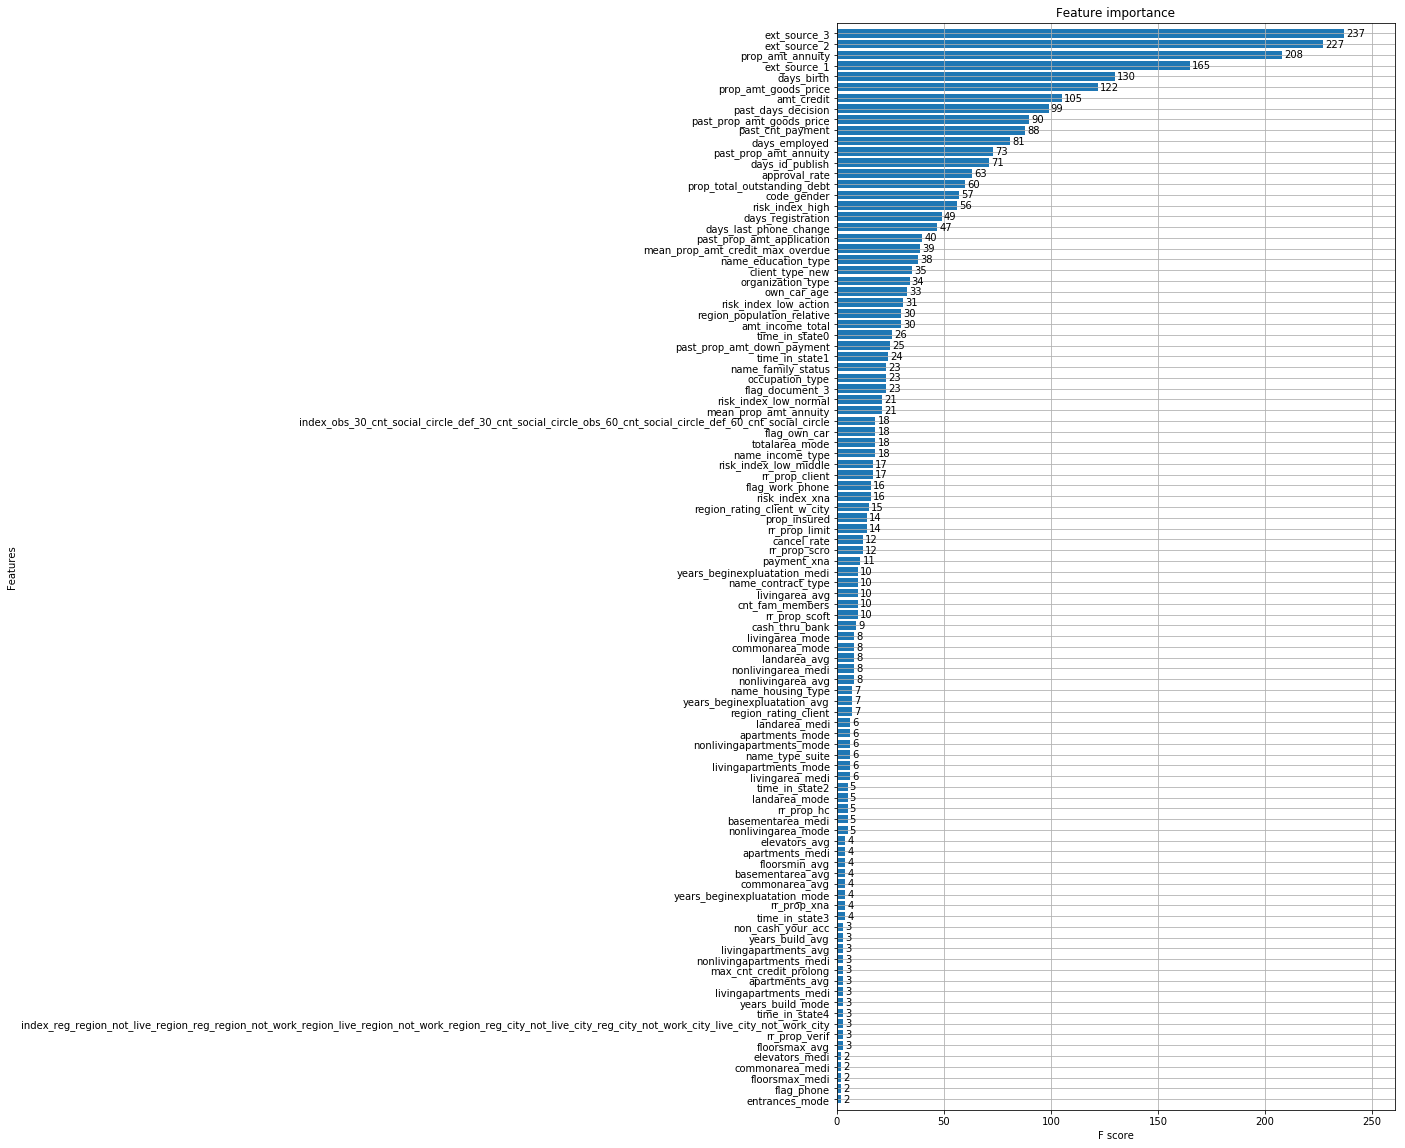

In [34]:
predictors = list(set(get_features_by_type(feature_dict,'all')[0]))

target = 'TARGET'
rcParams['figure.figsize'] = 10, 20

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=100,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=10,
 scale_pos_weight=1,
 silent = False,
 seed=27)

alg = modelfit_w_test(xgb1,
         df.filter(items=train_idx,axis=0),
         df.filter(items=val_idx,axis=0),predictors)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy         : 0.9218
Precision        : 0.735
Recall           : 0.04947
AUC Score (Train): 0.831308




/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy        : 0.9194
Precision       : 0.5146
Recall          : 0.03399
AUC Score (Test): 0.770955


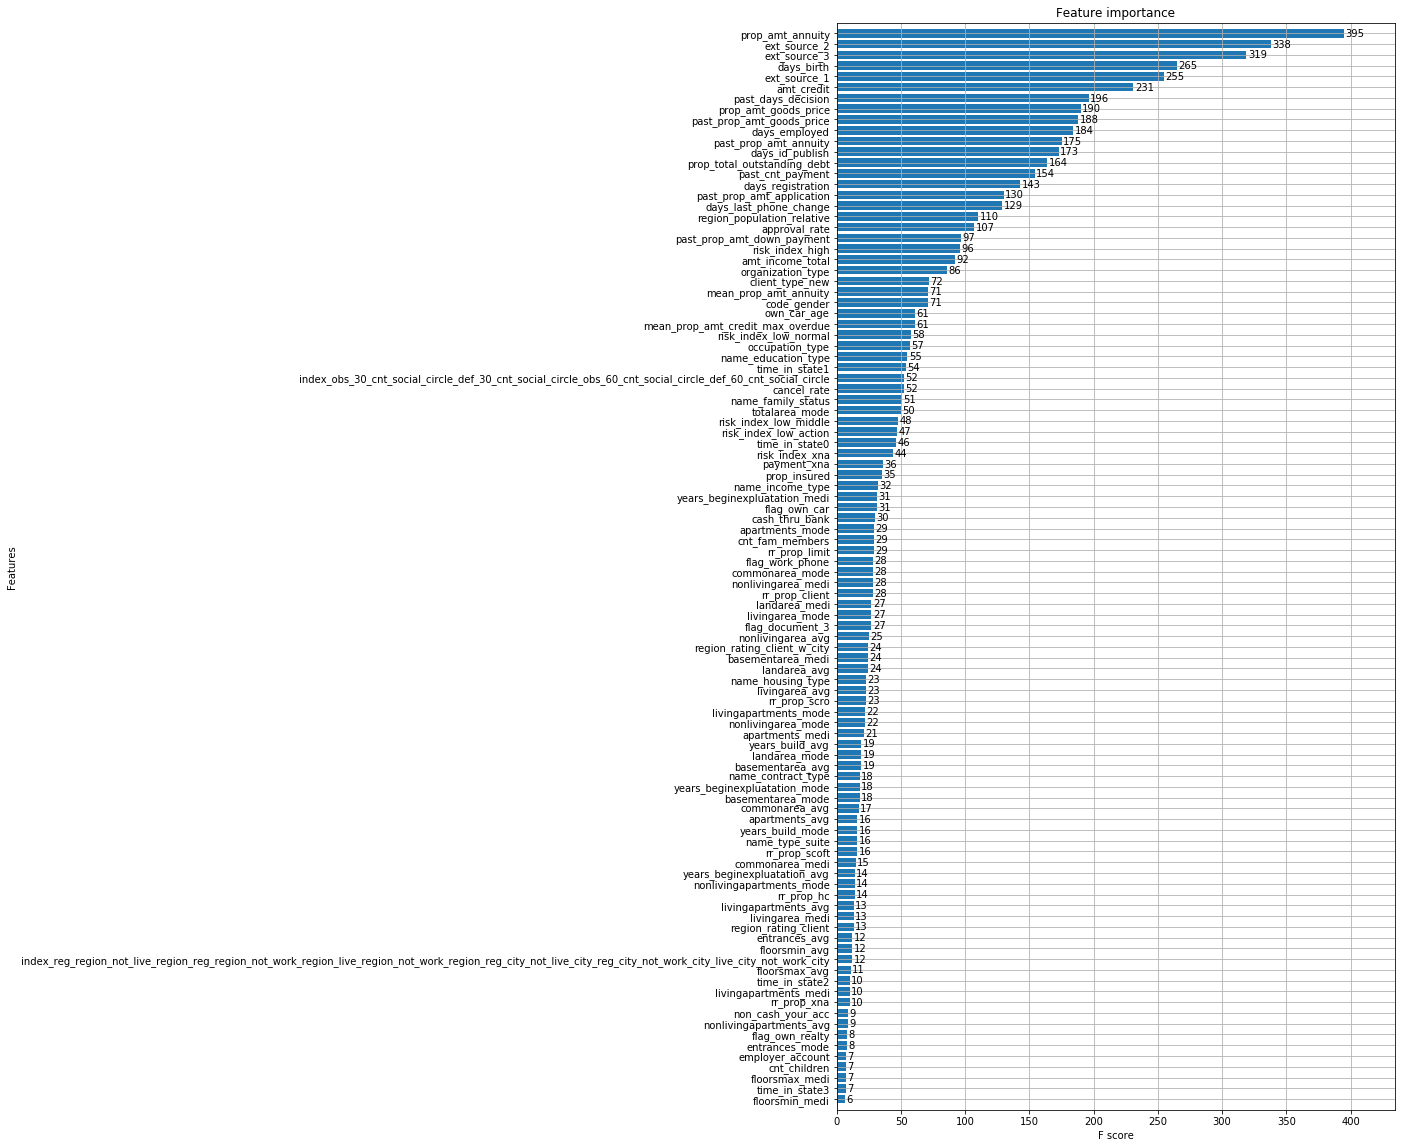

In [35]:
predictors = list(set(get_features_by_type(feature_dict,'all')[0]))

target = 'TARGET'
rcParams['figure.figsize'] = 10, 20

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=500,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=10,
 scale_pos_weight=1,
 silent = False,
 seed=27)

alg = modelfit_w_test(xgb1,
         df.filter(items=train_idx,axis=0),
         df.filter(items=val_idx,axis=0),predictors)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy         : 0.9363
Precision        : 0.9862
Recall           : 0.2143
AUC Score (Train): 0.964406




/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy        : 0.919
Precision       : 0.4748
Recall          : 0.03335
AUC Score (Test): 0.762822


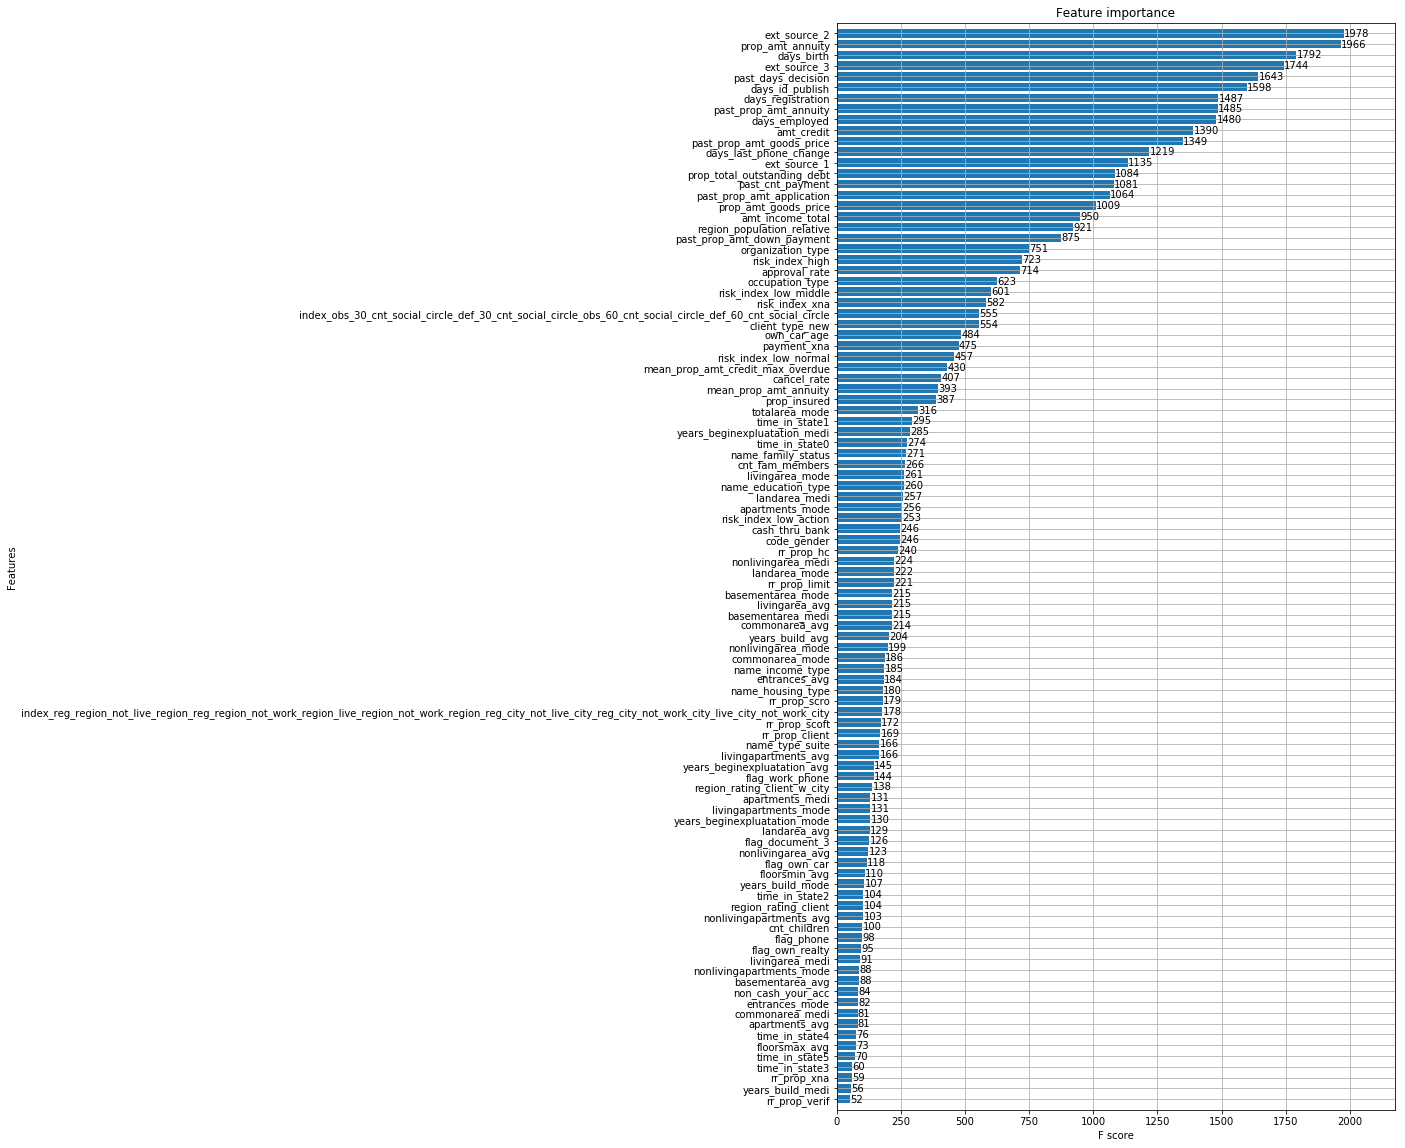

In [36]:
predictors = list(set(get_features_by_type(feature_dict,'all')[0]))

target = 'TARGET'
rcParams['figure.figsize'] = 10, 20

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=500,
 max_depth=10,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=10,
 scale_pos_weight=1,
 silent = False,
 seed=27)

alg = modelfit_w_test(xgb1,
         df.filter(items=train_idx,axis=0),
         df.filter(items=val_idx,axis=0),predictors)

## Features v2

In [1]:
from ETL.ETL import ETL
from ETL.ETL_functions import get_features_by_type,get_features_by_groups

# load data
df,feature_dict = ETL(model_type='forest')

Starting pre-processing ...


/opt/conda/lib/python3.6/site-packages/pandas/core/nanops.py:359: RuntimeWarning: divide by zero encountered in true_divide
  the_mean = the_sum / count


Finished processing application train/test data 9.008038997650146
Finished testing application train/test data 3.305004119873047
Finished processing credit bureau data 37.51250410079956
Finished testing credit bureau data 0.007746696472167969


/home/keras/notebook/nvme/home_credit/src/ETL/ETL_functions.py:284: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  approval_rates = df_a_pr.groupby('SK_ID_CURR')['was_approved'].agg(f)
/home/keras/notebook/nvme/home_credit/src/ETL/ETL_functions.py:290: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  cancel_rates = df_a_pr.groupby('SK_ID_CURR')['was_cancelled'].agg(f)
/home/keras/notebook/nvme/home_credit/src/ETL/ETL_functions.py:347: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  insured_rates = df_a_pr.groupby('SK_ID_CURR')['NFLAG_INSURED_ON_APPROVAL'].agg(f)


Finished processing past application data 23.4852397441864
Finished testing past application data 0.06162667274475098


  9%|▉         | 60797/663424 [00:09<01:38, 6139.27it/s]/opt/conda/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)
100%|██████████| 663424/663424 [01:31<00:00, 7226.97it/s]


Finished processing credit bureau balance data 105.13838124275208


100%|██████████| 898903/898903 [02:03<00:00, 7254.03it/s]


Finished processing pos cash data 160.54981565475464
Finished testing pos cash data 0.013685464859008789
Finished processing installments data 9.899959564208984
Finished testing installments data 0.022675275802612305


In [ ]:
import pickle
from sklearn.model_selection import StratifiedKFold


df.to_feather('../data/forest_data_v2')
with open('forest_data_v2.pickle', 'wb') as handle:
    pickle.dump(feature_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
    




In [2]:
import pickle
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from ETL.ETL_functions import get_features_by_type,get_features_by_groups

df = pd.read_feather('../data/forest_data_v2')
with open('forest_data_v2.pickle', 'rb') as handle:
    feature_dict = pickle.load(handle)

In [3]:
skf = StratifiedKFold(n_splits=4,
                      shuffle = True,
                      random_state = 42)

f1, f2, f3, f4 = skf.split(df[df.TARGET.isin([0,1])].index.values,
                           df[df.TARGET.isin([0,1])].TARGET)

folds = [f1, f2, f3, f4]
train_idx = folds[0][0]
val_idx = folds[0][1]    

all_features = get_features_by_type(feature_dict,'all')[0]
all_groups = get_features_by_type(feature_dict,'all')[1]

In [17]:
test_idx = df[df.TARGET==-1].index

assert len(test_idx)==len(df_sub)
assert set(df.filter(items=test_idx,axis=0).SK_ID_CURR) == set(df_sub.SK_ID_CURR)

In [4]:
df_sub = pd.read_csv('../data/sample_submission.csv')

In [4]:
df_sub

SK_ID_CURR  TARGET
0          100001     0.5
1          100005     0.5
2          100013     0.5
3          100028     0.5
4          100038     0.5
5          100042     0.5
6          100057     0.5
7          100065     0.5
8          100066     0.5
9          100067     0.5
10         100074     0.5
11         100090     0.5
12         100091     0.5
13         100092     0.5
14         100106     0.5
15         100107     0.5
16         100109     0.5
17         100117     0.5
18         100128     0.5
19         100141     0.5
20         100150     0.5
21         100168     0.5
22         100169     0.5
23         100170     0.5
24         100171     0.5
25         100172     0.5
26         100184     0.5
27         100187     0.5
28         100212     0.5
29         100222     0.5
...           ...     ...
48714      455963     0.5
48715      455965     0.5
48716      456007     0.5
48717      456008     0.5
48718      456009     0.5
48719      456010     0.5
48720      456011     0.5
48721      456013     0.5
48722      456028     0.5
48723      456058     0.5
48724      456111     0.5
48725      456114     0.5
48726      456115     0.5
48727      456116     0.5
48728      456119     0.5
48729      456120     0.5
48730      456122     0.5
48731      456123     0.5
48732      456166     0.5
48733      456167     0.5
48734      456168     0.5
48735      456169     0.5
48736      456170     0.5
48737      456189     0.5
48738      456202     0.5
48739      456221     0.5
48740      456222     0.5
48741      456223     0.5
48742      456224     0.5
48743      456250     0.5

[48744 rows x 2 columns]

In [5]:
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
#Import libraries:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Performing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

def modelfit_w_test(alg,
             dtrain,
             dtest,
             predictors,
             useTrainCV=True,
             cv_folds=5,
             early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        xgtest = xgb.DMatrix(dtest[predictors].values)
        cvresult = xgb.cv(xgb_param,
                          xgtrain,
                          num_boost_round=alg.get_params()['n_estimators'],
                          nfold=cv_folds,
                          metrics='auc',
                          early_stopping_rounds=early_stopping_rounds,
                          verbose_eval = False)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy         : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions))
    print ("Precision        : %.4g" % metrics.precision_score(dtrain[target].values, dtrain_predictions))
    print ("Recall           : %.4g" % metrics.recall_score(dtrain[target].values, dtrain_predictions))    
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
    
    print ("\n")
    
    # Predict on testing data:
    dtest_predictions = alg.predict(dtest[predictors])
    dtest_predprob = alg.predict_proba(dtest[predictors])[:,1]
    
    # results = test_results.merge(dtest[['ID','predprob']], on='ID')
    print ("Accuracy        : %.4g" % metrics.accuracy_score(dtest[target].values, dtest_predictions))    
    print ("Precision       : %.4g" % metrics.precision_score(dtest[target].values, dtest_predictions))      
    print ("Recall          : %.4g" % metrics.recall_score(dtest[target].values, dtest_predictions))      
    print ('AUC Score (Test): %f' % metrics.roc_auc_score(dtest[target], dtest_predprob))
                
    xgb.plot_importance(alg, max_num_features=100, height=0.8)    
    
    return alg
    
def modelfit(alg, 
             dtrain,
             predictors,
             useTrainCV=True,
             cv_folds=5,
             early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(
            xgb_param,
            xgtrain,
            num_boost_round=alg.get_params()['n_estimators'],
            nfold=cv_folds,
            metrics='auc',
            early_stopping_rounds=early_stopping_rounds,
            verbose_eval = False
        )
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy         : 0.9205
Precision        : 0.7022
Recall           : 0.02584
AUC Score (Train): 0.804658




/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy        : 0.9194
Precision       : 0.5154
Recall          : 0.01885
AUC Score (Test): 0.773134


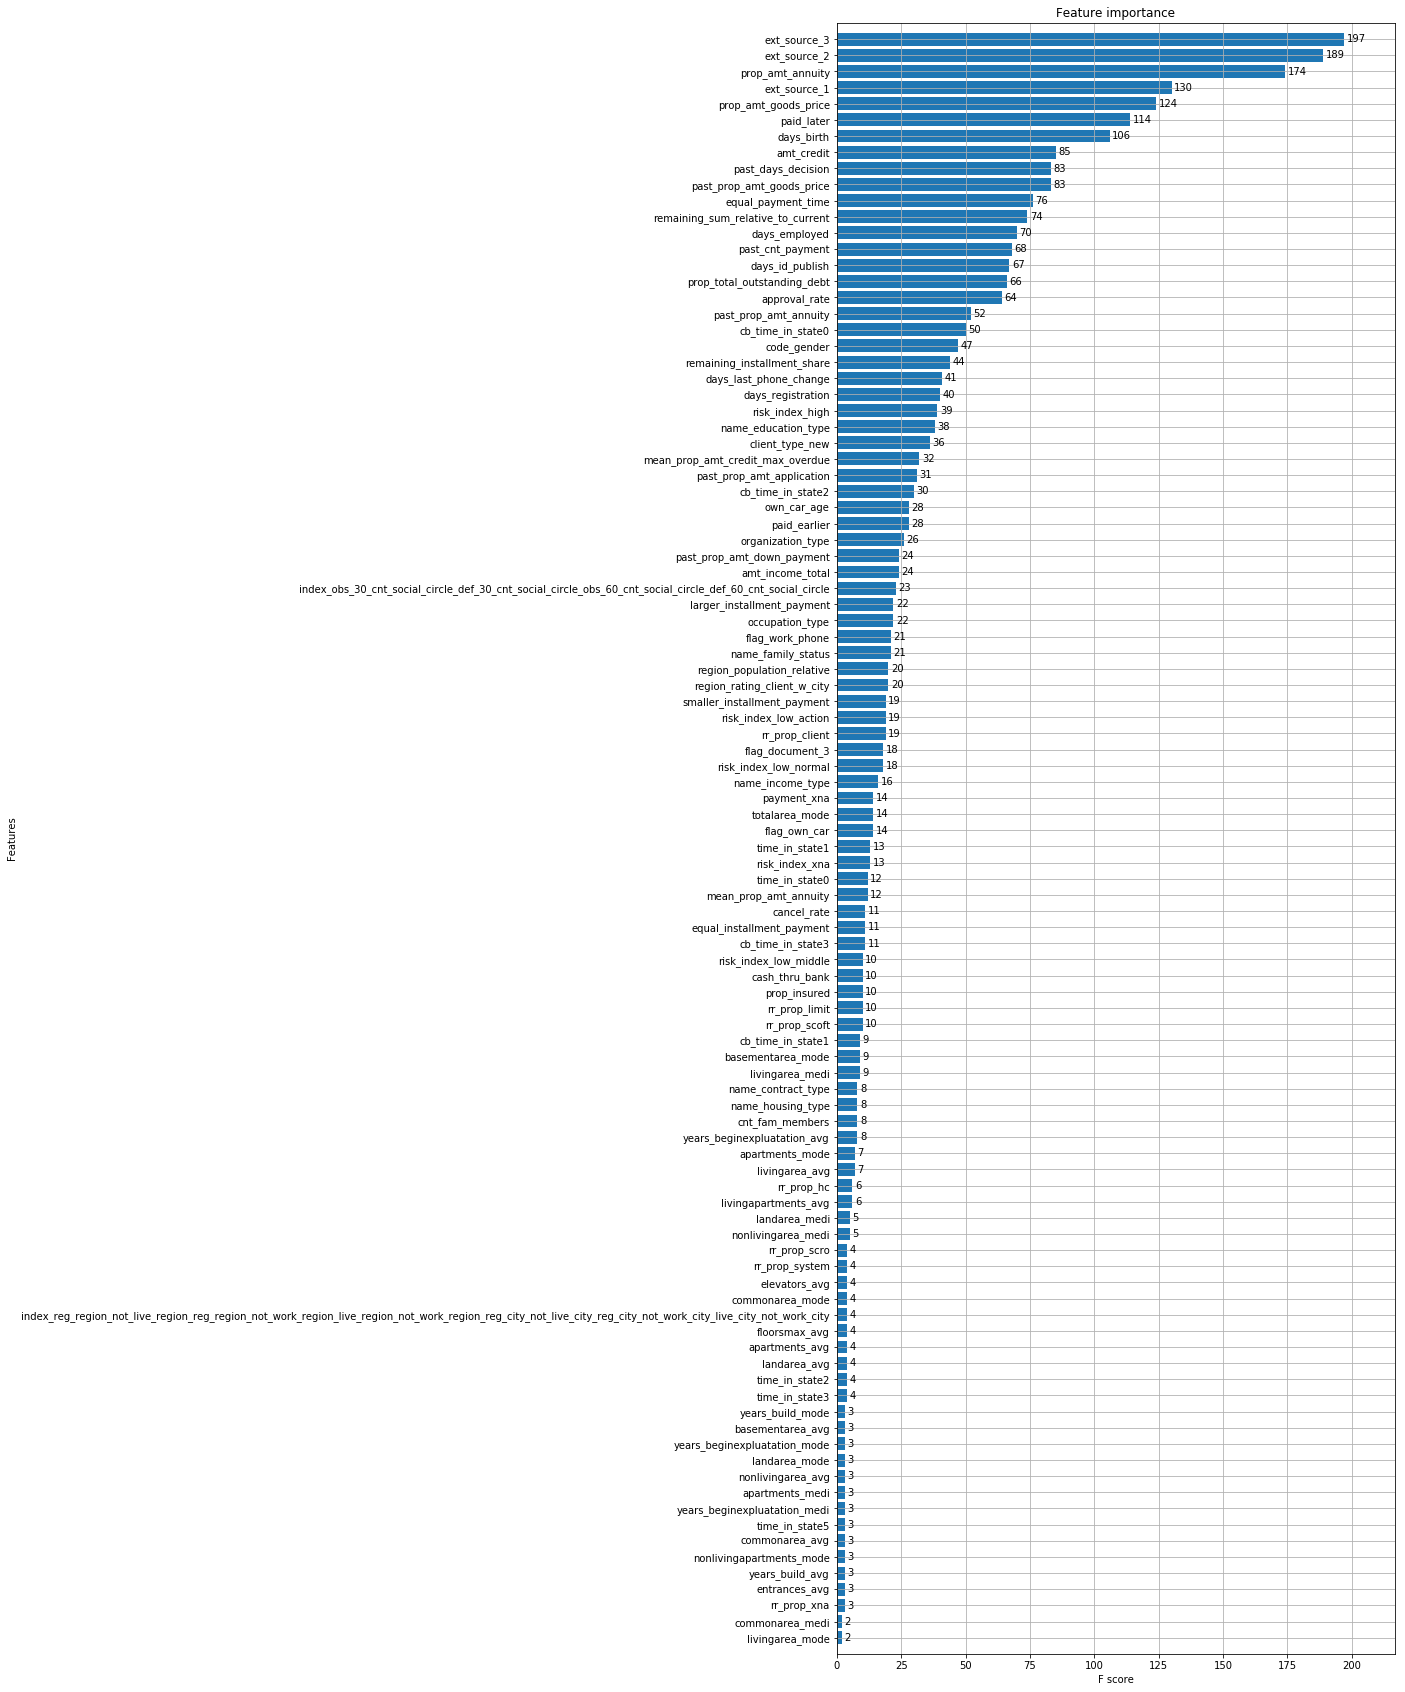

In [12]:
predictors = list(set(get_features_by_type(feature_dict,'all')[0]))

target = 'TARGET'
rcParams['figure.figsize'] = 10, 30

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=100,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=10,
 scale_pos_weight=1,
 silent = False,
 seed=27)

alg = modelfit_w_test(xgb1,
         df.filter(items=train_idx,axis=0),
         df.filter(items=val_idx,axis=0),predictors)    

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy         : 0.9228
Precision        : 0.7538
Recall           : 0.06397
AUC Score (Train): 0.847915




/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy        : 0.9193
Precision       : 0.5
Recall          : 0.03867
AUC Score (Test): 0.778670


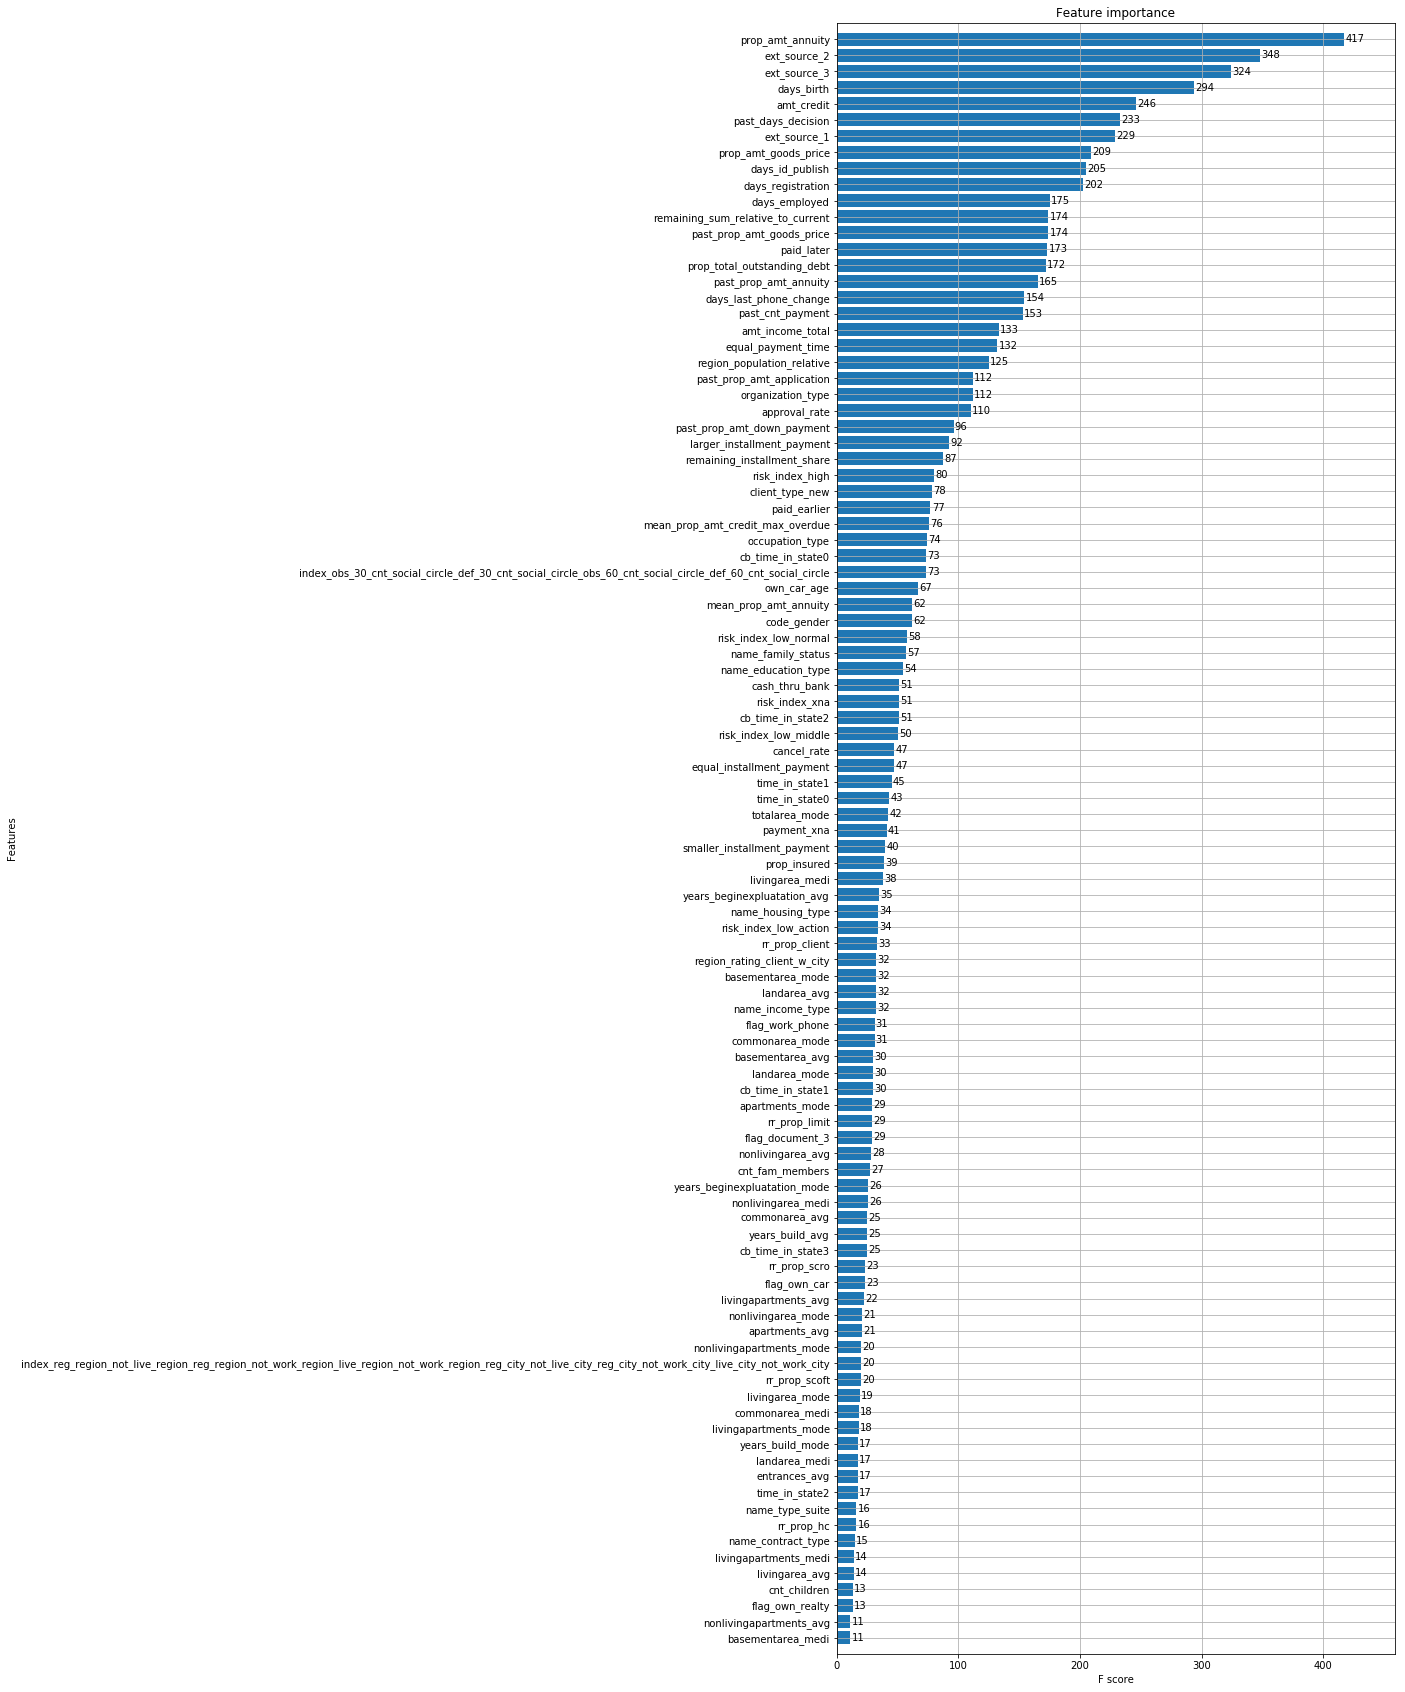

In [11]:
predictors = list(set(get_features_by_type(feature_dict,'all')[0]))

target = 'TARGET'
rcParams['figure.figsize'] = 10, 30

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=500,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=10,
 scale_pos_weight=1,
 silent = False,
 seed=27)

alg = modelfit_w_test(xgb1,
         df.filter(items=train_idx,axis=0),
         df.filter(items=val_idx,axis=0),predictors)    

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy         : 0.9392
Precision        : 0.9875
Recall           : 0.2502
AUC Score (Train): 0.967881




/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy        : 0.9194
Precision       : 0.511
Recall          : 0.03754
AUC Score (Test): 0.768814


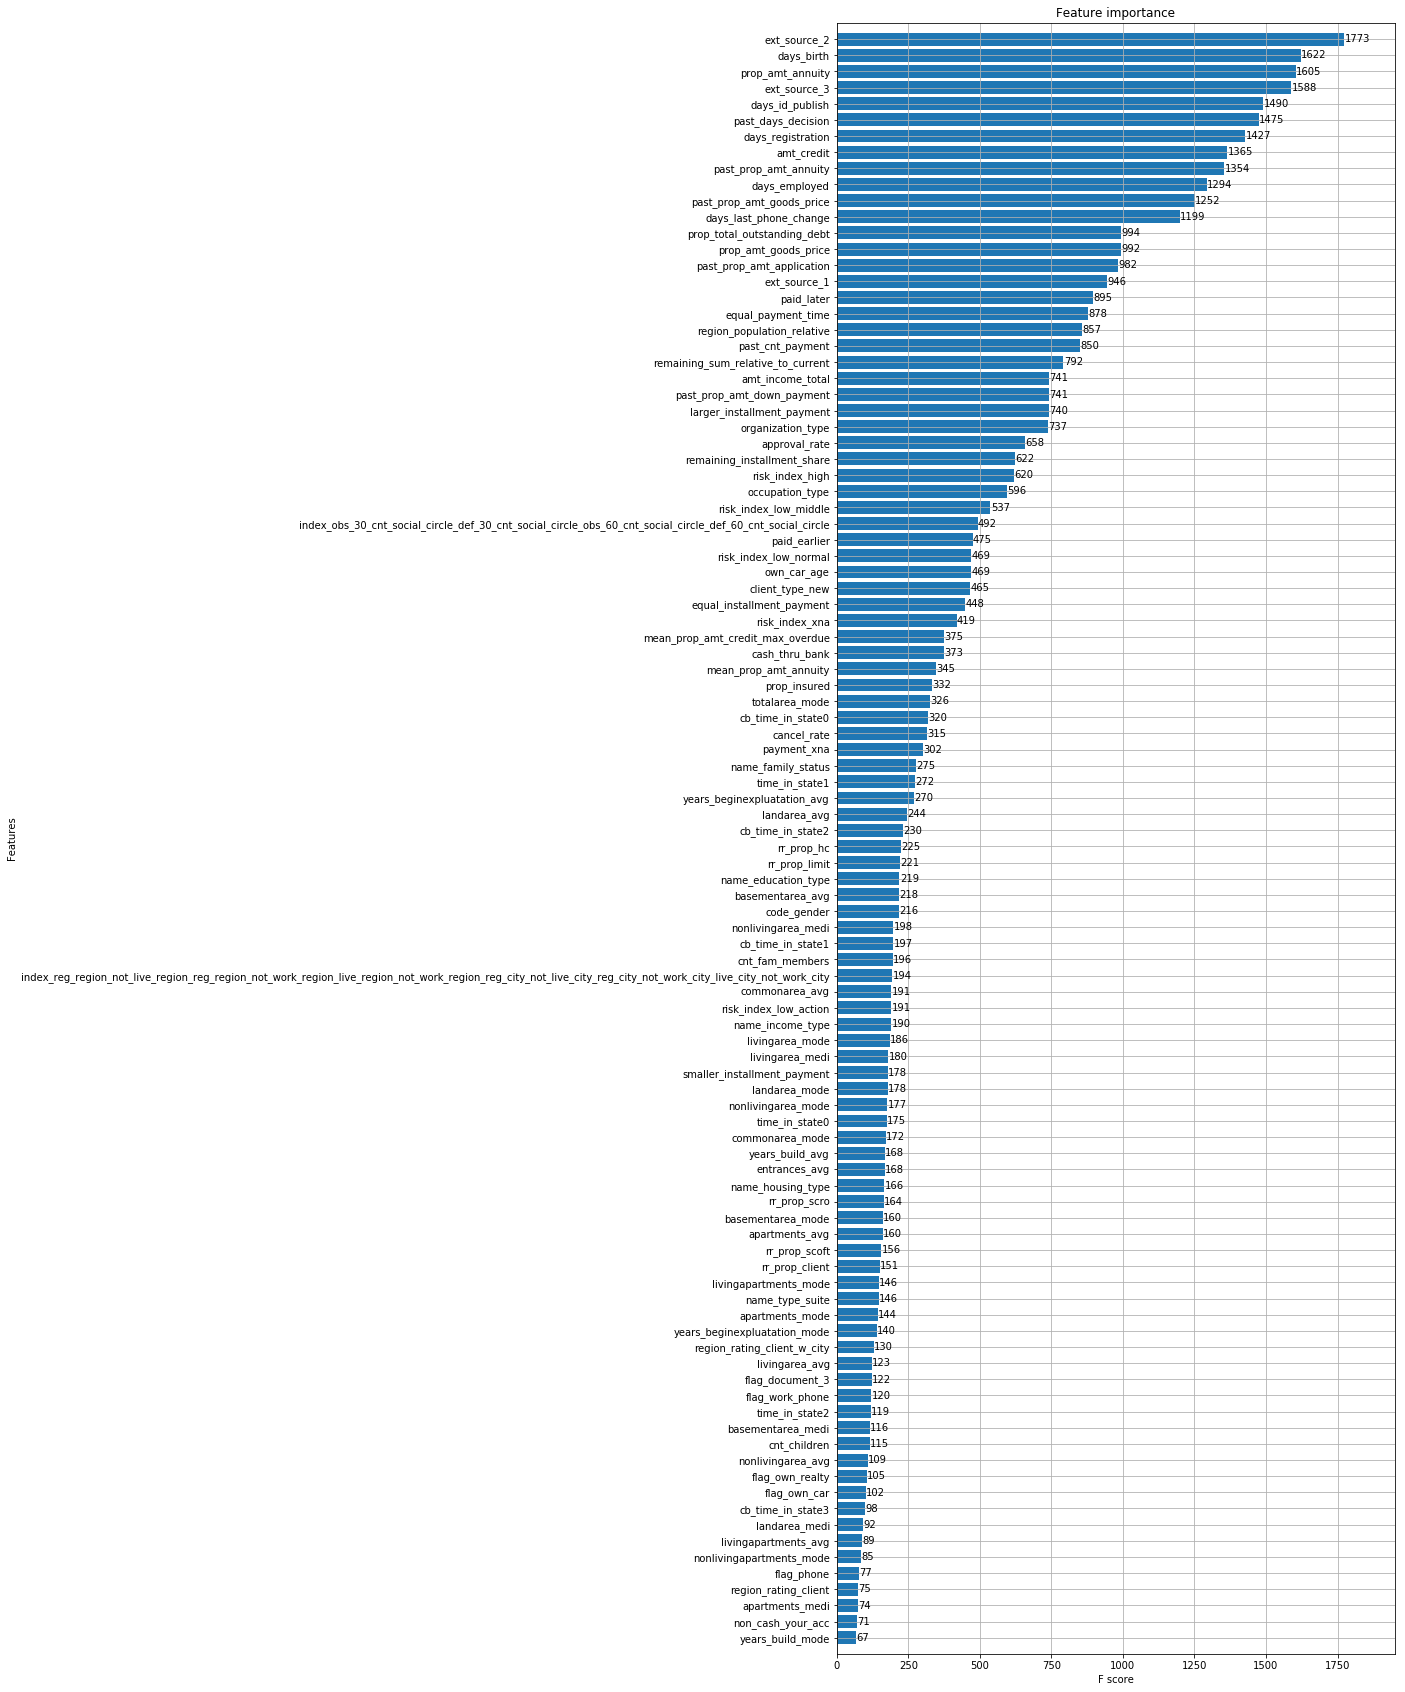

In [13]:
predictors = list(set(get_features_by_type(feature_dict,'all')[0]))

target = 'TARGET'
rcParams['figure.figsize'] = 10, 30

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=10,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=10,
 scale_pos_weight=1,
 silent = False,
 seed=27)

alg = modelfit_w_test(xgb1,
         df.filter(items=train_idx,axis=0),
         df.filter(items=val_idx,axis=0),predictors)    

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy         : 0.9228
Precision        : 0.7538
Recall           : 0.06397
AUC Score (Train): 0.847915




/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy        : 0.9193
Precision       : 0.5
Recall          : 0.03867
AUC Score (Test): 0.778670


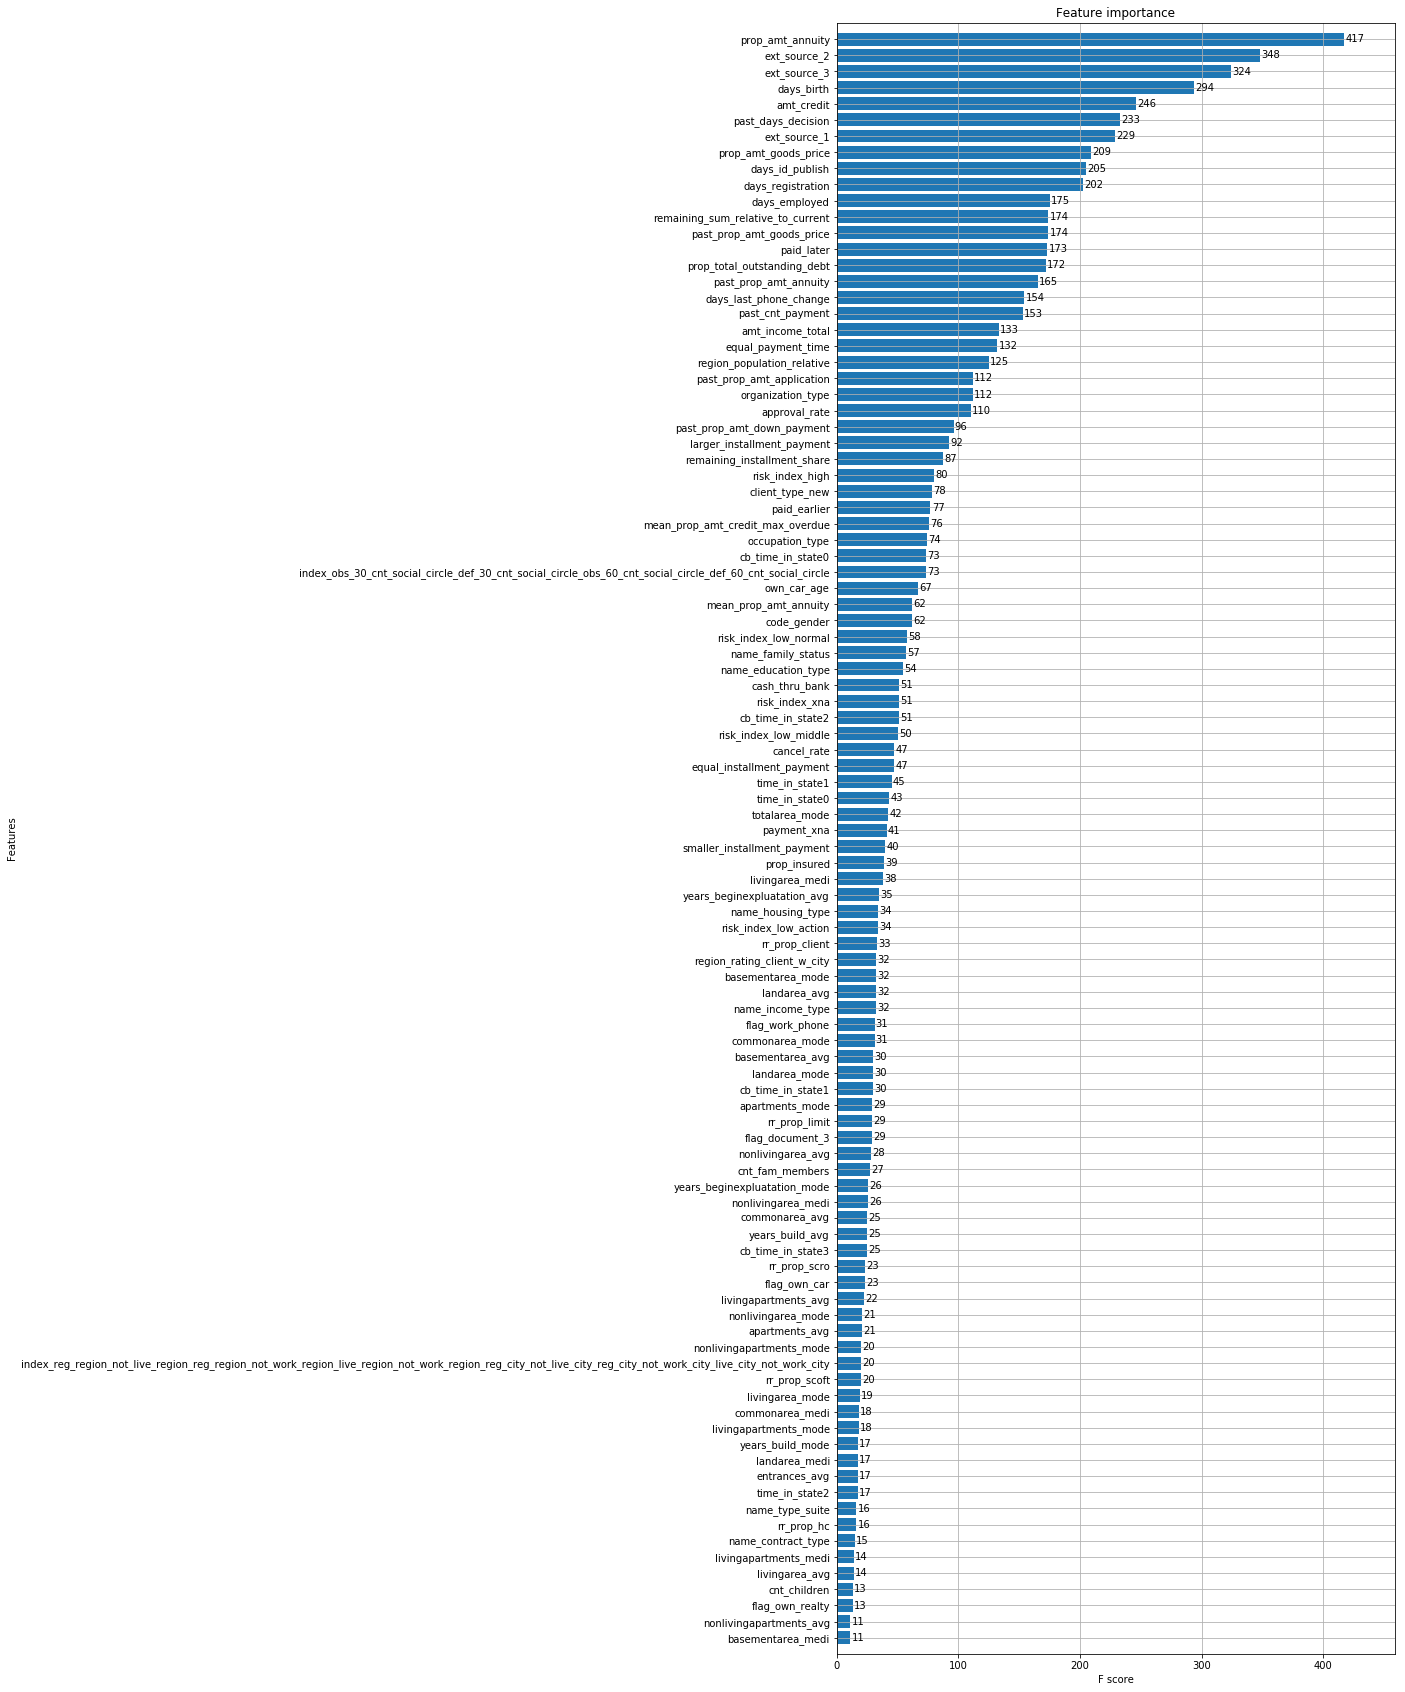

In [14]:
predictors = list(set(get_features_by_type(feature_dict,'all')[0]))

target = 'TARGET'
rcParams['figure.figsize'] = 10, 30

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=10,
 scale_pos_weight=1,
 silent = False,
 seed=27)

alg = modelfit_w_test(xgb1,
         df.filter(items=train_idx,axis=0),
         df.filter(items=val_idx,axis=0),predictors)    

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy         : 0.9218
Precision        : 0.7238
Recall           : 0.05124
AUC Score (Train): 0.833343




/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy        : 0.9193
Precision       : 0.5023
Recall          : 0.03496
AUC Score (Test): 0.777722


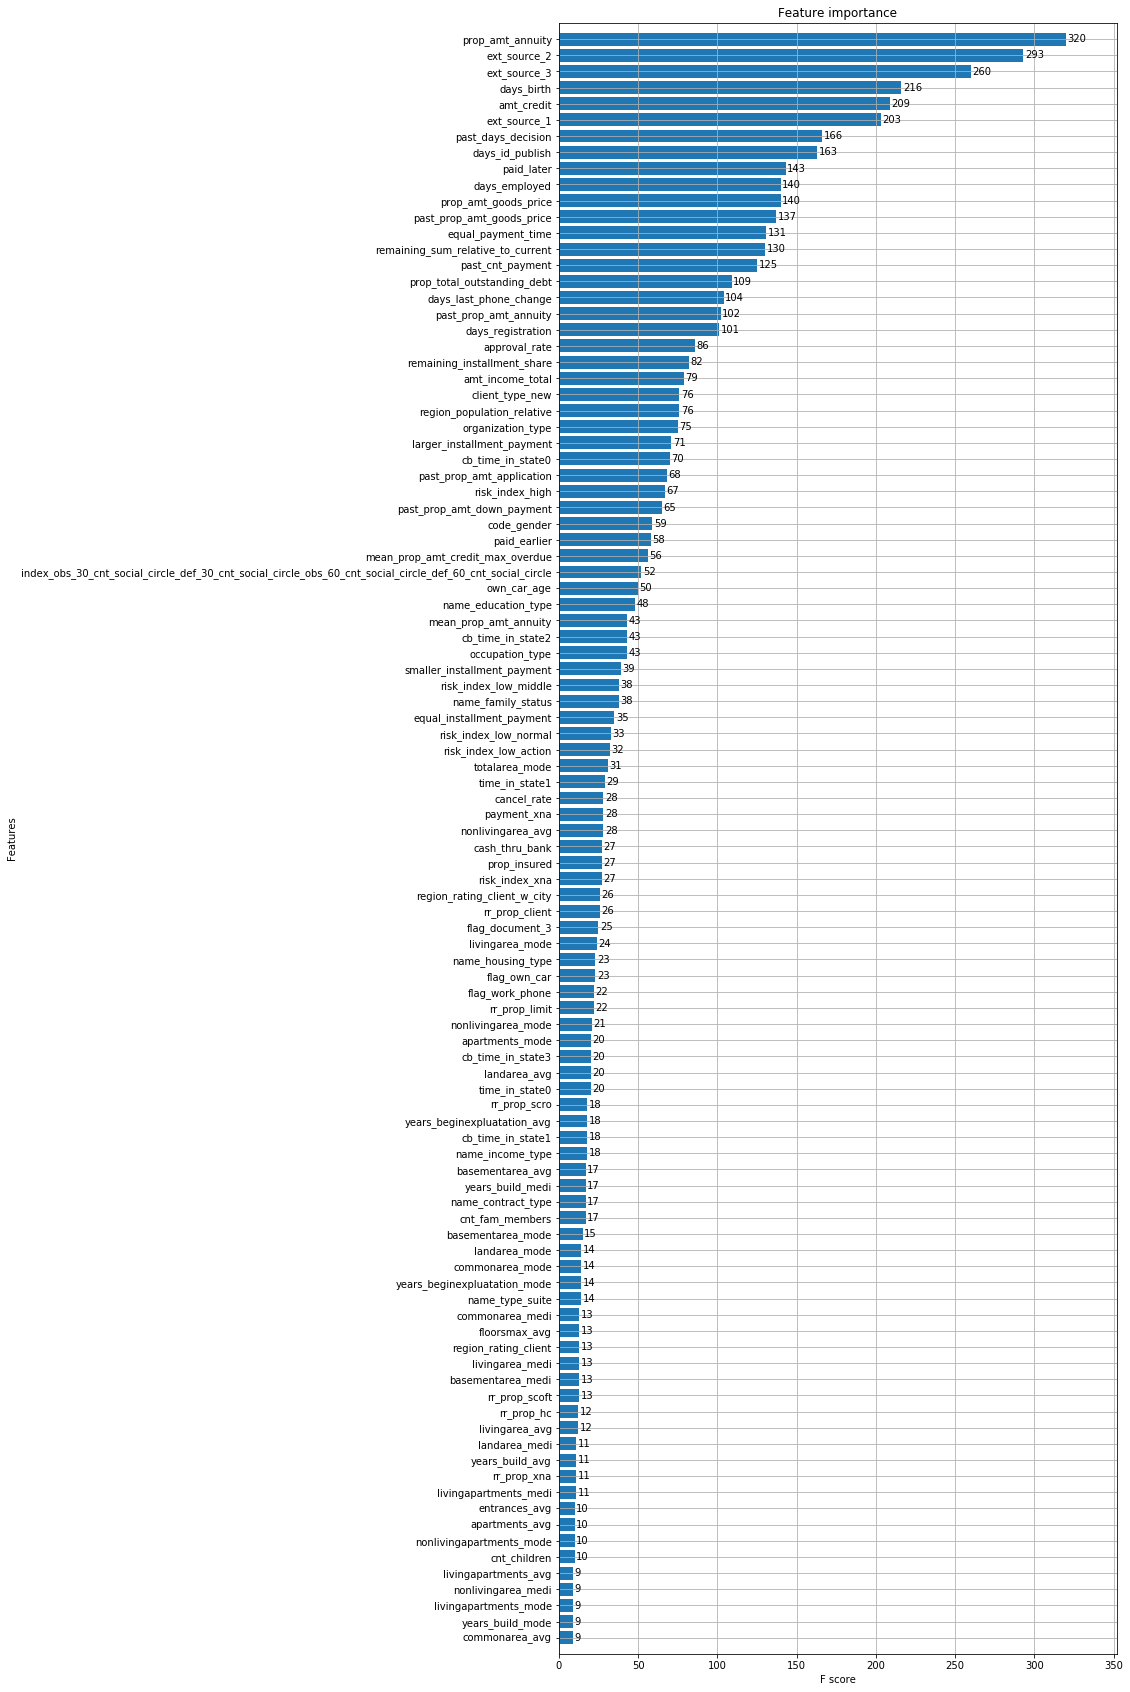

In [6]:
predictors = list(set(get_features_by_type(feature_dict,'all')[0]))

target = 'TARGET'
rcParams['figure.figsize'] = 10, 30

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=200,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=10,
 scale_pos_weight=1,
 silent = False,
 seed=27)

alg = modelfit_w_test(xgb1,
         df.filter(items=train_idx,axis=0),
         df.filter(items=val_idx,axis=0),predictors)    

In [9]:
with open('../models/xgb200_features_v2.pickle', 'wb') as handle:
    pickle.dump(alg, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [66]:
predictors = list(set(get_features_by_type(feature_dict,'all')[0]))
df_test = df.filter(items=test_idx,axis=0)

dtest_predictions = alg.predict(df_test[predictors])
dtest_predprob = alg.predict_proba(df_test[predictors])[:,1]
df_test['dtest_predprob'] = dtest_predprob

df_sub_submit = df_sub.merge(df_test[['SK_ID_CURR','dtest_predprob']],on='SK_ID_CURR')

assert len(df_sub_submit)==len(df_sub)
assert set(df_sub.SK_ID_CURR) == set(df_sub_submit.SK_ID_CURR)

df_sub_submit['TARGET'] = df_sub_submit['dtest_predprob']
del df_sub_submit['dtest_predprob']
df_sub_submit = df_sub_submit.set_index('SK_ID_CURR')
df_sub_submit.to_csv('../submissions/features_v2_xgb_200.csv')

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Linear model baseline

In [67]:
from ETL.ETL import ETL
from ETL.ETL_functions import get_features_by_type,get_features_by_groups

# load data
df,feature_dict = ETL(model_type='reg')

Starting pre-processing ...


/opt/conda/lib/python3.6/site-packages/pandas/core/nanops.py:359: RuntimeWarning: divide by zero encountered in true_divide
  the_mean = the_sum / count


Finished processing application train/test data 11.116967678070068
Finished testing application train/test data 3.4432027339935303
Finished processing credit bureau data 39.04153847694397
Finished testing credit bureau data 0.00856161117553711


/home/keras/notebook/nvme/home_credit/src/ETL/ETL_functions.py:284: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  approval_rates = df_a_pr.groupby('SK_ID_CURR')['was_approved'].agg(f)
/home/keras/notebook/nvme/home_credit/src/ETL/ETL_functions.py:290: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  cancel_rates = df_a_pr.groupby('SK_ID_CURR')['was_cancelled'].agg(f)
/home/keras/notebook/nvme/home_credit/src/ETL/ETL_functions.py:347: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  insured_rates = df_a_pr.groupby('SK_ID_CURR')['NFLAG_INSURED_ON_APPROVAL'].agg(f)


Finished processing past application data 24.55266523361206
Finished testing past application data 0.06461524963378906


  9%|▉         | 61073/663424 [00:09<01:37, 6163.27it/s]/opt/conda/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)
100%|██████████| 663424/663424 [01:30<00:00, 7304.95it/s]


Finished processing credit bureau balance data 105.4050223827362


100%|██████████| 898903/898903 [02:02<00:00, 7327.94it/s]


Finished processing pos cash data 159.8713777065277
Finished testing pos cash data 0.014581441879272461
Finished processing installments data 10.185396194458008
Finished testing installments data 0.023111820220947266


In [70]:
import pickle


df.to_feather('../data/reg_data_v2')

with open('reg_data_v2.pickle', 'wb') as handle:
    pickle.dump(feature_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [2]:
import pickle
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from ETL.ETL_functions import get_features_by_type,get_features_by_groups

df = pd.read_feather('../data/reg_data_v2')

with open('reg_data_v2.pickle', 'rb') as handle:
    feature_dict = pickle.load(handle)

In [3]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=4,
                      shuffle = True,
                      random_state = 42)

f1, f2, f3, f4 = skf.split(df[df.TARGET.isin([0,1])].index.values,
                           df[df.TARGET.isin([0,1])].TARGET)

folds = [f1, f2, f3, f4]
train_idx = folds[0][0]
val_idx = folds[0][1]    

all_features = get_features_by_type(feature_dict,'all')[0]
all_groups = get_features_by_type(feature_dict,'all')[1]

In [5]:
df_sub = pd.read_csv('../data/sample_submission.csv')

test_idx = df[df.TARGET==-1].index

assert len(test_idx)==len(df_sub)
assert set(df.filter(items=test_idx,axis=0).SK_ID_CURR) == set(df_sub.SK_ID_CURR)

In [6]:
import numpy as np
from sklearn import linear_model
from sklearn import cross_validation, metrics 

def fit_logreg(logreg_params,fold_number):
    
    fold_models = []
    fold_scores = []
    
    for i,fold in enumerate(folds):
        
        if i > fold_number-1:
            break
            
        print('Processing fold {}'.format(i))
        train_idx = fold[0]
        val_idx = fold[1]

        X_train = df.filter(items=train_idx,axis=0)[predictors].values
        Y_train = df.filter(items=train_idx,axis=0).TARGET.values

        X_val   = df.filter(items=val_idx,axis=0)[predictors].values
        Y_val   = df.filter(items=val_idx,axis=0).TARGET.values    

        logreg = linear_model.LogisticRegression(**logreg_params)
        logreg.fit(X_train, Y_train)

        #Predict training set:
        train_pred       = logreg.predict(X_train)
        train_pred_proba = logreg.predict_proba(X_train)[:,1]

        val_pred         = logreg.predict(X_val)
        val_pred_proba   = logreg.predict_proba(X_val)[:,1]

        #Print model report:
        print ("\nModel Report")
        print ("Accuracy         : %.4g" % metrics.accuracy_score(Y_train, train_pred))
        print ("Precision        : %.4g" % metrics.precision_score(Y_train, train_pred))
        print ("Recall           : %.4g" % metrics.recall_score(Y_train, train_pred))    
        print ("AUC Score (Train): %f" % metrics.roc_auc_score(Y_train, train_pred_proba))

        print ("\n")

        # results = test_results.merge(dtest[['ID','predprob']], on='ID')
        print ("Accuracy        : %.4g" % metrics.accuracy_score(Y_val, val_pred))    
        print ("Precision       : %.4g" % metrics.precision_score(Y_val, val_pred))      
        print ("Recall          : %.4g" % metrics.recall_score(Y_val, val_pred))      
        print ('AUC Score (Test): %f' % metrics.roc_auc_score(Y_val, val_pred_proba))    
        
        print ("\n")
        
        scores = {'roc_auc_train':metrics.roc_auc_score(Y_train, train_pred_proba),
                  'roc_auc_val':metrics.roc_auc_score(Y_val, val_pred_proba),
                 }
        
        fold_models.append(logreg)
        fold_scores.append(scores)
    
    return fold_models,fold_scores

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [111]:
logreg_params = {
    'penalty':'l1',
    'tol':1e-4,
    'C':1,
    'fit_intercept':True,
    'class_weight':{0: 1,1:1},
    'random_state':42,
    'verbose':1,
    'n_jobs':-1,
    'solver':'liblinear',
    'max_iter':1000,
}

fold_models,fold_scores = fit_logreg(logreg_params,1)

Processing fold 0


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]
Model Report
Accuracy         : 0.9193
Precision        : 0.5157
Recall           : 0.01413
AUC Score (Train): 0.752370


Accuracy        : 0.9193
Precision       : 0.512
Recall          : 0.01369
AUC Score (Test): 0.751097




In [8]:
predictors = list(set(get_features_by_type(feature_dict,'all')[0]))

logreg_params = {
    'penalty':'l1',
    'tol':1e-4,
    'C':10,
    'fit_intercept':True,
    'class_weight':{0: 1,1:1},
    'random_state':42,
    'verbose':1,
    'n_jobs':-1,
    'solver':'liblinear',
    'max_iter':1000,
}

fold_models,fold_scores = fit_logreg(logreg_params,1)

Processing fold 0


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]
Model Report
Accuracy         : 0.9194
Precision        : 0.5219
Recall           : 0.01472
AUC Score (Train): 0.752714


Accuracy        : 0.9193
Precision       : 0.5057
Recall          : 0.01418
AUC Score (Test): 0.750567




In [9]:
logreg_params = {
    'penalty':'l2',
    'tol':1e-5,
    'C':1,
    'fit_intercept':True,
    'class_weight':{0: 1,1:1},
    'random_state':42,
    'verbose':1,
    'n_jobs':-1,
    'solver':'lbfgs',
    'max_iter':1000,
}

fold_models,fold_scores = fit_logreg(logreg_params,1)

Processing fold 0


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.9min finished



Model Report
Accuracy         : 0.9194
Precision        : 0.5241
Recall           : 0.01461
AUC Score (Train): 0.752794


Accuracy        : 0.9194
Precision       : 0.5235
Recall          : 0.01434
AUC Score (Test): 0.751159




In [10]:
logreg_params = {
    'penalty':'l1',
    'tol':1e-4,
    'C':0.1,
    'fit_intercept':True,
    'class_weight':{0: 1,1:1},
    'random_state':42,
    'verbose':1,
    'n_jobs':-1,
    'solver':'liblinear',
    'max_iter':1000,
}

fold_models,fold_scores = fit_logreg(logreg_params,1)

Processing fold 0


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]
Model Report
Accuracy         : 0.9194
Precision        : 0.5291
Recall           : 0.01171
AUC Score (Train): 0.751251


Accuracy        : 0.9195
Precision       : 0.5659
Recall          : 0.01176
AUC Score (Test): 0.750619




In [11]:
logreg_params = {
    'penalty':'l2',
    'tol':1e-4,
    'C':1,
    'fit_intercept':True,
    'class_weight':{0: 1,1:1},
    'random_state':42,
    'verbose':1,
    'n_jobs':-1,
    'solver':'sag',
    'max_iter':1000,
}

fold_models,fold_scores = fit_logreg(logreg_params,1)

Processing fold 0
convergence after 179 epochs took 75 seconds


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.3min finished



Model Report
Accuracy         : 0.9194
Precision        : 0.5232
Recall           : 0.01456
AUC Score (Train): 0.752788


Accuracy        : 0.9194
Precision       : 0.5207
Recall          : 0.01418
AUC Score (Test): 0.751155




In [109]:
logreg_params = {
    'penalty':'l2',
    'tol':1e-4,
    'C':1,
    'fit_intercept':True,
    'class_weight':{0: 1,1:1},
    'random_state':42,
    'verbose':1,
    'n_jobs':-1,
    'solver':'lbfgs',
    'max_iter':1000,
}

fold_models,fold_scores = fit_logreg(logreg_params,1)

Processing fold 0


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  3.2min finished



Model Report
Accuracy         : 0.9194
Precision        : 0.5232
Recall           : 0.01456
AUC Score (Train): 0.752780


Accuracy        : 0.9194
Precision       : 0.5207
Recall          : 0.01418
AUC Score (Test): 0.751150




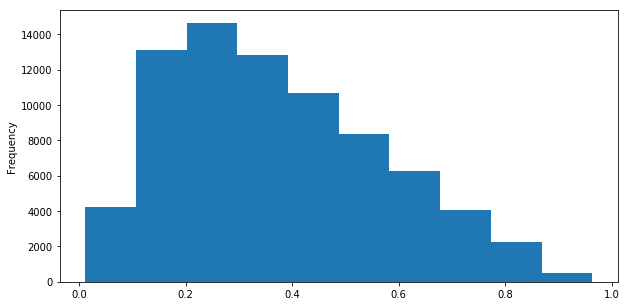

In [101]:
pd.DataFrame(val_pred_proba)[0].plot(kind='hist',figsize=(10,5))

In [93]:
import numpy as np
from sklearn import linear_model
from sklearn import cross_validation, metrics 

for i,fold in enumerate(folds):
    
    print('Processing fold {}'.format(i))
    train_idx = fold[0]
    val_idx = fold[1]
    
    X_train = df.filter(items=train_idx,axis=0)[predictors].values
    Y_train = df.filter(items=train_idx,axis=0).TARGET.values

    X_val   = df.filter(items=val_idx,axis=0)[predictors].values
    Y_val   = df.filter(items=val_idx,axis=0).TARGET.values    
    
    logreg = linear_model.LogisticRegression(**logreg_params)
    logreg.fit(X_train, Y_train)
    
    #Predict training set:
    train_pred       = logreg.predict(X_train)
    train_pred_proba = logreg.predict_proba(X_train)[:,1]
 
    val_pred         = logreg.predict(X_val)
    val_pred_proba   = logreg.predict_proba(X_val)[:,1]
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy         : %.4g" % metrics.accuracy_score(Y_train, train_pred))
    print ("Precision        : %.4g" % metrics.precision_score(Y_train, train_pred))
    print ("Recall           : %.4g" % metrics.recall_score(Y_train, train_pred))    
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(Y_train, train_pred_proba))
    
    print ("\n")

    # results = test_results.merge(dtest[['ID','predprob']], on='ID')
    print ("Accuracy        : %.4g" % metrics.accuracy_score(Y_val, val_pred))    
    print ("Precision       : %.4g" % metrics.precision_score(Y_val, val_pred))      
    print ("Recall          : %.4g" % metrics.recall_score(Y_val, val_pred))      
    print ('AUC Score (Test): %f' % metrics.roc_auc_score(Y_val, val_pred_proba))
    
    print ("\n")

Processing fold 0


[Parallel(n_jobs=10)]: Done   1 out of   1 | elapsed:  2.4min finished



Model Report
Accuracy         : 0.7548
Precision        : 0.1844
Recall           : 0.5952
AUC Score (Train): 0.752954


Accuracy        : 0.7527
Precision       : 0.1828
Recall          : 0.5943
AUC Score (Test): 0.750926
Processing fold 1


[Parallel(n_jobs=10)]: Done   1 out of   1 | elapsed:  2.2min finished



Model Report
Accuracy         : 0.7541
Precision        : 0.1837
Recall           : 0.5942
AUC Score (Train): 0.752676


Accuracy        : 0.7568
Precision       : 0.1851
Recall          : 0.5918
AUC Score (Test): 0.751891
Processing fold 2


[Parallel(n_jobs=10)]: Done   1 out of   1 | elapsed:  2.4min finished



Model Report
Accuracy         : 0.7551
Precision        : 0.1849
Recall           : 0.5964
AUC Score (Train): 0.754099


Accuracy        : 0.7508
Precision       : 0.179
Recall          : 0.5819
AUC Score (Test): 0.747233
Processing fold 3


Process ForkPoolWorker-100:
Process ForkPoolWorker-99:
Process ForkPoolWorker-96:
Process ForkPoolWorker-97:
Process ForkPoolWorker-98:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    t

KeyboardInterrupt: 

In [12]:
alg = fold_models[0]

In [14]:
predictors = list(set(get_features_by_type(feature_dict,'all')[0]))
df_test = df.filter(items=test_idx,axis=0)

alg = fold_models[0]

dtest_predictions = alg.predict(df_test[predictors])
dtest_predprob = alg.predict_proba(df_test[predictors])[:,1]
df_test['dtest_predprob'] = dtest_predprob

df_sub_submit = df_sub.merge(df_test[['SK_ID_CURR','dtest_predprob']],on='SK_ID_CURR')

assert len(df_sub_submit)==len(df_sub)
assert set(df_sub.SK_ID_CURR) == set(df_sub_submit.SK_ID_CURR)

df_sub_submit['TARGET'] = df_sub_submit['dtest_predprob']
del df_sub_submit['dtest_predprob']
df_sub_submit = df_sub_submit.set_index('SK_ID_CURR')
df_sub_submit.to_csv('../submissions/features_v2_logreg_200.csv')

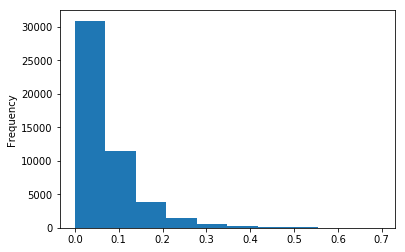

In [17]:
df_sub_submit.TARGET.plot(kind='hist')

## Features v3

In [1]:
import pickle
from ETL.ETL import ETL
from sklearn.model_selection import StratifiedKFold
from ETL.ETL_functions import get_features_by_type,get_features_by_groups

# load data
df,feature_dict = ETL(model_type='forest')


df.to_feather('../data/forest_data_v3')
with open('forest_data_v3.pickle', 'wb') as handle:
    pickle.dump(feature_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
    

skf = StratifiedKFold(n_splits=4,
                      shuffle = True,
                      random_state = 42)


f1, f2, f3, f4 = skf.split(df[df.TARGET.isin([0,1])].index.values,
                           df[df.TARGET.isin([0,1])].TARGET)

folds = [f1, f2, f3, f4]
train_idx = folds[0][0]
val_idx = folds[0][1]    

all_features = get_features_by_type(feature_dict,'all')[0]
all_groups = get_features_by_type(feature_dict,'all')[1]



Starting pre-processing ...


/opt/conda/lib/python3.6/site-packages/pandas/core/nanops.py:359: RuntimeWarning: divide by zero encountered in true_divide
  the_mean = the_sum / count


Finished processing application train/test data 9.065084457397461
Finished testing application train/test data 3.4912002086639404
Finished processing credit bureau data 38.381150245666504
Finished testing credit bureau data 0.00804758071899414


/home/keras/notebook/nvme/home_credit/src/ETL/ETL_functions.py:284: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  approval_rates = df_a_pr.groupby('SK_ID_CURR')['was_approved'].agg(f)
/home/keras/notebook/nvme/home_credit/src/ETL/ETL_functions.py:290: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  cancel_rates = df_a_pr.groupby('SK_ID_CURR')['was_cancelled'].agg(f)
/home/keras/notebook/nvme/home_credit/src/ETL/ETL_functions.py:347: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  insured_rates = df_a_pr.groupby('SK_ID_CURR')['NFLAG_INSURED_ON_APPROVAL'].agg(f)


Finished processing past application data 23.723220586776733
Finished testing past application data 0.061147212982177734


  9%|▉         | 61934/663424 [00:09<01:36, 6207.46it/s]/opt/conda/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)
100%|██████████| 663424/663424 [01:30<00:00, 7332.65it/s]


Finished processing credit bureau balance data 104.19678282737732


100%|██████████| 898903/898903 [02:02<00:00, 7325.96it/s]


Finished processing pos cash data 159.27122497558594
Finished testing pos cash data 0.013902664184570312
Finished processing installments data 10.227934122085571
Finished testing installments data 0.022470474243164062


100%|██████████| 104307/104307 [00:15<00:00, 6536.86it/s]


Finished processing credit card balance data 49.894497871398926
Finished testing credit card balance data 0.026189327239990234


In [3]:
import pandas as pd

df = df.drop_duplicates()

test_idx = df[df.TARGET==-1].index
df_sub = pd.read_csv('../data/sample_submission.csv')

assert len(test_idx)==len(df_sub)
assert set(df.filter(items=test_idx,axis=0).SK_ID_CURR) == set(df_sub.SK_ID_CURR)

In [ ]:
import pickle
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from ETL.ETL_functions import get_features_by_type,get_features_by_groups

df = pd.read_feather('../data/forest_data_v3')
with open('forest_data_v3.pickle', 'rb') as handle:
    feature_dict = pickle.load(handle)

In [25]:
a = np.zeros((10))
b = np.zeros((10))

In [26]:
import numpy as np

b = np.append(a,b, axis=0)
b.shape

(20,)

(10, 1)

In [5]:
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
#Import libraries:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Performing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

def modelfit_w_test(alg,
             dtrain,
             dtest,
             predictors,
             useTrainCV=True,
             cv_folds=5,
             early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        xgtest = xgb.DMatrix(dtest[predictors].values)
        cvresult = xgb.cv(xgb_param,
                          xgtrain,
                          num_boost_round=alg.get_params()['n_estimators'],
                          nfold=cv_folds,
                          metrics='auc',
                          early_stopping_rounds=early_stopping_rounds,
                          verbose_eval = False)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy         : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions))
    print ("Precision        : %.4g" % metrics.precision_score(dtrain[target].values, dtrain_predictions))
    print ("Recall           : %.4g" % metrics.recall_score(dtrain[target].values, dtrain_predictions))    
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
    
    print ("\n")
    
    # Predict on testing data:
    dtest_predictions = alg.predict(dtest[predictors])
    dtest_predprob = alg.predict_proba(dtest[predictors])[:,1]
    
    # results = test_results.merge(dtest[['ID','predprob']], on='ID')
    print ("Accuracy        : %.4g" % metrics.accuracy_score(dtest[target].values, dtest_predictions))    
    print ("Precision       : %.4g" % metrics.precision_score(dtest[target].values, dtest_predictions))      
    print ("Recall          : %.4g" % metrics.recall_score(dtest[target].values, dtest_predictions))      
    print ('AUC Score (Test): %f' % metrics.roc_auc_score(dtest[target], dtest_predprob))
                
    xgb.plot_importance(alg, max_num_features=100, height=0.8)    
    
    return alg
    
def modelfit(alg, 
             dtrain,
             predictors,
             useTrainCV=True,
             cv_folds=5,
             early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(
            xgb_param,
            xgtrain,
            num_boost_round=alg.get_params()['n_estimators'],
            nfold=cv_folds,
            metrics='auc',
            early_stopping_rounds=early_stopping_rounds,
            verbose_eval = False
        )
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy         : 0.9222
Precision        : 0.7374
Recall           : 0.0564
AUC Score (Train): 0.833706




/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy        : 0.9195
Precision       : 0.5213
Recall          : 0.03754
AUC Score (Test): 0.780387


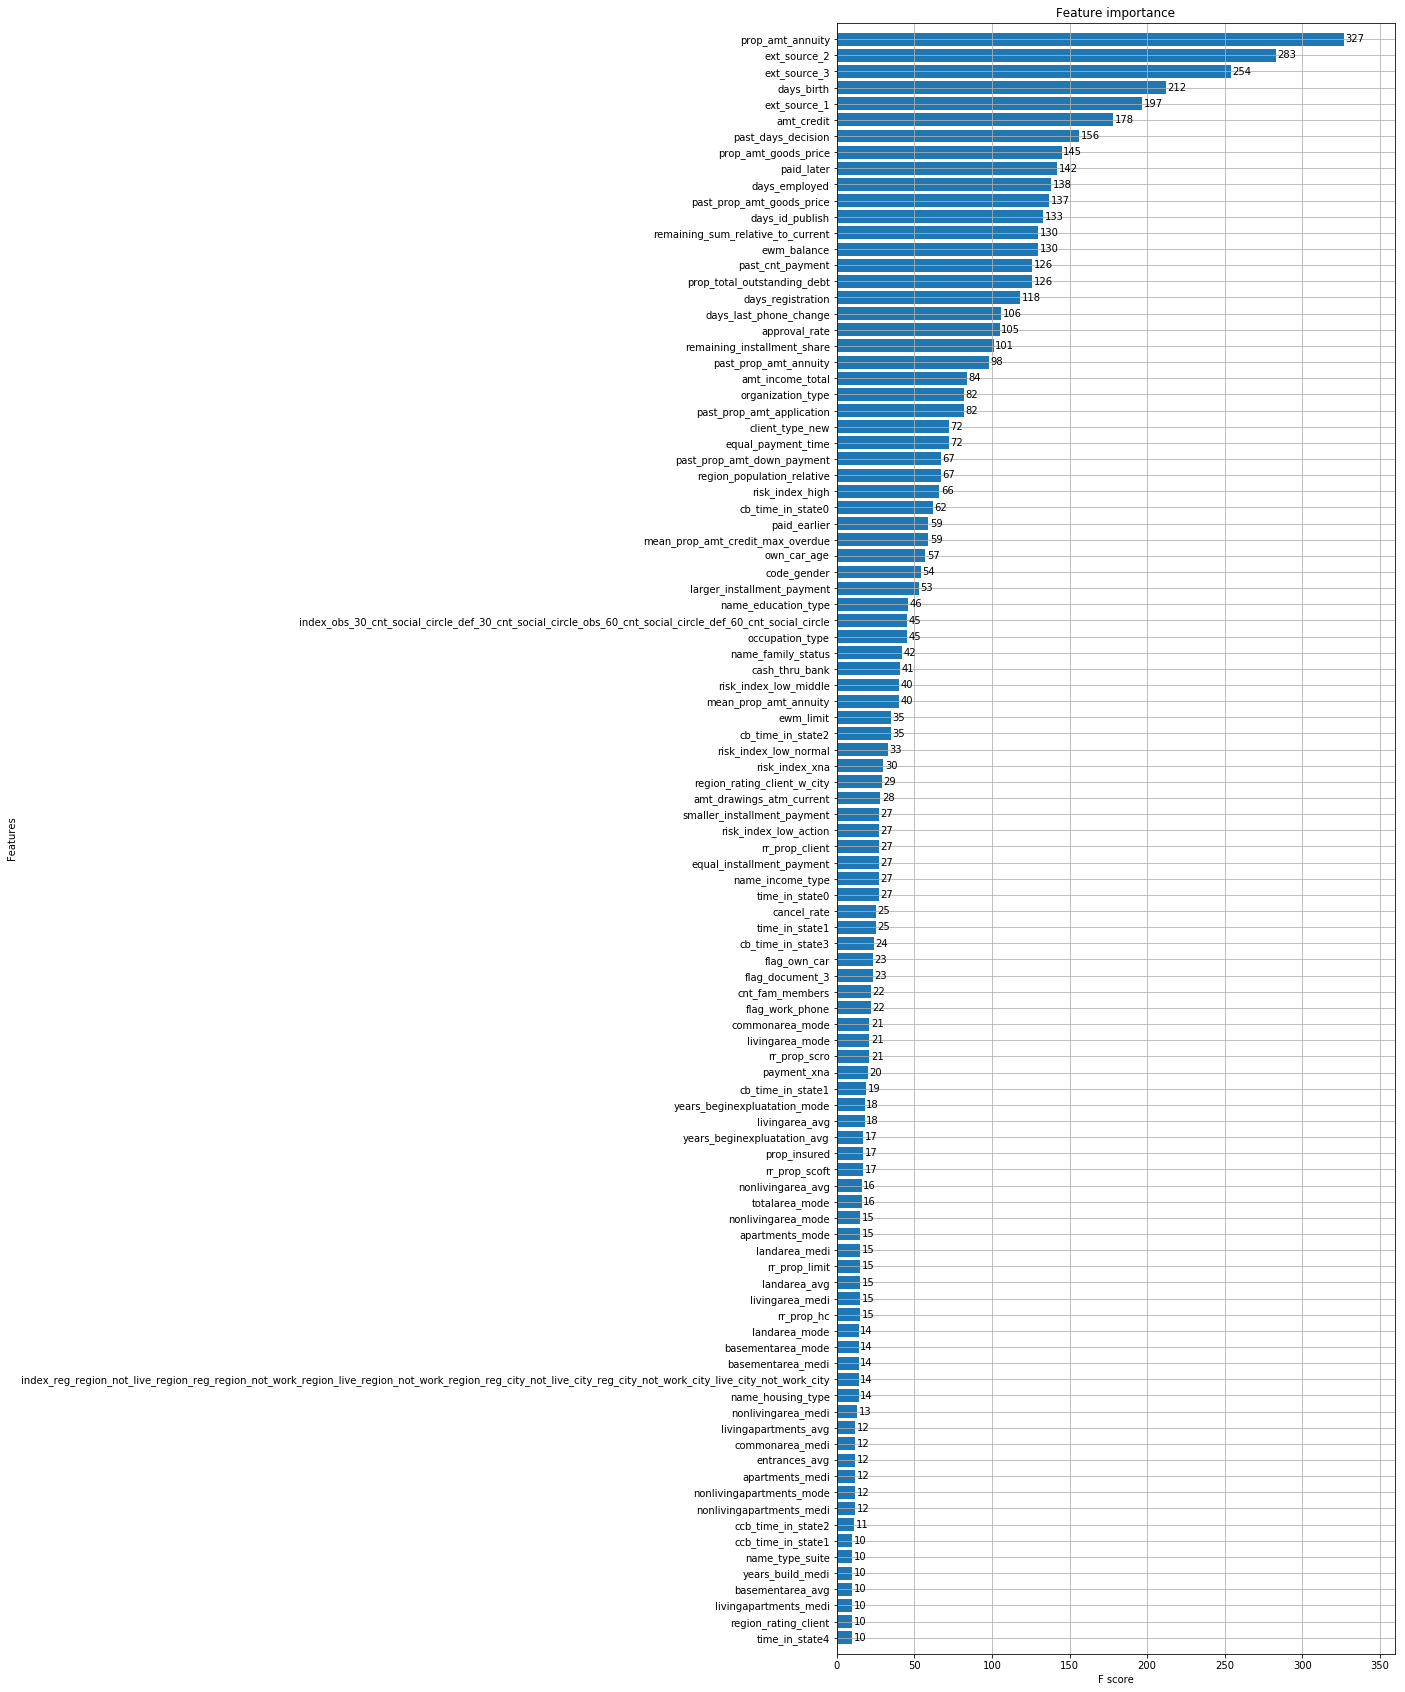

In [6]:
predictors = list(set(get_features_by_type(feature_dict,'all')[0]))

target = 'TARGET'
rcParams['figure.figsize'] = 10, 30

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=200,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=10,
 scale_pos_weight=1,
 silent = False,
 seed=27)

alg = modelfit_w_test(xgb1,
         df.filter(items=train_idx,axis=0),
         df.filter(items=val_idx,axis=0),predictors)    

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy         : 0.9244
Precision        : 0.8268
Recall           : 0.08051
AUC Score (Train): 0.867460




/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy        : 0.9197
Precision       : 0.5335
Recall          : 0.04108
AUC Score (Test): 0.780181


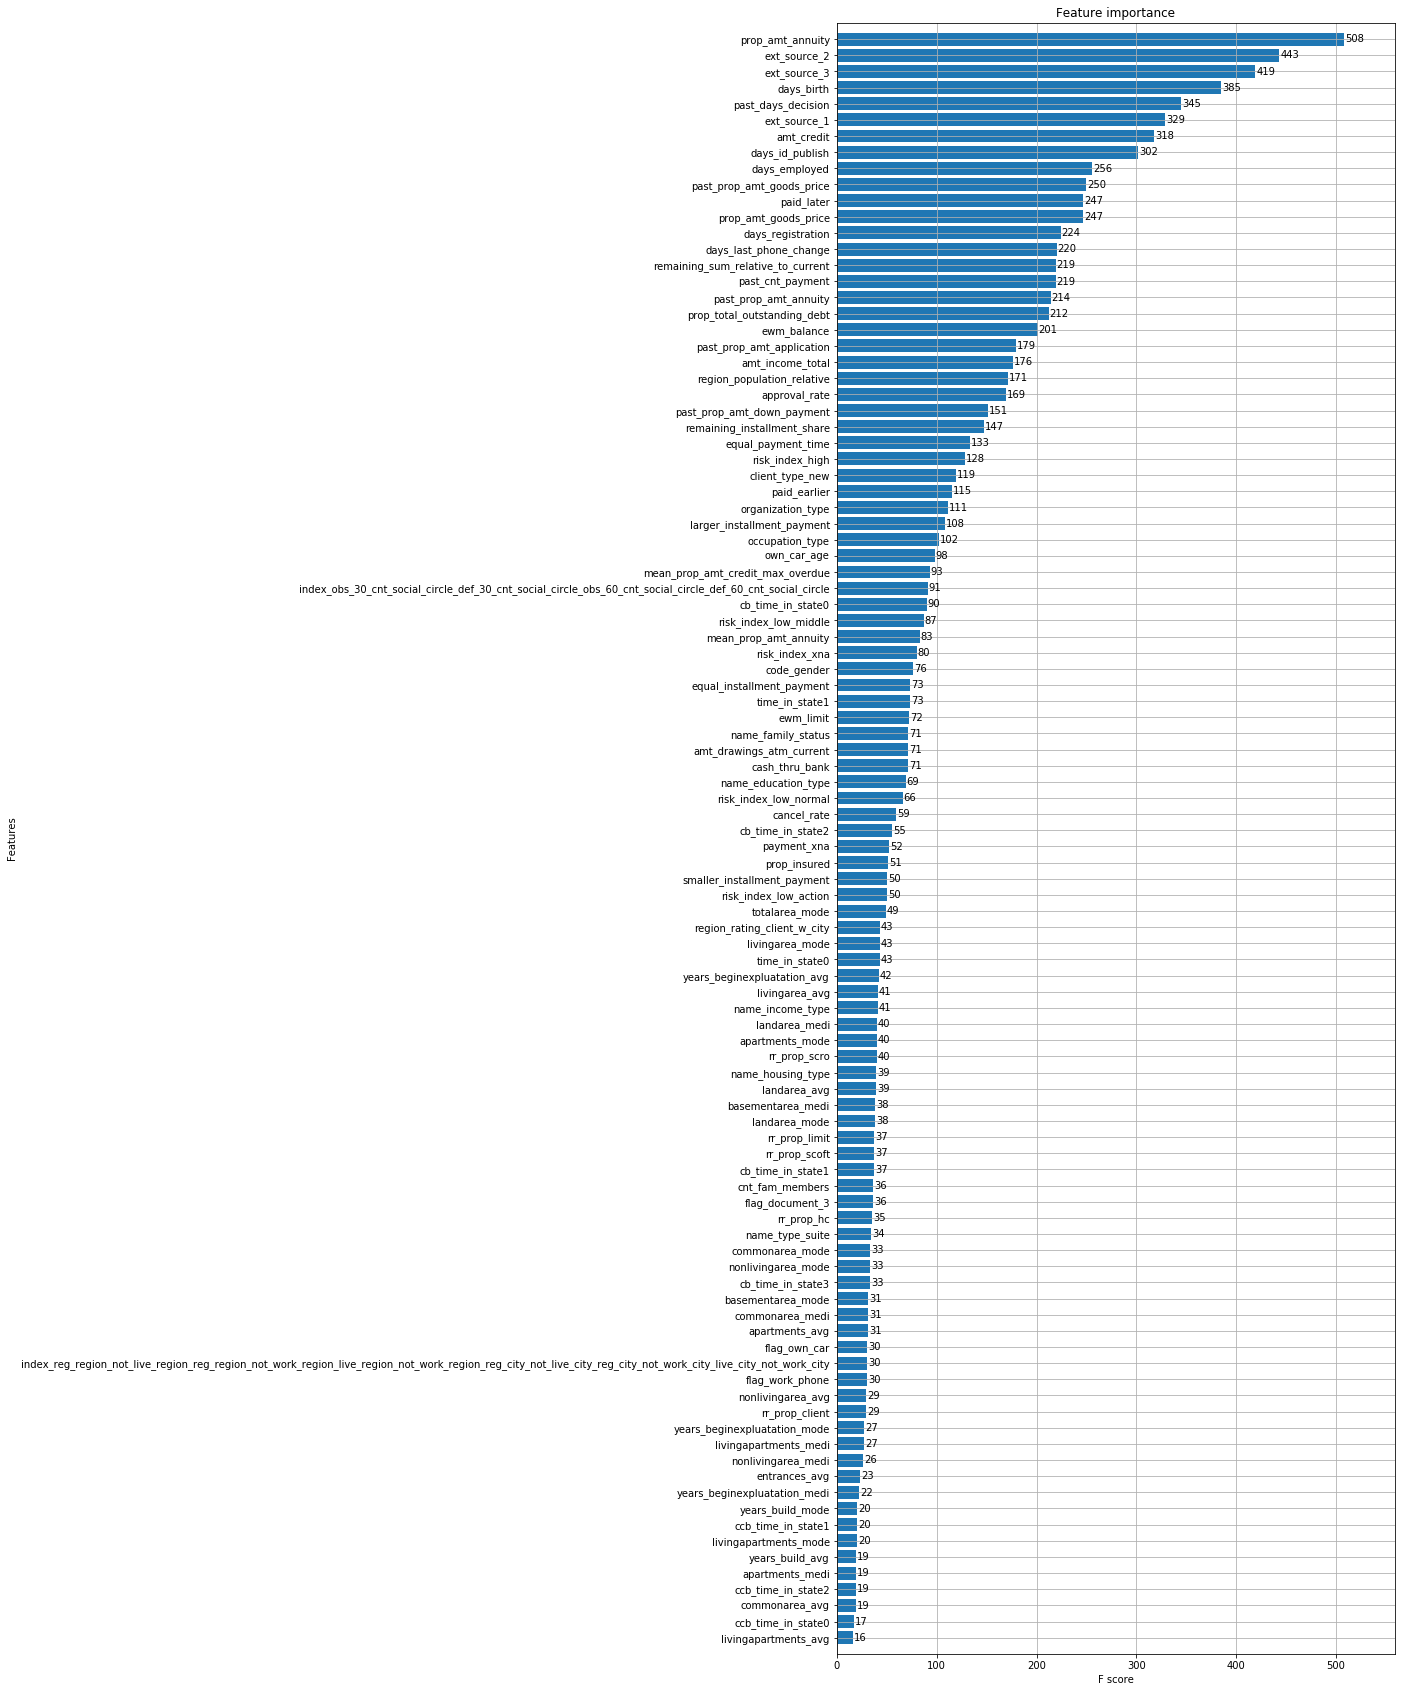

In [8]:
predictors = list(set(get_features_by_type(feature_dict,'all')[0]))

target = 'TARGET'
rcParams['figure.figsize'] = 10, 30

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=200,
 max_depth=6,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=10,
 scale_pos_weight=1,
 silent = False,
 seed=27)

alg = modelfit_w_test(xgb1,
         df.filter(items=train_idx,axis=0),
         df.filter(items=val_idx,axis=0),predictors)    

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy         : 0.9224
Precision        : 0.7421
Recall           : 0.05935
AUC Score (Train): 0.835940




/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy        : 0.9196
Precision       : 0.5277
Recall          : 0.03995
AUC Score (Test): 0.780267


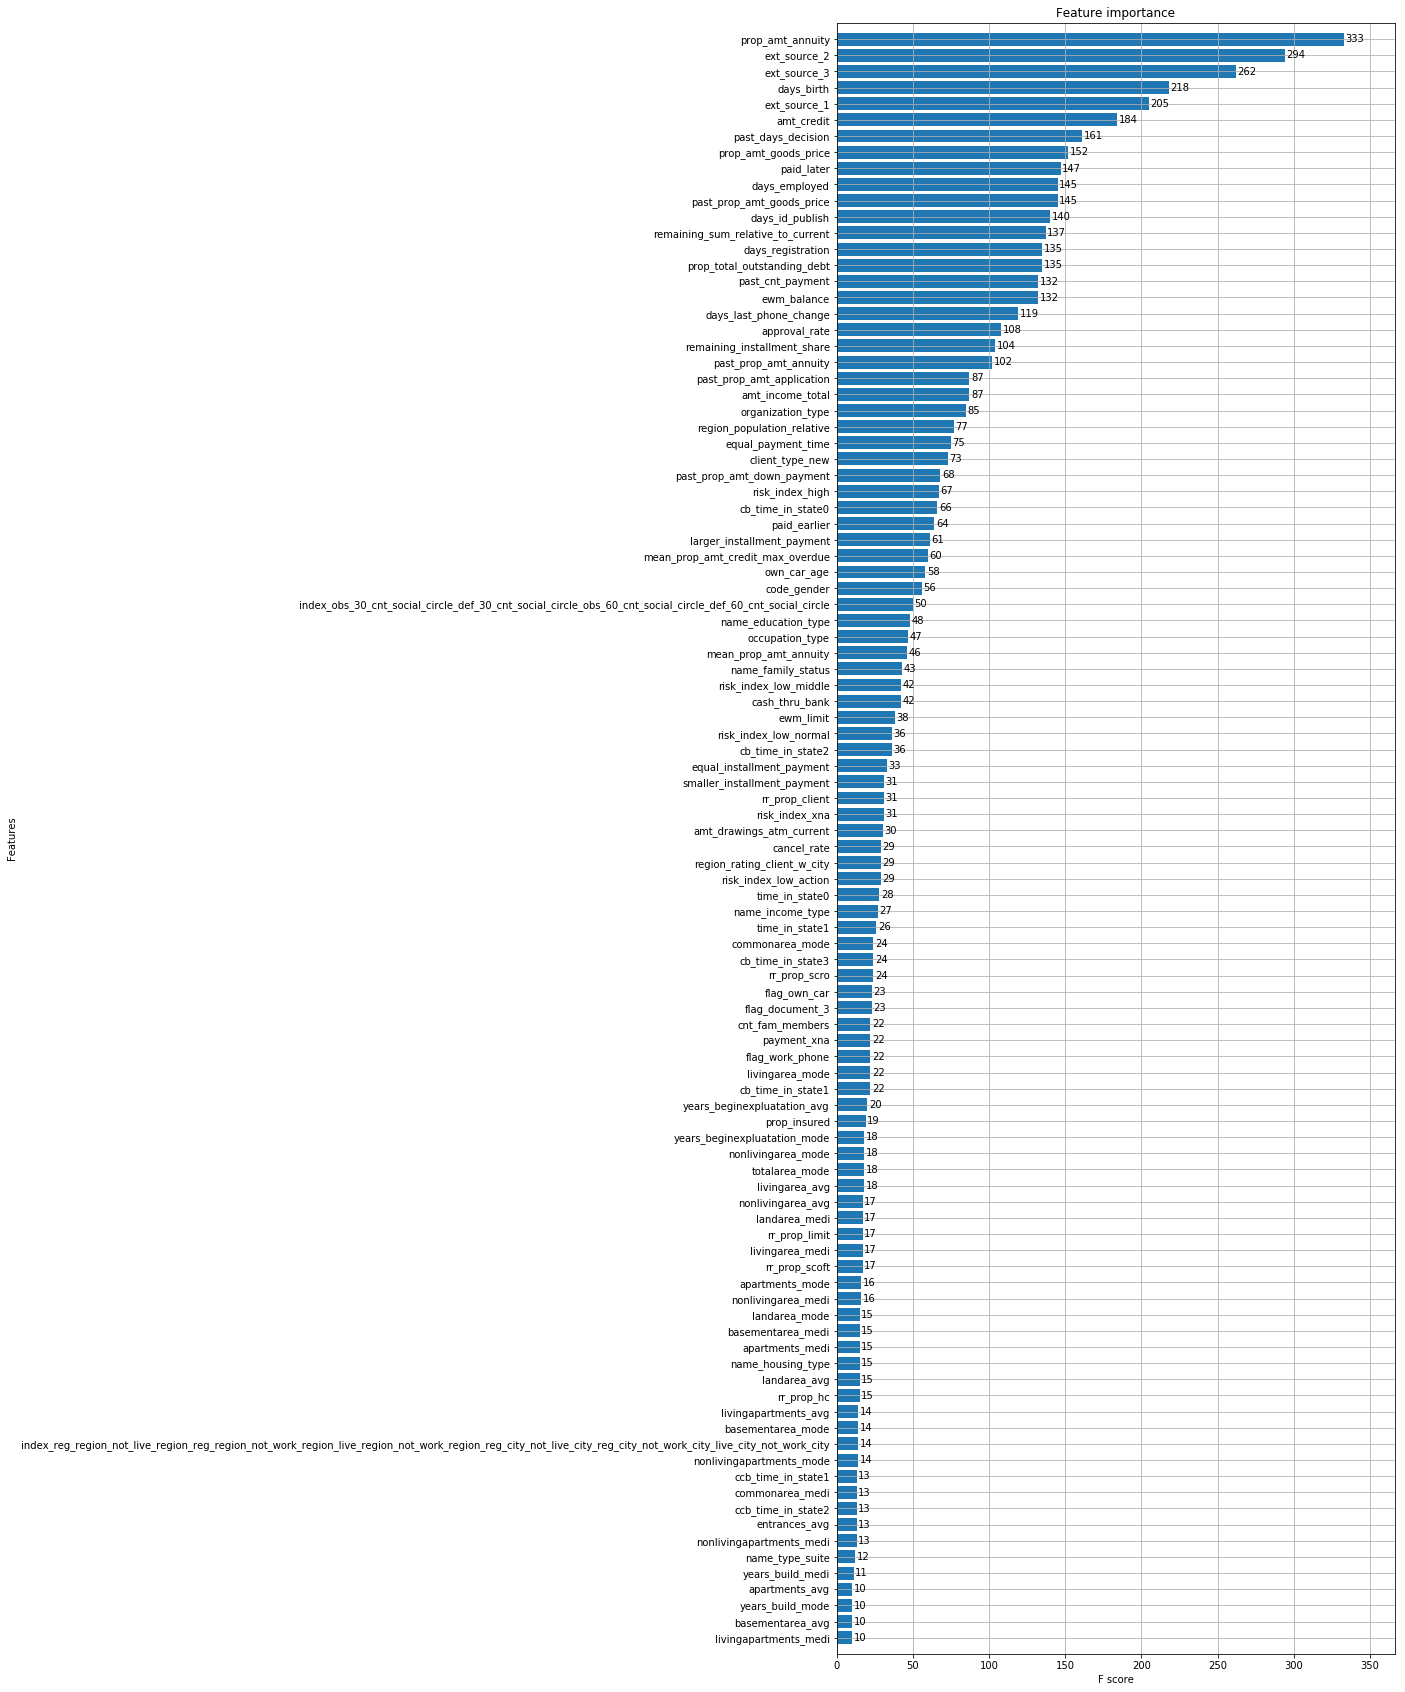

In [9]:
predictors = list(set(get_features_by_type(feature_dict,'all')[0]))

target = 'TARGET'
rcParams['figure.figsize'] = 10, 30

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=500,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=10,
 scale_pos_weight=1,
 silent = False,
 seed=27)

alg = modelfit_w_test(xgb1,
         df.filter(items=train_idx,axis=0),
         df.filter(items=val_idx,axis=0),predictors)    

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy         : 0.9209
Precision        : 0.6667
Recall           : 0.04136
AUC Score (Train): 0.809300




/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy        : 0.9193
Precision       : 0.5053
Recall          : 0.03093
AUC Score (Test): 0.779456


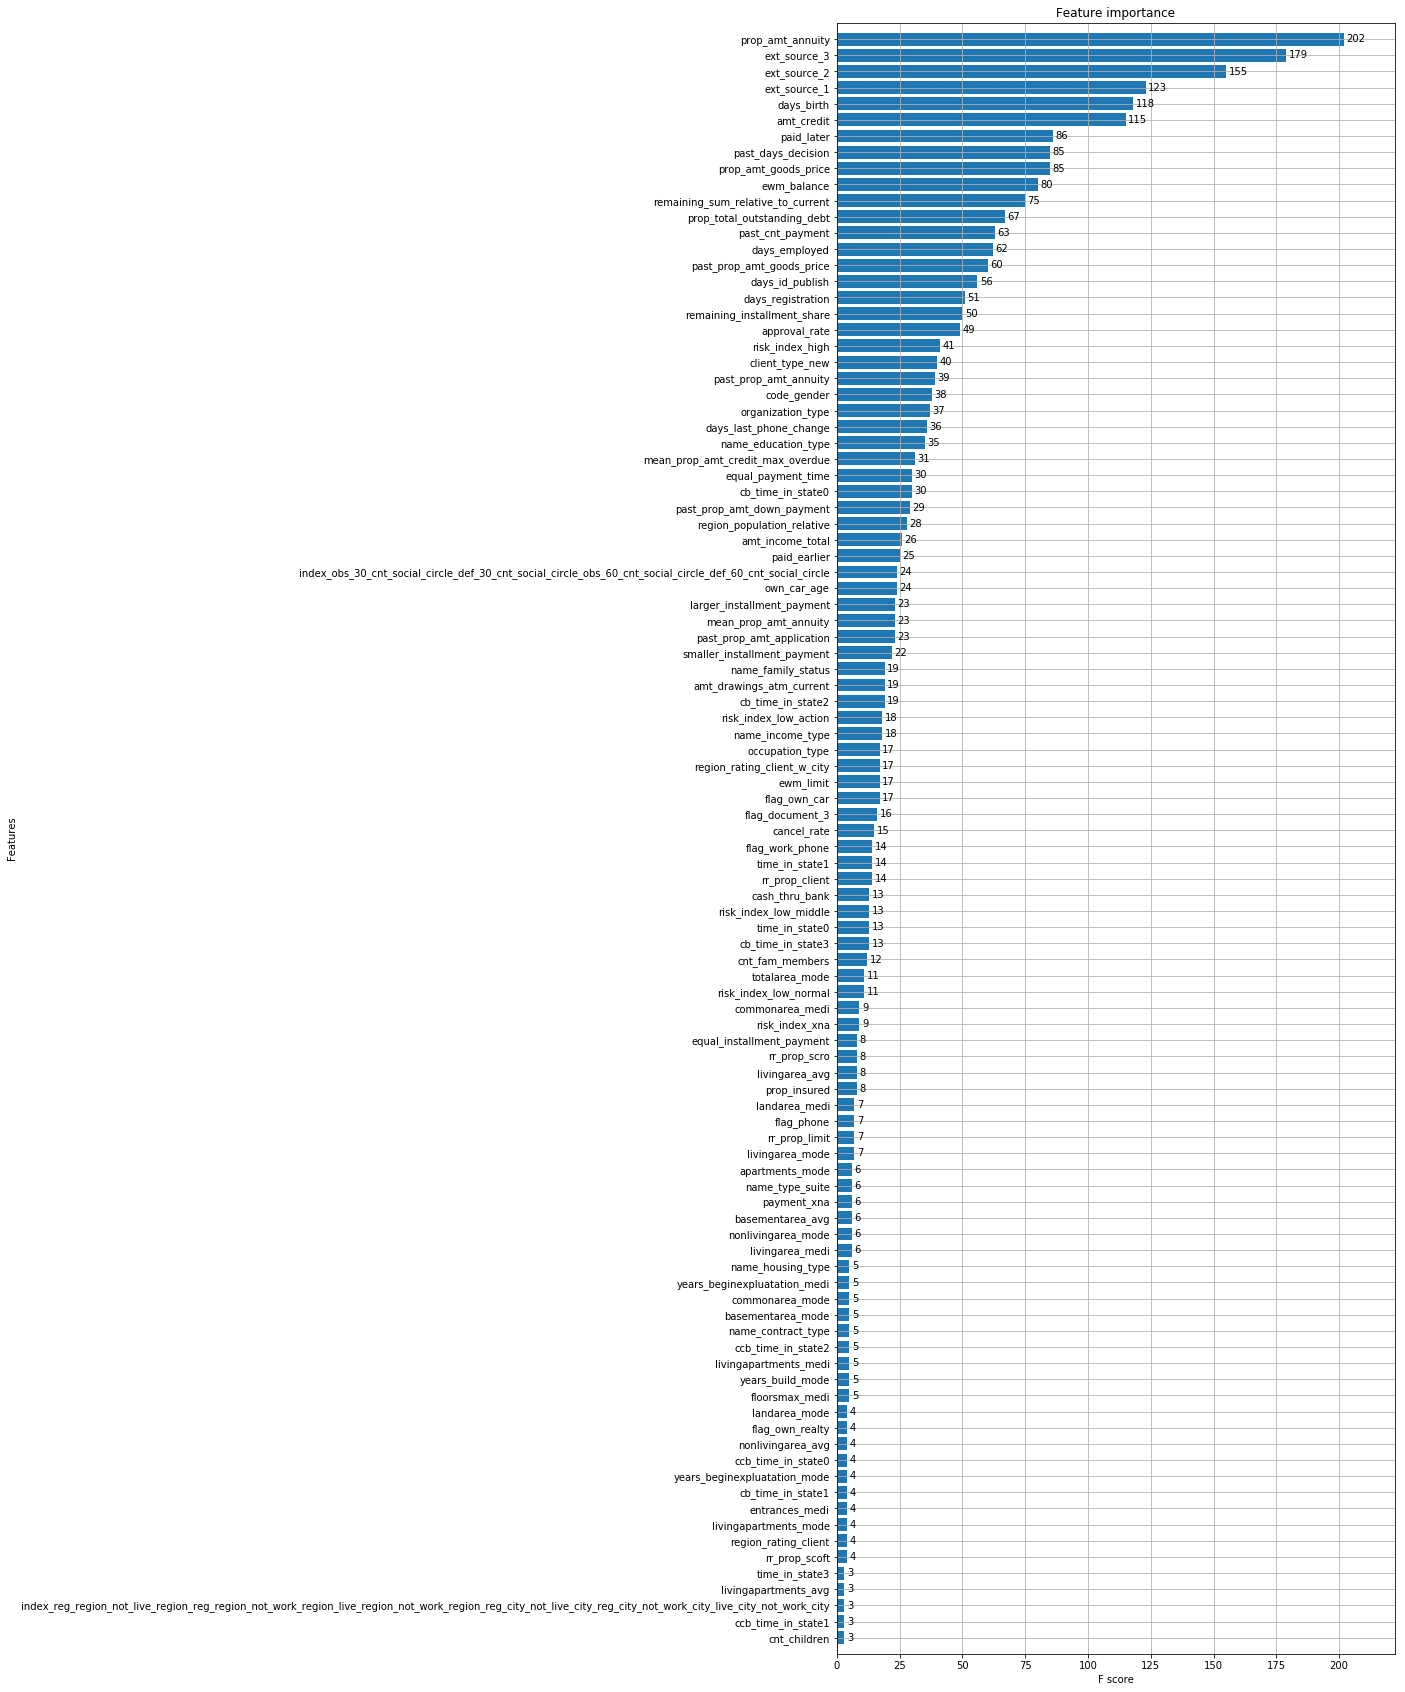

In [10]:
predictors = list(set(get_features_by_type(feature_dict,'all')[0]))

target = 'TARGET'
rcParams['figure.figsize'] = 10, 30

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=200,
 max_depth=4,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=10,
 scale_pos_weight=1,
 silent = False,
 seed=27)

alg = modelfit_w_test(xgb1,
         df.filter(items=train_idx,axis=0),
         df.filter(items=val_idx,axis=0),predictors)    

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy         : 0.9202
Precision        : 0.6358
Recall           : 0.02691
AUC Score (Train): 0.790088




/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy        : 0.9195
Precision       : 0.5348
Recall          : 0.02352
AUC Score (Test): 0.775732


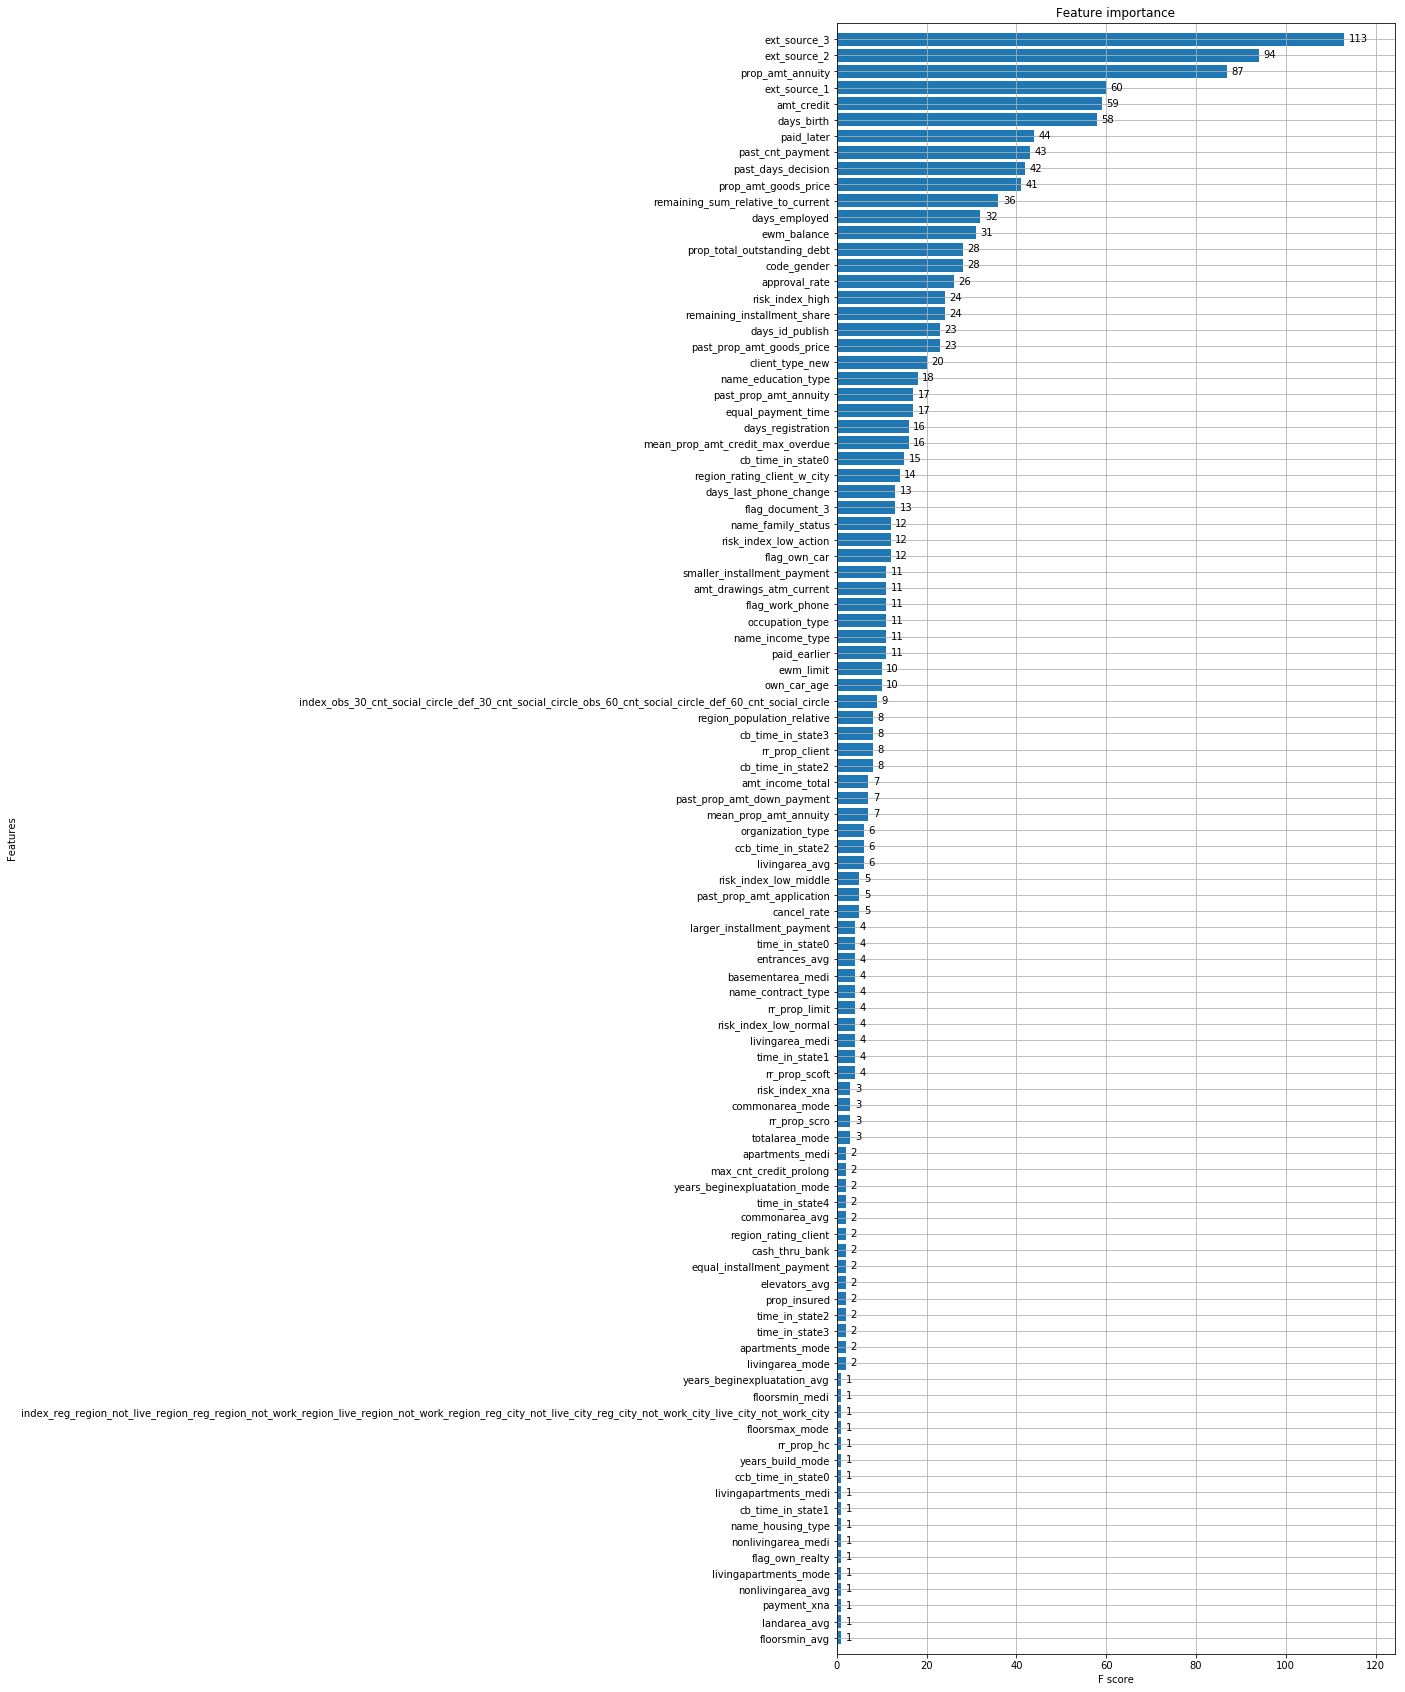

In [11]:
predictors = list(set(get_features_by_type(feature_dict,'all')[0]))

target = 'TARGET'
rcParams['figure.figsize'] = 10, 30

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=200,
 max_depth=3,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=10,
 scale_pos_weight=1,
 silent = False,
 seed=27)

alg = modelfit_w_test(xgb1,
         df.filter(items=train_idx,axis=0),
         df.filter(items=val_idx,axis=0),predictors)    

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy         : 0.9213
Precision        : 0.6674
Recall           : 0.05086
AUC Score (Train): 0.814329




/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy        : 0.9193
Precision       : 0.5
Recall          : 0.03915
AUC Score (Test): 0.780903


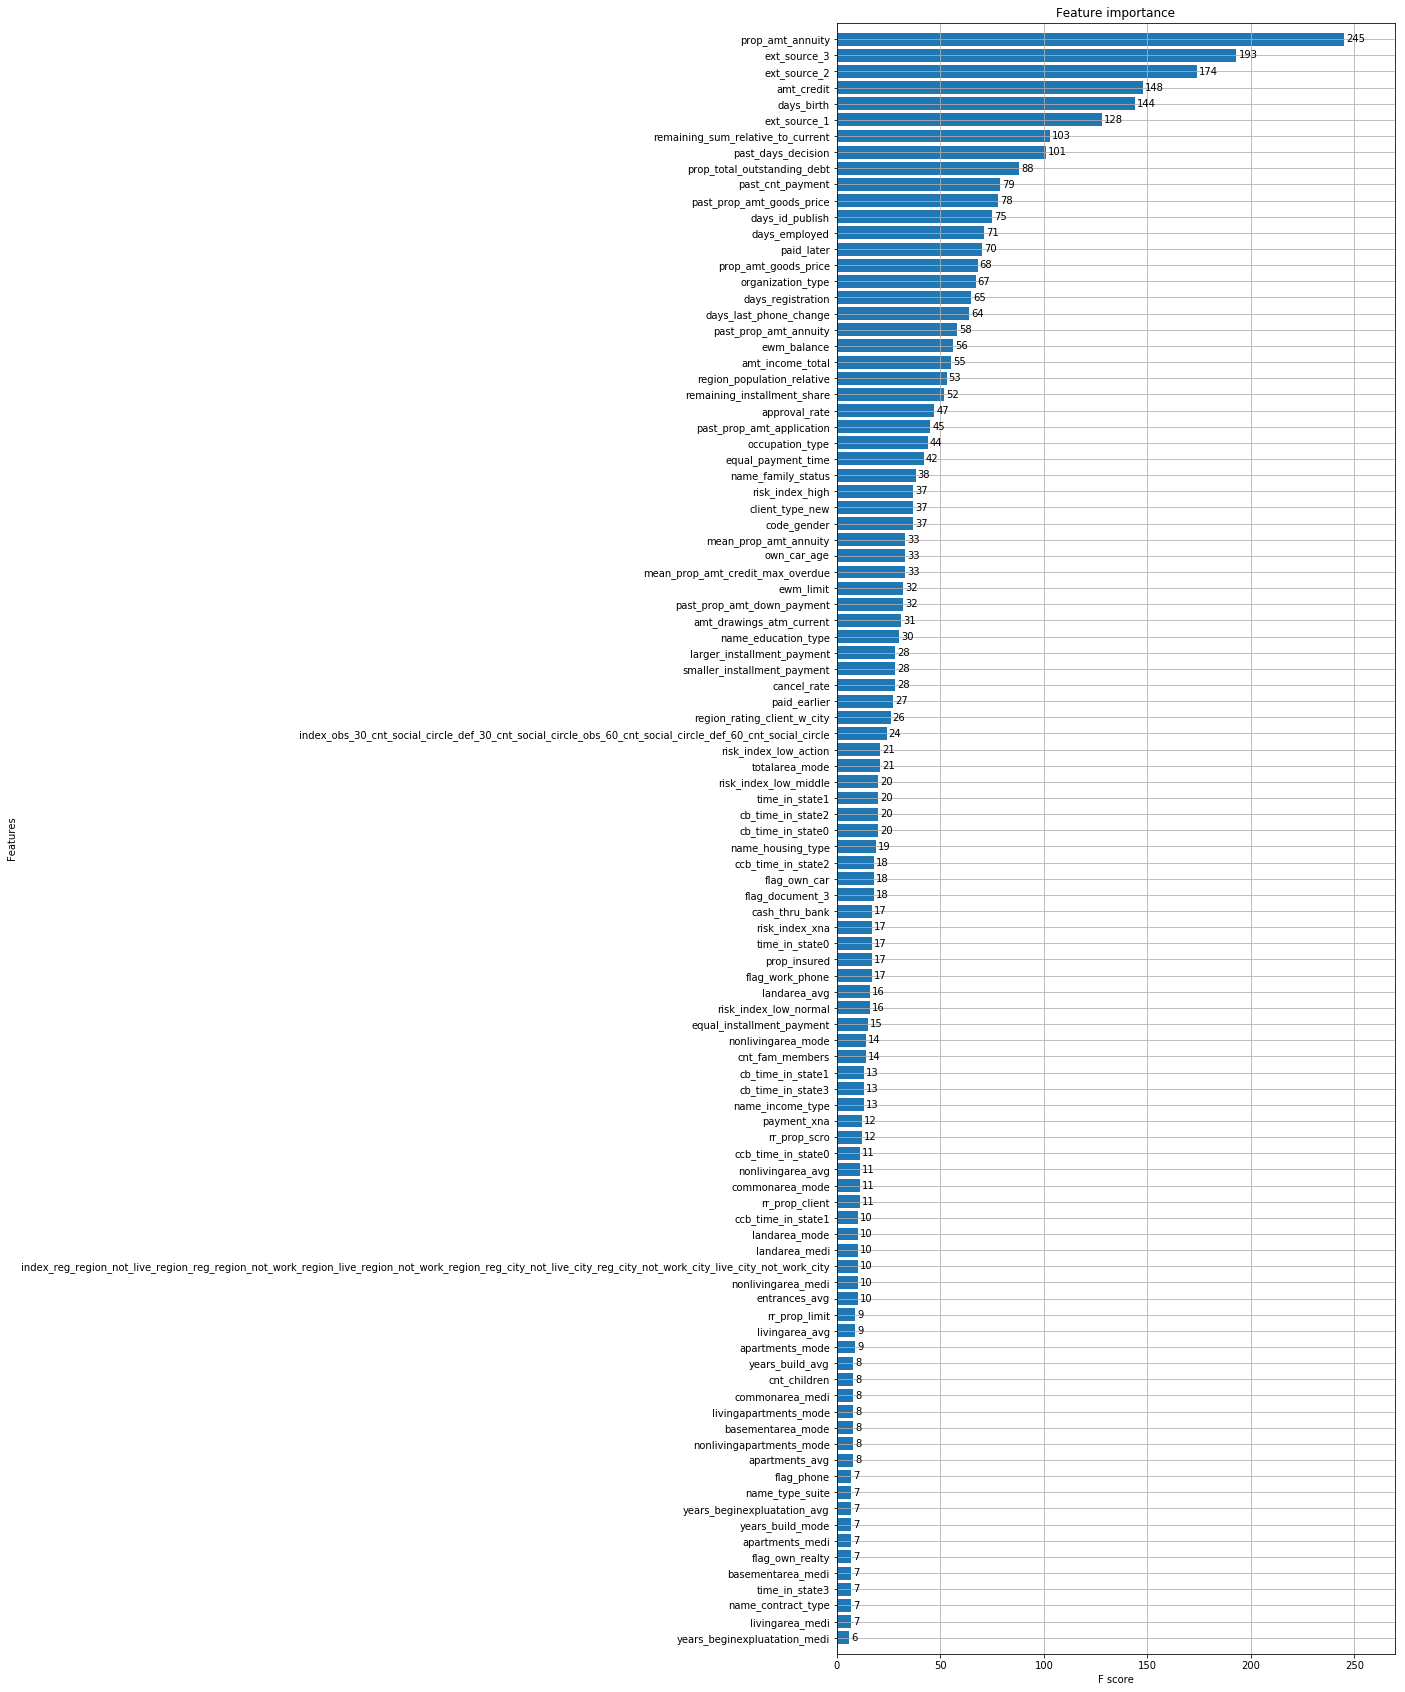

In [12]:
predictors = list(set(get_features_by_type(feature_dict,'all')[0]))

target = 'TARGET'
rcParams['figure.figsize'] = 10, 30

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=10,
 scale_pos_weight=1,
 silent = False,
 seed=27)

alg = modelfit_w_test(xgb1,
         df.filter(items=train_idx,axis=0),
         df.filter(items=val_idx,axis=0),predictors)    

In [ ]:
predictors = list(set(get_features_by_type(feature_dict,'all')[0]))

target = 'TARGET'
rcParams['figure.figsize'] = 10, 30

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=10,
 scale_pos_weight=1,
 silent = False,
 seed=27)

alg = modelfit_w_test(xgb1,
         df.filter(items=train_idx,axis=0),
         df.filter(items=val_idx,axis=0),predictors)    

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy         : 0.9241
Precision        : 0.8188
Recall           : 0.07643
AUC Score (Train): 0.862203




/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy        : 0.9195
Precision       : 0.5167
Recall          : 0.03995
AUC Score (Test): 0.779802


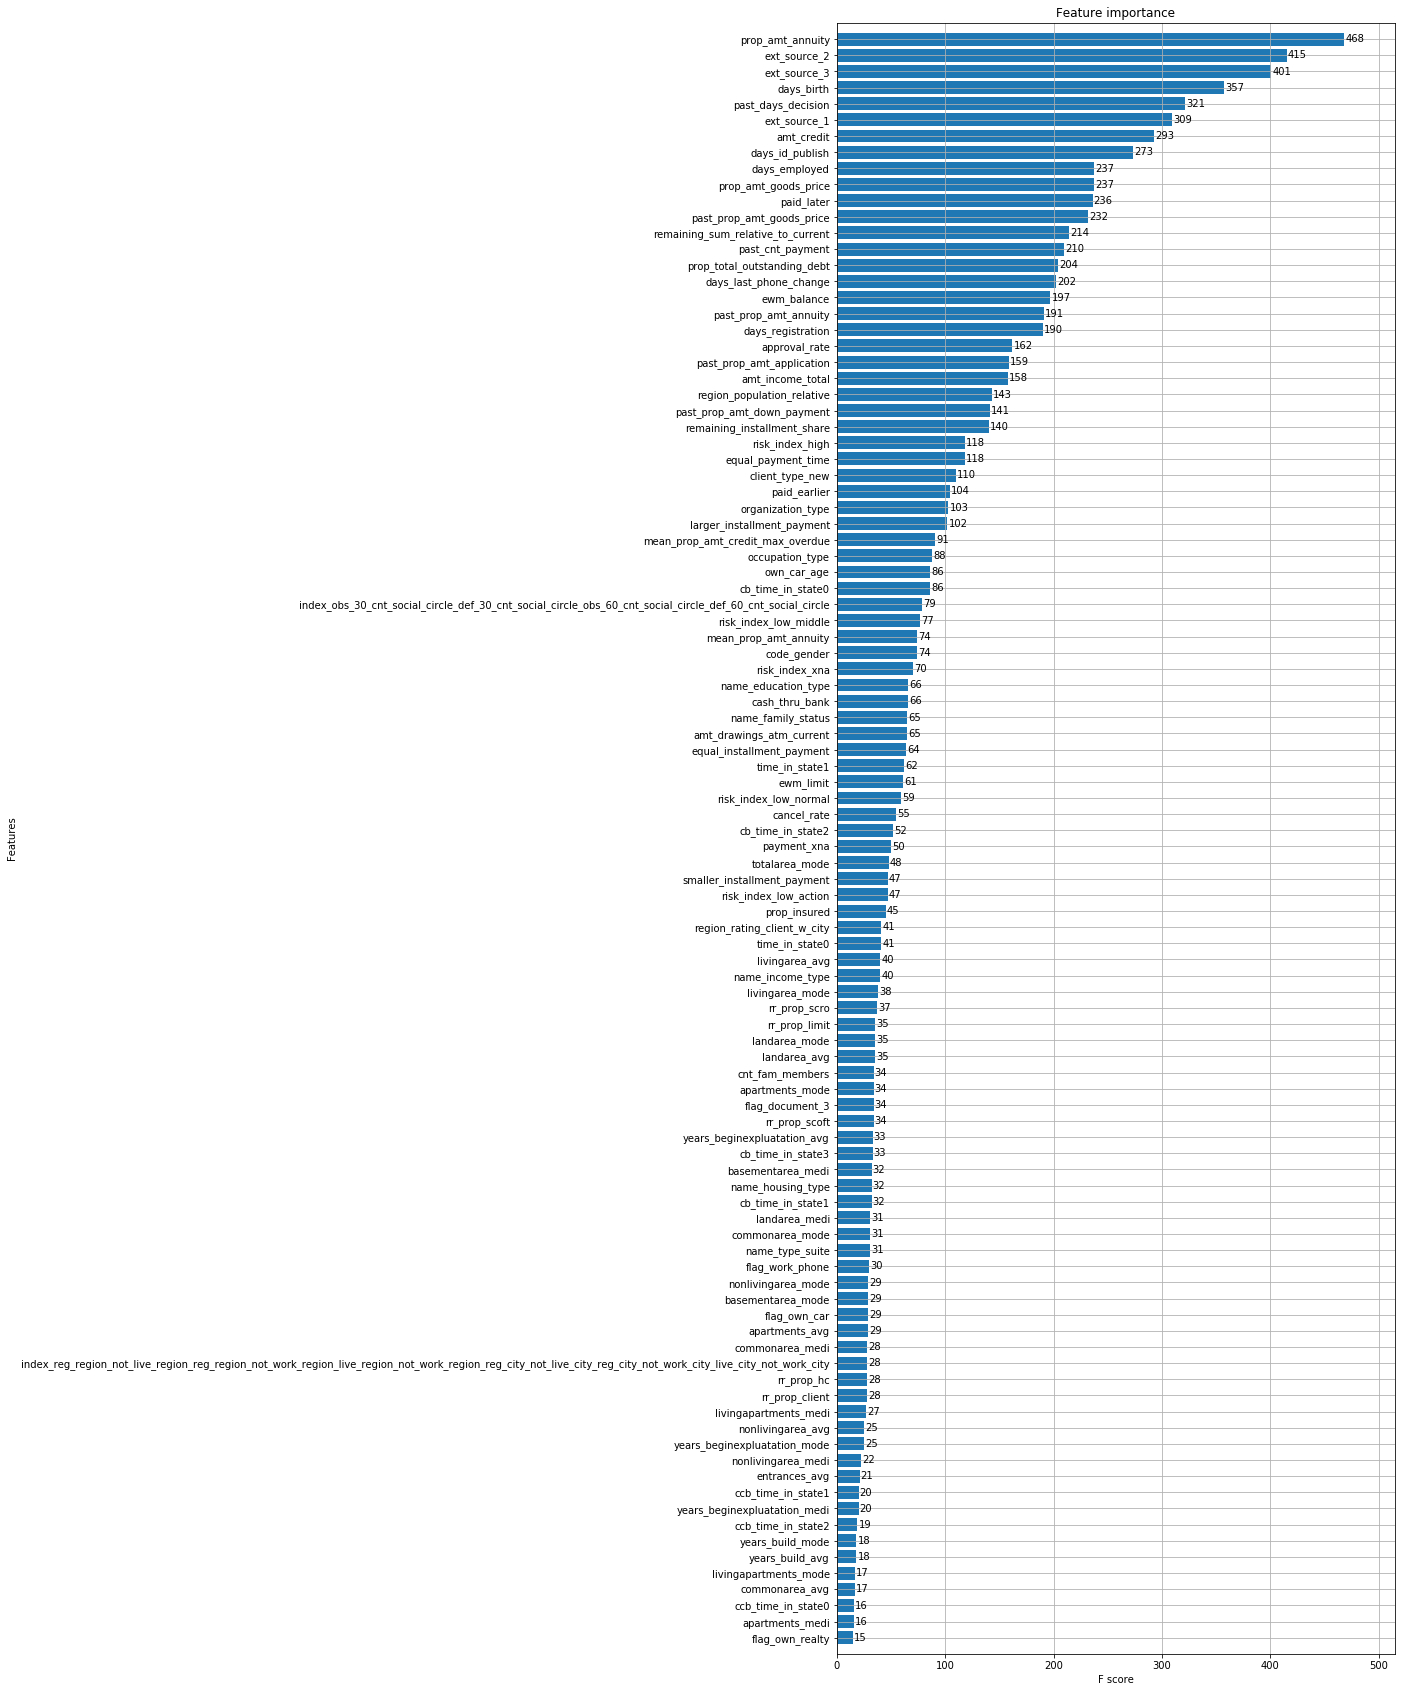

In [13]:
predictors = list(set(get_features_by_type(feature_dict,'all')[0]))

target = 'TARGET'
rcParams['figure.figsize'] = 10, 30

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=6,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=10,
 scale_pos_weight=1,
 silent = False,
 seed=27)

alg = modelfit_w_test(xgb1,
         df.filter(items=train_idx,axis=0),
         df.filter(items=val_idx,axis=0),predictors)    

In [15]:
param_test1

{'max_depth': range(3, 10, 2), 'min_child_weight': range(1, 6, 2)}

In [18]:
from sklearn.grid_search import GridSearchCV   #Perforing grid search

# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

param_test1 = {
    'max_depth':[3,5,6],
    'min_child_weight':[1,4,5,6]
    }

gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1,
                                                  n_estimators=200,
                                                  max_depth=5,
                                                  min_child_weight=1,
                                                  gamma=0,
                                                  subsample=0.8,
                                                  colsample_bytree=0.8,
                                                  objective= 'binary:logistic',
                                                  nthread=4,
                                                  scale_pos_weight=1,
                                                  seed=27), 
                     param_grid = param_test1,
                     scoring='roc_auc',
                     n_jobs=4,
                     iid=False,
                     cv=5)

gsearch1.fit(df.filter(items=train_idx,axis=0)[predictors],df.filter(items=train_idx,axis=0)['TARGET'])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.77380, std: 0.00322, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.77383, std: 0.00303, params: {'max_depth': 3, 'min_child_weight': 4},
  mean: 0.77380, std: 0.00301, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.77393, std: 0.00292, params: {'max_depth': 3, 'min_child_weight': 6},
  mean: 0.77716, std: 0.00276, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.77750, std: 0.00322, params: {'max_depth': 5, 'min_child_weight': 4},
  mean: 0.77728, std: 0.00299, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.77775, std: 0.00301, params: {'max_depth': 5, 'min_child_weight': 6},
  mean: 0.77560, std: 0.00327, params: {'max_depth': 6, 'min_child_weight': 1},
  mean: 0.77650, std: 0.00282, params: {'max_depth': 6, 'min_child_weight': 4},
  mean: 0.77634, std: 0.00273, params: {'max_depth': 6, 'min_child_weight': 5},
  mean: 0.77720, std: 0.00262, params: {'max_depth': 6, 'min_child_weight': 6}],
 {'max_depth': 5, 'min_child_weight': 6

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy         : 0.9214
Precision        : 0.6614
Recall           : 0.05425
AUC Score (Train): 0.817117




/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy        : 0.9193
Precision       : 0.5048
Recall          : 0.04221
AUC Score (Test): 0.782037


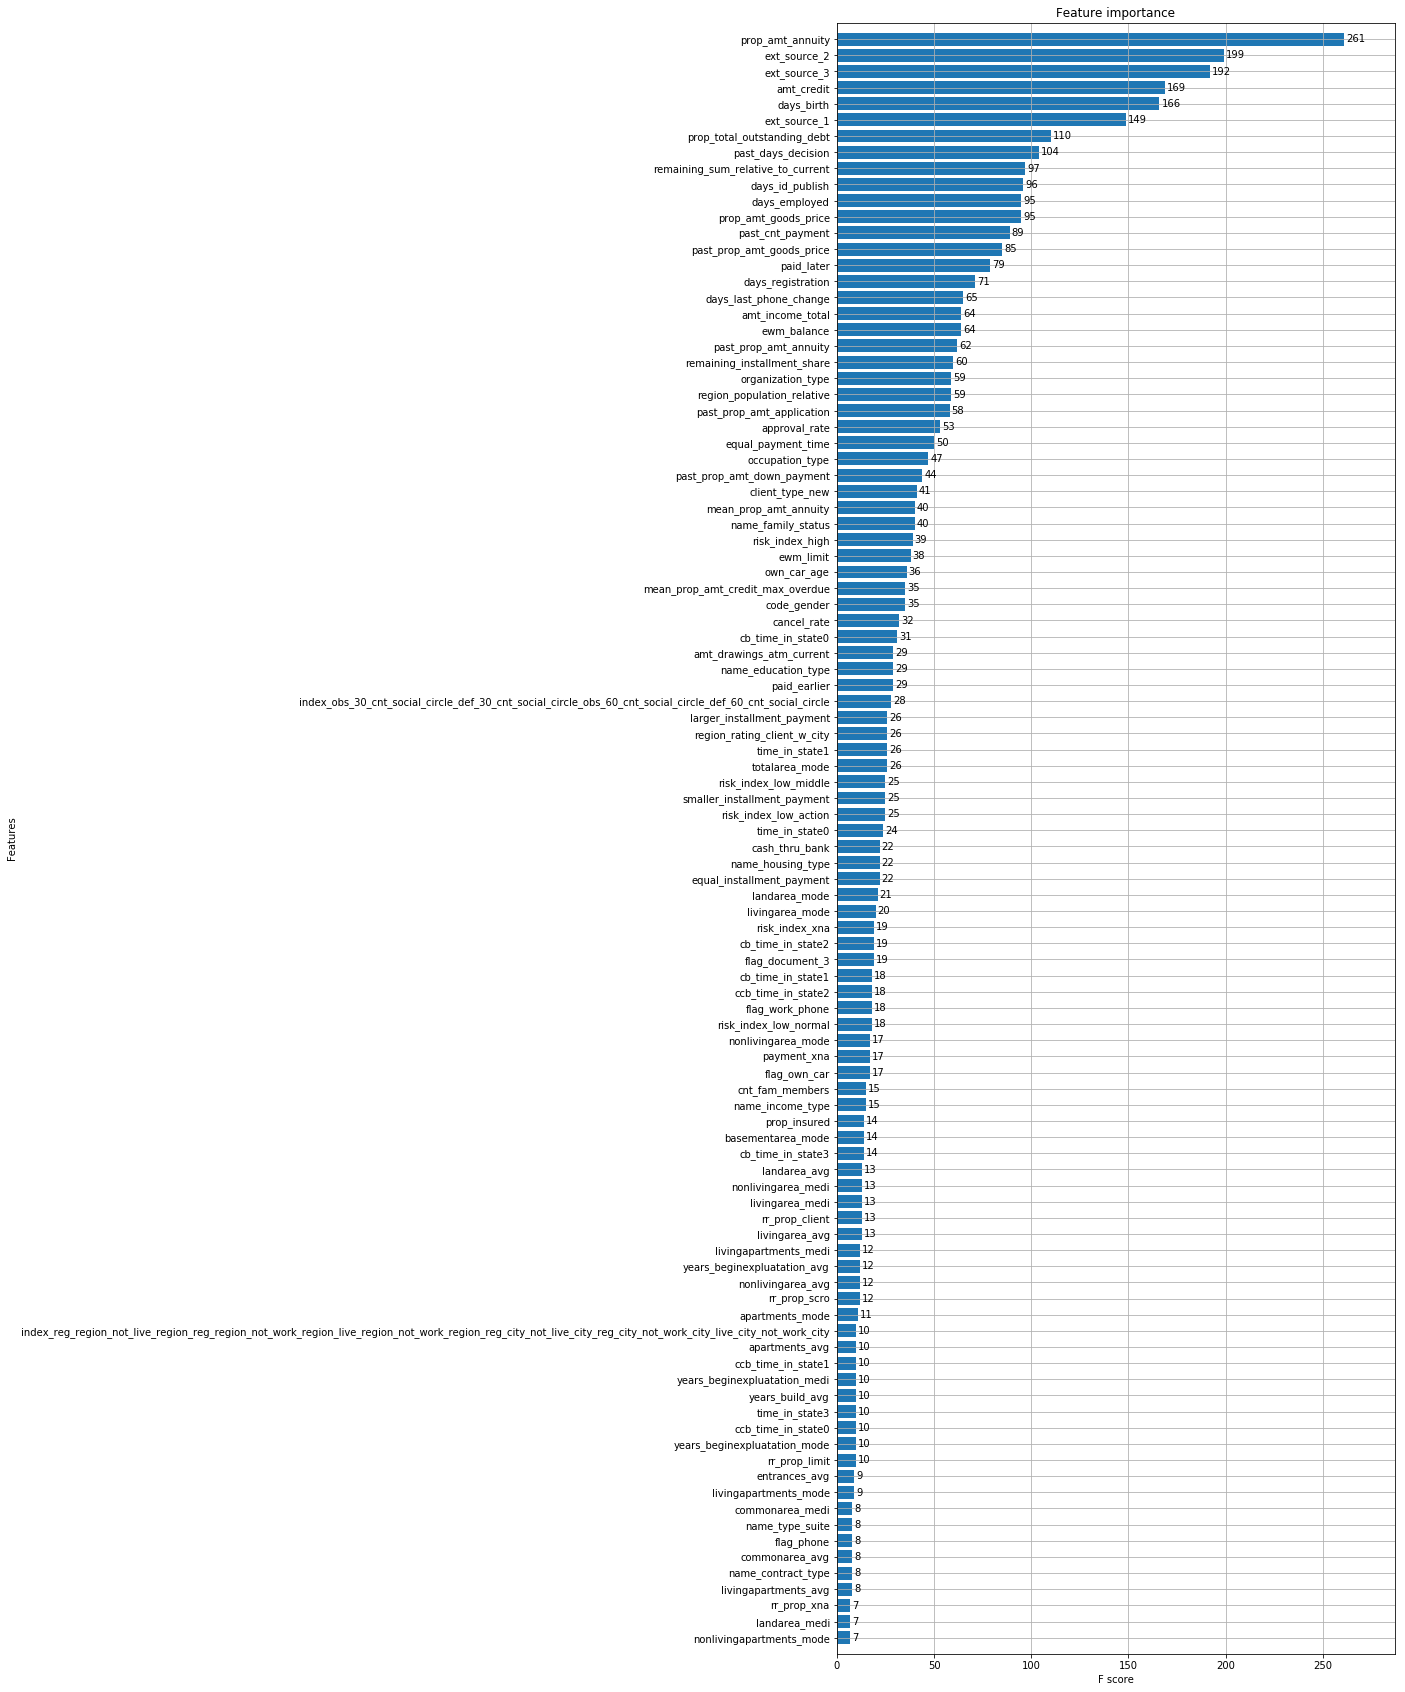

In [19]:
predictors = list(set(get_features_by_type(feature_dict,'all')[0]))

target = 'TARGET'
rcParams['figure.figsize'] = 10, 30

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=10,
 scale_pos_weight=1,
 silent = False,
 seed=27)

alg = modelfit_w_test(xgb1,
         df.filter(items=train_idx,axis=0),
         df.filter(items=val_idx,axis=0),predictors)    

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy         : 0.9212
Precision        : 0.6505
Recall           : 0.05178
AUC Score (Train): 0.813703




/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy        : 0.9193
Precision       : 0.504
Recall          : 0.04092
AUC Score (Test): 0.781593


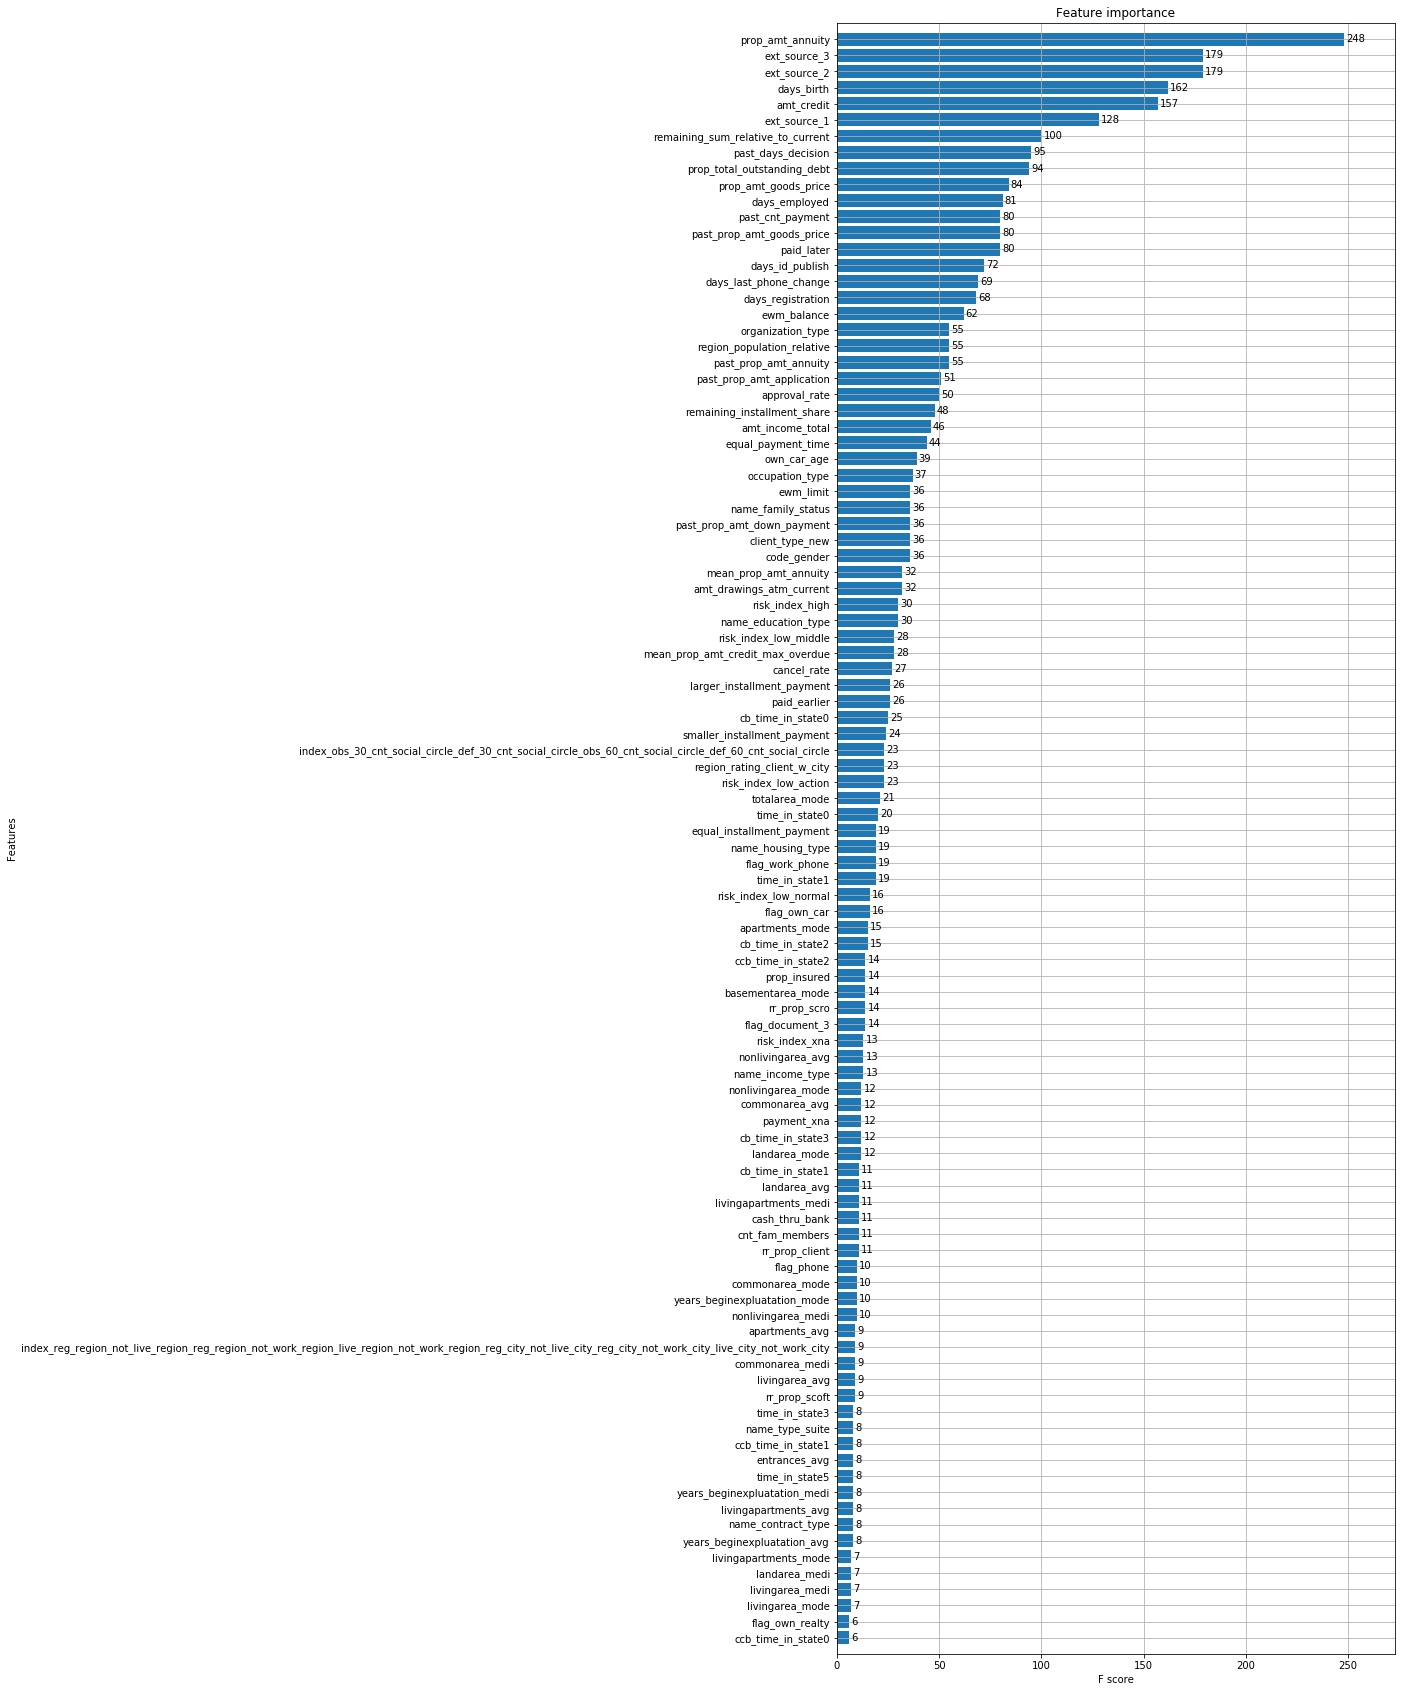

In [21]:
predictors = list(set(get_features_by_type(feature_dict,'all')[0]))

target = 'TARGET'
rcParams['figure.figsize'] = 10, 30

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=10,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=10,
 scale_pos_weight=1,
 silent = False,
 seed=27)

alg = modelfit_w_test(xgb1,
         df.filter(items=train_idx,axis=0),
         df.filter(items=val_idx,axis=0),predictors)    

### Try various feature combinations

In [ ]:
'cbb_features',
'cb_features',
'pos_balance_features',
'ccb_features',
'a_pr_features',
'installments_features',

In [45]:
list(set(get_features_by_groups(feature_dict,'appl_region_wealth')[0]))

['region_rating_client_w_city',
 'region_rating_client',
 'region_population_relative']

In [48]:
groups = ['appl_loan_flags1', 'appl_circle_default_rates', 'appl_credit_metrics',
              'appl_credit_proportions', 'appl_ext_metrics_1','appl_social_markers1',
              'appl_misregion_features', 'appl_wealth_flags1', 'appl_social_flags1',
              'appl_dummies1', 'appl_id_expiry', 'appl_social_family2',
              'appl_indirect_wealth', 'appl_income_metrics', 'appl_region_wealth']

'appl_kyc1'

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy         : 0.9204
Precision        : 0.6329
Recall           : 0.03325
AUC Score (Train): 0.795991




/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy        : 0.9194
Precision       : 0.522
Recall          : 0.02674
AUC Score (Test): 0.766850


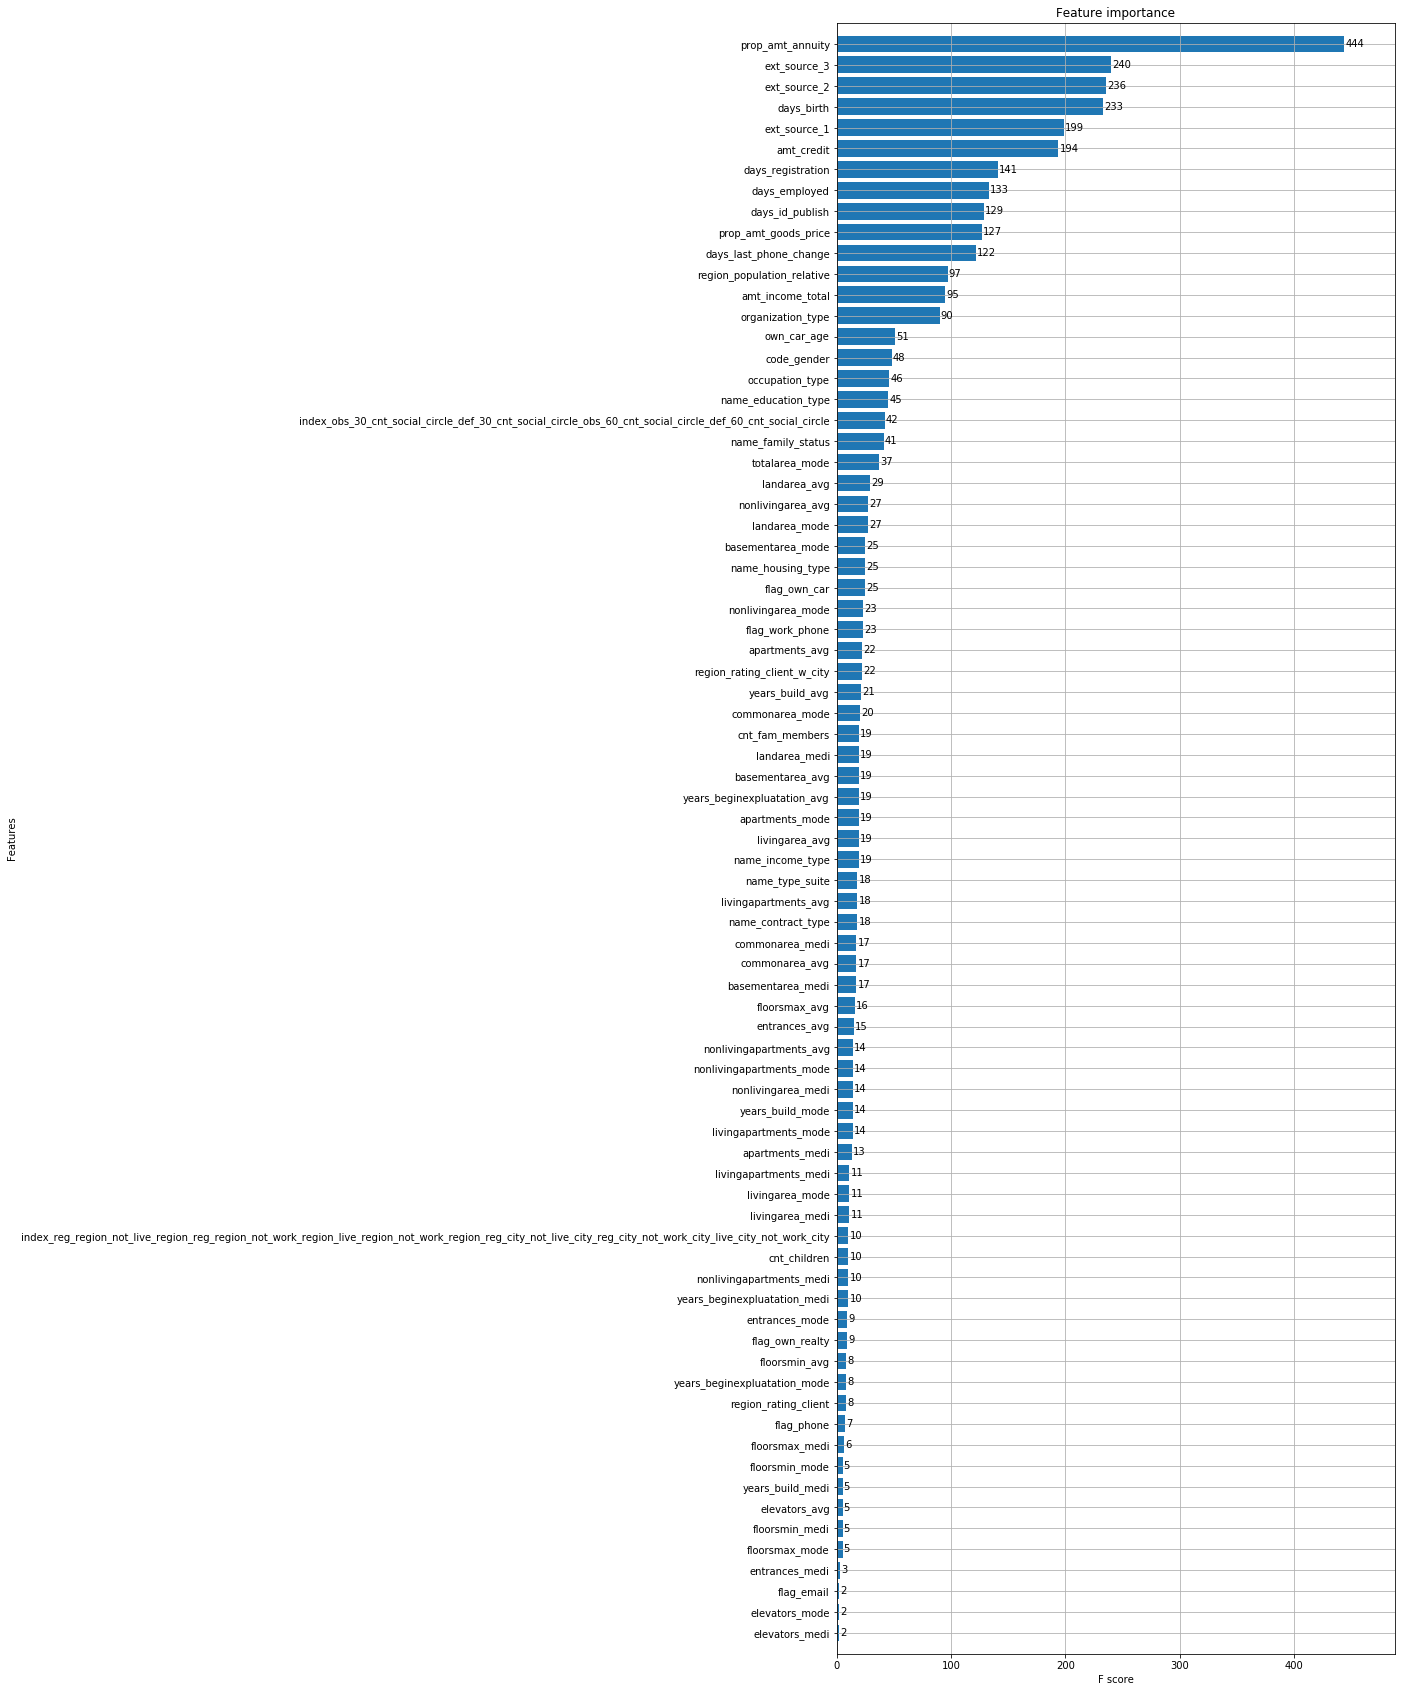

In [56]:
groups = ['appl_loan_flags1', 'appl_circle_default_rates', 'appl_credit_metrics',
              'appl_credit_proportions', 'appl_ext_metrics_1','appl_social_markers1',
              'appl_misregion_features', 'appl_wealth_flags1', 'appl_social_flags1',
              'appl_dummies1', 'appl_id_expiry', 'appl_social_family2',
              'appl_indirect_wealth', 'appl_income_metrics', 'appl_region_wealth']

predictors = list(set(get_features_by_groups(feature_dict,groups)[0]))

target = 'TARGET'
rcParams['figure.figsize'] = 10, 30

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=10,
 scale_pos_weight=1,
 silent = False,
 seed=27)

alg = modelfit_w_test(xgb1,
         df.filter(items=train_idx,axis=0),
         df.filter(items=val_idx,axis=0),predictors)    

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy         : 0.9205
Precision        : 0.6381
Recall           : 0.03475
AUC Score (Train): 0.795161




/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy        : 0.9196
Precision       : 0.5347
Recall          : 0.02981
AUC Score (Test): 0.769087


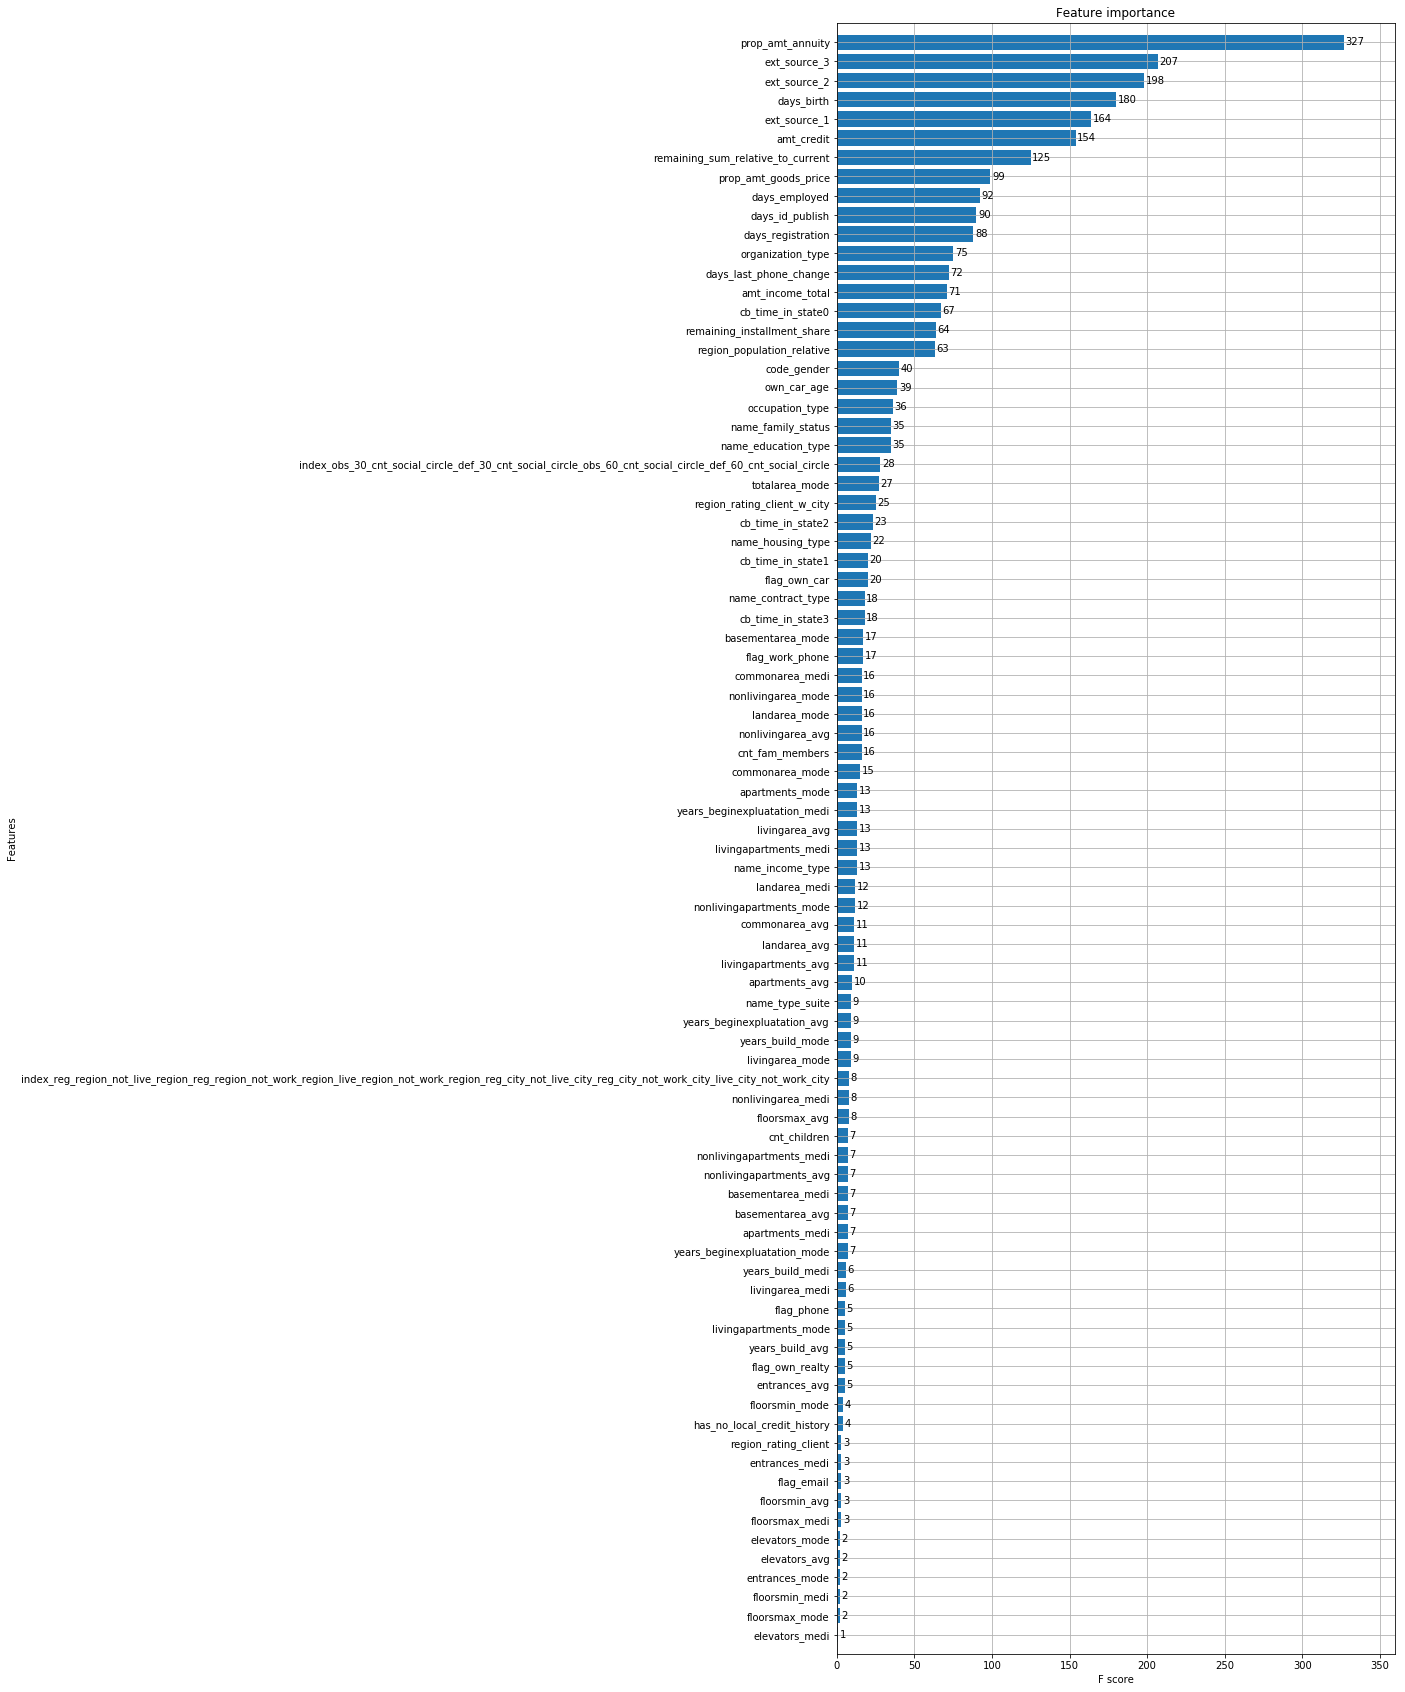

In [57]:
# pos balance
groups = ['appl_loan_flags1', 'appl_circle_default_rates', 'appl_credit_metrics',
              'appl_credit_proportions', 'appl_ext_metrics_1','appl_social_markers1',
              'appl_misregion_features', 'appl_wealth_flags1', 'appl_social_flags1',
              'appl_dummies1', 'appl_id_expiry', 'appl_social_family2',
              'appl_indirect_wealth', 'appl_income_metrics', 'appl_region_wealth'] + ['pos_balance_features']

predictors = list(set(get_features_by_groups(feature_dict,groups)[0]))

target = 'TARGET'
rcParams['figure.figsize'] = 10, 30

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=10,
 scale_pos_weight=1,
 silent = False,
 seed=27)

alg = modelfit_w_test(xgb1,
         df.filter(items=train_idx,axis=0),
         df.filter(items=val_idx,axis=0),predictors)    

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy         : 0.9203
Precision        : 0.6254
Recall           : 0.03201
AUC Score (Train): 0.793068




/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy        : 0.9197
Precision       : 0.5482
Recall          : 0.02932
AUC Score (Test): 0.767177


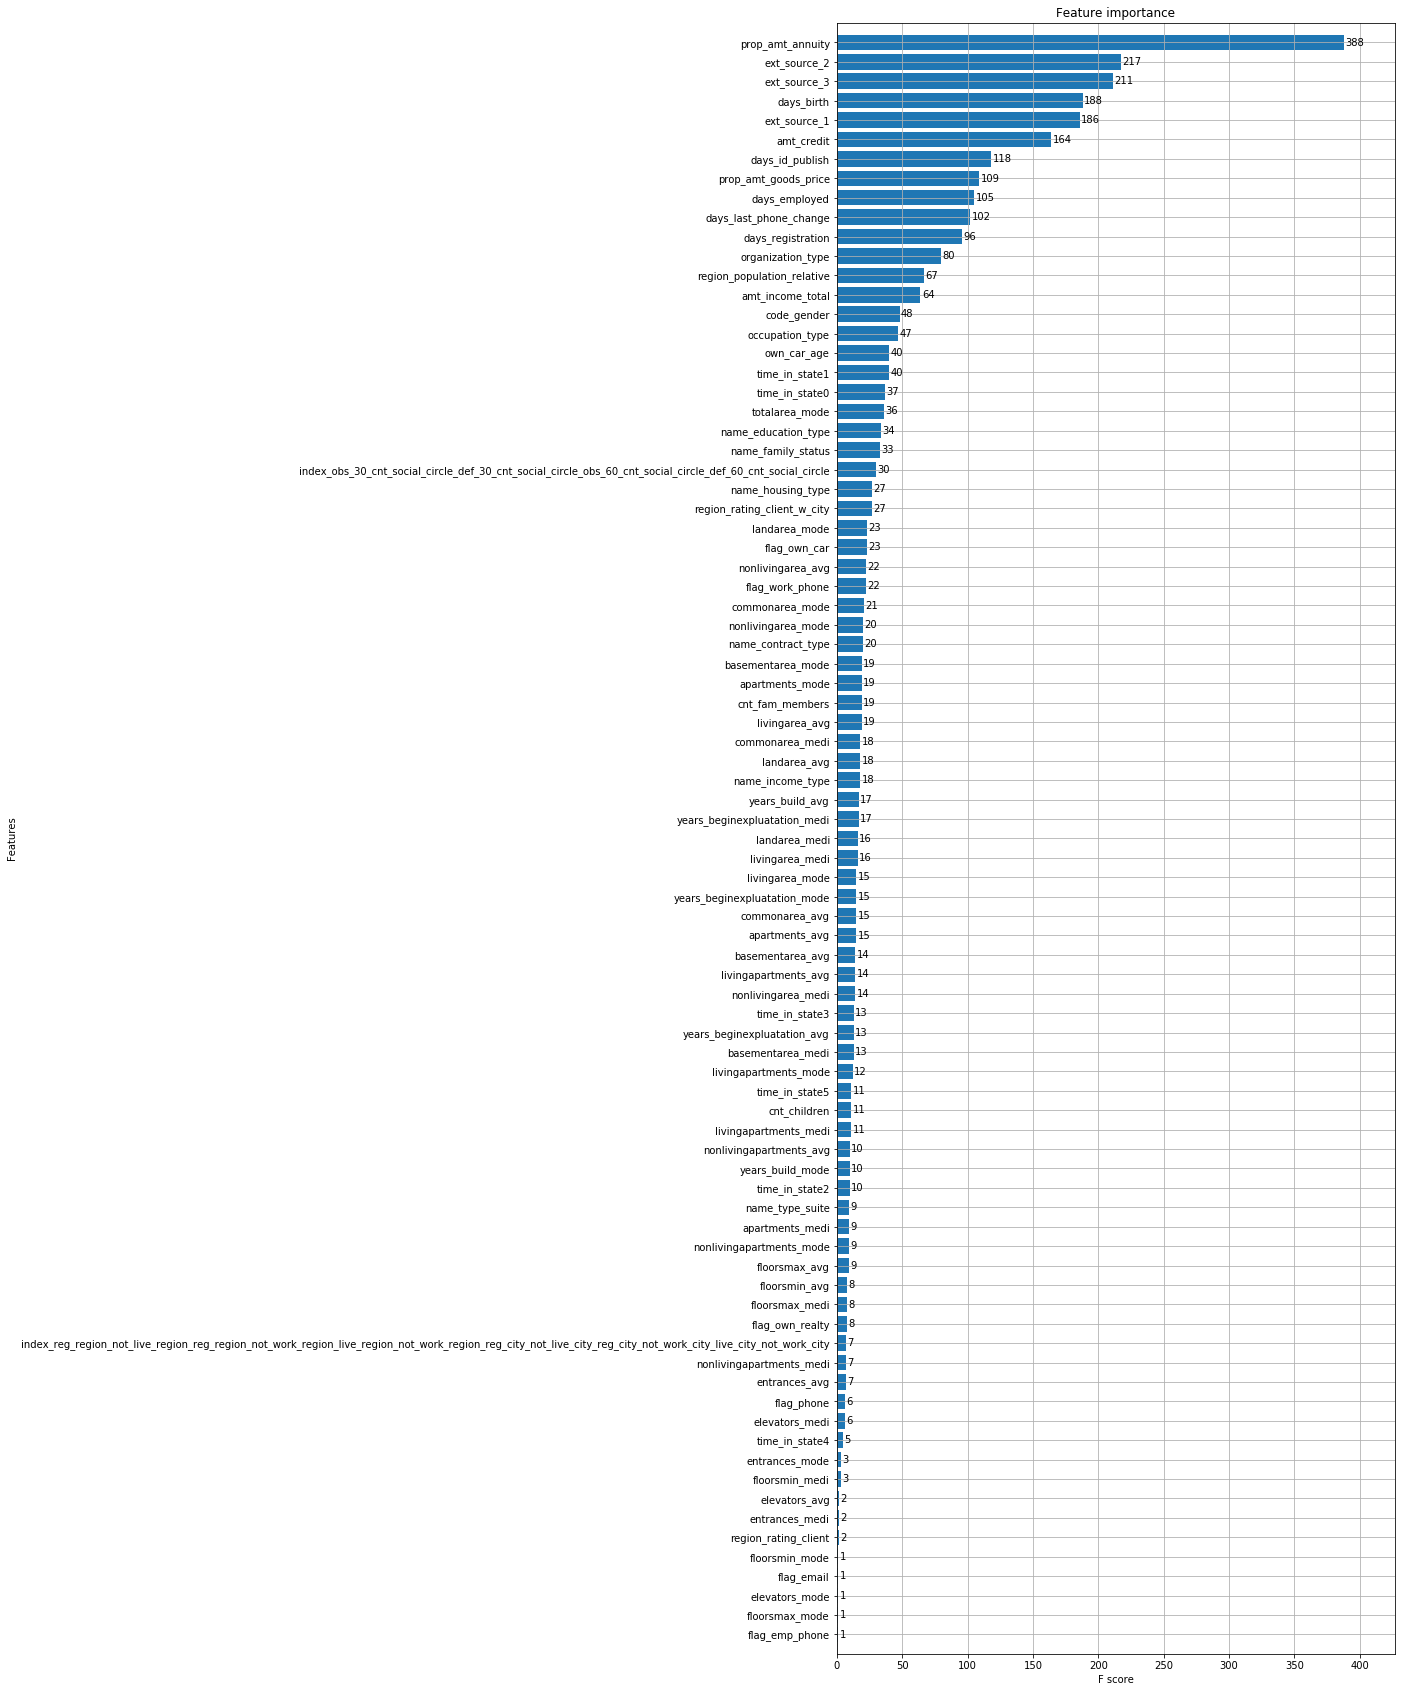

In [58]:
# cbb_features
groups = ['appl_loan_flags1', 'appl_circle_default_rates', 'appl_credit_metrics',
              'appl_credit_proportions', 'appl_ext_metrics_1','appl_social_markers1',
              'appl_misregion_features', 'appl_wealth_flags1', 'appl_social_flags1',
              'appl_dummies1', 'appl_id_expiry', 'appl_social_family2',
              'appl_indirect_wealth', 'appl_income_metrics', 'appl_region_wealth'] + ['cbb_features']

predictors = list(set(get_features_by_groups(feature_dict,groups)[0]))

target = 'TARGET'
rcParams['figure.figsize'] = 10, 30

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=10,
 scale_pos_weight=1,
 silent = False,
 seed=27)

alg = modelfit_w_test(xgb1,
         df.filter(items=train_idx,axis=0),
         df.filter(items=val_idx,axis=0),predictors)    

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy         : 0.9205
Precision        : 0.6456
Recall           : 0.03405
AUC Score (Train): 0.798568




/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy        : 0.9195
Precision       : 0.5319
Recall          : 0.02819
AUC Score (Test): 0.768798


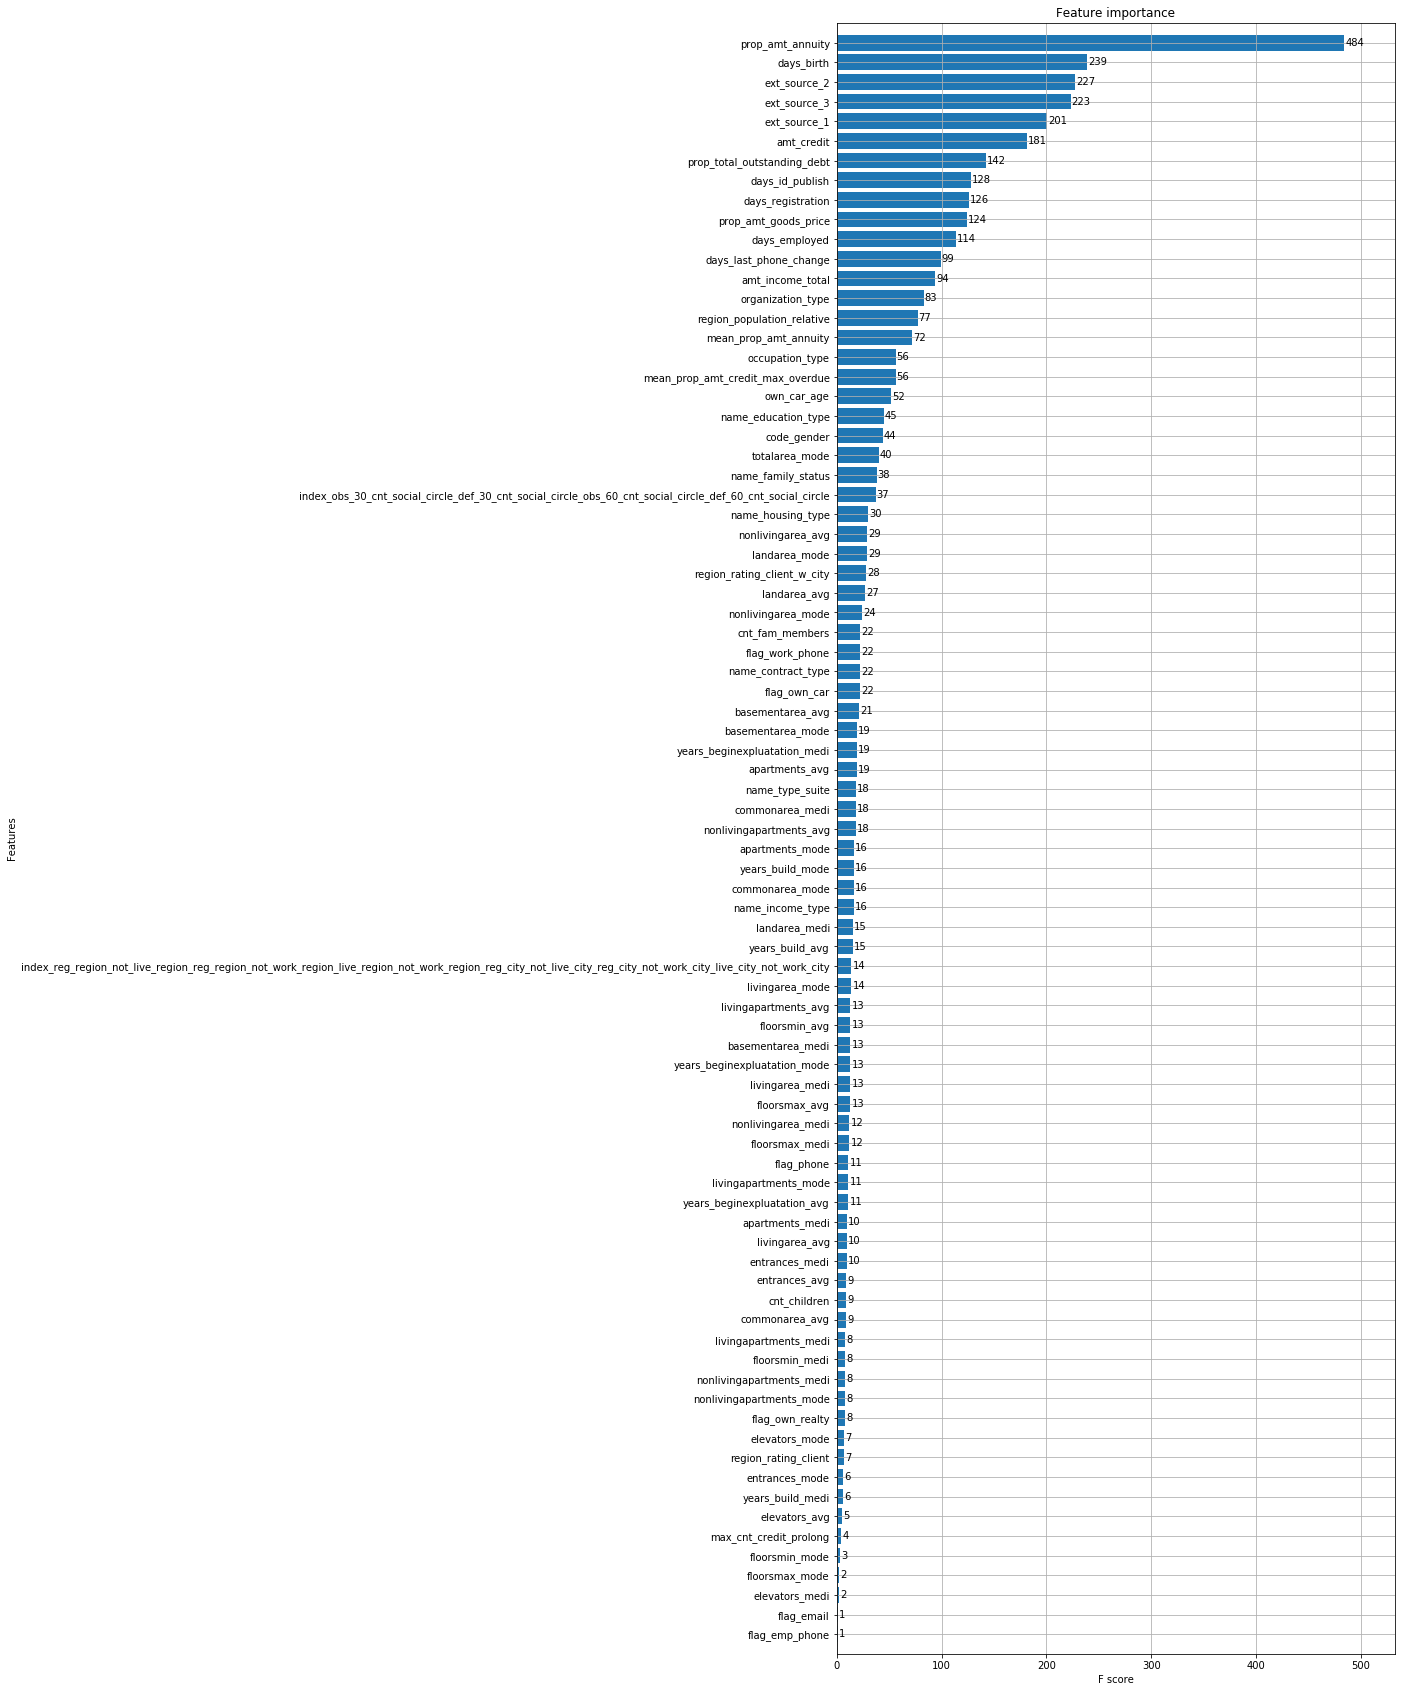

In [59]:
# cb_features
groups = ['appl_loan_flags1', 'appl_circle_default_rates', 'appl_credit_metrics',
              'appl_credit_proportions', 'appl_ext_metrics_1','appl_social_markers1',
              'appl_misregion_features', 'appl_wealth_flags1', 'appl_social_flags1',
              'appl_dummies1', 'appl_id_expiry', 'appl_social_family2',
              'appl_indirect_wealth', 'appl_income_metrics', 'appl_region_wealth'] + ['cb_features']

predictors = list(set(get_features_by_groups(feature_dict,groups)[0]))

target = 'TARGET'
rcParams['figure.figsize'] = 10, 30

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=10,
 scale_pos_weight=1,
 silent = False,
 seed=27)

alg = modelfit_w_test(xgb1,
         df.filter(items=train_idx,axis=0),
         df.filter(items=val_idx,axis=0),predictors)    

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy         : 0.9208
Precision        : 0.6586
Recall           : 0.03926
AUC Score (Train): 0.806725




/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy        : 0.9194
Precision       : 0.5151
Recall          : 0.03029
AUC Score (Test): 0.770753


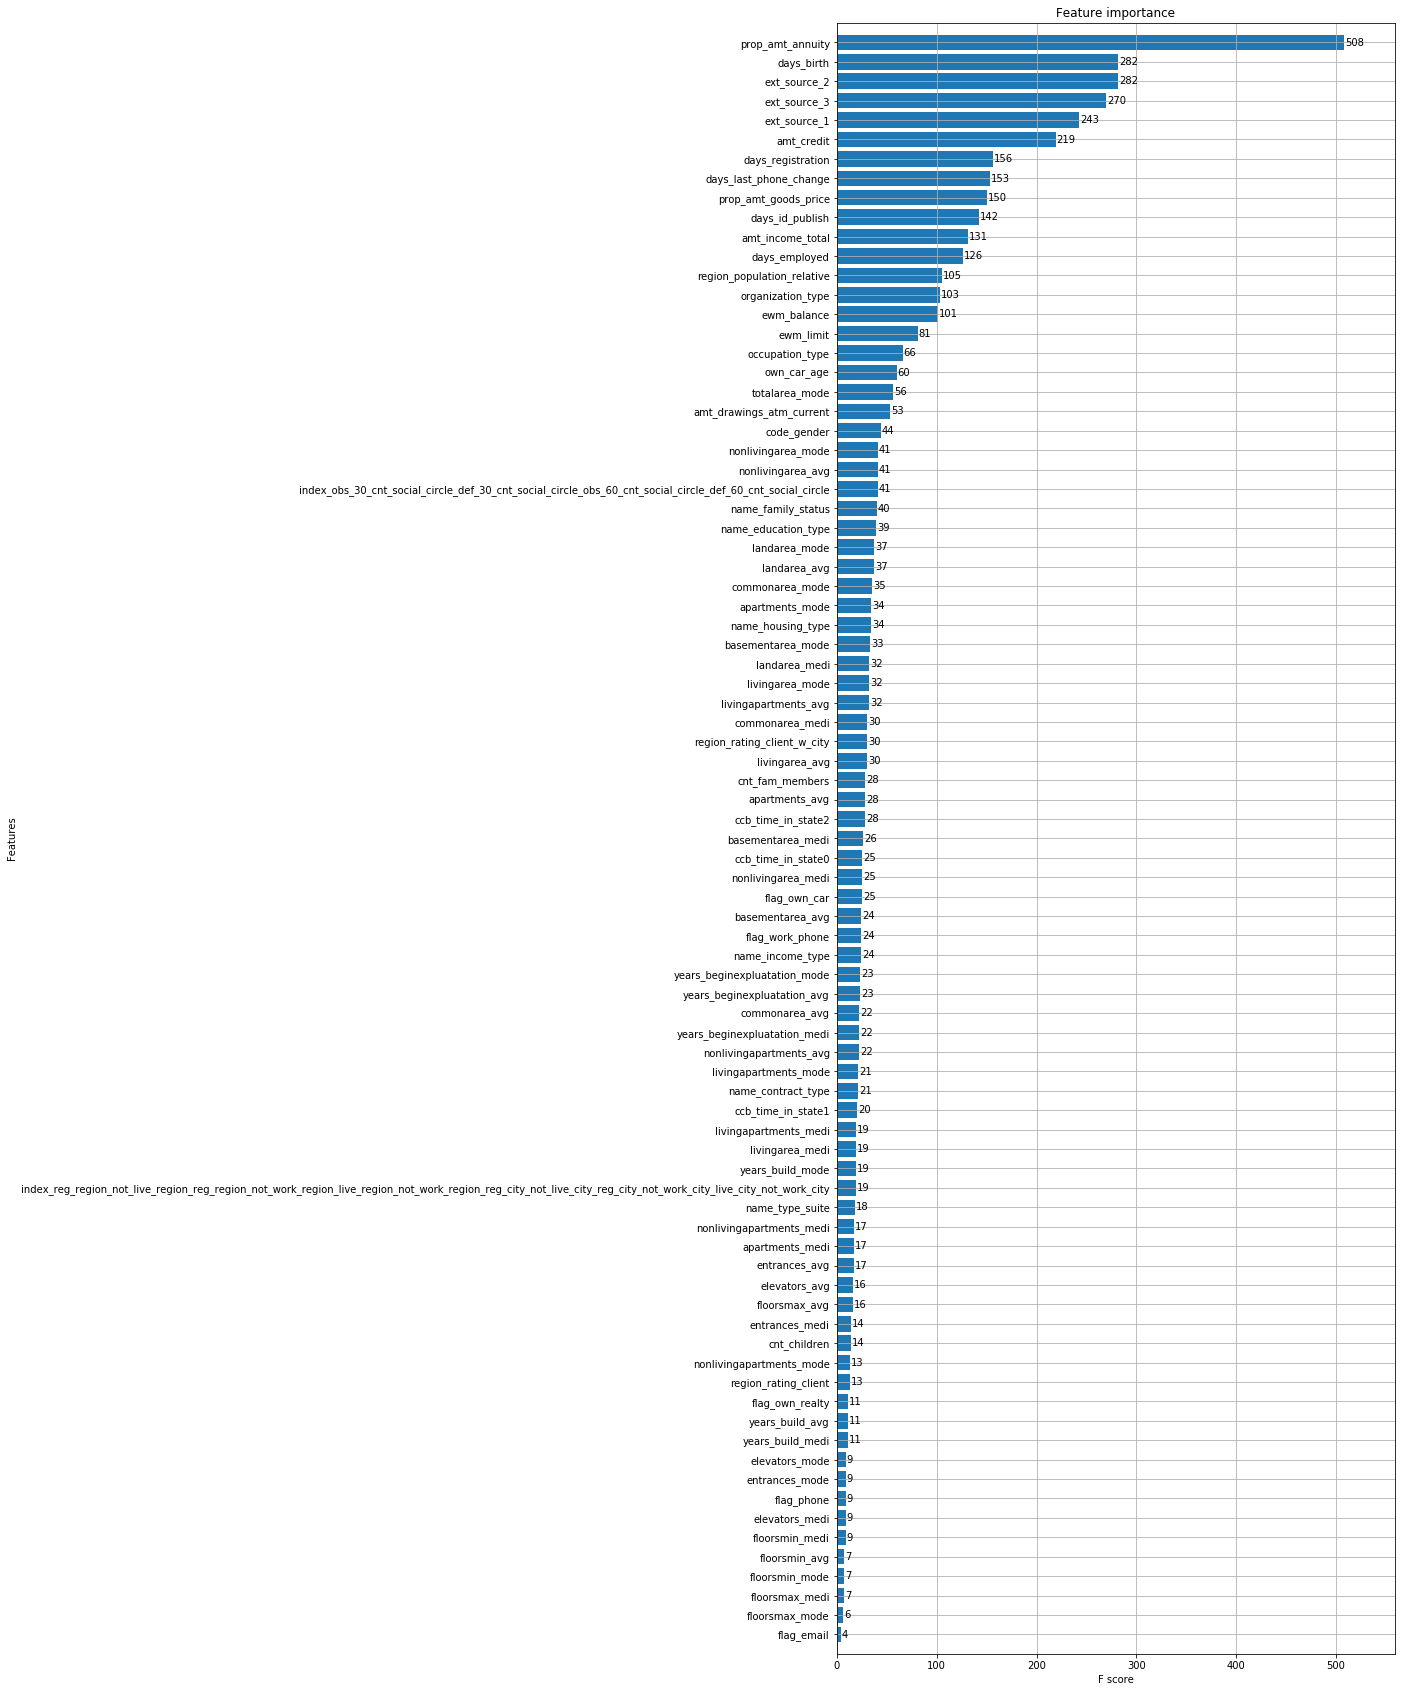

In [60]:
# ccb_features
groups = ['appl_loan_flags1', 'appl_circle_default_rates', 'appl_credit_metrics',
              'appl_credit_proportions', 'appl_ext_metrics_1','appl_social_markers1',
              'appl_misregion_features', 'appl_wealth_flags1', 'appl_social_flags1',
              'appl_dummies1', 'appl_id_expiry', 'appl_social_family2',
              'appl_indirect_wealth', 'appl_income_metrics', 'appl_region_wealth'] + ['ccb_features']

predictors = list(set(get_features_by_groups(feature_dict,groups)[0]))

target = 'TARGET'
rcParams['figure.figsize'] = 10, 30

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=10,
 scale_pos_weight=1,
 silent = False,
 seed=27)

alg = modelfit_w_test(xgb1,
         df.filter(items=train_idx,axis=0),
         df.filter(items=val_idx,axis=0),predictors)    

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy         : 0.9209
Precision        : 0.6559
Recall           : 0.04351
AUC Score (Train): 0.811062




/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy        : 0.9193
Precision       : 0.5
Recall          : 0.03383
AUC Score (Test): 0.771990


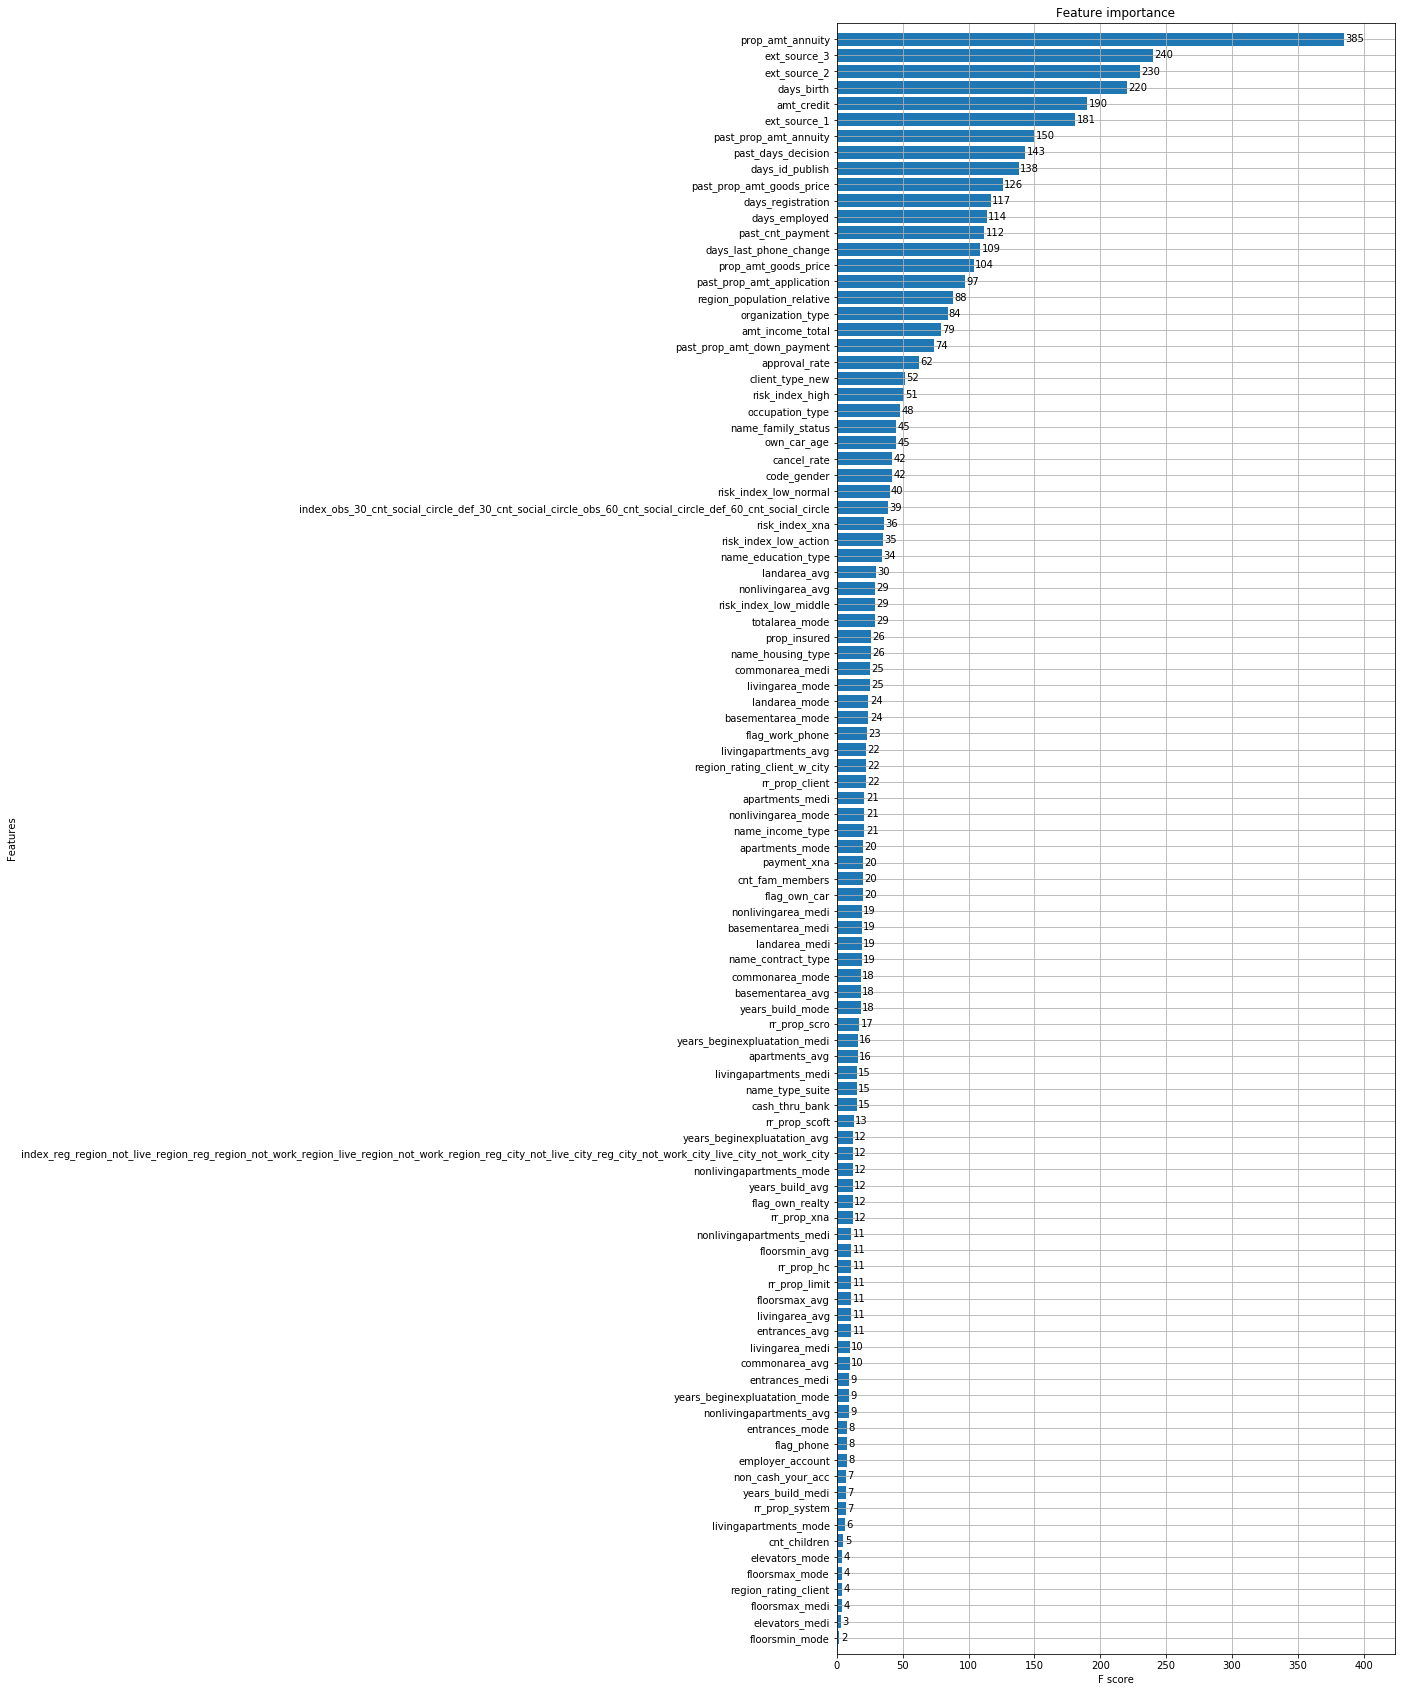

In [61]:
# a_pr_features
groups = ['appl_loan_flags1', 'appl_circle_default_rates', 'appl_credit_metrics',
              'appl_credit_proportions', 'appl_ext_metrics_1','appl_social_markers1',
              'appl_misregion_features', 'appl_wealth_flags1', 'appl_social_flags1',
              'appl_dummies1', 'appl_id_expiry', 'appl_social_family2',
              'appl_indirect_wealth', 'appl_income_metrics', 'appl_region_wealth'] + ['a_pr_features']

predictors = list(set(get_features_by_groups(feature_dict,groups)[0]))

target = 'TARGET'
rcParams['figure.figsize'] = 10, 30

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=10,
 scale_pos_weight=1,
 silent = False,
 seed=27)

alg = modelfit_w_test(xgb1,
         df.filter(items=train_idx,axis=0),
         df.filter(items=val_idx,axis=0),predictors)    

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy         : 0.9204
Precision        : 0.6224
Recall           : 0.03497
AUC Score (Train): 0.797217




/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy        : 0.9194
Precision       : 0.5116
Recall          : 0.02852
AUC Score (Test): 0.770924


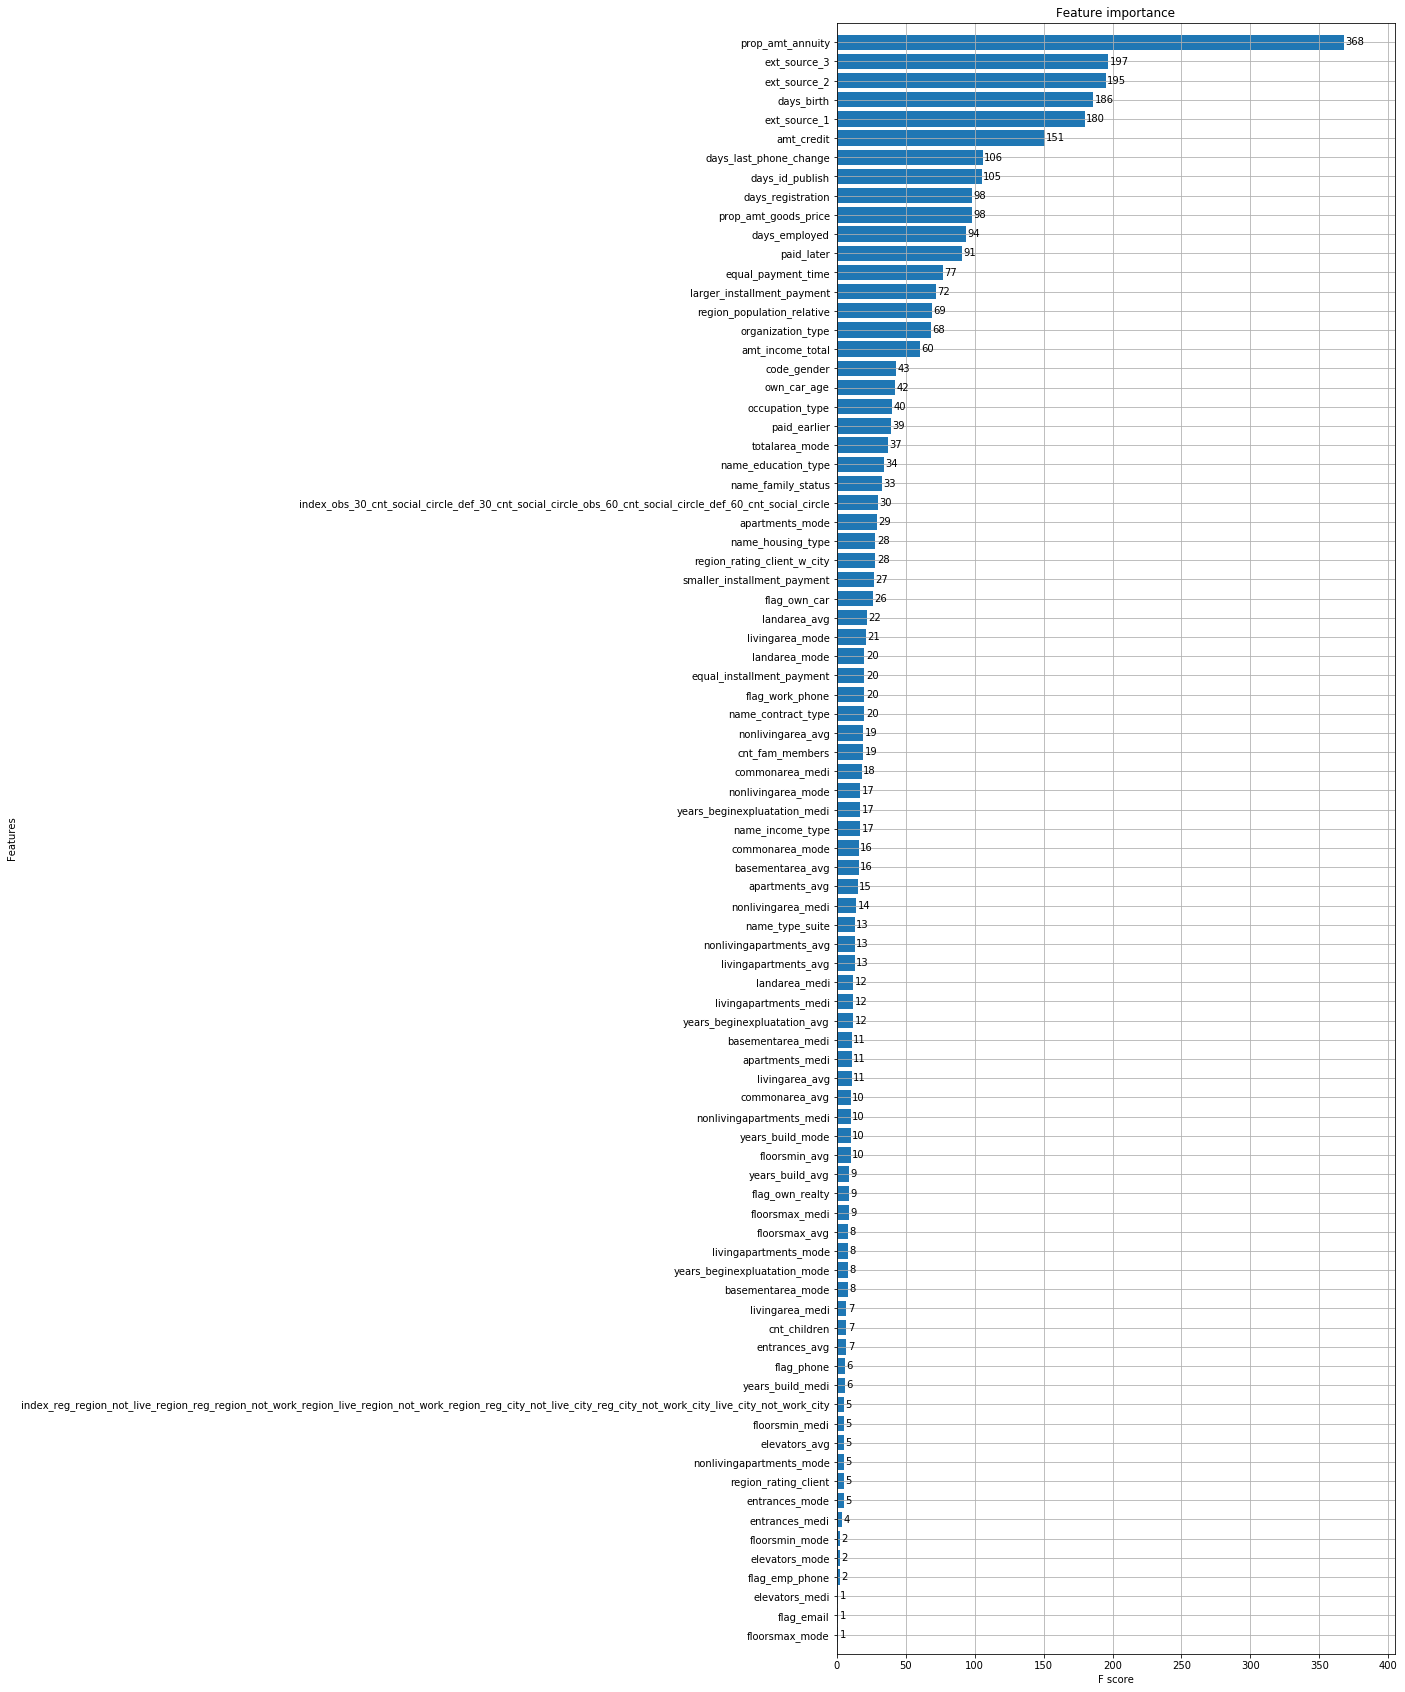

In [62]:
# installments_features
groups = ['appl_loan_flags1', 'appl_circle_default_rates', 'appl_credit_metrics',
              'appl_credit_proportions', 'appl_ext_metrics_1','appl_social_markers1',
              'appl_misregion_features', 'appl_wealth_flags1', 'appl_social_flags1',
              'appl_dummies1', 'appl_id_expiry', 'appl_social_family2',
              'appl_indirect_wealth', 'appl_income_metrics', 'appl_region_wealth'] + ['installments_features']

predictors = list(set(get_features_by_groups(feature_dict,groups)[0]))

target = 'TARGET'
rcParams['figure.figsize'] = 10, 30

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=10,
 scale_pos_weight=1,
 silent = False,
 seed=27)

alg = modelfit_w_test(xgb1,
         df.filter(items=train_idx,axis=0),
         df.filter(items=val_idx,axis=0),predictors)    

### Submit

In [20]:
SUBMISSION_NAME = 'xgb1000_tune_featuresv3'

predictors = list(set(get_features_by_type(feature_dict,'all')[0]))
df_test = df.filter(items=test_idx,axis=0)

dtest_predictions = alg.predict(df_test[predictors])
dtest_predprob = alg.predict_proba(df_test[predictors])[:,1]
df_test['dtest_predprob'] = dtest_predprob

df_sub_submit = df_sub.merge(df_test[['SK_ID_CURR','dtest_predprob']],on='SK_ID_CURR')

assert len(df_sub_submit)==len(df_sub)
assert set(df_sub.SK_ID_CURR) == set(df_sub_submit.SK_ID_CURR)

df_sub_submit['TARGET'] = df_sub_submit['dtest_predprob']
del df_sub_submit['dtest_predprob']
df_sub_submit = df_sub_submit.set_index('SK_ID_CURR')
df_sub_submit.to_csv('../submissions/features_{}.csv'.format(SUBMISSION_NAME))

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Write generator and simple model

In [1]:
import pickle
from ETL.ETL import ETL
from sklearn.model_selection import StratifiedKFold
from ETL.ETL_functions import get_features_by_type,get_features_by_groups

# load data
df,feature_dict = ETL(model_type='cnn')

df.to_feather('../data/cnn_data_v3')

with open('../data/cnn_data_v3.pickle', 'wb') as handle:
    pickle.dump(feature_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

Starting pre-processing ...


/opt/conda/lib/python3.6/site-packages/pandas/core/nanops.py:359: RuntimeWarning: divide by zero encountered in true_divide
  the_mean = the_sum / count


Finished processing application train/test data 9.247341632843018
Finished testing application train/test data 3.516630172729492
Finished processing credit bureau data 38.16147828102112
Finished testing credit bureau data 0.008218526840209961


/home/keras/notebook/nvme/home_credit/src/ETL/ETL_functions.py:284: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  approval_rates = df_a_pr.groupby('SK_ID_CURR')['was_approved'].agg(f)
/home/keras/notebook/nvme/home_credit/src/ETL/ETL_functions.py:290: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  cancel_rates = df_a_pr.groupby('SK_ID_CURR')['was_cancelled'].agg(f)
/home/keras/notebook/nvme/home_credit/src/ETL/ETL_functions.py:347: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  insured_rates = df_a_pr.groupby('SK_ID_CURR')['NFLAG_INSURED_ON_APPROVAL'].agg(f)


Finished processing past application data 24.086573362350464
Finished testing past application data 0.06264185905456543


  9%|▉         | 61612/663424 [00:09<01:36, 6223.10it/s]/opt/conda/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)
100%|██████████| 663424/663424 [01:29<00:00, 7379.31it/s]


Finished processing credit bureau balance data 104.41291379928589


100%|██████████| 898903/898903 [02:00<00:00, 7445.23it/s]


Finished processing pos cash data 158.14102602005005
Finished testing pos cash data 0.014138936996459961
Finished processing installments data 10.151162385940552
Finished testing installments data 0.02288818359375


100%|██████████| 104307/104307 [00:15<00:00, 6705.12it/s]


Finished processing credit card balance data 48.847041606903076
Finished testing credit card balance data 0.023630380630493164


In [2]:
import pickle
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from ETL.ETL_functions import get_features_by_type,get_features_by_groups

df = pd.read_feather('../data/cnn_data_v3')
with open('../data/cnn_data_v3.pickle', 'rb') as handle:
    feature_dict = pickle.load(handle)

In [2]:
numeric_features = sorted(list(set(get_features_by_type(feature_dict,'numeric_01')[0])))
categoric_features = sorted(list(set(get_features_by_type(feature_dict,'categorical')[0])))

In [3]:
len(numeric_features),len(categoric_features)

(117, 20)

In [4]:
cat_sizes = []

for _ in categoric_features:
    cat_sizes.append(df[_].nunique())

In [5]:
24825/282686

0.08781828601345662

In [4]:
df.TARGET.value_counts()

 0    282686
-1     48744
 1     24825
Name: TARGET, dtype: int64

In [15]:
train_dataset = BankCNNDataset(fold = 0,
                               num_folds = 4,
                               stratify_label = 'TARGET',
                               mode = 'train',
                               df_file = '../data/cnn_data_v3',
                               features_file = '../data/cnn_data_v3.pickle')

In [16]:
import torch

train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=1000,        
    shuffle=True,
    num_workers=1,
    pin_memory=False,
    drop_last=False)

In [55]:
for i, (X_sequences_num,X_sequences_cat,y_sequences) in enumerate(train_loader):
    
    X_sequences_num = torch.autograd.Variable(X_sequences_num.float())
    X_sequences_cat = torch.autograd.Variable(X_sequences_cat.long())
    
    print(X_sequences_num.shape,X_sequences_cat.shape,y_sequences.shape)
    break

torch.Size([1000, 117]) torch.Size([1000, 20]) torch.Size([1000])


In [18]:
for i in range(0,len(cat_sizes)):
    print(X_sequences_cat[:,i].max())

4.0
11.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
3.0
5.0
5.0
3.0
6.0
18.0
56.0


In [13]:
cat_sizes

[16, 19, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 6, 6, 8, 8, 19, 58]

In [142]:
categoric_features

['flag_email',
 'flag_document_6',
 'name_type_suite',
 'flag_emp_phone',
 'occupation_type',
 'cnt_children',
 'code_gender',
 'flag_work_phone',
 'flag_document_8',
 'name_income_type',
 'name_contract_type',
 'flag_own_car',
 'cnt_fam_members',
 'flag_document_3',
 'name_family_status',
 'flag_own_realty',
 'name_housing_type',
 'organization_type',
 'flag_phone',
 'name_education_type']

In [141]:
train_dataset.categorical_features

['flag_email',
 'flag_document_6',
 'flag_emp_phone',
 'occupation_type',
 'cnt_children',
 'code_gender',
 'flag_work_phone',
 'flag_document_8',
 'name_income_type',
 'flag_own_realty',
 'name_contract_type',
 'cnt_fam_members',
 'name_education_type',
 'flag_document_3',
 'name_family_status',
 'flag_own_car',
 'name_housing_type',
 'organization_type',
 'flag_phone',
 'name_type_suite']

In [23]:
import os
import cv2
import time
import random 
import pickle
import itertools
import numpy as np
import pandas as pd
import torch.utils.data as data
from sklearn.model_selection import StratifiedKFold

class BankCNNDataset(data.Dataset):
    def __init__(self,
                 fold = 0, # fold number
                 num_folds = 4, # total folds
                 stratify_label = 'TARGET', # variable to stratify by
                 mode = 'train', # 'train', val' or 'test'
                 df_file = None,
                 features_file = None
                ):
        
        self.fold = fold            
        self.mode = mode
        self.df,self.feature_dict = self.read_data(df_file,features_file)
        self.num_folds = num_folds
        self.stratify_label = stratify_label
        
        skf = StratifiedKFold(n_splits=self.num_folds,
                              shuffle = True,
                              random_state = 42)

        f1, f2, f3, f4 = skf.split(df[df.TARGET.isin([0,1])].index.values,
                                   df[df.TARGET.isin([0,1])].TARGET)

        folds = [f1, f2, f3, f4]
        
        self.train_idx = folds[self.fold][0]
        self.val_idx = folds[self.fold][1]    
        self.test_idx = df[df.TARGET==-1].index
        
        self.categorical_features = sorted(get_features_by_type(feature_dict,'categorical')[0])
        self.numerical_features = sorted(get_features_by_type(feature_dict,'numeric_01')[0])
        
        self.all_feature_groups = sorted(get_features_by_type(feature_dict,'all')[1])   
        
    def __len__(self):
        if self.mode == 'train':
            return len(self.train_idx)
        elif self.mode == 'val':
            return len(self.val_idx)
        elif self.mode == 'test':
            return len(self.test_idx)
        
    def __getitem__(self, idx):
        if self.mode in ['train']:
            return_tuple = (self.df.loc[self.train_idx[idx],self.numerical_features].values,
                            self.df.loc[self.train_idx[idx],self.categorical_features].values,
                            self.df.loc[self.train_idx[idx],'TARGET'])
            return return_tuple 
        elif self.mode in ['val']:
            return_tuple = (self.df.loc[self.val_idx[idx],self.numerical_features].values,
                            self.df.loc[self.val_idx[idx],self.categorical_features].values,
                            self.df.loc[self.val_idx[idx],'TARGET'])          
            return return_tuple
        elif self.mode in ['test']:
            return_tuple = (self.df.loc[self.test_idx[idx],self.numerical_features].values,
                            self.df.loc[self.test_idx[idx],self.categorical_features].values,
                            self.df.loc[self.test_idx[idx],'TARGET'])          
            return return_tuple  
        else:
            raise NotImplementedError("This mode {} is not yet implemented".format(self.mode))
        
    def read_data(self,df_file,features_file):
        
        df = pd.read_feather(df_file)
        with open(features_file, 'rb') as handle:
            feature_dict = pickle.load(handle)
            
        return df,feature_dict       

In [72]:
import torch
import torch.nn as nn
from torch.autograd import Variable

class CreditClassifier(nn.Module):
    def __init__(self,
                 cat_sizes=None,
                 numerical_features=117,
                 mlp_sizes=[1024,2048,1024,512,256,128,2],
                 embedding_factor=3,
                 dropout_rate=0.1):
        
        super(CreditClassifier, self).__init__()
        
        self.cat_sizes = cat_sizes
        self.mlp_sizes = mlp_sizes
        self.numerical_features = numerical_features
        self.dropout_rate = dropout_rate
        self.embedding_factor = embedding_factor
        
        self.embeddings = {}
        embedding_sizes = []
        
        for i, cat_size in enumerate(self.cat_sizes):
            emb,emb_size = self.create_emb(cat_size=cat_size,max_emb_size=50)
            setattr(self, 'emb_{}'.format(i), emb)
            embedding_sizes.append(emb_size)
            
        self.numerical_features = [sum(embedding_sizes) + self.numerical_features] + self.mlp_sizes
            
        modules = []
        for i in range(0,len(self.numerical_features)-1):
            modules = self.linear_block(modules,
                                        self.numerical_features[i],
                                        self.numerical_features[i+1])
            
        self.classifier = nn.Sequential(*modules)            

    
    def create_emb(self,
                   cat_size = 7,
                   max_emb_size = 50):

        emb_size = min([(cat_size+2)//self.embedding_factor, max_emb_size])    
        emb = nn.Embedding(num_embeddings = cat_size,
                           embedding_dim = emb_size)

        return emb,emb_size
    
    def forward(self,
               x_num,
               x_cat):
        
        embedded = [getattr(self,'emb_{}'.format(i))(x_cat[:,i]) for i,cat_size in enumerate(self.cat_sizes)]            
        embedded = torch.cat(embedded,dim=1)
        
        out = torch.cat([embedded,x_num],dim=1)
        out = self.classifier(out)
        
        return out

    def linear_block(self,
                     modules,
                     neurons_in,
                     neurons_out):
        modules.append(nn.Linear(neurons_in, neurons_out))
        modules.append(nn.BatchNorm1d(neurons_out))   
        modules.append(nn.ReLU(True))        
        modules.append(nn.Dropout(self.dropout_rate))
        
        return modules


In [73]:
model = CreditClassifier(cat_sizes=cat_sizes,
                         numerical_features=117,
                         mlp_sizes=[1024,2048,1024,512,256,128,2],
                         embedding_factor=2,
                         dropout_rate=0.1)      

In [41]:
X_sequences_cat[:,10].shape

torch.Size([1000])

In [74]:
out = model(X_sequences_num,X_sequences_cat)
out.shape

torch.Size([1000, 2])

In [38]:
_.shape

torch.Size([1000, 102])

In [91]:
model

CreditClassifier(
  (emb_0): Embedding(2, 2)
  (emb_1): Embedding(2, 2)
  (emb_2): Embedding(8, 5)
  (emb_3): Embedding(2, 2)
  (emb_4): Embedding(19, 10)
  (emb_5): Embedding(16, 9)
  (emb_6): Embedding(3, 2)
  (emb_7): Embedding(2, 2)
  (emb_8): Embedding(2, 2)
  (emb_9): Embedding(8, 5)
  (emb_10): Embedding(2, 2)
  (emb_11): Embedding(2, 2)
  (emb_12): Embedding(19, 10)
  (emb_13): Embedding(2, 2)
  (emb_14): Embedding(6, 4)
  (emb_15): Embedding(2, 2)
  (emb_16): Embedding(6, 4)
  (emb_17): Embedding(58, 30)
  (emb_18): Embedding(2, 2)
  (emb_19): Embedding(5, 3)
  (classifier): Sequential(
    (0): Linear(in_features=219, out_features=1024)
    (1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU(inplace)
    (3): Dropout(p=0.1)
    (4): Linear(in_features=1024, out_features=2048)
    (5): BatchNorm1d(2048, eps=1e-05, momentum=0.1, affine=True)
    (6): ReLU(inplace)
    (7): Dropout(p=0.1)
    (8): Linear(in_features=2048, out_features=1024)
    (9): BatchN

In [57]:
getattr(model,'emb_{}'.format(0))

Embedding(2, 1)

In [ ]:
modules = []
modules.append(nn.Linear(10, 10))
modules.append(nn.Linear(10, 10))

sequential = nn.Sequential(*modules)


nn.Sequential(*[
            ConvLayer(in_channels=channels,
                      out_channels=channels,
                      kernel_size=kernel_size,
                      activation=activation,
                      dropout=dropout)
            for _ in range(blocks)
        ])